In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
import xgboost
import catboost 
import lightgbm
from numpy import nan
import category_encoders as ce
from vecstack import stacking
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
train_data = pd.read_csv(r'C:\Users\user\OneDrive\Documents\code\zindi\dsn\Train.csv')
test_data = pd.read_csv(r'C:\Users\user\OneDrive\Documents\code\zindi\dsn\Test.csv')

In [3]:
appl = test_data['Applicant_ID']
test_data = test_data.drop(['Applicant_ID'], axis = 1)

In [4]:
train_data.head()

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0  Apcnt_1000000       3436.0      0.28505       1.6560          0.0   
1  Apcnt_1000004       3456.0      0.67400       0.2342          0.0   
2  Apcnt_1000008       3276.0      0.53845       3.1510          0.0   
3  Apcnt_1000012       3372.0      0.17005       0.5050          0.0   
4  Apcnt_1000016       3370.0      0.77270       1.1010          0.0   

   form_field5  form_field6  form_field7  form_field8  form_field9  ...  \
0        0.000          0.0   10689720.0     252072.0    4272776.0  ...   
1        0.000          0.0     898979.0     497531.0    9073814.0  ...   
2        6.282          NaN     956940.0          NaN     192944.0  ...   
3        0.000     192166.0    3044703.0     385499.0    3986472.0  ...   
4        0.000       1556.0     214728.0     214728.0    1284089.0  ...   

   form_field42  form_field43  form_field44  form_field45  form_field46  \
0      0.392854          2.02      0.711632           0.0           0.0   
1      0.314281          8.08      0.183584           NaN           0.0   
2      0.162965         18.18      0.791136           0.0           0.0   
3      0.488884          2.02      0.685168           NaN           0.0   
4      0.275000         12.12      0.438168           0.0           0.0   

   form_field47  form_field48  form_field49  form_field50  default_status  
0        charge           NaN      1.129518      0.044335              no  
1        charge    349.805730      1.620483      0.322436              no  
2        charge           NaN      1.513370      0.011640             yes  
3        charge     89.940100      0.664452      0.082729              no  
4        charge     97.887502      1.427891      0.045630              no  

[5 rows x 52 columns]

In [5]:
train_data = train_data.drop(['Applicant_ID'], axis = 1)

In [6]:
train_data['form_field47'] = train_data.form_field47.map({'charge': 'C', 'lending':'L'})
train_data['default_status'] = train_data.default_status.map({'no' : 0, 'yes':1})

In [7]:
test_data['form_field47'] = test_data.form_field47.map({'charge': 'C', 'lending':'L'})

In [8]:
y = train_data['default_status']

In [9]:
Lab = LabelEncoder()
train_data['form_field47'] = Lab.fit_transform(train_data['form_field47'])
test_data['form_field47'] = Lab.fit_transform(test_data['form_field47'])

In [10]:
se = ['form_field47']


target_enc = ce.CatBoostEncoder(cols=se)
target_enc.fit(train_data[se], y)

train_data = train_data.join(target_enc.transform(train_data[se]).add_suffix('tar'))
test_data = test_data.join(target_enc.transform(test_data[se]).add_suffix('tar'))

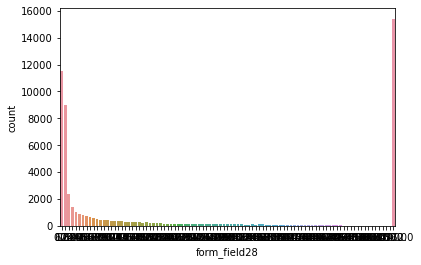

In [11]:
sns.countplot(train_data.form_field28)

In [12]:
data = train_data.dtypes

In [13]:
data

form_field1        float64
form_field2        float64
form_field3        float64
form_field4        float64
form_field5        float64
form_field6        float64
form_field7        float64
form_field8        float64
form_field9        float64
form_field10       float64
form_field11       float64
form_field12       float64
form_field13       float64
form_field14         int64
form_field15       float64
form_field16       float64
form_field17       float64
form_field18       float64
form_field19       float64
form_field20       float64
form_field21       float64
form_field22       float64
form_field23       float64
form_field24       float64
form_field25       float64
form_field26       float64
form_field27       float64
form_field28       float64
form_field29       float64
form_field30       float64
form_field31       float64
form_field32       float64
form_field33       float64
form_field34       float64
form_field35       float64
form_field36       float64
form_field37       float64
f

In [188]:
train_data = train_data.drop(['default_status'], axis =1)

In [189]:
train_data.form_field28.hist(bins = 50)

In [190]:
train_data.form_field16.value_counts()

0.0     35943
1.0      5123
2.0      1290
3.0       383
4.0       139
5.0        50
6.0        23
7.0         8
11.0        2
8.0         2
10.0        1
Name: form_field16, dtype: int64

In [191]:
train_data.isnull().sum()

form_field1         2529
form_field2         3844
form_field3          355
form_field4          355
form_field5          355
form_field6        13360
form_field7         5163
form_field8        13360
form_field9         8008
form_field10         355
form_field11       31421
form_field12        9895
form_field13        5889
form_field14           0
form_field15       22475
form_field16       13036
form_field17       11151
form_field18       10402
form_field19           4
form_field20         355
form_field21       15854
form_field22       20400
form_field23       28123
form_field24       13297
form_field25        5450
form_field26        7438
form_field27        9299
form_field28         355
form_field29         355
form_field30       25509
form_field31       39408
form_field32        5450
form_field33        1256
form_field34         355
form_field35       23148
form_field36        1995
form_field37        5450
form_field38         355
form_field39        4211
form_field40       43729


In [192]:
#train_data = train_data.drop(['form_field3', 'form_field4','form_field5','form_field16','form_field17','form_field18'], axis =  1)

In [192]:
#test_data = test_data.drop(['form_field3', 'form_field4','form_field5','form_field16','form_field17','form_field18'], axis =  1)

*Dealing with Missing Data*

In [325]:
cols = train_data.columns
coll = test_data.columns

In [326]:
train_data = train_data.dropna(thresh = 0.7*len(train_data), axis = 1)
train_data.head()

form_field1  form_field2  form_field3  form_field4  form_field5  \
0       3436.0      0.28505       1.6560          0.0        0.000   
1       3456.0      0.67400       0.2342          0.0        0.000   
2       3276.0      0.53845       3.1510          0.0        6.282   
3       3372.0      0.17005       0.5050          0.0        0.000   
4       3370.0      0.77270       1.1010          0.0        0.000   

   form_field6  form_field7  form_field8  form_field9  form_field10  ...  \
0          0.0   10689720.0     252072.0    4272776.0    11333126.0  ...   
1          0.0     898979.0     497531.0    9073814.0     2533168.0  ...   
2          NaN     956940.0          NaN     192944.0     1079864.0  ...   
3     192166.0    3044703.0     385499.0    3986472.0     3621979.0  ...   
4       1556.0     214728.0     214728.0    1284089.0      361770.0  ...   

   form_field38  form_field39  form_field42  form_field43  form_field44  \
0           4.0           0.0      0.392854          2.02      0.711632   
1           8.0           0.0      0.314281          8.08      0.183584   
2           6.0           0.0      0.162965         18.18      0.791136   
3           4.0           1.0      0.488884          2.02      0.685168   
4          24.0           0.0      0.275000         12.12      0.438168   

   form_field46  form_field47  form_field49  form_field50  form_field47tar  
0           0.0             0      1.129518      0.044335         0.316909  
1           0.0             0      1.620483      0.322436         0.316909  
2           0.0             0      1.513370      0.011640         0.316909  
3           0.0             0      0.664452      0.082729         0.316909  
4           0.0             0      1.427891      0.045630         0.316909  

[5 rows x 40 columns]

In [327]:
cols = train_data.columns

In [328]:
for co in coll:
    if co not in cols:
        test_data = test_data.drop(co, axis = 1)

In [232]:
train_data['form_field28'] = train_data['form_field28'].replace(60772, nan) 
test_data['form_field28'] = test_data['form_field28'].replace(60772, nan)

In [44]:

cols = ['form_field28']

for col in cols:
    train_data[col+'isnull'] = train_data[col].isnull()
    test_data[col+'isnull'] = test_data[col].isnull()

In [45]:
for col in cols:
    train_data[col] = train_data[col].map({True :1, False:0})
    test_data[col] = test_data[col].map({True :1, False:0})

In [171]:
#replacing all missing values with mean
cols = train_data.columns
for col in cols:
    train_data[col] = train_data[col].fillna(-9999)


In [172]:
cols = test_data.columns
for col in cols:
    test_data[col] = test_data[col].fillna(-999)


In [123]:
coll = [ 'form_field2','form_field42',
       'form_field12','form_field21','form_field24' , 'form_field13','form_field14']

In [124]:
for col in coll:
    train_data[col] = train_data[col].fillna(train_data[col].mean())
    test_data[col] = test_data[col].fillna(test_data[col].mean())

In [167]:
colll = ['form_field3','form_field4', 'form_field5', 'form_field46','form_field34', 'form_field36',
         'form_field37','form_field39','form_field38']

In [168]:
for col in colll:
    train_data[col] = train_data[col].fillna(0)
    test_data[col] = test_data[col].fillna(0)

In [169]:
col = [ 'form_field16', 'form_field17', 'form_field18', 'form_field19','form_field20','form_field6', 'form_field8']

In [170]:
for co in col:
    train_data[co] = train_data[co].fillna(0)
    test_data[co] = test_data[co].fillna(0)

In [199]:

    train_data = train_data.fillna(method = 'bfill')
    test_data = test_data.fillna(method = 'bfill')

In [200]:

    train_data = train_data.fillna(method = 'ffill')
    test_data = test_data.fillna(method = 'ffill')

In [157]:
data = train_data.select_dtypes(['float64', 'int64', 'int32'])

In [158]:
train_data.shape

(56000, 51)

In [159]:
corr= data.corr()

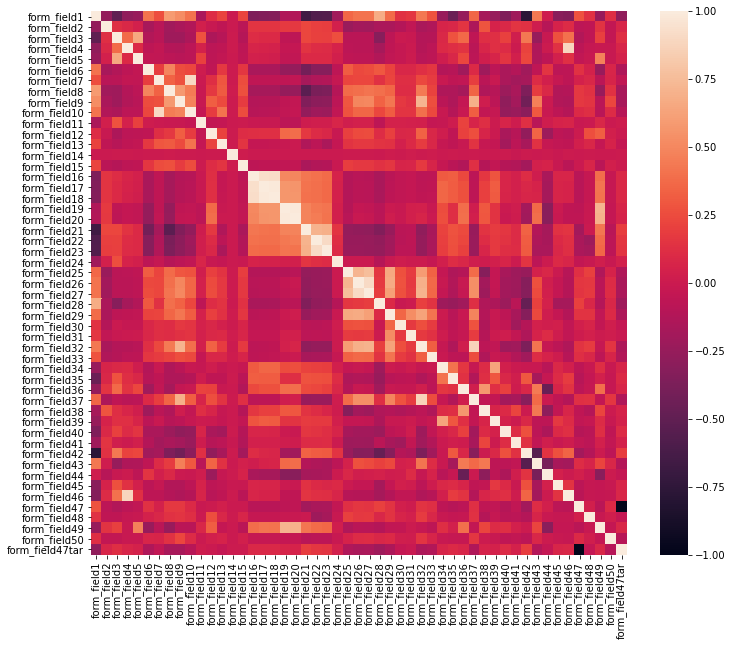

In [160]:
plt.figure(figsize = (12,10))
sns.heatmap(corr)

In [285]:
#test_data = test_data.drop(['Applicant_ID'], axis=1)

In [196]:
xgb = xgboost.XGBClassifier(n_estimators =200, learning_rate = 0.03)

cat = catboost.CatBoostClassifier(subsample=0.9, 
                           custom_loss='Logloss',
                           l2_leaf_reg = 10,
                           random_strength = 0,
                           max_depth=7,
                           eval_metric="AUC",
                           learning_rate=0.04,
                           iterations=5000,
                           bootstrap_type='Bernoulli',
                           random_seed=42,
                           od_type="Iter",
                           border_count=128
                          )

lgb = lightgbm.LGBMClassifier(n_estimators = 500, learning_rate = 0.02)

In [199]:
cat.fit(_train,verbose_eval=1000, early_stopping_rounds=1000,
                      eval_set=[_valid],use_best_model=True,plot=False)

NameError: name '_train' is not defined

In [111]:
#kf = KFold(n_splits = 5)

In [112]:
#cross_val_score(cat, train_data, train_y, cv = kf, scoring = 'roc_auc')

Learning rate set to 0.011942
0:	learn: 0.6858516	total: 63.5ms	remaining: 5m 17s
1:	learn: 0.6782080	total: 124ms	remaining: 5m 9s
2:	learn: 0.6706904	total: 173ms	remaining: 4m 48s
3:	learn: 0.6639804	total: 236ms	remaining: 4m 55s
4:	learn: 0.6578445	total: 283ms	remaining: 4m 42s
5:	learn: 0.6510581	total: 325ms	remaining: 4m 30s
6:	learn: 0.6449615	total: 368ms	remaining: 4m 22s
7:	learn: 0.6389893	total: 430ms	remaining: 4m 28s
8:	learn: 0.6327919	total: 480ms	remaining: 4m 26s
9:	learn: 0.6271459	total: 521ms	remaining: 4m 19s
10:	learn: 0.6217105	total: 568ms	remaining: 4m 17s
11:	learn: 0.6160092	total: 618ms	remaining: 4m 17s
12:	learn: 0.6106891	total: 661ms	remaining: 4m 13s
13:	learn: 0.6057705	total: 708ms	remaining: 4m 12s
14:	learn: 0.6007158	total: 750ms	remaining: 4m 9s
15:	learn: 0.5955600	total: 812ms	remaining: 4m 12s
16:	learn: 0.5912081	total: 854ms	remaining: 4m 10s
17:	learn: 0.5863859	total: 895ms	remaining: 4m 7s
18:	learn: 0.5819334	total: 939ms	remaining: 4

158:	learn: 0.4242343	total: 7.7s	remaining: 3m 54s
159:	learn: 0.4240922	total: 7.75s	remaining: 3m 54s
160:	learn: 0.4239223	total: 7.79s	remaining: 3m 54s
161:	learn: 0.4237003	total: 7.83s	remaining: 3m 53s
162:	learn: 0.4234754	total: 7.87s	remaining: 3m 53s
163:	learn: 0.4232721	total: 7.94s	remaining: 3m 54s
164:	learn: 0.4230936	total: 7.99s	remaining: 3m 54s
165:	learn: 0.4228727	total: 8.04s	remaining: 3m 54s
166:	learn: 0.4227140	total: 8.08s	remaining: 3m 53s
167:	learn: 0.4225516	total: 8.12s	remaining: 3m 53s
168:	learn: 0.4223594	total: 8.18s	remaining: 3m 53s
169:	learn: 0.4221483	total: 8.22s	remaining: 3m 53s
170:	learn: 0.4219470	total: 8.25s	remaining: 3m 53s
171:	learn: 0.4218071	total: 8.29s	remaining: 3m 52s
172:	learn: 0.4216311	total: 8.34s	remaining: 3m 52s
173:	learn: 0.4214817	total: 8.39s	remaining: 3m 52s
174:	learn: 0.4213372	total: 8.42s	remaining: 3m 52s
175:	learn: 0.4211891	total: 8.46s	remaining: 3m 51s
176:	learn: 0.4210595	total: 8.5s	remaining: 3m

314:	learn: 0.4085863	total: 15.1s	remaining: 3m 44s
315:	learn: 0.4085454	total: 15.1s	remaining: 3m 43s
316:	learn: 0.4084957	total: 15.1s	remaining: 3m 43s
317:	learn: 0.4084584	total: 15.2s	remaining: 3m 43s
318:	learn: 0.4084168	total: 15.2s	remaining: 3m 43s
319:	learn: 0.4083503	total: 15.3s	remaining: 3m 43s
320:	learn: 0.4083059	total: 15.3s	remaining: 3m 43s
321:	learn: 0.4082514	total: 15.4s	remaining: 3m 43s
322:	learn: 0.4081959	total: 15.4s	remaining: 3m 43s
323:	learn: 0.4081484	total: 15.4s	remaining: 3m 42s
324:	learn: 0.4080964	total: 15.5s	remaining: 3m 42s
325:	learn: 0.4080408	total: 15.5s	remaining: 3m 42s
326:	learn: 0.4079937	total: 15.6s	remaining: 3m 42s
327:	learn: 0.4079343	total: 15.6s	remaining: 3m 42s
328:	learn: 0.4079027	total: 15.7s	remaining: 3m 42s
329:	learn: 0.4078609	total: 15.7s	remaining: 3m 42s
330:	learn: 0.4078024	total: 15.7s	remaining: 3m 41s
331:	learn: 0.4077540	total: 15.8s	remaining: 3m 42s
332:	learn: 0.4076957	total: 15.8s	remaining: 

472:	learn: 0.4022105	total: 22.2s	remaining: 3m 32s
473:	learn: 0.4021812	total: 22.2s	remaining: 3m 32s
474:	learn: 0.4021456	total: 22.2s	remaining: 3m 31s
475:	learn: 0.4021165	total: 22.3s	remaining: 3m 31s
476:	learn: 0.4020747	total: 22.3s	remaining: 3m 31s
477:	learn: 0.4020448	total: 22.4s	remaining: 3m 31s
478:	learn: 0.4020080	total: 22.4s	remaining: 3m 31s
479:	learn: 0.4019821	total: 22.5s	remaining: 3m 31s
480:	learn: 0.4019498	total: 22.5s	remaining: 3m 31s
481:	learn: 0.4019185	total: 22.5s	remaining: 3m 31s
482:	learn: 0.4018889	total: 22.6s	remaining: 3m 31s
483:	learn: 0.4018556	total: 22.6s	remaining: 3m 31s
484:	learn: 0.4018280	total: 22.7s	remaining: 3m 31s
485:	learn: 0.4018016	total: 22.7s	remaining: 3m 31s
486:	learn: 0.4017570	total: 22.8s	remaining: 3m 31s
487:	learn: 0.4017268	total: 22.8s	remaining: 3m 31s
488:	learn: 0.4017008	total: 22.9s	remaining: 3m 30s
489:	learn: 0.4016749	total: 22.9s	remaining: 3m 30s
490:	learn: 0.4016404	total: 22.9s	remaining: 

630:	learn: 0.3976777	total: 30.1s	remaining: 3m 28s
631:	learn: 0.3976479	total: 30.1s	remaining: 3m 28s
632:	learn: 0.3976285	total: 30.2s	remaining: 3m 28s
633:	learn: 0.3976115	total: 30.2s	remaining: 3m 27s
634:	learn: 0.3975770	total: 30.3s	remaining: 3m 28s
635:	learn: 0.3975523	total: 30.3s	remaining: 3m 27s
636:	learn: 0.3975324	total: 30.4s	remaining: 3m 28s
637:	learn: 0.3975099	total: 30.4s	remaining: 3m 27s
638:	learn: 0.3974820	total: 30.5s	remaining: 3m 28s
639:	learn: 0.3974595	total: 30.6s	remaining: 3m 28s
640:	learn: 0.3974357	total: 30.6s	remaining: 3m 28s
641:	learn: 0.3974041	total: 30.8s	remaining: 3m 28s
642:	learn: 0.3973866	total: 30.8s	remaining: 3m 28s
643:	learn: 0.3973602	total: 30.9s	remaining: 3m 28s
644:	learn: 0.3973443	total: 30.9s	remaining: 3m 28s
645:	learn: 0.3973146	total: 31s	remaining: 3m 28s
646:	learn: 0.3972894	total: 31s	remaining: 3m 28s
647:	learn: 0.3972585	total: 31.1s	remaining: 3m 28s
648:	learn: 0.3972317	total: 31.1s	remaining: 3m 2

787:	learn: 0.3939165	total: 38.6s	remaining: 3m 26s
788:	learn: 0.3938982	total: 38.7s	remaining: 3m 26s
789:	learn: 0.3938825	total: 38.7s	remaining: 3m 26s
790:	learn: 0.3938553	total: 38.8s	remaining: 3m 26s
791:	learn: 0.3938371	total: 38.8s	remaining: 3m 26s
792:	learn: 0.3938139	total: 38.9s	remaining: 3m 26s
793:	learn: 0.3937962	total: 38.9s	remaining: 3m 26s
794:	learn: 0.3937724	total: 39s	remaining: 3m 26s
795:	learn: 0.3937455	total: 39s	remaining: 3m 26s
796:	learn: 0.3937214	total: 39.1s	remaining: 3m 26s
797:	learn: 0.3936941	total: 39.1s	remaining: 3m 26s
798:	learn: 0.3936763	total: 39.2s	remaining: 3m 26s
799:	learn: 0.3936594	total: 39.3s	remaining: 3m 26s
800:	learn: 0.3936379	total: 39.4s	remaining: 3m 26s
801:	learn: 0.3936164	total: 39.4s	remaining: 3m 26s
802:	learn: 0.3936002	total: 39.5s	remaining: 3m 26s
803:	learn: 0.3935867	total: 39.6s	remaining: 3m 26s
804:	learn: 0.3935670	total: 39.6s	remaining: 3m 26s
805:	learn: 0.3935395	total: 39.7s	remaining: 3m 2

946:	learn: 0.3900978	total: 47.1s	remaining: 3m 21s
947:	learn: 0.3900626	total: 47.2s	remaining: 3m 21s
948:	learn: 0.3900316	total: 47.3s	remaining: 3m 21s
949:	learn: 0.3900016	total: 47.3s	remaining: 3m 21s
950:	learn: 0.3899710	total: 47.4s	remaining: 3m 21s
951:	learn: 0.3899516	total: 47.4s	remaining: 3m 21s
952:	learn: 0.3899192	total: 47.5s	remaining: 3m 21s
953:	learn: 0.3898942	total: 47.5s	remaining: 3m 21s
954:	learn: 0.3898699	total: 47.6s	remaining: 3m 21s
955:	learn: 0.3898467	total: 47.6s	remaining: 3m 21s
956:	learn: 0.3898201	total: 47.7s	remaining: 3m 21s
957:	learn: 0.3897916	total: 47.7s	remaining: 3m 21s
958:	learn: 0.3897617	total: 47.8s	remaining: 3m 21s
959:	learn: 0.3897355	total: 47.8s	remaining: 3m 21s
960:	learn: 0.3896992	total: 47.9s	remaining: 3m 21s
961:	learn: 0.3896619	total: 47.9s	remaining: 3m 21s
962:	learn: 0.3896349	total: 48s	remaining: 3m 21s
963:	learn: 0.3896101	total: 48s	remaining: 3m 21s
964:	learn: 0.3895913	total: 48.1s	remaining: 3m 2

1101:	learn: 0.3863388	total: 55.4s	remaining: 3m 16s
1102:	learn: 0.3863151	total: 55.5s	remaining: 3m 16s
1103:	learn: 0.3863041	total: 55.5s	remaining: 3m 15s
1104:	learn: 0.3862791	total: 55.6s	remaining: 3m 15s
1105:	learn: 0.3862558	total: 55.6s	remaining: 3m 15s
1106:	learn: 0.3862427	total: 55.7s	remaining: 3m 15s
1107:	learn: 0.3862160	total: 55.7s	remaining: 3m 15s
1108:	learn: 0.3861860	total: 55.7s	remaining: 3m 15s
1109:	learn: 0.3861570	total: 55.8s	remaining: 3m 15s
1110:	learn: 0.3861305	total: 55.9s	remaining: 3m 15s
1111:	learn: 0.3861042	total: 55.9s	remaining: 3m 15s
1112:	learn: 0.3860822	total: 55.9s	remaining: 3m 15s
1113:	learn: 0.3860542	total: 56s	remaining: 3m 15s
1114:	learn: 0.3860230	total: 56.1s	remaining: 3m 15s
1115:	learn: 0.3859943	total: 56.1s	remaining: 3m 15s
1116:	learn: 0.3859679	total: 56.2s	remaining: 3m 15s
1117:	learn: 0.3859648	total: 56.2s	remaining: 3m 15s
1118:	learn: 0.3859396	total: 56.3s	remaining: 3m 15s
1119:	learn: 0.3859119	total: 

1259:	learn: 0.3827257	total: 1m 3s	remaining: 3m 8s
1260:	learn: 0.3826932	total: 1m 3s	remaining: 3m 8s
1261:	learn: 0.3826915	total: 1m 3s	remaining: 3m 8s
1262:	learn: 0.3826656	total: 1m 3s	remaining: 3m 8s
1263:	learn: 0.3826382	total: 1m 3s	remaining: 3m 8s
1264:	learn: 0.3826131	total: 1m 3s	remaining: 3m 8s
1265:	learn: 0.3825895	total: 1m 3s	remaining: 3m 8s
1266:	learn: 0.3825869	total: 1m 3s	remaining: 3m 8s
1267:	learn: 0.3825758	total: 1m 3s	remaining: 3m 7s
1268:	learn: 0.3825386	total: 1m 3s	remaining: 3m 7s
1269:	learn: 0.3825372	total: 1m 3s	remaining: 3m 7s
1270:	learn: 0.3825214	total: 1m 4s	remaining: 3m 7s
1271:	learn: 0.3825022	total: 1m 4s	remaining: 3m 7s
1272:	learn: 0.3824845	total: 1m 4s	remaining: 3m 7s
1273:	learn: 0.3824570	total: 1m 4s	remaining: 3m 7s
1274:	learn: 0.3824305	total: 1m 4s	remaining: 3m 7s
1275:	learn: 0.3823962	total: 1m 4s	remaining: 3m 7s
1276:	learn: 0.3823947	total: 1m 4s	remaining: 3m 7s
1277:	learn: 0.3823691	total: 1m 4s	remaining:

1418:	learn: 0.3789876	total: 1m 10s	remaining: 2m 58s
1419:	learn: 0.3789861	total: 1m 10s	remaining: 2m 57s
1420:	learn: 0.3789556	total: 1m 10s	remaining: 2m 57s
1421:	learn: 0.3789258	total: 1m 10s	remaining: 2m 57s
1422:	learn: 0.3789062	total: 1m 10s	remaining: 2m 57s
1423:	learn: 0.3788816	total: 1m 10s	remaining: 2m 57s
1424:	learn: 0.3788519	total: 1m 10s	remaining: 2m 57s
1425:	learn: 0.3788418	total: 1m 10s	remaining: 2m 57s
1426:	learn: 0.3788207	total: 1m 10s	remaining: 2m 57s
1427:	learn: 0.3787909	total: 1m 10s	remaining: 2m 57s
1428:	learn: 0.3787686	total: 1m 10s	remaining: 2m 57s
1429:	learn: 0.3787427	total: 1m 11s	remaining: 2m 57s
1430:	learn: 0.3787228	total: 1m 11s	remaining: 2m 57s
1431:	learn: 0.3786986	total: 1m 11s	remaining: 2m 57s
1432:	learn: 0.3786719	total: 1m 11s	remaining: 2m 57s
1433:	learn: 0.3786524	total: 1m 11s	remaining: 2m 57s
1434:	learn: 0.3786339	total: 1m 11s	remaining: 2m 56s
1435:	learn: 0.3786196	total: 1m 11s	remaining: 2m 56s
1436:	lear

1570:	learn: 0.3755910	total: 1m 17s	remaining: 2m 48s
1571:	learn: 0.3755628	total: 1m 17s	remaining: 2m 48s
1572:	learn: 0.3755443	total: 1m 17s	remaining: 2m 48s
1573:	learn: 0.3755279	total: 1m 17s	remaining: 2m 48s
1574:	learn: 0.3755026	total: 1m 17s	remaining: 2m 47s
1575:	learn: 0.3754859	total: 1m 17s	remaining: 2m 47s
1576:	learn: 0.3754670	total: 1m 17s	remaining: 2m 47s
1577:	learn: 0.3754469	total: 1m 17s	remaining: 2m 47s
1578:	learn: 0.3754293	total: 1m 17s	remaining: 2m 47s
1579:	learn: 0.3754136	total: 1m 17s	remaining: 2m 47s
1580:	learn: 0.3754007	total: 1m 17s	remaining: 2m 47s
1581:	learn: 0.3753734	total: 1m 17s	remaining: 2m 47s
1582:	learn: 0.3753484	total: 1m 17s	remaining: 2m 47s
1583:	learn: 0.3753208	total: 1m 17s	remaining: 2m 47s
1584:	learn: 0.3752997	total: 1m 17s	remaining: 2m 47s
1585:	learn: 0.3752800	total: 1m 17s	remaining: 2m 47s
1586:	learn: 0.3752555	total: 1m 17s	remaining: 2m 47s
1587:	learn: 0.3752282	total: 1m 17s	remaining: 2m 47s
1588:	lear

1720:	learn: 0.3723341	total: 1m 23s	remaining: 2m 39s
1721:	learn: 0.3723119	total: 1m 23s	remaining: 2m 38s
1722:	learn: 0.3722882	total: 1m 23s	remaining: 2m 38s
1723:	learn: 0.3722641	total: 1m 23s	remaining: 2m 38s
1724:	learn: 0.3722381	total: 1m 23s	remaining: 2m 38s
1725:	learn: 0.3722184	total: 1m 23s	remaining: 2m 38s
1726:	learn: 0.3721988	total: 1m 23s	remaining: 2m 38s
1727:	learn: 0.3721801	total: 1m 23s	remaining: 2m 38s
1728:	learn: 0.3721562	total: 1m 23s	remaining: 2m 38s
1729:	learn: 0.3721338	total: 1m 23s	remaining: 2m 38s
1730:	learn: 0.3721104	total: 1m 23s	remaining: 2m 38s
1731:	learn: 0.3720946	total: 1m 23s	remaining: 2m 38s
1732:	learn: 0.3720697	total: 1m 24s	remaining: 2m 38s
1733:	learn: 0.3720505	total: 1m 24s	remaining: 2m 38s
1734:	learn: 0.3720254	total: 1m 24s	remaining: 2m 38s
1735:	learn: 0.3720204	total: 1m 24s	remaining: 2m 38s
1736:	learn: 0.3720010	total: 1m 24s	remaining: 2m 38s
1737:	learn: 0.3719762	total: 1m 24s	remaining: 2m 38s
1738:	lear

1870:	learn: 0.3692012	total: 1m 30s	remaining: 2m 31s
1871:	learn: 0.3691830	total: 1m 30s	remaining: 2m 31s
1872:	learn: 0.3691624	total: 1m 30s	remaining: 2m 31s
1873:	learn: 0.3691525	total: 1m 30s	remaining: 2m 30s
1874:	learn: 0.3691336	total: 1m 30s	remaining: 2m 30s
1875:	learn: 0.3691174	total: 1m 30s	remaining: 2m 30s
1876:	learn: 0.3690938	total: 1m 30s	remaining: 2m 30s
1877:	learn: 0.3690712	total: 1m 30s	remaining: 2m 30s
1878:	learn: 0.3690469	total: 1m 30s	remaining: 2m 30s
1879:	learn: 0.3690169	total: 1m 30s	remaining: 2m 30s
1880:	learn: 0.3689954	total: 1m 30s	remaining: 2m 30s
1881:	learn: 0.3689697	total: 1m 30s	remaining: 2m 30s
1882:	learn: 0.3689502	total: 1m 30s	remaining: 2m 30s
1883:	learn: 0.3689239	total: 1m 30s	remaining: 2m 30s
1884:	learn: 0.3689022	total: 1m 31s	remaining: 2m 30s
1885:	learn: 0.3688828	total: 1m 31s	remaining: 2m 30s
1886:	learn: 0.3688494	total: 1m 31s	remaining: 2m 30s
1887:	learn: 0.3688296	total: 1m 31s	remaining: 2m 30s
1888:	lear

2022:	learn: 0.3660091	total: 1m 38s	remaining: 2m 24s
2023:	learn: 0.3659886	total: 1m 38s	remaining: 2m 24s
2024:	learn: 0.3659615	total: 1m 38s	remaining: 2m 24s
2025:	learn: 0.3659451	total: 1m 38s	remaining: 2m 24s
2026:	learn: 0.3659270	total: 1m 38s	remaining: 2m 24s
2027:	learn: 0.3659024	total: 1m 38s	remaining: 2m 24s
2028:	learn: 0.3658784	total: 1m 38s	remaining: 2m 24s
2029:	learn: 0.3658624	total: 1m 38s	remaining: 2m 24s
2030:	learn: 0.3658401	total: 1m 38s	remaining: 2m 23s
2031:	learn: 0.3658314	total: 1m 38s	remaining: 2m 23s
2032:	learn: 0.3658134	total: 1m 38s	remaining: 2m 23s
2033:	learn: 0.3657931	total: 1m 38s	remaining: 2m 23s
2034:	learn: 0.3657716	total: 1m 38s	remaining: 2m 23s
2035:	learn: 0.3657438	total: 1m 38s	remaining: 2m 23s
2036:	learn: 0.3657199	total: 1m 38s	remaining: 2m 23s
2037:	learn: 0.3656987	total: 1m 38s	remaining: 2m 23s
2038:	learn: 0.3656722	total: 1m 38s	remaining: 2m 23s
2039:	learn: 0.3656423	total: 1m 38s	remaining: 2m 23s
2040:	lear

2173:	learn: 0.3628924	total: 1m 44s	remaining: 2m 16s
2174:	learn: 0.3628669	total: 1m 44s	remaining: 2m 16s
2175:	learn: 0.3628424	total: 1m 44s	remaining: 2m 16s
2176:	learn: 0.3628247	total: 1m 44s	remaining: 2m 16s
2177:	learn: 0.3628020	total: 1m 44s	remaining: 2m 16s
2178:	learn: 0.3627780	total: 1m 45s	remaining: 2m 15s
2179:	learn: 0.3627567	total: 1m 45s	remaining: 2m 15s
2180:	learn: 0.3627368	total: 1m 45s	remaining: 2m 15s
2181:	learn: 0.3627173	total: 1m 45s	remaining: 2m 15s
2182:	learn: 0.3626940	total: 1m 45s	remaining: 2m 15s
2183:	learn: 0.3626692	total: 1m 45s	remaining: 2m 15s
2184:	learn: 0.3626575	total: 1m 45s	remaining: 2m 15s
2185:	learn: 0.3626337	total: 1m 45s	remaining: 2m 15s
2186:	learn: 0.3626082	total: 1m 45s	remaining: 2m 15s
2187:	learn: 0.3625851	total: 1m 45s	remaining: 2m 15s
2188:	learn: 0.3625685	total: 1m 45s	remaining: 2m 15s
2189:	learn: 0.3625480	total: 1m 45s	remaining: 2m 15s
2190:	learn: 0.3625270	total: 1m 45s	remaining: 2m 15s
2191:	lear

2326:	learn: 0.3597709	total: 1m 51s	remaining: 2m 8s
2327:	learn: 0.3597491	total: 1m 51s	remaining: 2m 8s
2328:	learn: 0.3597249	total: 1m 51s	remaining: 2m 8s
2329:	learn: 0.3597073	total: 1m 51s	remaining: 2m 8s
2330:	learn: 0.3596994	total: 1m 52s	remaining: 2m 8s
2331:	learn: 0.3596781	total: 1m 52s	remaining: 2m 8s
2332:	learn: 0.3596556	total: 1m 52s	remaining: 2m 8s
2333:	learn: 0.3596336	total: 1m 52s	remaining: 2m 8s
2334:	learn: 0.3596130	total: 1m 52s	remaining: 2m 8s
2335:	learn: 0.3595842	total: 1m 52s	remaining: 2m 8s
2336:	learn: 0.3595609	total: 1m 52s	remaining: 2m 7s
2337:	learn: 0.3595403	total: 1m 52s	remaining: 2m 7s
2338:	learn: 0.3595140	total: 1m 52s	remaining: 2m 7s
2339:	learn: 0.3594975	total: 1m 52s	remaining: 2m 7s
2340:	learn: 0.3594694	total: 1m 52s	remaining: 2m 7s
2341:	learn: 0.3594573	total: 1m 52s	remaining: 2m 7s
2342:	learn: 0.3594375	total: 1m 52s	remaining: 2m 7s
2343:	learn: 0.3594165	total: 1m 52s	remaining: 2m 7s
2344:	learn: 0.3593957	total

2480:	learn: 0.3567458	total: 1m 59s	remaining: 2m 1s
2481:	learn: 0.3567201	total: 1m 59s	remaining: 2m 1s
2482:	learn: 0.3567057	total: 1m 59s	remaining: 2m 1s
2483:	learn: 0.3566843	total: 1m 59s	remaining: 2m 1s
2484:	learn: 0.3566621	total: 1m 59s	remaining: 2m 1s
2485:	learn: 0.3566463	total: 1m 59s	remaining: 2m 1s
2486:	learn: 0.3566266	total: 1m 59s	remaining: 2m 1s
2487:	learn: 0.3566077	total: 1m 59s	remaining: 2m
2488:	learn: 0.3565917	total: 1m 59s	remaining: 2m
2489:	learn: 0.3565697	total: 1m 59s	remaining: 2m
2490:	learn: 0.3565546	total: 2m	remaining: 2m
2491:	learn: 0.3565392	total: 2m	remaining: 2m
2492:	learn: 0.3565249	total: 2m	remaining: 2m
2493:	learn: 0.3565026	total: 2m	remaining: 2m
2494:	learn: 0.3564815	total: 2m	remaining: 2m
2495:	learn: 0.3564534	total: 2m	remaining: 2m
2496:	learn: 0.3564286	total: 2m	remaining: 2m
2497:	learn: 0.3564200	total: 2m	remaining: 2m
2498:	learn: 0.3564026	total: 2m	remaining: 2m
2499:	learn: 0.3563849	total: 2m	remaining: 2m

2636:	learn: 0.3537575	total: 2m 6s	remaining: 1m 53s
2637:	learn: 0.3537352	total: 2m 6s	remaining: 1m 53s
2638:	learn: 0.3537085	total: 2m 6s	remaining: 1m 53s
2639:	learn: 0.3536959	total: 2m 7s	remaining: 1m 53s
2640:	learn: 0.3536788	total: 2m 7s	remaining: 1m 53s
2641:	learn: 0.3536578	total: 2m 7s	remaining: 1m 53s
2642:	learn: 0.3536394	total: 2m 7s	remaining: 1m 53s
2643:	learn: 0.3536232	total: 2m 7s	remaining: 1m 53s
2644:	learn: 0.3536029	total: 2m 7s	remaining: 1m 53s
2645:	learn: 0.3535865	total: 2m 7s	remaining: 1m 53s
2646:	learn: 0.3535658	total: 2m 7s	remaining: 1m 53s
2647:	learn: 0.3535474	total: 2m 7s	remaining: 1m 53s
2648:	learn: 0.3535350	total: 2m 7s	remaining: 1m 53s
2649:	learn: 0.3535180	total: 2m 7s	remaining: 1m 53s
2650:	learn: 0.3535010	total: 2m 7s	remaining: 1m 53s
2651:	learn: 0.3534833	total: 2m 7s	remaining: 1m 52s
2652:	learn: 0.3534630	total: 2m 7s	remaining: 1m 52s
2653:	learn: 0.3534354	total: 2m 7s	remaining: 1m 52s
2654:	learn: 0.3534117	total

2790:	learn: 0.3508283	total: 2m 14s	remaining: 1m 46s
2791:	learn: 0.3508086	total: 2m 14s	remaining: 1m 46s
2792:	learn: 0.3508003	total: 2m 14s	remaining: 1m 46s
2793:	learn: 0.3507912	total: 2m 14s	remaining: 1m 45s
2794:	learn: 0.3507751	total: 2m 14s	remaining: 1m 45s
2795:	learn: 0.3507558	total: 2m 14s	remaining: 1m 45s
2796:	learn: 0.3507444	total: 2m 14s	remaining: 1m 45s
2797:	learn: 0.3507265	total: 2m 14s	remaining: 1m 45s
2798:	learn: 0.3507127	total: 2m 14s	remaining: 1m 45s
2799:	learn: 0.3506931	total: 2m 14s	remaining: 1m 45s
2800:	learn: 0.3506685	total: 2m 14s	remaining: 1m 45s
2801:	learn: 0.3506571	total: 2m 14s	remaining: 1m 45s
2802:	learn: 0.3506516	total: 2m 14s	remaining: 1m 45s
2803:	learn: 0.3506287	total: 2m 14s	remaining: 1m 45s
2804:	learn: 0.3506034	total: 2m 14s	remaining: 1m 45s
2805:	learn: 0.3505875	total: 2m 14s	remaining: 1m 45s
2806:	learn: 0.3505803	total: 2m 14s	remaining: 1m 45s
2807:	learn: 0.3505766	total: 2m 14s	remaining: 1m 45s
2808:	lear

2940:	learn: 0.3481568	total: 2m 21s	remaining: 1m 38s
2941:	learn: 0.3481417	total: 2m 21s	remaining: 1m 38s
2942:	learn: 0.3481257	total: 2m 21s	remaining: 1m 38s
2943:	learn: 0.3481152	total: 2m 21s	remaining: 1m 38s
2944:	learn: 0.3480936	total: 2m 21s	remaining: 1m 38s
2945:	learn: 0.3480729	total: 2m 21s	remaining: 1m 38s
2946:	learn: 0.3480540	total: 2m 21s	remaining: 1m 38s
2947:	learn: 0.3480246	total: 2m 21s	remaining: 1m 38s
2948:	learn: 0.3480166	total: 2m 21s	remaining: 1m 38s
2949:	learn: 0.3480003	total: 2m 21s	remaining: 1m 38s
2950:	learn: 0.3479755	total: 2m 21s	remaining: 1m 38s
2951:	learn: 0.3479470	total: 2m 21s	remaining: 1m 38s
2952:	learn: 0.3479289	total: 2m 21s	remaining: 1m 38s
2953:	learn: 0.3479095	total: 2m 21s	remaining: 1m 38s
2954:	learn: 0.3478817	total: 2m 21s	remaining: 1m 38s
2955:	learn: 0.3478655	total: 2m 21s	remaining: 1m 38s
2956:	learn: 0.3478463	total: 2m 22s	remaining: 1m 38s
2957:	learn: 0.3478272	total: 2m 22s	remaining: 1m 38s
2958:	lear

3090:	learn: 0.3454887	total: 2m 28s	remaining: 1m 31s
3091:	learn: 0.3454643	total: 2m 28s	remaining: 1m 31s
3092:	learn: 0.3454409	total: 2m 28s	remaining: 1m 31s
3093:	learn: 0.3454228	total: 2m 28s	remaining: 1m 31s
3094:	learn: 0.3453978	total: 2m 28s	remaining: 1m 31s
3095:	learn: 0.3453828	total: 2m 29s	remaining: 1m 31s
3096:	learn: 0.3453639	total: 2m 29s	remaining: 1m 31s
3097:	learn: 0.3453416	total: 2m 29s	remaining: 1m 31s
3098:	learn: 0.3453234	total: 2m 29s	remaining: 1m 31s
3099:	learn: 0.3453035	total: 2m 29s	remaining: 1m 31s
3100:	learn: 0.3452858	total: 2m 29s	remaining: 1m 31s
3101:	learn: 0.3452722	total: 2m 29s	remaining: 1m 31s
3102:	learn: 0.3452518	total: 2m 29s	remaining: 1m 31s
3103:	learn: 0.3452288	total: 2m 29s	remaining: 1m 31s
3104:	learn: 0.3452120	total: 2m 29s	remaining: 1m 31s
3105:	learn: 0.3451912	total: 2m 29s	remaining: 1m 31s
3106:	learn: 0.3451720	total: 2m 29s	remaining: 1m 31s
3107:	learn: 0.3451565	total: 2m 29s	remaining: 1m 31s
3108:	lear

3242:	learn: 0.3428617	total: 2m 36s	remaining: 1m 24s
3243:	learn: 0.3428474	total: 2m 36s	remaining: 1m 24s
3244:	learn: 0.3428322	total: 2m 36s	remaining: 1m 24s
3245:	learn: 0.3428115	total: 2m 36s	remaining: 1m 24s
3246:	learn: 0.3427963	total: 2m 36s	remaining: 1m 24s
3247:	learn: 0.3427762	total: 2m 36s	remaining: 1m 24s
3248:	learn: 0.3427544	total: 2m 36s	remaining: 1m 24s
3249:	learn: 0.3427312	total: 2m 36s	remaining: 1m 24s
3250:	learn: 0.3427213	total: 2m 36s	remaining: 1m 24s
3251:	learn: 0.3427047	total: 2m 36s	remaining: 1m 24s
3252:	learn: 0.3426852	total: 2m 36s	remaining: 1m 24s
3253:	learn: 0.3426599	total: 2m 36s	remaining: 1m 24s
3254:	learn: 0.3426406	total: 2m 36s	remaining: 1m 24s
3255:	learn: 0.3426276	total: 2m 36s	remaining: 1m 24s
3256:	learn: 0.3426139	total: 2m 36s	remaining: 1m 23s
3257:	learn: 0.3425997	total: 2m 36s	remaining: 1m 23s
3258:	learn: 0.3425795	total: 2m 36s	remaining: 1m 23s
3259:	learn: 0.3425683	total: 2m 37s	remaining: 1m 23s
3260:	lear

3393:	learn: 0.3402014	total: 2m 43s	remaining: 1m 17s
3394:	learn: 0.3401851	total: 2m 43s	remaining: 1m 17s
3395:	learn: 0.3401644	total: 2m 43s	remaining: 1m 17s
3396:	learn: 0.3401496	total: 2m 43s	remaining: 1m 17s
3397:	learn: 0.3401283	total: 2m 43s	remaining: 1m 17s
3398:	learn: 0.3401069	total: 2m 43s	remaining: 1m 17s
3399:	learn: 0.3400972	total: 2m 44s	remaining: 1m 17s
3400:	learn: 0.3400811	total: 2m 44s	remaining: 1m 17s
3401:	learn: 0.3400604	total: 2m 44s	remaining: 1m 17s
3402:	learn: 0.3400391	total: 2m 44s	remaining: 1m 17s
3403:	learn: 0.3400220	total: 2m 44s	remaining: 1m 17s
3404:	learn: 0.3400121	total: 2m 44s	remaining: 1m 16s
3405:	learn: 0.3399945	total: 2m 44s	remaining: 1m 16s
3406:	learn: 0.3399697	total: 2m 44s	remaining: 1m 16s
3407:	learn: 0.3399491	total: 2m 44s	remaining: 1m 16s
3408:	learn: 0.3399336	total: 2m 44s	remaining: 1m 16s
3409:	learn: 0.3399226	total: 2m 44s	remaining: 1m 16s
3410:	learn: 0.3399016	total: 2m 44s	remaining: 1m 16s
3411:	lear

3542:	learn: 0.3376439	total: 2m 52s	remaining: 1m 10s
3543:	learn: 0.3376260	total: 2m 52s	remaining: 1m 10s
3544:	learn: 0.3376066	total: 2m 52s	remaining: 1m 10s
3545:	learn: 0.3375994	total: 2m 52s	remaining: 1m 10s
3546:	learn: 0.3375801	total: 2m 52s	remaining: 1m 10s
3547:	learn: 0.3375626	total: 2m 52s	remaining: 1m 10s
3548:	learn: 0.3375467	total: 2m 52s	remaining: 1m 10s
3549:	learn: 0.3375313	total: 2m 53s	remaining: 1m 10s
3550:	learn: 0.3375097	total: 2m 53s	remaining: 1m 10s
3551:	learn: 0.3374893	total: 2m 53s	remaining: 1m 10s
3552:	learn: 0.3374745	total: 2m 53s	remaining: 1m 10s
3553:	learn: 0.3374604	total: 2m 53s	remaining: 1m 10s
3554:	learn: 0.3374402	total: 2m 53s	remaining: 1m 10s
3555:	learn: 0.3374275	total: 2m 53s	remaining: 1m 10s
3556:	learn: 0.3374086	total: 2m 53s	remaining: 1m 10s
3557:	learn: 0.3373948	total: 2m 53s	remaining: 1m 10s
3558:	learn: 0.3373716	total: 2m 53s	remaining: 1m 10s
3559:	learn: 0.3373543	total: 2m 53s	remaining: 1m 10s
3560:	lear

3697:	learn: 0.3350361	total: 3m	remaining: 1m 3s
3698:	learn: 0.3350208	total: 3m	remaining: 1m 3s
3699:	learn: 0.3350012	total: 3m	remaining: 1m 3s
3700:	learn: 0.3349851	total: 3m	remaining: 1m 3s
3701:	learn: 0.3349666	total: 3m	remaining: 1m 3s
3702:	learn: 0.3349464	total: 3m	remaining: 1m 3s
3703:	learn: 0.3349217	total: 3m	remaining: 1m 3s
3704:	learn: 0.3349008	total: 3m 1s	remaining: 1m 3s
3705:	learn: 0.3348851	total: 3m 1s	remaining: 1m 3s
3706:	learn: 0.3348738	total: 3m 1s	remaining: 1m 3s
3707:	learn: 0.3348540	total: 3m 1s	remaining: 1m 3s
3708:	learn: 0.3348371	total: 3m 1s	remaining: 1m 3s
3709:	learn: 0.3348225	total: 3m 1s	remaining: 1m 3s
3710:	learn: 0.3348033	total: 3m 1s	remaining: 1m 2s
3711:	learn: 0.3347893	total: 3m 1s	remaining: 1m 2s
3712:	learn: 0.3347653	total: 3m 1s	remaining: 1m 2s
3713:	learn: 0.3347460	total: 3m 1s	remaining: 1m 2s
3714:	learn: 0.3347306	total: 3m 1s	remaining: 1m 2s
3715:	learn: 0.3347008	total: 3m 1s	remaining: 1m 2s
3716:	learn: 0

3857:	learn: 0.3324218	total: 3m 9s	remaining: 56.2s
3858:	learn: 0.3324051	total: 3m 10s	remaining: 56.2s
3859:	learn: 0.3323875	total: 3m 10s	remaining: 56.1s
3860:	learn: 0.3323701	total: 3m 10s	remaining: 56.1s
3861:	learn: 0.3323561	total: 3m 10s	remaining: 56.1s
3862:	learn: 0.3323431	total: 3m 10s	remaining: 56s
3863:	learn: 0.3323279	total: 3m 10s	remaining: 56s
3864:	learn: 0.3323042	total: 3m 10s	remaining: 55.9s
3865:	learn: 0.3322898	total: 3m 10s	remaining: 55.9s
3866:	learn: 0.3322837	total: 3m 10s	remaining: 55.8s
3867:	learn: 0.3322697	total: 3m 10s	remaining: 55.8s
3868:	learn: 0.3322623	total: 3m 10s	remaining: 55.7s
3869:	learn: 0.3322388	total: 3m 10s	remaining: 55.7s
3870:	learn: 0.3322210	total: 3m 10s	remaining: 55.6s
3871:	learn: 0.3322027	total: 3m 10s	remaining: 55.6s
3872:	learn: 0.3321908	total: 3m 10s	remaining: 55.5s
3873:	learn: 0.3321693	total: 3m 10s	remaining: 55.5s
3874:	learn: 0.3321523	total: 3m 10s	remaining: 55.4s
3875:	learn: 0.3321348	total: 3m 

4014:	learn: 0.3298857	total: 3m 19s	remaining: 48.9s
4015:	learn: 0.3298674	total: 3m 19s	remaining: 48.8s
4016:	learn: 0.3298450	total: 3m 19s	remaining: 48.8s
4017:	learn: 0.3298258	total: 3m 19s	remaining: 48.7s
4018:	learn: 0.3298080	total: 3m 19s	remaining: 48.7s
4019:	learn: 0.3297946	total: 3m 19s	remaining: 48.6s
4020:	learn: 0.3297838	total: 3m 19s	remaining: 48.6s
4021:	learn: 0.3297707	total: 3m 19s	remaining: 48.5s
4022:	learn: 0.3297554	total: 3m 19s	remaining: 48.5s
4023:	learn: 0.3297369	total: 3m 19s	remaining: 48.4s
4024:	learn: 0.3297212	total: 3m 19s	remaining: 48.4s
4025:	learn: 0.3297013	total: 3m 19s	remaining: 48.3s
4026:	learn: 0.3296821	total: 3m 19s	remaining: 48.3s
4027:	learn: 0.3296684	total: 3m 19s	remaining: 48.2s
4028:	learn: 0.3296539	total: 3m 19s	remaining: 48.2s
4029:	learn: 0.3296493	total: 3m 19s	remaining: 48.1s
4030:	learn: 0.3296291	total: 3m 19s	remaining: 48s
4031:	learn: 0.3296144	total: 3m 19s	remaining: 48s
4032:	learn: 0.3295960	total: 3m

4169:	learn: 0.3274156	total: 3m 25s	remaining: 41s
4170:	learn: 0.3274037	total: 3m 25s	remaining: 40.9s
4171:	learn: 0.3273868	total: 3m 26s	remaining: 40.9s
4172:	learn: 0.3273677	total: 3m 26s	remaining: 40.8s
4173:	learn: 0.3273484	total: 3m 26s	remaining: 40.8s
4174:	learn: 0.3273284	total: 3m 26s	remaining: 40.7s
4175:	learn: 0.3273029	total: 3m 26s	remaining: 40.7s
4176:	learn: 0.3272817	total: 3m 26s	remaining: 40.6s
4177:	learn: 0.3272644	total: 3m 26s	remaining: 40.6s
4178:	learn: 0.3272540	total: 3m 26s	remaining: 40.5s
4179:	learn: 0.3272433	total: 3m 26s	remaining: 40.5s
4180:	learn: 0.3272275	total: 3m 26s	remaining: 40.4s
4181:	learn: 0.3272075	total: 3m 26s	remaining: 40.4s
4182:	learn: 0.3271819	total: 3m 26s	remaining: 40.4s
4183:	learn: 0.3271690	total: 3m 26s	remaining: 40.3s
4184:	learn: 0.3271528	total: 3m 26s	remaining: 40.3s
4185:	learn: 0.3271375	total: 3m 26s	remaining: 40.2s
4186:	learn: 0.3271211	total: 3m 26s	remaining: 40.2s
4187:	learn: 0.3271044	total: 

4322:	learn: 0.3250065	total: 3m 33s	remaining: 33.4s
4323:	learn: 0.3249888	total: 3m 33s	remaining: 33.4s
4324:	learn: 0.3249755	total: 3m 33s	remaining: 33.3s
4325:	learn: 0.3249569	total: 3m 33s	remaining: 33.3s
4326:	learn: 0.3249466	total: 3m 33s	remaining: 33.2s
4327:	learn: 0.3249261	total: 3m 33s	remaining: 33.2s
4328:	learn: 0.3249055	total: 3m 33s	remaining: 33.1s
4329:	learn: 0.3248882	total: 3m 33s	remaining: 33.1s
4330:	learn: 0.3248774	total: 3m 33s	remaining: 33s
4331:	learn: 0.3248616	total: 3m 33s	remaining: 33s
4332:	learn: 0.3248482	total: 3m 33s	remaining: 32.9s
4333:	learn: 0.3248345	total: 3m 34s	remaining: 32.9s
4334:	learn: 0.3248145	total: 3m 34s	remaining: 32.8s
4335:	learn: 0.3247931	total: 3m 34s	remaining: 32.8s
4336:	learn: 0.3247757	total: 3m 34s	remaining: 32.7s
4337:	learn: 0.3247622	total: 3m 34s	remaining: 32.7s
4338:	learn: 0.3247490	total: 3m 34s	remaining: 32.6s
4339:	learn: 0.3247268	total: 3m 34s	remaining: 32.6s
4340:	learn: 0.3247074	total: 3m

4479:	learn: 0.3225156	total: 3m 41s	remaining: 25.8s
4480:	learn: 0.3225059	total: 3m 41s	remaining: 25.7s
4481:	learn: 0.3224921	total: 3m 41s	remaining: 25.7s
4482:	learn: 0.3224733	total: 3m 42s	remaining: 25.6s
4483:	learn: 0.3224554	total: 3m 42s	remaining: 25.6s
4484:	learn: 0.3224423	total: 3m 42s	remaining: 25.5s
4485:	learn: 0.3224300	total: 3m 42s	remaining: 25.5s
4486:	learn: 0.3224087	total: 3m 42s	remaining: 25.4s
4487:	learn: 0.3223968	total: 3m 42s	remaining: 25.4s
4488:	learn: 0.3223771	total: 3m 42s	remaining: 25.3s
4489:	learn: 0.3223586	total: 3m 42s	remaining: 25.3s
4490:	learn: 0.3223419	total: 3m 42s	remaining: 25.2s
4491:	learn: 0.3223256	total: 3m 42s	remaining: 25.2s
4492:	learn: 0.3223085	total: 3m 42s	remaining: 25.1s
4493:	learn: 0.3222959	total: 3m 42s	remaining: 25.1s
4494:	learn: 0.3222900	total: 3m 42s	remaining: 25s
4495:	learn: 0.3222749	total: 3m 42s	remaining: 25s
4496:	learn: 0.3222616	total: 3m 42s	remaining: 24.9s
4497:	learn: 0.3222397	total: 3m

4634:	learn: 0.3200726	total: 3m 49s	remaining: 18.1s
4635:	learn: 0.3200564	total: 3m 49s	remaining: 18.1s
4636:	learn: 0.3200425	total: 3m 49s	remaining: 18s
4637:	learn: 0.3200226	total: 3m 49s	remaining: 17.9s
4638:	learn: 0.3200037	total: 3m 50s	remaining: 17.9s
4639:	learn: 0.3199842	total: 3m 50s	remaining: 17.9s
4640:	learn: 0.3199731	total: 3m 50s	remaining: 17.8s
4641:	learn: 0.3199533	total: 3m 50s	remaining: 17.8s
4642:	learn: 0.3199327	total: 3m 50s	remaining: 17.7s
4643:	learn: 0.3199092	total: 3m 50s	remaining: 17.7s
4644:	learn: 0.3198938	total: 3m 50s	remaining: 17.6s
4645:	learn: 0.3198861	total: 3m 50s	remaining: 17.6s
4646:	learn: 0.3198687	total: 3m 50s	remaining: 17.5s
4647:	learn: 0.3198606	total: 3m 50s	remaining: 17.5s
4648:	learn: 0.3198471	total: 3m 50s	remaining: 17.4s
4649:	learn: 0.3198316	total: 3m 50s	remaining: 17.4s
4650:	learn: 0.3198189	total: 3m 50s	remaining: 17.3s
4651:	learn: 0.3198039	total: 3m 50s	remaining: 17.3s
4652:	learn: 0.3197900	total: 

4788:	learn: 0.3176871	total: 3m 56s	remaining: 10.4s
4789:	learn: 0.3176727	total: 3m 56s	remaining: 10.4s
4790:	learn: 0.3176603	total: 3m 56s	remaining: 10.3s
4791:	learn: 0.3176465	total: 3m 56s	remaining: 10.3s
4792:	learn: 0.3176272	total: 3m 56s	remaining: 10.2s
4793:	learn: 0.3176120	total: 3m 56s	remaining: 10.2s
4794:	learn: 0.3175950	total: 3m 57s	remaining: 10.1s
4795:	learn: 0.3175766	total: 3m 57s	remaining: 10.1s
4796:	learn: 0.3175635	total: 3m 57s	remaining: 10s
4797:	learn: 0.3175473	total: 3m 57s	remaining: 9.98s
4798:	learn: 0.3175309	total: 3m 57s	remaining: 9.94s
4799:	learn: 0.3175201	total: 3m 57s	remaining: 9.88s
4800:	learn: 0.3175194	total: 3m 57s	remaining: 9.84s
4801:	learn: 0.3175025	total: 3m 57s	remaining: 9.79s
4802:	learn: 0.3174851	total: 3m 57s	remaining: 9.74s
4803:	learn: 0.3174682	total: 3m 57s	remaining: 9.69s
4804:	learn: 0.3174519	total: 3m 57s	remaining: 9.64s
4805:	learn: 0.3174350	total: 3m 57s	remaining: 9.59s
4806:	learn: 0.3174158	total: 

4945:	learn: 0.3153293	total: 4m 3s	remaining: 2.66s
4946:	learn: 0.3153227	total: 4m 3s	remaining: 2.61s
4947:	learn: 0.3153157	total: 4m 3s	remaining: 2.56s
4948:	learn: 0.3153018	total: 4m 3s	remaining: 2.51s
4949:	learn: 0.3152875	total: 4m 3s	remaining: 2.46s
4950:	learn: 0.3152710	total: 4m 3s	remaining: 2.41s
4951:	learn: 0.3152619	total: 4m 3s	remaining: 2.36s
4952:	learn: 0.3152444	total: 4m 3s	remaining: 2.31s
4953:	learn: 0.3152262	total: 4m 3s	remaining: 2.27s
4954:	learn: 0.3152136	total: 4m 4s	remaining: 2.22s
4955:	learn: 0.3152002	total: 4m 4s	remaining: 2.17s
4956:	learn: 0.3151890	total: 4m 4s	remaining: 2.12s
4957:	learn: 0.3151740	total: 4m 4s	remaining: 2.07s
4958:	learn: 0.3151561	total: 4m 4s	remaining: 2.02s
4959:	learn: 0.3151422	total: 4m 4s	remaining: 1.97s
4960:	learn: 0.3151355	total: 4m 4s	remaining: 1.92s
4961:	learn: 0.3151134	total: 4m 4s	remaining: 1.87s
4962:	learn: 0.3151074	total: 4m 4s	remaining: 1.82s
4963:	learn: 0.3150953	total: 4m 4s	remaining:

106:	learn: 0.4387260	total: 4.83s	remaining: 3m 41s
107:	learn: 0.4382534	total: 4.9s	remaining: 3m 41s
108:	learn: 0.4377528	total: 4.95s	remaining: 3m 42s
109:	learn: 0.4373615	total: 5s	remaining: 3m 42s
110:	learn: 0.4369307	total: 5.03s	remaining: 3m 41s
111:	learn: 0.4364513	total: 5.08s	remaining: 3m 41s
112:	learn: 0.4360323	total: 5.12s	remaining: 3m 41s
113:	learn: 0.4356424	total: 5.17s	remaining: 3m 41s
114:	learn: 0.4352063	total: 5.21s	remaining: 3m 41s
115:	learn: 0.4348542	total: 5.25s	remaining: 3m 41s
116:	learn: 0.4344393	total: 5.29s	remaining: 3m 40s
117:	learn: 0.4340923	total: 5.33s	remaining: 3m 40s
118:	learn: 0.4336738	total: 5.38s	remaining: 3m 40s
119:	learn: 0.4333179	total: 5.42s	remaining: 3m 40s
120:	learn: 0.4329297	total: 5.46s	remaining: 3m 40s
121:	learn: 0.4325138	total: 5.51s	remaining: 3m 40s
122:	learn: 0.4321417	total: 5.55s	remaining: 3m 40s
123:	learn: 0.4317695	total: 5.59s	remaining: 3m 39s
124:	learn: 0.4314066	total: 5.63s	remaining: 3m 3

261:	learn: 0.4099496	total: 11.7s	remaining: 3m 32s
262:	learn: 0.4098856	total: 11.8s	remaining: 3m 32s
263:	learn: 0.4098134	total: 11.8s	remaining: 3m 32s
264:	learn: 0.4097398	total: 11.9s	remaining: 3m 32s
265:	learn: 0.4096742	total: 11.9s	remaining: 3m 32s
266:	learn: 0.4096127	total: 12s	remaining: 3m 32s
267:	learn: 0.4095357	total: 12s	remaining: 3m 32s
268:	learn: 0.4094731	total: 12.1s	remaining: 3m 32s
269:	learn: 0.4094068	total: 12.1s	remaining: 3m 31s
270:	learn: 0.4093267	total: 12.1s	remaining: 3m 31s
271:	learn: 0.4092645	total: 12.2s	remaining: 3m 31s
272:	learn: 0.4091939	total: 12.2s	remaining: 3m 31s
273:	learn: 0.4091290	total: 12.3s	remaining: 3m 31s
274:	learn: 0.4090537	total: 12.3s	remaining: 3m 31s
275:	learn: 0.4089951	total: 12.3s	remaining: 3m 31s
276:	learn: 0.4089318	total: 12.4s	remaining: 3m 31s
277:	learn: 0.4088708	total: 12.4s	remaining: 3m 31s
278:	learn: 0.4088057	total: 12.5s	remaining: 3m 31s
279:	learn: 0.4087415	total: 12.5s	remaining: 3m 3

418:	learn: 0.4019439	total: 18.9s	remaining: 3m 26s
419:	learn: 0.4019121	total: 18.9s	remaining: 3m 26s
420:	learn: 0.4018872	total: 19s	remaining: 3m 26s
421:	learn: 0.4018474	total: 19s	remaining: 3m 26s
422:	learn: 0.4018114	total: 19.1s	remaining: 3m 26s
423:	learn: 0.4017684	total: 19.1s	remaining: 3m 26s
424:	learn: 0.4017310	total: 19.2s	remaining: 3m 26s
425:	learn: 0.4016898	total: 19.2s	remaining: 3m 26s
426:	learn: 0.4016482	total: 19.3s	remaining: 3m 26s
427:	learn: 0.4016152	total: 19.3s	remaining: 3m 26s
428:	learn: 0.4015809	total: 19.4s	remaining: 3m 26s
429:	learn: 0.4015374	total: 19.4s	remaining: 3m 26s
430:	learn: 0.4014929	total: 19.5s	remaining: 3m 26s
431:	learn: 0.4014550	total: 19.5s	remaining: 3m 26s
432:	learn: 0.4014276	total: 19.6s	remaining: 3m 26s
433:	learn: 0.4013985	total: 19.7s	remaining: 3m 26s
434:	learn: 0.4013574	total: 19.7s	remaining: 3m 26s
435:	learn: 0.4013178	total: 19.8s	remaining: 3m 26s
436:	learn: 0.4012809	total: 19.8s	remaining: 3m 2

574:	learn: 0.3970290	total: 26.7s	remaining: 3m 25s
575:	learn: 0.3970023	total: 26.8s	remaining: 3m 25s
576:	learn: 0.3969649	total: 26.8s	remaining: 3m 25s
577:	learn: 0.3969286	total: 26.9s	remaining: 3m 25s
578:	learn: 0.3968848	total: 26.9s	remaining: 3m 25s
579:	learn: 0.3968576	total: 27s	remaining: 3m 25s
580:	learn: 0.3968319	total: 27s	remaining: 3m 25s
581:	learn: 0.3967922	total: 27.1s	remaining: 3m 25s
582:	learn: 0.3967762	total: 27.1s	remaining: 3m 25s
583:	learn: 0.3967440	total: 27.2s	remaining: 3m 25s
584:	learn: 0.3967140	total: 27.2s	remaining: 3m 25s
585:	learn: 0.3966883	total: 27.3s	remaining: 3m 25s
586:	learn: 0.3966600	total: 27.4s	remaining: 3m 25s
587:	learn: 0.3966389	total: 27.4s	remaining: 3m 25s
588:	learn: 0.3966161	total: 27.4s	remaining: 3m 25s
589:	learn: 0.3965854	total: 27.5s	remaining: 3m 25s
590:	learn: 0.3965490	total: 27.6s	remaining: 3m 25s
591:	learn: 0.3965212	total: 27.6s	remaining: 3m 25s
592:	learn: 0.3964912	total: 27.7s	remaining: 3m 2

732:	learn: 0.3928375	total: 35s	remaining: 3m 23s
733:	learn: 0.3928111	total: 35s	remaining: 3m 23s
734:	learn: 0.3927865	total: 35.1s	remaining: 3m 23s
735:	learn: 0.3927638	total: 35.1s	remaining: 3m 23s
736:	learn: 0.3927374	total: 35.2s	remaining: 3m 23s
737:	learn: 0.3927128	total: 35.2s	remaining: 3m 23s
738:	learn: 0.3926917	total: 35.3s	remaining: 3m 23s
739:	learn: 0.3926617	total: 35.3s	remaining: 3m 23s
740:	learn: 0.3926400	total: 35.4s	remaining: 3m 23s
741:	learn: 0.3926150	total: 35.4s	remaining: 3m 23s
742:	learn: 0.3926019	total: 35.5s	remaining: 3m 23s
743:	learn: 0.3925858	total: 35.5s	remaining: 3m 23s
744:	learn: 0.3925645	total: 35.6s	remaining: 3m 23s
745:	learn: 0.3925437	total: 35.6s	remaining: 3m 23s
746:	learn: 0.3925246	total: 35.7s	remaining: 3m 23s
747:	learn: 0.3925033	total: 35.7s	remaining: 3m 23s
748:	learn: 0.3924869	total: 35.8s	remaining: 3m 23s
749:	learn: 0.3924602	total: 35.8s	remaining: 3m 22s
750:	learn: 0.3924467	total: 35.9s	remaining: 3m 2

891:	learn: 0.3890744	total: 43.2s	remaining: 3m 18s
892:	learn: 0.3890431	total: 43.3s	remaining: 3m 18s
893:	learn: 0.3890227	total: 43.3s	remaining: 3m 18s
894:	learn: 0.3890057	total: 43.4s	remaining: 3m 18s
895:	learn: 0.3889791	total: 43.4s	remaining: 3m 18s
896:	learn: 0.3889549	total: 43.5s	remaining: 3m 18s
897:	learn: 0.3889312	total: 43.5s	remaining: 3m 18s
898:	learn: 0.3888991	total: 43.6s	remaining: 3m 18s
899:	learn: 0.3888661	total: 43.6s	remaining: 3m 18s
900:	learn: 0.3888412	total: 43.7s	remaining: 3m 18s
901:	learn: 0.3888122	total: 43.7s	remaining: 3m 18s
902:	learn: 0.3887928	total: 43.8s	remaining: 3m 18s
903:	learn: 0.3887719	total: 43.8s	remaining: 3m 18s
904:	learn: 0.3887385	total: 43.9s	remaining: 3m 18s
905:	learn: 0.3887174	total: 43.9s	remaining: 3m 18s
906:	learn: 0.3886891	total: 44s	remaining: 3m 18s
907:	learn: 0.3886723	total: 44s	remaining: 3m 18s
908:	learn: 0.3886458	total: 44.1s	remaining: 3m 18s
909:	learn: 0.3886156	total: 44.2s	remaining: 3m 1

1048:	learn: 0.3848916	total: 50.3s	remaining: 3m 9s
1049:	learn: 0.3848694	total: 50.4s	remaining: 3m 9s
1050:	learn: 0.3848353	total: 50.4s	remaining: 3m 9s
1051:	learn: 0.3848158	total: 50.5s	remaining: 3m 9s
1052:	learn: 0.3847807	total: 50.5s	remaining: 3m 9s
1053:	learn: 0.3847435	total: 50.6s	remaining: 3m 9s
1054:	learn: 0.3847133	total: 50.6s	remaining: 3m 9s
1055:	learn: 0.3846869	total: 50.6s	remaining: 3m 9s
1056:	learn: 0.3846604	total: 50.7s	remaining: 3m 9s
1057:	learn: 0.3846430	total: 50.7s	remaining: 3m 8s
1058:	learn: 0.3846077	total: 50.8s	remaining: 3m 8s
1059:	learn: 0.3845741	total: 50.8s	remaining: 3m 8s
1060:	learn: 0.3845394	total: 50.8s	remaining: 3m 8s
1061:	learn: 0.3845044	total: 50.9s	remaining: 3m 8s
1062:	learn: 0.3844774	total: 50.9s	remaining: 3m 8s
1063:	learn: 0.3844483	total: 51s	remaining: 3m 8s
1064:	learn: 0.3844215	total: 51s	remaining: 3m 8s
1065:	learn: 0.3843870	total: 51.1s	remaining: 3m 8s
1066:	learn: 0.3843563	total: 51.1s	remaining: 3m 

1208:	learn: 0.3804614	total: 57.6s	remaining: 3m
1209:	learn: 0.3804408	total: 57.7s	remaining: 3m
1210:	learn: 0.3804138	total: 57.7s	remaining: 3m
1211:	learn: 0.3803924	total: 57.8s	remaining: 3m
1212:	learn: 0.3803687	total: 57.8s	remaining: 3m
1213:	learn: 0.3803388	total: 57.8s	remaining: 3m
1214:	learn: 0.3803041	total: 57.9s	remaining: 3m
1215:	learn: 0.3802798	total: 57.9s	remaining: 3m
1216:	learn: 0.3802564	total: 58s	remaining: 3m
1217:	learn: 0.3802366	total: 58s	remaining: 3m
1218:	learn: 0.3802204	total: 58.1s	remaining: 3m
1219:	learn: 0.3801919	total: 58.1s	remaining: 3m
1220:	learn: 0.3801697	total: 58.1s	remaining: 2m 59s
1221:	learn: 0.3801387	total: 58.2s	remaining: 2m 59s
1222:	learn: 0.3801183	total: 58.2s	remaining: 2m 59s
1223:	learn: 0.3800882	total: 58.3s	remaining: 2m 59s
1224:	learn: 0.3800687	total: 58.3s	remaining: 2m 59s
1225:	learn: 0.3800408	total: 58.4s	remaining: 2m 59s
1226:	learn: 0.3800132	total: 58.4s	remaining: 2m 59s
1227:	learn: 0.3799817	tot

1364:	learn: 0.3764454	total: 1m 4s	remaining: 2m 51s
1365:	learn: 0.3764217	total: 1m 4s	remaining: 2m 51s
1366:	learn: 0.3764022	total: 1m 4s	remaining: 2m 51s
1367:	learn: 0.3763730	total: 1m 4s	remaining: 2m 51s
1368:	learn: 0.3763490	total: 1m 4s	remaining: 2m 51s
1369:	learn: 0.3763297	total: 1m 4s	remaining: 2m 51s
1370:	learn: 0.3763052	total: 1m 4s	remaining: 2m 51s
1371:	learn: 0.3762898	total: 1m 4s	remaining: 2m 51s
1372:	learn: 0.3762717	total: 1m 4s	remaining: 2m 51s
1373:	learn: 0.3762397	total: 1m 4s	remaining: 2m 51s
1374:	learn: 0.3762134	total: 1m 4s	remaining: 2m 51s
1375:	learn: 0.3761807	total: 1m 4s	remaining: 2m 51s
1376:	learn: 0.3761469	total: 1m 5s	remaining: 2m 51s
1377:	learn: 0.3761192	total: 1m 5s	remaining: 2m 51s
1378:	learn: 0.3760914	total: 1m 5s	remaining: 2m 50s
1379:	learn: 0.3760685	total: 1m 5s	remaining: 2m 50s
1380:	learn: 0.3760477	total: 1m 5s	remaining: 2m 50s
1381:	learn: 0.3760287	total: 1m 5s	remaining: 2m 50s
1382:	learn: 0.3760043	total

1519:	learn: 0.3726378	total: 1m 11s	remaining: 2m 43s
1520:	learn: 0.3726095	total: 1m 11s	remaining: 2m 43s
1521:	learn: 0.3725891	total: 1m 11s	remaining: 2m 43s
1522:	learn: 0.3725646	total: 1m 11s	remaining: 2m 43s
1523:	learn: 0.3725421	total: 1m 11s	remaining: 2m 43s
1524:	learn: 0.3725145	total: 1m 11s	remaining: 2m 43s
1525:	learn: 0.3724878	total: 1m 11s	remaining: 2m 42s
1526:	learn: 0.3724728	total: 1m 11s	remaining: 2m 42s
1527:	learn: 0.3724509	total: 1m 11s	remaining: 2m 42s
1528:	learn: 0.3724220	total: 1m 11s	remaining: 2m 42s
1529:	learn: 0.3723981	total: 1m 11s	remaining: 2m 42s
1530:	learn: 0.3723743	total: 1m 11s	remaining: 2m 42s
1531:	learn: 0.3723559	total: 1m 11s	remaining: 2m 42s
1532:	learn: 0.3723288	total: 1m 11s	remaining: 2m 42s
1533:	learn: 0.3723031	total: 1m 11s	remaining: 2m 42s
1534:	learn: 0.3722815	total: 1m 11s	remaining: 2m 42s
1535:	learn: 0.3722507	total: 1m 12s	remaining: 2m 42s
1536:	learn: 0.3722245	total: 1m 12s	remaining: 2m 42s
1537:	lear

1669:	learn: 0.3691378	total: 1m 18s	remaining: 2m 36s
1670:	learn: 0.3691156	total: 1m 18s	remaining: 2m 35s
1671:	learn: 0.3690936	total: 1m 18s	remaining: 2m 35s
1672:	learn: 0.3690662	total: 1m 18s	remaining: 2m 35s
1673:	learn: 0.3690423	total: 1m 18s	remaining: 2m 35s
1674:	learn: 0.3690175	total: 1m 18s	remaining: 2m 35s
1675:	learn: 0.3689977	total: 1m 18s	remaining: 2m 35s
1676:	learn: 0.3689759	total: 1m 18s	remaining: 2m 35s
1677:	learn: 0.3689483	total: 1m 18s	remaining: 2m 35s
1678:	learn: 0.3689289	total: 1m 18s	remaining: 2m 35s
1679:	learn: 0.3689004	total: 1m 18s	remaining: 2m 35s
1680:	learn: 0.3688783	total: 1m 18s	remaining: 2m 35s
1681:	learn: 0.3688577	total: 1m 18s	remaining: 2m 35s
1682:	learn: 0.3688369	total: 1m 18s	remaining: 2m 35s
1683:	learn: 0.3688118	total: 1m 18s	remaining: 2m 35s
1684:	learn: 0.3687853	total: 1m 19s	remaining: 2m 35s
1685:	learn: 0.3687622	total: 1m 19s	remaining: 2m 35s
1686:	learn: 0.3687464	total: 1m 19s	remaining: 2m 35s
1687:	lear

1819:	learn: 0.3658912	total: 1m 26s	remaining: 2m 30s
1820:	learn: 0.3658674	total: 1m 26s	remaining: 2m 30s
1821:	learn: 0.3658488	total: 1m 26s	remaining: 2m 30s
1822:	learn: 0.3658478	total: 1m 26s	remaining: 2m 30s
1823:	learn: 0.3658468	total: 1m 26s	remaining: 2m 30s
1824:	learn: 0.3658245	total: 1m 26s	remaining: 2m 30s
1825:	learn: 0.3658235	total: 1m 26s	remaining: 2m 30s
1826:	learn: 0.3657979	total: 1m 26s	remaining: 2m 30s
1827:	learn: 0.3657775	total: 1m 26s	remaining: 2m 29s
1828:	learn: 0.3657552	total: 1m 26s	remaining: 2m 29s
1829:	learn: 0.3657366	total: 1m 26s	remaining: 2m 29s
1830:	learn: 0.3657175	total: 1m 26s	remaining: 2m 29s
1831:	learn: 0.3657009	total: 1m 26s	remaining: 2m 29s
1832:	learn: 0.3656805	total: 1m 26s	remaining: 2m 29s
1833:	learn: 0.3656528	total: 1m 26s	remaining: 2m 29s
1834:	learn: 0.3656513	total: 1m 26s	remaining: 2m 29s
1835:	learn: 0.3656256	total: 1m 26s	remaining: 2m 29s
1836:	learn: 0.3656010	total: 1m 26s	remaining: 2m 29s
1837:	lear

1970:	learn: 0.3630257	total: 1m 32s	remaining: 2m 22s
1971:	learn: 0.3630067	total: 1m 32s	remaining: 2m 22s
1972:	learn: 0.3629848	total: 1m 32s	remaining: 2m 22s
1973:	learn: 0.3629702	total: 1m 32s	remaining: 2m 22s
1974:	learn: 0.3629413	total: 1m 32s	remaining: 2m 22s
1975:	learn: 0.3629165	total: 1m 32s	remaining: 2m 21s
1976:	learn: 0.3628974	total: 1m 32s	remaining: 2m 21s
1977:	learn: 0.3628965	total: 1m 32s	remaining: 2m 21s
1978:	learn: 0.3628740	total: 1m 32s	remaining: 2m 21s
1979:	learn: 0.3628514	total: 1m 32s	remaining: 2m 21s
1980:	learn: 0.3628330	total: 1m 33s	remaining: 2m 21s
1981:	learn: 0.3628129	total: 1m 33s	remaining: 2m 21s
1982:	learn: 0.3627894	total: 1m 33s	remaining: 2m 21s
1983:	learn: 0.3627661	total: 1m 33s	remaining: 2m 21s
1984:	learn: 0.3627653	total: 1m 33s	remaining: 2m 21s
1985:	learn: 0.3627470	total: 1m 33s	remaining: 2m 21s
1986:	learn: 0.3627244	total: 1m 33s	remaining: 2m 21s
1987:	learn: 0.3626937	total: 1m 33s	remaining: 2m 21s
1988:	lear

2120:	learn: 0.3601853	total: 1m 39s	remaining: 2m 15s
2121:	learn: 0.3601727	total: 1m 39s	remaining: 2m 14s
2122:	learn: 0.3601514	total: 1m 39s	remaining: 2m 14s
2123:	learn: 0.3601408	total: 1m 39s	remaining: 2m 14s
2124:	learn: 0.3601196	total: 1m 39s	remaining: 2m 14s
2125:	learn: 0.3601047	total: 1m 39s	remaining: 2m 14s
2126:	learn: 0.3600884	total: 1m 39s	remaining: 2m 14s
2127:	learn: 0.3600687	total: 1m 39s	remaining: 2m 14s
2128:	learn: 0.3600476	total: 1m 39s	remaining: 2m 14s
2129:	learn: 0.3600261	total: 1m 39s	remaining: 2m 14s
2130:	learn: 0.3600062	total: 1m 39s	remaining: 2m 14s
2131:	learn: 0.3599828	total: 1m 39s	remaining: 2m 14s
2132:	learn: 0.3599629	total: 1m 39s	remaining: 2m 14s
2133:	learn: 0.3599444	total: 1m 40s	remaining: 2m 14s
2134:	learn: 0.3599226	total: 1m 40s	remaining: 2m 14s
2135:	learn: 0.3599007	total: 1m 40s	remaining: 2m 14s
2136:	learn: 0.3598821	total: 1m 40s	remaining: 2m 14s
2137:	learn: 0.3598617	total: 1m 40s	remaining: 2m 14s
2138:	lear

2271:	learn: 0.3572654	total: 1m 46s	remaining: 2m 7s
2272:	learn: 0.3572456	total: 1m 46s	remaining: 2m 7s
2273:	learn: 0.3572217	total: 1m 46s	remaining: 2m 7s
2274:	learn: 0.3572026	total: 1m 46s	remaining: 2m 7s
2275:	learn: 0.3571838	total: 1m 46s	remaining: 2m 7s
2276:	learn: 0.3571661	total: 1m 46s	remaining: 2m 7s
2277:	learn: 0.3571484	total: 1m 46s	remaining: 2m 7s
2278:	learn: 0.3571339	total: 1m 46s	remaining: 2m 7s
2279:	learn: 0.3571146	total: 1m 46s	remaining: 2m 7s
2280:	learn: 0.3570992	total: 1m 46s	remaining: 2m 7s
2281:	learn: 0.3570833	total: 1m 46s	remaining: 2m 7s
2282:	learn: 0.3570681	total: 1m 47s	remaining: 2m 7s
2283:	learn: 0.3570421	total: 1m 47s	remaining: 2m 7s
2284:	learn: 0.3570246	total: 1m 47s	remaining: 2m 7s
2285:	learn: 0.3570087	total: 1m 47s	remaining: 2m 7s
2286:	learn: 0.3569946	total: 1m 47s	remaining: 2m 7s
2287:	learn: 0.3569939	total: 1m 47s	remaining: 2m 7s
2288:	learn: 0.3569650	total: 1m 47s	remaining: 2m 7s
2289:	learn: 0.3569467	total

2426:	learn: 0.3542729	total: 1m 53s	remaining: 2m
2427:	learn: 0.3542509	total: 1m 53s	remaining: 2m
2428:	learn: 0.3542227	total: 1m 53s	remaining: 2m
2429:	learn: 0.3542061	total: 1m 54s	remaining: 2m
2430:	learn: 0.3541834	total: 1m 54s	remaining: 2m
2431:	learn: 0.3541827	total: 1m 54s	remaining: 2m
2432:	learn: 0.3541659	total: 1m 54s	remaining: 2m
2433:	learn: 0.3541523	total: 1m 54s	remaining: 2m
2434:	learn: 0.3541338	total: 1m 54s	remaining: 2m
2435:	learn: 0.3541125	total: 1m 54s	remaining: 2m
2436:	learn: 0.3540932	total: 1m 54s	remaining: 2m
2437:	learn: 0.3540771	total: 1m 54s	remaining: 2m
2438:	learn: 0.3540764	total: 1m 54s	remaining: 2m
2439:	learn: 0.3540551	total: 1m 54s	remaining: 2m
2440:	learn: 0.3540310	total: 1m 54s	remaining: 2m
2441:	learn: 0.3540173	total: 1m 54s	remaining: 1m 59s
2442:	learn: 0.3540050	total: 1m 54s	remaining: 1m 59s
2443:	learn: 0.3539873	total: 1m 54s	remaining: 1m 59s
2444:	learn: 0.3539649	total: 1m 54s	remaining: 1m 59s
2445:	learn: 0.

2582:	learn: 0.3513437	total: 2m	remaining: 1m 53s
2583:	learn: 0.3513247	total: 2m 1s	remaining: 1m 53s
2584:	learn: 0.3513032	total: 2m 1s	remaining: 1m 53s
2585:	learn: 0.3512851	total: 2m 1s	remaining: 1m 53s
2586:	learn: 0.3512682	total: 2m 1s	remaining: 1m 53s
2587:	learn: 0.3512506	total: 2m 1s	remaining: 1m 52s
2588:	learn: 0.3512365	total: 2m 1s	remaining: 1m 52s
2589:	learn: 0.3512184	total: 2m 1s	remaining: 1m 52s
2590:	learn: 0.3511975	total: 2m 1s	remaining: 1m 52s
2591:	learn: 0.3511839	total: 2m 1s	remaining: 1m 52s
2592:	learn: 0.3511687	total: 2m 1s	remaining: 1m 52s
2593:	learn: 0.3511525	total: 2m 1s	remaining: 1m 52s
2594:	learn: 0.3511266	total: 2m 1s	remaining: 1m 52s
2595:	learn: 0.3511018	total: 2m 1s	remaining: 1m 52s
2596:	learn: 0.3510783	total: 2m 1s	remaining: 1m 52s
2597:	learn: 0.3510608	total: 2m 1s	remaining: 1m 52s
2598:	learn: 0.3510450	total: 2m 1s	remaining: 1m 52s
2599:	learn: 0.3510253	total: 2m 1s	remaining: 1m 52s
2600:	learn: 0.3510140	total: 2

2737:	learn: 0.3484302	total: 2m 7s	remaining: 1m 45s
2738:	learn: 0.3484067	total: 2m 7s	remaining: 1m 45s
2739:	learn: 0.3483854	total: 2m 7s	remaining: 1m 45s
2740:	learn: 0.3483596	total: 2m 7s	remaining: 1m 45s
2741:	learn: 0.3483382	total: 2m 7s	remaining: 1m 45s
2742:	learn: 0.3483138	total: 2m 7s	remaining: 1m 45s
2743:	learn: 0.3483132	total: 2m 7s	remaining: 1m 45s
2744:	learn: 0.3482941	total: 2m 7s	remaining: 1m 45s
2745:	learn: 0.3482783	total: 2m 7s	remaining: 1m 44s
2746:	learn: 0.3482531	total: 2m 7s	remaining: 1m 44s
2747:	learn: 0.3482407	total: 2m 7s	remaining: 1m 44s
2748:	learn: 0.3482266	total: 2m 8s	remaining: 1m 44s
2749:	learn: 0.3482064	total: 2m 8s	remaining: 1m 44s
2750:	learn: 0.3481866	total: 2m 8s	remaining: 1m 44s
2751:	learn: 0.3481711	total: 2m 8s	remaining: 1m 44s
2752:	learn: 0.3481571	total: 2m 8s	remaining: 1m 44s
2753:	learn: 0.3481383	total: 2m 8s	remaining: 1m 44s
2754:	learn: 0.3481212	total: 2m 8s	remaining: 1m 44s
2755:	learn: 0.3480994	total

2888:	learn: 0.3456732	total: 2m 14s	remaining: 1m 37s
2889:	learn: 0.3456497	total: 2m 14s	remaining: 1m 37s
2890:	learn: 0.3456347	total: 2m 14s	remaining: 1m 37s
2891:	learn: 0.3456150	total: 2m 14s	remaining: 1m 37s
2892:	learn: 0.3456052	total: 2m 14s	remaining: 1m 37s
2893:	learn: 0.3455814	total: 2m 14s	remaining: 1m 37s
2894:	learn: 0.3455636	total: 2m 14s	remaining: 1m 37s
2895:	learn: 0.3455476	total: 2m 14s	remaining: 1m 37s
2896:	learn: 0.3455268	total: 2m 14s	remaining: 1m 37s
2897:	learn: 0.3455002	total: 2m 14s	remaining: 1m 37s
2898:	learn: 0.3454827	total: 2m 14s	remaining: 1m 37s
2899:	learn: 0.3454655	total: 2m 14s	remaining: 1m 37s
2900:	learn: 0.3454472	total: 2m 14s	remaining: 1m 37s
2901:	learn: 0.3454358	total: 2m 14s	remaining: 1m 37s
2902:	learn: 0.3454208	total: 2m 14s	remaining: 1m 37s
2903:	learn: 0.3454112	total: 2m 14s	remaining: 1m 37s
2904:	learn: 0.3453845	total: 2m 14s	remaining: 1m 37s
2905:	learn: 0.3453716	total: 2m 14s	remaining: 1m 37s
2906:	lear

3039:	learn: 0.3429944	total: 2m 21s	remaining: 1m 31s
3040:	learn: 0.3429688	total: 2m 21s	remaining: 1m 31s
3041:	learn: 0.3429491	total: 2m 21s	remaining: 1m 30s
3042:	learn: 0.3429274	total: 2m 21s	remaining: 1m 30s
3043:	learn: 0.3429102	total: 2m 21s	remaining: 1m 30s
3044:	learn: 0.3428923	total: 2m 21s	remaining: 1m 30s
3045:	learn: 0.3428733	total: 2m 21s	remaining: 1m 30s
3046:	learn: 0.3428562	total: 2m 21s	remaining: 1m 30s
3047:	learn: 0.3428412	total: 2m 21s	remaining: 1m 30s
3048:	learn: 0.3428241	total: 2m 21s	remaining: 1m 30s
3049:	learn: 0.3428032	total: 2m 21s	remaining: 1m 30s
3050:	learn: 0.3427870	total: 2m 21s	remaining: 1m 30s
3051:	learn: 0.3427642	total: 2m 21s	remaining: 1m 30s
3052:	learn: 0.3427399	total: 2m 21s	remaining: 1m 30s
3053:	learn: 0.3427391	total: 2m 21s	remaining: 1m 30s
3054:	learn: 0.3427147	total: 2m 21s	remaining: 1m 30s
3055:	learn: 0.3426926	total: 2m 21s	remaining: 1m 30s
3056:	learn: 0.3426783	total: 2m 22s	remaining: 1m 30s
3057:	lear

3192:	learn: 0.3402032	total: 2m 28s	remaining: 1m 23s
3193:	learn: 0.3401859	total: 2m 28s	remaining: 1m 23s
3194:	learn: 0.3401683	total: 2m 28s	remaining: 1m 23s
3195:	learn: 0.3401563	total: 2m 28s	remaining: 1m 23s
3196:	learn: 0.3401313	total: 2m 28s	remaining: 1m 23s
3197:	learn: 0.3401119	total: 2m 28s	remaining: 1m 23s
3198:	learn: 0.3400853	total: 2m 28s	remaining: 1m 23s
3199:	learn: 0.3400641	total: 2m 28s	remaining: 1m 23s
3200:	learn: 0.3400499	total: 2m 28s	remaining: 1m 23s
3201:	learn: 0.3400373	total: 2m 28s	remaining: 1m 23s
3202:	learn: 0.3400204	total: 2m 28s	remaining: 1m 23s
3203:	learn: 0.3399961	total: 2m 28s	remaining: 1m 23s
3204:	learn: 0.3399818	total: 2m 28s	remaining: 1m 23s
3205:	learn: 0.3399613	total: 2m 28s	remaining: 1m 23s
3206:	learn: 0.3399444	total: 2m 29s	remaining: 1m 23s
3207:	learn: 0.3399209	total: 2m 29s	remaining: 1m 23s
3208:	learn: 0.3399091	total: 2m 29s	remaining: 1m 23s
3209:	learn: 0.3398852	total: 2m 29s	remaining: 1m 23s
3210:	lear

3342:	learn: 0.3375927	total: 2m 35s	remaining: 1m 17s
3343:	learn: 0.3375774	total: 2m 35s	remaining: 1m 17s
3344:	learn: 0.3375596	total: 2m 35s	remaining: 1m 16s
3345:	learn: 0.3375420	total: 2m 35s	remaining: 1m 16s
3346:	learn: 0.3375233	total: 2m 35s	remaining: 1m 16s
3347:	learn: 0.3374971	total: 2m 35s	remaining: 1m 16s
3348:	learn: 0.3374775	total: 2m 35s	remaining: 1m 16s
3349:	learn: 0.3374577	total: 2m 35s	remaining: 1m 16s
3350:	learn: 0.3374447	total: 2m 35s	remaining: 1m 16s
3351:	learn: 0.3374215	total: 2m 35s	remaining: 1m 16s
3352:	learn: 0.3374142	total: 2m 35s	remaining: 1m 16s
3353:	learn: 0.3374006	total: 2m 35s	remaining: 1m 16s
3354:	learn: 0.3373931	total: 2m 35s	remaining: 1m 16s
3355:	learn: 0.3373683	total: 2m 36s	remaining: 1m 16s
3356:	learn: 0.3373475	total: 2m 36s	remaining: 1m 16s
3357:	learn: 0.3373298	total: 2m 36s	remaining: 1m 16s
3358:	learn: 0.3373120	total: 2m 36s	remaining: 1m 16s
3359:	learn: 0.3372940	total: 2m 36s	remaining: 1m 16s
3360:	lear

3493:	learn: 0.3350032	total: 2m 43s	remaining: 1m 10s
3494:	learn: 0.3349921	total: 2m 43s	remaining: 1m 10s
3495:	learn: 0.3349884	total: 2m 43s	remaining: 1m 10s
3496:	learn: 0.3349722	total: 2m 43s	remaining: 1m 10s
3497:	learn: 0.3349605	total: 2m 43s	remaining: 1m 10s
3498:	learn: 0.3349425	total: 2m 43s	remaining: 1m 10s
3499:	learn: 0.3349217	total: 2m 43s	remaining: 1m 10s
3500:	learn: 0.3349041	total: 2m 43s	remaining: 1m 10s
3501:	learn: 0.3348846	total: 2m 43s	remaining: 1m 9s
3502:	learn: 0.3348664	total: 2m 43s	remaining: 1m 9s
3503:	learn: 0.3348489	total: 2m 43s	remaining: 1m 9s
3504:	learn: 0.3348295	total: 2m 43s	remaining: 1m 9s
3505:	learn: 0.3348240	total: 2m 43s	remaining: 1m 9s
3506:	learn: 0.3347995	total: 2m 43s	remaining: 1m 9s
3507:	learn: 0.3347834	total: 2m 43s	remaining: 1m 9s
3508:	learn: 0.3347643	total: 2m 43s	remaining: 1m 9s
3509:	learn: 0.3347498	total: 2m 43s	remaining: 1m 9s
3510:	learn: 0.3347412	total: 2m 44s	remaining: 1m 9s
3511:	learn: 0.33473

3649:	learn: 0.3323677	total: 2m 50s	remaining: 1m 2s
3650:	learn: 0.3323429	total: 2m 50s	remaining: 1m 2s
3651:	learn: 0.3323296	total: 2m 50s	remaining: 1m 2s
3652:	learn: 0.3323159	total: 2m 50s	remaining: 1m 2s
3653:	learn: 0.3322925	total: 2m 50s	remaining: 1m 2s
3654:	learn: 0.3322718	total: 2m 50s	remaining: 1m 2s
3655:	learn: 0.3322537	total: 2m 50s	remaining: 1m 2s
3656:	learn: 0.3322361	total: 2m 50s	remaining: 1m 2s
3657:	learn: 0.3322196	total: 2m 50s	remaining: 1m 2s
3658:	learn: 0.3322039	total: 2m 50s	remaining: 1m 2s
3659:	learn: 0.3321847	total: 2m 50s	remaining: 1m 2s
3660:	learn: 0.3321681	total: 2m 50s	remaining: 1m 2s
3661:	learn: 0.3321442	total: 2m 50s	remaining: 1m 2s
3662:	learn: 0.3321196	total: 2m 50s	remaining: 1m 2s
3663:	learn: 0.3320999	total: 2m 50s	remaining: 1m 2s
3664:	learn: 0.3320772	total: 2m 50s	remaining: 1m 2s
3665:	learn: 0.3320645	total: 2m 51s	remaining: 1m 2s
3666:	learn: 0.3320513	total: 2m 51s	remaining: 1m 2s
3667:	learn: 0.3320451	total

3807:	learn: 0.3296836	total: 2m 57s	remaining: 55.5s
3808:	learn: 0.3296620	total: 2m 57s	remaining: 55.4s
3809:	learn: 0.3296460	total: 2m 57s	remaining: 55.4s
3810:	learn: 0.3296444	total: 2m 57s	remaining: 55.3s
3811:	learn: 0.3296252	total: 2m 57s	remaining: 55.3s
3812:	learn: 0.3296092	total: 2m 57s	remaining: 55.2s
3813:	learn: 0.3295936	total: 2m 57s	remaining: 55.2s
3814:	learn: 0.3295776	total: 2m 57s	remaining: 55.1s
3815:	learn: 0.3295568	total: 2m 57s	remaining: 55.1s
3816:	learn: 0.3295368	total: 2m 57s	remaining: 55s
3817:	learn: 0.3295206	total: 2m 57s	remaining: 55s
3818:	learn: 0.3295191	total: 2m 57s	remaining: 55s
3819:	learn: 0.3295007	total: 2m 57s	remaining: 54.9s
3820:	learn: 0.3294834	total: 2m 57s	remaining: 54.9s
3821:	learn: 0.3294747	total: 2m 57s	remaining: 54.8s
3822:	learn: 0.3294546	total: 2m 57s	remaining: 54.8s
3823:	learn: 0.3294348	total: 2m 57s	remaining: 54.7s
3824:	learn: 0.3294153	total: 2m 57s	remaining: 54.7s
3825:	learn: 0.3293998	total: 2m 5

3966:	learn: 0.3269927	total: 3m 4s	remaining: 47.9s
3967:	learn: 0.3269776	total: 3m 4s	remaining: 47.9s
3968:	learn: 0.3269587	total: 3m 4s	remaining: 47.8s
3969:	learn: 0.3269460	total: 3m 4s	remaining: 47.8s
3970:	learn: 0.3269456	total: 3m 4s	remaining: 47.7s
3971:	learn: 0.3269311	total: 3m 4s	remaining: 47.7s
3972:	learn: 0.3269170	total: 3m 4s	remaining: 47.7s
3973:	learn: 0.3268984	total: 3m 4s	remaining: 47.6s
3974:	learn: 0.3268762	total: 3m 4s	remaining: 47.6s
3975:	learn: 0.3268567	total: 3m 4s	remaining: 47.5s
3976:	learn: 0.3268416	total: 3m 4s	remaining: 47.5s
3977:	learn: 0.3268194	total: 3m 4s	remaining: 47.4s
3978:	learn: 0.3268024	total: 3m 4s	remaining: 47.4s
3979:	learn: 0.3267907	total: 3m 4s	remaining: 47.3s
3980:	learn: 0.3267780	total: 3m 4s	remaining: 47.3s
3981:	learn: 0.3267602	total: 3m 4s	remaining: 47.2s
3982:	learn: 0.3267412	total: 3m 4s	remaining: 47.2s
3983:	learn: 0.3267176	total: 3m 4s	remaining: 47.1s
3984:	learn: 0.3267019	total: 3m 4s	remaining:

4121:	learn: 0.3244292	total: 3m 10s	remaining: 40.6s
4122:	learn: 0.3244158	total: 3m 10s	remaining: 40.6s
4123:	learn: 0.3244010	total: 3m 10s	remaining: 40.5s
4124:	learn: 0.3243854	total: 3m 10s	remaining: 40.5s
4125:	learn: 0.3243664	total: 3m 10s	remaining: 40.5s
4126:	learn: 0.3243474	total: 3m 11s	remaining: 40.4s
4127:	learn: 0.3243358	total: 3m 11s	remaining: 40.4s
4128:	learn: 0.3243227	total: 3m 11s	remaining: 40.3s
4129:	learn: 0.3243197	total: 3m 11s	remaining: 40.3s
4130:	learn: 0.3243001	total: 3m 11s	remaining: 40.2s
4131:	learn: 0.3242903	total: 3m 11s	remaining: 40.2s
4132:	learn: 0.3242724	total: 3m 11s	remaining: 40.1s
4133:	learn: 0.3242571	total: 3m 11s	remaining: 40.1s
4134:	learn: 0.3242410	total: 3m 11s	remaining: 40s
4135:	learn: 0.3242230	total: 3m 11s	remaining: 40s
4136:	learn: 0.3242102	total: 3m 11s	remaining: 39.9s
4137:	learn: 0.3241982	total: 3m 11s	remaining: 39.9s
4138:	learn: 0.3241884	total: 3m 11s	remaining: 39.8s
4139:	learn: 0.3241657	total: 3m

4275:	learn: 0.3220745	total: 3m 18s	remaining: 33.6s
4276:	learn: 0.3220612	total: 3m 18s	remaining: 33.6s
4277:	learn: 0.3220425	total: 3m 18s	remaining: 33.5s
4278:	learn: 0.3220241	total: 3m 18s	remaining: 33.5s
4279:	learn: 0.3220067	total: 3m 18s	remaining: 33.4s
4280:	learn: 0.3219882	total: 3m 18s	remaining: 33.4s
4281:	learn: 0.3219760	total: 3m 18s	remaining: 33.3s
4282:	learn: 0.3219559	total: 3m 18s	remaining: 33.3s
4283:	learn: 0.3219322	total: 3m 18s	remaining: 33.2s
4284:	learn: 0.3219174	total: 3m 18s	remaining: 33.2s
4285:	learn: 0.3218967	total: 3m 18s	remaining: 33.1s
4286:	learn: 0.3218760	total: 3m 19s	remaining: 33.1s
4287:	learn: 0.3218613	total: 3m 19s	remaining: 33.1s
4288:	learn: 0.3218419	total: 3m 19s	remaining: 33s
4289:	learn: 0.3218215	total: 3m 19s	remaining: 33s
4290:	learn: 0.3218052	total: 3m 19s	remaining: 32.9s
4291:	learn: 0.3217860	total: 3m 19s	remaining: 32.9s
4292:	learn: 0.3217665	total: 3m 19s	remaining: 32.8s
4293:	learn: 0.3217484	total: 3m

4429:	learn: 0.3195839	total: 3m 25s	remaining: 26.5s
4430:	learn: 0.3195722	total: 3m 25s	remaining: 26.4s
4431:	learn: 0.3195518	total: 3m 25s	remaining: 26.4s
4432:	learn: 0.3195334	total: 3m 25s	remaining: 26.3s
4433:	learn: 0.3195152	total: 3m 25s	remaining: 26.3s
4434:	learn: 0.3195044	total: 3m 26s	remaining: 26.2s
4435:	learn: 0.3194843	total: 3m 26s	remaining: 26.2s
4436:	learn: 0.3194577	total: 3m 26s	remaining: 26.2s
4437:	learn: 0.3194480	total: 3m 26s	remaining: 26.1s
4438:	learn: 0.3194254	total: 3m 26s	remaining: 26.1s
4439:	learn: 0.3194109	total: 3m 26s	remaining: 26s
4440:	learn: 0.3193973	total: 3m 26s	remaining: 26s
4441:	learn: 0.3193824	total: 3m 26s	remaining: 25.9s
4442:	learn: 0.3193637	total: 3m 26s	remaining: 25.9s
4443:	learn: 0.3193429	total: 3m 26s	remaining: 25.8s
4444:	learn: 0.3193347	total: 3m 26s	remaining: 25.8s
4445:	learn: 0.3193211	total: 3m 26s	remaining: 25.7s
4446:	learn: 0.3193061	total: 3m 26s	remaining: 25.7s
4447:	learn: 0.3192894	total: 3m

4583:	learn: 0.3170504	total: 3m 32s	remaining: 19.3s
4584:	learn: 0.3170335	total: 3m 32s	remaining: 19.3s
4585:	learn: 0.3170108	total: 3m 32s	remaining: 19.2s
4586:	learn: 0.3169940	total: 3m 32s	remaining: 19.2s
4587:	learn: 0.3169832	total: 3m 32s	remaining: 19.1s
4588:	learn: 0.3169717	total: 3m 32s	remaining: 19.1s
4589:	learn: 0.3169514	total: 3m 33s	remaining: 19s
4590:	learn: 0.3169346	total: 3m 33s	remaining: 19s
4591:	learn: 0.3169224	total: 3m 33s	remaining: 18.9s
4592:	learn: 0.3169022	total: 3m 33s	remaining: 18.9s
4593:	learn: 0.3168816	total: 3m 33s	remaining: 18.8s
4594:	learn: 0.3168702	total: 3m 33s	remaining: 18.8s
4595:	learn: 0.3168516	total: 3m 33s	remaining: 18.8s
4596:	learn: 0.3168333	total: 3m 33s	remaining: 18.7s
4597:	learn: 0.3168123	total: 3m 33s	remaining: 18.7s
4598:	learn: 0.3167953	total: 3m 33s	remaining: 18.6s
4599:	learn: 0.3167802	total: 3m 33s	remaining: 18.6s
4600:	learn: 0.3167643	total: 3m 33s	remaining: 18.5s
4601:	learn: 0.3167525	total: 3m

4737:	learn: 0.3146216	total: 3m 39s	remaining: 12.1s
4738:	learn: 0.3146027	total: 3m 39s	remaining: 12.1s
4739:	learn: 0.3145915	total: 3m 39s	remaining: 12.1s
4740:	learn: 0.3145792	total: 3m 39s	remaining: 12s
4741:	learn: 0.3145651	total: 3m 39s	remaining: 12s
4742:	learn: 0.3145529	total: 3m 39s	remaining: 11.9s
4743:	learn: 0.3145386	total: 3m 39s	remaining: 11.9s
4744:	learn: 0.3145208	total: 3m 39s	remaining: 11.8s
4745:	learn: 0.3145042	total: 3m 40s	remaining: 11.8s
4746:	learn: 0.3144929	total: 3m 40s	remaining: 11.7s
4747:	learn: 0.3144721	total: 3m 40s	remaining: 11.7s
4748:	learn: 0.3144506	total: 3m 40s	remaining: 11.6s
4749:	learn: 0.3144363	total: 3m 40s	remaining: 11.6s
4750:	learn: 0.3144214	total: 3m 40s	remaining: 11.5s
4751:	learn: 0.3144117	total: 3m 40s	remaining: 11.5s
4752:	learn: 0.3144007	total: 3m 40s	remaining: 11.4s
4753:	learn: 0.3143838	total: 3m 40s	remaining: 11.4s
4754:	learn: 0.3143668	total: 3m 40s	remaining: 11.4s
4755:	learn: 0.3143476	total: 3m

4892:	learn: 0.3122691	total: 3m 46s	remaining: 4.95s
4893:	learn: 0.3122485	total: 3m 46s	remaining: 4.9s
4894:	learn: 0.3122327	total: 3m 46s	remaining: 4.86s
4895:	learn: 0.3122206	total: 3m 46s	remaining: 4.81s
4896:	learn: 0.3122038	total: 3m 46s	remaining: 4.76s
4897:	learn: 0.3121910	total: 3m 46s	remaining: 4.72s
4898:	learn: 0.3121689	total: 3m 46s	remaining: 4.67s
4899:	learn: 0.3121546	total: 3m 46s	remaining: 4.63s
4900:	learn: 0.3121388	total: 3m 46s	remaining: 4.58s
4901:	learn: 0.3121277	total: 3m 46s	remaining: 4.53s
4902:	learn: 0.3121153	total: 3m 46s	remaining: 4.49s
4903:	learn: 0.3121150	total: 3m 46s	remaining: 4.44s
4904:	learn: 0.3120940	total: 3m 46s	remaining: 4.39s
4905:	learn: 0.3120767	total: 3m 46s	remaining: 4.35s
4906:	learn: 0.3120615	total: 3m 46s	remaining: 4.3s
4907:	learn: 0.3120504	total: 3m 47s	remaining: 4.25s
4908:	learn: 0.3120299	total: 3m 47s	remaining: 4.21s
4909:	learn: 0.3120185	total: 3m 47s	remaining: 4.16s
4910:	learn: 0.3119969	total: 

46:	learn: 0.4977157	total: 2.13s	remaining: 3m 44s
47:	learn: 0.4957055	total: 2.18s	remaining: 3m 45s
48:	learn: 0.4941124	total: 2.23s	remaining: 3m 44s
49:	learn: 0.4921226	total: 2.27s	remaining: 3m 44s
50:	learn: 0.4905334	total: 2.3s	remaining: 3m 43s
51:	learn: 0.4887028	total: 2.36s	remaining: 3m 44s
52:	learn: 0.4871035	total: 2.4s	remaining: 3m 44s
53:	learn: 0.4855545	total: 2.44s	remaining: 3m 43s
54:	learn: 0.4840068	total: 2.48s	remaining: 3m 43s
55:	learn: 0.4824503	total: 2.52s	remaining: 3m 42s
56:	learn: 0.4810217	total: 2.56s	remaining: 3m 42s
57:	learn: 0.4797273	total: 2.61s	remaining: 3m 42s
58:	learn: 0.4782467	total: 2.65s	remaining: 3m 41s
59:	learn: 0.4769049	total: 2.69s	remaining: 3m 41s
60:	learn: 0.4756059	total: 2.73s	remaining: 3m 40s
61:	learn: 0.4743252	total: 2.76s	remaining: 3m 40s
62:	learn: 0.4730978	total: 2.81s	remaining: 3m 40s
63:	learn: 0.4719170	total: 2.86s	remaining: 3m 40s
64:	learn: 0.4707501	total: 2.92s	remaining: 3m 41s
65:	learn: 0.4

204:	learn: 0.4155567	total: 9.16s	remaining: 3m 34s
205:	learn: 0.4154283	total: 9.22s	remaining: 3m 34s
206:	learn: 0.4153216	total: 9.27s	remaining: 3m 34s
207:	learn: 0.4151974	total: 9.31s	remaining: 3m 34s
208:	learn: 0.4150899	total: 9.35s	remaining: 3m 34s
209:	learn: 0.4149722	total: 9.41s	remaining: 3m 34s
210:	learn: 0.4148587	total: 9.47s	remaining: 3m 34s
211:	learn: 0.4147484	total: 9.52s	remaining: 3m 34s
212:	learn: 0.4146221	total: 9.56s	remaining: 3m 34s
213:	learn: 0.4145008	total: 9.62s	remaining: 3m 35s
214:	learn: 0.4143847	total: 9.67s	remaining: 3m 35s
215:	learn: 0.4142867	total: 9.73s	remaining: 3m 35s
216:	learn: 0.4141777	total: 9.78s	remaining: 3m 35s
217:	learn: 0.4140867	total: 9.83s	remaining: 3m 35s
218:	learn: 0.4139846	total: 9.87s	remaining: 3m 35s
219:	learn: 0.4138785	total: 9.92s	remaining: 3m 35s
220:	learn: 0.4137709	total: 9.96s	remaining: 3m 35s
221:	learn: 0.4136711	total: 10s	remaining: 3m 35s
222:	learn: 0.4135811	total: 10.1s	remaining: 3m

361:	learn: 0.4045320	total: 17s	remaining: 3m 37s
362:	learn: 0.4044936	total: 17.1s	remaining: 3m 37s
363:	learn: 0.4044541	total: 17.1s	remaining: 3m 37s
364:	learn: 0.4044054	total: 17.1s	remaining: 3m 37s
365:	learn: 0.4043706	total: 17.2s	remaining: 3m 37s
366:	learn: 0.4043190	total: 17.2s	remaining: 3m 37s
367:	learn: 0.4042696	total: 17.3s	remaining: 3m 37s
368:	learn: 0.4042129	total: 17.3s	remaining: 3m 37s
369:	learn: 0.4041715	total: 17.4s	remaining: 3m 37s
370:	learn: 0.4041328	total: 17.4s	remaining: 3m 37s
371:	learn: 0.4040722	total: 17.5s	remaining: 3m 37s
372:	learn: 0.4040419	total: 17.5s	remaining: 3m 37s
373:	learn: 0.4040026	total: 17.6s	remaining: 3m 37s
374:	learn: 0.4039615	total: 17.6s	remaining: 3m 37s
375:	learn: 0.4039244	total: 17.7s	remaining: 3m 37s
376:	learn: 0.4038862	total: 17.7s	remaining: 3m 37s
377:	learn: 0.4038373	total: 17.8s	remaining: 3m 37s
378:	learn: 0.4038057	total: 17.8s	remaining: 3m 37s
379:	learn: 0.4037416	total: 17.9s	remaining: 3m

517:	learn: 0.3987041	total: 25.2s	remaining: 3m 38s
518:	learn: 0.3986797	total: 25.3s	remaining: 3m 38s
519:	learn: 0.3986496	total: 25.3s	remaining: 3m 38s
520:	learn: 0.3986146	total: 25.4s	remaining: 3m 38s
521:	learn: 0.3985808	total: 25.5s	remaining: 3m 38s
522:	learn: 0.3985533	total: 25.5s	remaining: 3m 38s
523:	learn: 0.3985189	total: 25.6s	remaining: 3m 38s
524:	learn: 0.3984938	total: 25.6s	remaining: 3m 38s
525:	learn: 0.3984639	total: 25.7s	remaining: 3m 38s
526:	learn: 0.3984213	total: 25.7s	remaining: 3m 38s
527:	learn: 0.3983894	total: 25.7s	remaining: 3m 38s
528:	learn: 0.3983486	total: 25.8s	remaining: 3m 37s
529:	learn: 0.3983173	total: 25.8s	remaining: 3m 37s
530:	learn: 0.3982844	total: 25.9s	remaining: 3m 37s
531:	learn: 0.3982600	total: 25.9s	remaining: 3m 37s
532:	learn: 0.3982361	total: 26s	remaining: 3m 37s
533:	learn: 0.3982069	total: 26s	remaining: 3m 37s
534:	learn: 0.3981778	total: 26.1s	remaining: 3m 37s
535:	learn: 0.3981426	total: 26.1s	remaining: 3m 3

674:	learn: 0.3943774	total: 32.9s	remaining: 3m 30s
675:	learn: 0.3943519	total: 33s	remaining: 3m 30s
676:	learn: 0.3943364	total: 33s	remaining: 3m 30s
677:	learn: 0.3943056	total: 33.1s	remaining: 3m 30s
678:	learn: 0.3942865	total: 33.1s	remaining: 3m 30s
679:	learn: 0.3942677	total: 33.1s	remaining: 3m 30s
680:	learn: 0.3942439	total: 33.2s	remaining: 3m 30s
681:	learn: 0.3942302	total: 33.2s	remaining: 3m 30s
682:	learn: 0.3942094	total: 33.3s	remaining: 3m 30s
683:	learn: 0.3941872	total: 33.3s	remaining: 3m 30s
684:	learn: 0.3941558	total: 33.4s	remaining: 3m 30s
685:	learn: 0.3941478	total: 33.4s	remaining: 3m 30s
686:	learn: 0.3941228	total: 33.5s	remaining: 3m 30s
687:	learn: 0.3940963	total: 33.5s	remaining: 3m 30s
688:	learn: 0.3940634	total: 33.6s	remaining: 3m 30s
689:	learn: 0.3940420	total: 33.6s	remaining: 3m 30s
690:	learn: 0.3940204	total: 33.7s	remaining: 3m 29s
691:	learn: 0.3939989	total: 33.7s	remaining: 3m 29s
692:	learn: 0.3939668	total: 33.8s	remaining: 3m 2

830:	learn: 0.3907028	total: 40.8s	remaining: 3m 24s
831:	learn: 0.3906850	total: 40.8s	remaining: 3m 24s
832:	learn: 0.3906656	total: 40.9s	remaining: 3m 24s
833:	learn: 0.3906405	total: 40.9s	remaining: 3m 24s
834:	learn: 0.3906187	total: 41s	remaining: 3m 24s
835:	learn: 0.3906001	total: 41s	remaining: 3m 24s
836:	learn: 0.3905874	total: 41.1s	remaining: 3m 24s
837:	learn: 0.3905652	total: 41.2s	remaining: 3m 24s
838:	learn: 0.3905427	total: 41.2s	remaining: 3m 24s
839:	learn: 0.3905210	total: 41.3s	remaining: 3m 24s
840:	learn: 0.3904976	total: 41.3s	remaining: 3m 24s
841:	learn: 0.3904869	total: 41.4s	remaining: 3m 24s
842:	learn: 0.3904540	total: 41.4s	remaining: 3m 24s
843:	learn: 0.3904256	total: 41.5s	remaining: 3m 24s
844:	learn: 0.3904030	total: 41.6s	remaining: 3m 24s
845:	learn: 0.3903708	total: 41.6s	remaining: 3m 24s
846:	learn: 0.3903472	total: 41.7s	remaining: 3m 24s
847:	learn: 0.3903177	total: 41.7s	remaining: 3m 24s
848:	learn: 0.3903067	total: 41.8s	remaining: 3m 2

990:	learn: 0.3866498	total: 49.5s	remaining: 3m 20s
991:	learn: 0.3866143	total: 49.6s	remaining: 3m 20s
992:	learn: 0.3865862	total: 49.6s	remaining: 3m 20s
993:	learn: 0.3865493	total: 49.7s	remaining: 3m 20s
994:	learn: 0.3865280	total: 49.7s	remaining: 3m 20s
995:	learn: 0.3865035	total: 49.8s	remaining: 3m 20s
996:	learn: 0.3864675	total: 49.8s	remaining: 3m 19s
997:	learn: 0.3864394	total: 49.8s	remaining: 3m 19s
998:	learn: 0.3864202	total: 49.9s	remaining: 3m 19s
999:	learn: 0.3863839	total: 49.9s	remaining: 3m 19s
1000:	learn: 0.3863611	total: 50s	remaining: 3m 19s
1001:	learn: 0.3863360	total: 50s	remaining: 3m 19s
1002:	learn: 0.3863137	total: 50.1s	remaining: 3m 19s
1003:	learn: 0.3862867	total: 50.1s	remaining: 3m 19s
1004:	learn: 0.3862645	total: 50.2s	remaining: 3m 19s
1005:	learn: 0.3862405	total: 50.2s	remaining: 3m 19s
1006:	learn: 0.3862209	total: 50.3s	remaining: 3m 19s
1007:	learn: 0.3862013	total: 50.3s	remaining: 3m 19s
1008:	learn: 0.3861742	total: 50.3s	remain

1145:	learn: 0.3825554	total: 56.7s	remaining: 3m 10s
1146:	learn: 0.3825319	total: 56.8s	remaining: 3m 10s
1147:	learn: 0.3825119	total: 56.8s	remaining: 3m 10s
1148:	learn: 0.3824968	total: 56.8s	remaining: 3m 10s
1149:	learn: 0.3824657	total: 56.9s	remaining: 3m 10s
1150:	learn: 0.3824298	total: 56.9s	remaining: 3m 10s
1151:	learn: 0.3823940	total: 57s	remaining: 3m 10s
1152:	learn: 0.3823641	total: 57s	remaining: 3m 10s
1153:	learn: 0.3823367	total: 57.1s	remaining: 3m 10s
1154:	learn: 0.3823043	total: 57.1s	remaining: 3m 10s
1155:	learn: 0.3822761	total: 57.2s	remaining: 3m 10s
1156:	learn: 0.3822438	total: 57.2s	remaining: 3m 10s
1157:	learn: 0.3822139	total: 57.3s	remaining: 3m 9s
1158:	learn: 0.3821827	total: 57.3s	remaining: 3m 9s
1159:	learn: 0.3821527	total: 57.3s	remaining: 3m 9s
1160:	learn: 0.3821297	total: 57.4s	remaining: 3m 9s
1161:	learn: 0.3820984	total: 57.4s	remaining: 3m 9s
1162:	learn: 0.3820637	total: 57.5s	remaining: 3m 9s
1163:	learn: 0.3820299	total: 57.5s	re

1302:	learn: 0.3785359	total: 1m 3s	remaining: 3m
1303:	learn: 0.3785234	total: 1m 3s	remaining: 3m
1304:	learn: 0.3784975	total: 1m 3s	remaining: 3m
1305:	learn: 0.3784669	total: 1m 3s	remaining: 3m
1306:	learn: 0.3784347	total: 1m 3s	remaining: 3m
1307:	learn: 0.3784017	total: 1m 3s	remaining: 3m
1308:	learn: 0.3783783	total: 1m 3s	remaining: 3m
1309:	learn: 0.3783564	total: 1m 3s	remaining: 3m
1310:	learn: 0.3783337	total: 1m 4s	remaining: 3m
1311:	learn: 0.3783063	total: 1m 4s	remaining: 3m
1312:	learn: 0.3782804	total: 1m 4s	remaining: 3m
1313:	learn: 0.3782792	total: 1m 4s	remaining: 2m 59s
1314:	learn: 0.3782518	total: 1m 4s	remaining: 2m 59s
1315:	learn: 0.3782206	total: 1m 4s	remaining: 2m 59s
1316:	learn: 0.3781998	total: 1m 4s	remaining: 2m 59s
1317:	learn: 0.3781618	total: 1m 4s	remaining: 2m 59s
1318:	learn: 0.3781477	total: 1m 4s	remaining: 2m 59s
1319:	learn: 0.3781274	total: 1m 4s	remaining: 2m 59s
1320:	learn: 0.3780951	total: 1m 4s	remaining: 2m 59s
1321:	learn: 0.378

1459:	learn: 0.3745088	total: 1m 10s	remaining: 2m 51s
1460:	learn: 0.3744872	total: 1m 10s	remaining: 2m 50s
1461:	learn: 0.3744585	total: 1m 10s	remaining: 2m 50s
1462:	learn: 0.3744328	total: 1m 10s	remaining: 2m 50s
1463:	learn: 0.3744146	total: 1m 10s	remaining: 2m 50s
1464:	learn: 0.3743964	total: 1m 10s	remaining: 2m 50s
1465:	learn: 0.3743632	total: 1m 10s	remaining: 2m 50s
1466:	learn: 0.3743364	total: 1m 10s	remaining: 2m 50s
1467:	learn: 0.3743083	total: 1m 10s	remaining: 2m 50s
1468:	learn: 0.3742873	total: 1m 10s	remaining: 2m 50s
1469:	learn: 0.3742643	total: 1m 11s	remaining: 2m 50s
1470:	learn: 0.3742354	total: 1m 11s	remaining: 2m 50s
1471:	learn: 0.3742056	total: 1m 11s	remaining: 2m 50s
1472:	learn: 0.3741737	total: 1m 11s	remaining: 2m 50s
1473:	learn: 0.3741496	total: 1m 11s	remaining: 2m 50s
1474:	learn: 0.3741259	total: 1m 11s	remaining: 2m 50s
1475:	learn: 0.3741014	total: 1m 11s	remaining: 2m 50s
1476:	learn: 0.3740742	total: 1m 11s	remaining: 2m 50s
1477:	lear

1609:	learn: 0.3708774	total: 1m 17s	remaining: 2m 42s
1610:	learn: 0.3708570	total: 1m 17s	remaining: 2m 42s
1611:	learn: 0.3708341	total: 1m 17s	remaining: 2m 42s
1612:	learn: 0.3708111	total: 1m 17s	remaining: 2m 42s
1613:	learn: 0.3708016	total: 1m 17s	remaining: 2m 42s
1614:	learn: 0.3707800	total: 1m 17s	remaining: 2m 42s
1615:	learn: 0.3707532	total: 1m 17s	remaining: 2m 42s
1616:	learn: 0.3707397	total: 1m 17s	remaining: 2m 42s
1617:	learn: 0.3707177	total: 1m 17s	remaining: 2m 42s
1618:	learn: 0.3706820	total: 1m 17s	remaining: 2m 41s
1619:	learn: 0.3706574	total: 1m 17s	remaining: 2m 41s
1620:	learn: 0.3706420	total: 1m 17s	remaining: 2m 41s
1621:	learn: 0.3706202	total: 1m 17s	remaining: 2m 41s
1622:	learn: 0.3705971	total: 1m 17s	remaining: 2m 41s
1623:	learn: 0.3705750	total: 1m 17s	remaining: 2m 41s
1624:	learn: 0.3705462	total: 1m 17s	remaining: 2m 41s
1625:	learn: 0.3705157	total: 1m 17s	remaining: 2m 41s
1626:	learn: 0.3704933	total: 1m 17s	remaining: 2m 41s
1627:	lear

1761:	learn: 0.3674186	total: 1m 25s	remaining: 2m 36s
1762:	learn: 0.3673962	total: 1m 25s	remaining: 2m 36s
1763:	learn: 0.3673737	total: 1m 25s	remaining: 2m 36s
1764:	learn: 0.3673517	total: 1m 25s	remaining: 2m 36s
1765:	learn: 0.3673255	total: 1m 25s	remaining: 2m 36s
1766:	learn: 0.3673046	total: 1m 25s	remaining: 2m 36s
1767:	learn: 0.3672790	total: 1m 25s	remaining: 2m 36s
1768:	learn: 0.3672587	total: 1m 25s	remaining: 2m 36s
1769:	learn: 0.3672382	total: 1m 25s	remaining: 2m 36s
1770:	learn: 0.3672184	total: 1m 25s	remaining: 2m 36s
1771:	learn: 0.3671968	total: 1m 25s	remaining: 2m 36s
1772:	learn: 0.3671747	total: 1m 25s	remaining: 2m 36s
1773:	learn: 0.3671467	total: 1m 25s	remaining: 2m 36s
1774:	learn: 0.3671243	total: 1m 26s	remaining: 2m 36s
1775:	learn: 0.3671012	total: 1m 26s	remaining: 2m 36s
1776:	learn: 0.3670798	total: 1m 26s	remaining: 2m 36s
1777:	learn: 0.3670619	total: 1m 26s	remaining: 2m 36s
1778:	learn: 0.3670415	total: 1m 26s	remaining: 2m 36s
1779:	lear

1912:	learn: 0.3641162	total: 1m 32s	remaining: 2m 29s
1913:	learn: 0.3640953	total: 1m 32s	remaining: 2m 29s
1914:	learn: 0.3640747	total: 1m 32s	remaining: 2m 29s
1915:	learn: 0.3640569	total: 1m 32s	remaining: 2m 28s
1916:	learn: 0.3640400	total: 1m 32s	remaining: 2m 28s
1917:	learn: 0.3640171	total: 1m 32s	remaining: 2m 28s
1918:	learn: 0.3639959	total: 1m 32s	remaining: 2m 28s
1919:	learn: 0.3639821	total: 1m 32s	remaining: 2m 28s
1920:	learn: 0.3639618	total: 1m 32s	remaining: 2m 28s
1921:	learn: 0.3639378	total: 1m 32s	remaining: 2m 28s
1922:	learn: 0.3639158	total: 1m 32s	remaining: 2m 28s
1923:	learn: 0.3639020	total: 1m 32s	remaining: 2m 28s
1924:	learn: 0.3638809	total: 1m 32s	remaining: 2m 28s
1925:	learn: 0.3638544	total: 1m 32s	remaining: 2m 28s
1926:	learn: 0.3638225	total: 1m 32s	remaining: 2m 28s
1927:	learn: 0.3638055	total: 1m 33s	remaining: 2m 28s
1928:	learn: 0.3637859	total: 1m 33s	remaining: 2m 28s
1929:	learn: 0.3637638	total: 1m 33s	remaining: 2m 28s
1930:	lear

2063:	learn: 0.3610841	total: 1m 39s	remaining: 2m 20s
2064:	learn: 0.3610631	total: 1m 39s	remaining: 2m 20s
2065:	learn: 0.3610425	total: 1m 39s	remaining: 2m 20s
2066:	learn: 0.3610227	total: 1m 39s	remaining: 2m 20s
2067:	learn: 0.3609996	total: 1m 39s	remaining: 2m 20s
2068:	learn: 0.3609692	total: 1m 39s	remaining: 2m 20s
2069:	learn: 0.3609490	total: 1m 39s	remaining: 2m 20s
2070:	learn: 0.3609312	total: 1m 39s	remaining: 2m 20s
2071:	learn: 0.3609100	total: 1m 39s	remaining: 2m 20s
2072:	learn: 0.3608981	total: 1m 39s	remaining: 2m 20s
2073:	learn: 0.3608831	total: 1m 39s	remaining: 2m 20s
2074:	learn: 0.3608656	total: 1m 39s	remaining: 2m 20s
2075:	learn: 0.3608502	total: 1m 39s	remaining: 2m 20s
2076:	learn: 0.3608298	total: 1m 39s	remaining: 2m 20s
2077:	learn: 0.3608288	total: 1m 39s	remaining: 2m 20s
2078:	learn: 0.3608279	total: 1m 39s	remaining: 2m 20s
2079:	learn: 0.3608096	total: 1m 39s	remaining: 2m 19s
2080:	learn: 0.3607995	total: 1m 39s	remaining: 2m 19s
2081:	lear

2215:	learn: 0.3580350	total: 1m 45s	remaining: 2m 12s
2216:	learn: 0.3580123	total: 1m 45s	remaining: 2m 12s
2217:	learn: 0.3579830	total: 1m 45s	remaining: 2m 12s
2218:	learn: 0.3579640	total: 1m 45s	remaining: 2m 12s
2219:	learn: 0.3579462	total: 1m 45s	remaining: 2m 12s
2220:	learn: 0.3579240	total: 1m 45s	remaining: 2m 12s
2221:	learn: 0.3579015	total: 1m 45s	remaining: 2m 12s
2222:	learn: 0.3578772	total: 1m 45s	remaining: 2m 12s
2223:	learn: 0.3578558	total: 1m 46s	remaining: 2m 12s
2224:	learn: 0.3578402	total: 1m 46s	remaining: 2m 12s
2225:	learn: 0.3578123	total: 1m 46s	remaining: 2m 12s
2226:	learn: 0.3577961	total: 1m 46s	remaining: 2m 12s
2227:	learn: 0.3577676	total: 1m 46s	remaining: 2m 12s
2228:	learn: 0.3577483	total: 1m 46s	remaining: 2m 12s
2229:	learn: 0.3577258	total: 1m 46s	remaining: 2m 12s
2230:	learn: 0.3576971	total: 1m 46s	remaining: 2m 12s
2231:	learn: 0.3576797	total: 1m 46s	remaining: 2m 11s
2232:	learn: 0.3576566	total: 1m 46s	remaining: 2m 11s
2233:	lear

2367:	learn: 0.3550765	total: 1m 52s	remaining: 2m 5s
2368:	learn: 0.3550543	total: 1m 52s	remaining: 2m 4s
2369:	learn: 0.3550328	total: 1m 52s	remaining: 2m 4s
2370:	learn: 0.3550177	total: 1m 52s	remaining: 2m 4s
2371:	learn: 0.3550020	total: 1m 52s	remaining: 2m 4s
2372:	learn: 0.3549793	total: 1m 52s	remaining: 2m 4s
2373:	learn: 0.3549528	total: 1m 52s	remaining: 2m 4s
2374:	learn: 0.3549364	total: 1m 52s	remaining: 2m 4s
2375:	learn: 0.3549128	total: 1m 52s	remaining: 2m 4s
2376:	learn: 0.3548937	total: 1m 52s	remaining: 2m 4s
2377:	learn: 0.3548764	total: 1m 52s	remaining: 2m 4s
2378:	learn: 0.3548597	total: 1m 52s	remaining: 2m 4s
2379:	learn: 0.3548457	total: 1m 53s	remaining: 2m 4s
2380:	learn: 0.3548180	total: 1m 53s	remaining: 2m 4s
2381:	learn: 0.3547998	total: 1m 53s	remaining: 2m 4s
2382:	learn: 0.3547801	total: 1m 53s	remaining: 2m 4s
2383:	learn: 0.3547618	total: 1m 53s	remaining: 2m 4s
2384:	learn: 0.3547438	total: 1m 53s	remaining: 2m 4s
2385:	learn: 0.3547139	total

2520:	learn: 0.3521634	total: 1m 59s	remaining: 1m 57s
2521:	learn: 0.3521424	total: 1m 59s	remaining: 1m 57s
2522:	learn: 0.3521267	total: 1m 59s	remaining: 1m 57s
2523:	learn: 0.3521075	total: 1m 59s	remaining: 1m 57s
2524:	learn: 0.3520888	total: 1m 59s	remaining: 1m 57s
2525:	learn: 0.3520638	total: 1m 59s	remaining: 1m 57s
2526:	learn: 0.3520425	total: 1m 59s	remaining: 1m 57s
2527:	learn: 0.3520314	total: 1m 59s	remaining: 1m 57s
2528:	learn: 0.3520158	total: 1m 59s	remaining: 1m 57s
2529:	learn: 0.3519978	total: 1m 59s	remaining: 1m 57s
2530:	learn: 0.3519758	total: 2m	remaining: 1m 57s
2531:	learn: 0.3519519	total: 2m	remaining: 1m 57s
2532:	learn: 0.3519352	total: 2m	remaining: 1m 56s
2533:	learn: 0.3519179	total: 2m	remaining: 1m 56s
2534:	learn: 0.3518991	total: 2m	remaining: 1m 56s
2535:	learn: 0.3518847	total: 2m	remaining: 1m 56s
2536:	learn: 0.3518655	total: 2m	remaining: 1m 56s
2537:	learn: 0.3518452	total: 2m	remaining: 1m 56s
2538:	learn: 0.3518282	total: 2m	remaining

2673:	learn: 0.3493411	total: 2m 6s	remaining: 1m 49s
2674:	learn: 0.3493364	total: 2m 6s	remaining: 1m 49s
2675:	learn: 0.3493171	total: 2m 6s	remaining: 1m 49s
2676:	learn: 0.3493032	total: 2m 6s	remaining: 1m 49s
2677:	learn: 0.3492778	total: 2m 6s	remaining: 1m 49s
2678:	learn: 0.3492603	total: 2m 6s	remaining: 1m 49s
2679:	learn: 0.3492417	total: 2m 6s	remaining: 1m 49s
2680:	learn: 0.3492268	total: 2m 6s	remaining: 1m 49s
2681:	learn: 0.3492063	total: 2m 6s	remaining: 1m 49s
2682:	learn: 0.3491855	total: 2m 6s	remaining: 1m 49s
2683:	learn: 0.3491670	total: 2m 6s	remaining: 1m 49s
2684:	learn: 0.3491462	total: 2m 6s	remaining: 1m 49s
2685:	learn: 0.3491209	total: 2m 6s	remaining: 1m 49s
2686:	learn: 0.3491019	total: 2m 6s	remaining: 1m 49s
2687:	learn: 0.3490871	total: 2m 6s	remaining: 1m 49s
2688:	learn: 0.3490627	total: 2m 6s	remaining: 1m 49s
2689:	learn: 0.3490409	total: 2m 7s	remaining: 1m 49s
2690:	learn: 0.3490251	total: 2m 7s	remaining: 1m 49s
2691:	learn: 0.3490024	total

2828:	learn: 0.3464515	total: 2m 13s	remaining: 1m 42s
2829:	learn: 0.3464327	total: 2m 13s	remaining: 1m 42s
2830:	learn: 0.3464165	total: 2m 13s	remaining: 1m 42s
2831:	learn: 0.3464024	total: 2m 13s	remaining: 1m 42s
2832:	learn: 0.3463917	total: 2m 13s	remaining: 1m 41s
2833:	learn: 0.3463721	total: 2m 13s	remaining: 1m 41s
2834:	learn: 0.3463505	total: 2m 13s	remaining: 1m 41s
2835:	learn: 0.3463341	total: 2m 13s	remaining: 1m 41s
2836:	learn: 0.3463077	total: 2m 13s	remaining: 1m 41s
2837:	learn: 0.3462877	total: 2m 13s	remaining: 1m 41s
2838:	learn: 0.3462708	total: 2m 13s	remaining: 1m 41s
2839:	learn: 0.3462602	total: 2m 13s	remaining: 1m 41s
2840:	learn: 0.3462455	total: 2m 13s	remaining: 1m 41s
2841:	learn: 0.3462272	total: 2m 13s	remaining: 1m 41s
2842:	learn: 0.3462021	total: 2m 13s	remaining: 1m 41s
2843:	learn: 0.3461761	total: 2m 13s	remaining: 1m 41s
2844:	learn: 0.3461586	total: 2m 13s	remaining: 1m 41s
2845:	learn: 0.3461381	total: 2m 13s	remaining: 1m 41s
2846:	lear

2979:	learn: 0.3437967	total: 2m 20s	remaining: 1m 34s
2980:	learn: 0.3437766	total: 2m 20s	remaining: 1m 34s
2981:	learn: 0.3437761	total: 2m 20s	remaining: 1m 34s
2982:	learn: 0.3437495	total: 2m 20s	remaining: 1m 34s
2983:	learn: 0.3437261	total: 2m 20s	remaining: 1m 34s
2984:	learn: 0.3437113	total: 2m 20s	remaining: 1m 34s
2985:	learn: 0.3436954	total: 2m 20s	remaining: 1m 34s
2986:	learn: 0.3436724	total: 2m 20s	remaining: 1m 34s
2987:	learn: 0.3436497	total: 2m 20s	remaining: 1m 34s
2988:	learn: 0.3436314	total: 2m 20s	remaining: 1m 34s
2989:	learn: 0.3436168	total: 2m 20s	remaining: 1m 34s
2990:	learn: 0.3436112	total: 2m 20s	remaining: 1m 34s
2991:	learn: 0.3435971	total: 2m 20s	remaining: 1m 34s
2992:	learn: 0.3435734	total: 2m 20s	remaining: 1m 34s
2993:	learn: 0.3435667	total: 2m 20s	remaining: 1m 34s
2994:	learn: 0.3435417	total: 2m 20s	remaining: 1m 34s
2995:	learn: 0.3435253	total: 2m 20s	remaining: 1m 34s
2996:	learn: 0.3435093	total: 2m 20s	remaining: 1m 34s
2997:	lear

3128:	learn: 0.3411814	total: 2m 27s	remaining: 1m 28s
3129:	learn: 0.3411652	total: 2m 27s	remaining: 1m 28s
3130:	learn: 0.3411480	total: 2m 27s	remaining: 1m 28s
3131:	learn: 0.3411359	total: 2m 27s	remaining: 1m 28s
3132:	learn: 0.3411235	total: 2m 27s	remaining: 1m 27s
3133:	learn: 0.3411022	total: 2m 27s	remaining: 1m 27s
3134:	learn: 0.3410906	total: 2m 27s	remaining: 1m 27s
3135:	learn: 0.3410686	total: 2m 27s	remaining: 1m 27s
3136:	learn: 0.3410452	total: 2m 27s	remaining: 1m 27s
3137:	learn: 0.3410268	total: 2m 27s	remaining: 1m 27s
3138:	learn: 0.3410101	total: 2m 27s	remaining: 1m 27s
3139:	learn: 0.3409988	total: 2m 27s	remaining: 1m 27s
3140:	learn: 0.3409771	total: 2m 27s	remaining: 1m 27s
3141:	learn: 0.3409580	total: 2m 28s	remaining: 1m 27s
3142:	learn: 0.3409343	total: 2m 28s	remaining: 1m 27s
3143:	learn: 0.3409140	total: 2m 28s	remaining: 1m 27s
3144:	learn: 0.3408898	total: 2m 28s	remaining: 1m 27s
3145:	learn: 0.3408687	total: 2m 28s	remaining: 1m 27s
3146:	lear

3278:	learn: 0.3384634	total: 2m 34s	remaining: 1m 21s
3279:	learn: 0.3384460	total: 2m 35s	remaining: 1m 21s
3280:	learn: 0.3384262	total: 2m 35s	remaining: 1m 21s
3281:	learn: 0.3384091	total: 2m 35s	remaining: 1m 21s
3282:	learn: 0.3383939	total: 2m 35s	remaining: 1m 21s
3283:	learn: 0.3383756	total: 2m 35s	remaining: 1m 21s
3284:	learn: 0.3383626	total: 2m 35s	remaining: 1m 21s
3285:	learn: 0.3383469	total: 2m 35s	remaining: 1m 21s
3286:	learn: 0.3383317	total: 2m 35s	remaining: 1m 20s
3287:	learn: 0.3383151	total: 2m 35s	remaining: 1m 20s
3288:	learn: 0.3382981	total: 2m 35s	remaining: 1m 20s
3289:	learn: 0.3382790	total: 2m 35s	remaining: 1m 20s
3290:	learn: 0.3382638	total: 2m 35s	remaining: 1m 20s
3291:	learn: 0.3382494	total: 2m 35s	remaining: 1m 20s
3292:	learn: 0.3382350	total: 2m 35s	remaining: 1m 20s
3293:	learn: 0.3382202	total: 2m 35s	remaining: 1m 20s
3294:	learn: 0.3382014	total: 2m 35s	remaining: 1m 20s
3295:	learn: 0.3381866	total: 2m 35s	remaining: 1m 20s
3296:	lear

3431:	learn: 0.3359006	total: 2m 42s	remaining: 1m 14s
3432:	learn: 0.3358772	total: 2m 42s	remaining: 1m 14s
3433:	learn: 0.3358635	total: 2m 42s	remaining: 1m 14s
3434:	learn: 0.3358379	total: 2m 42s	remaining: 1m 14s
3435:	learn: 0.3358306	total: 2m 42s	remaining: 1m 14s
3436:	learn: 0.3358063	total: 2m 42s	remaining: 1m 14s
3437:	learn: 0.3357920	total: 2m 42s	remaining: 1m 14s
3438:	learn: 0.3357763	total: 2m 43s	remaining: 1m 14s
3439:	learn: 0.3357562	total: 2m 43s	remaining: 1m 13s
3440:	learn: 0.3357351	total: 2m 43s	remaining: 1m 13s
3441:	learn: 0.3357328	total: 2m 43s	remaining: 1m 13s
3442:	learn: 0.3357180	total: 2m 43s	remaining: 1m 13s
3443:	learn: 0.3356998	total: 2m 43s	remaining: 1m 13s
3444:	learn: 0.3356795	total: 2m 43s	remaining: 1m 13s
3445:	learn: 0.3356610	total: 2m 43s	remaining: 1m 13s
3446:	learn: 0.3356472	total: 2m 43s	remaining: 1m 13s
3447:	learn: 0.3356348	total: 2m 43s	remaining: 1m 13s
3448:	learn: 0.3356106	total: 2m 43s	remaining: 1m 13s
3449:	lear

3581:	learn: 0.3333884	total: 2m 50s	remaining: 1m 7s
3582:	learn: 0.3333698	total: 2m 50s	remaining: 1m 7s
3583:	learn: 0.3333439	total: 2m 50s	remaining: 1m 7s
3584:	learn: 0.3333268	total: 2m 50s	remaining: 1m 7s
3585:	learn: 0.3333144	total: 2m 50s	remaining: 1m 7s
3586:	learn: 0.3332989	total: 2m 50s	remaining: 1m 7s
3587:	learn: 0.3332850	total: 2m 50s	remaining: 1m 7s
3588:	learn: 0.3332713	total: 2m 50s	remaining: 1m 7s
3589:	learn: 0.3332708	total: 2m 50s	remaining: 1m 7s
3590:	learn: 0.3332555	total: 2m 50s	remaining: 1m 7s
3591:	learn: 0.3332389	total: 2m 51s	remaining: 1m 7s
3592:	learn: 0.3332228	total: 2m 51s	remaining: 1m 6s
3593:	learn: 0.3332066	total: 2m 51s	remaining: 1m 6s
3594:	learn: 0.3331884	total: 2m 51s	remaining: 1m 6s
3595:	learn: 0.3331778	total: 2m 51s	remaining: 1m 6s
3596:	learn: 0.3331664	total: 2m 51s	remaining: 1m 6s
3597:	learn: 0.3331464	total: 2m 51s	remaining: 1m 6s
3598:	learn: 0.3331302	total: 2m 51s	remaining: 1m 6s
3599:	learn: 0.3331049	total

3737:	learn: 0.3308384	total: 2m 57s	remaining: 1m
3738:	learn: 0.3308238	total: 2m 57s	remaining: 1m
3739:	learn: 0.3308067	total: 2m 58s	remaining: 60s
3740:	learn: 0.3307931	total: 2m 58s	remaining: 59.9s
3741:	learn: 0.3307677	total: 2m 58s	remaining: 59.9s
3742:	learn: 0.3307457	total: 2m 58s	remaining: 59.8s
3743:	learn: 0.3307290	total: 2m 58s	remaining: 59.8s
3744:	learn: 0.3307090	total: 2m 58s	remaining: 59.7s
3745:	learn: 0.3306908	total: 2m 58s	remaining: 59.7s
3746:	learn: 0.3306711	total: 2m 58s	remaining: 59.7s
3747:	learn: 0.3306564	total: 2m 58s	remaining: 59.6s
3748:	learn: 0.3306459	total: 2m 58s	remaining: 59.6s
3749:	learn: 0.3306303	total: 2m 58s	remaining: 59.5s
3750:	learn: 0.3306157	total: 2m 58s	remaining: 59.5s
3751:	learn: 0.3305958	total: 2m 58s	remaining: 59.4s
3752:	learn: 0.3305727	total: 2m 58s	remaining: 59.4s
3753:	learn: 0.3305607	total: 2m 58s	remaining: 59.3s
3754:	learn: 0.3305467	total: 2m 58s	remaining: 59.3s
3755:	learn: 0.3305350	total: 2m 58s

3896:	learn: 0.3281843	total: 3m 5s	remaining: 52.5s
3897:	learn: 0.3281672	total: 3m 5s	remaining: 52.4s
3898:	learn: 0.3281518	total: 3m 5s	remaining: 52.4s
3899:	learn: 0.3281344	total: 3m 5s	remaining: 52.4s
3900:	learn: 0.3281123	total: 3m 5s	remaining: 52.3s
3901:	learn: 0.3280900	total: 3m 5s	remaining: 52.3s
3902:	learn: 0.3280687	total: 3m 5s	remaining: 52.2s
3903:	learn: 0.3280537	total: 3m 5s	remaining: 52.2s
3904:	learn: 0.3280401	total: 3m 5s	remaining: 52.1s
3905:	learn: 0.3280210	total: 3m 5s	remaining: 52.1s
3906:	learn: 0.3280019	total: 3m 6s	remaining: 52s
3907:	learn: 0.3279869	total: 3m 6s	remaining: 52s
3908:	learn: 0.3279704	total: 3m 6s	remaining: 51.9s
3909:	learn: 0.3279551	total: 3m 6s	remaining: 51.9s
3910:	learn: 0.3279347	total: 3m 6s	remaining: 51.8s
3911:	learn: 0.3279153	total: 3m 6s	remaining: 51.8s
3912:	learn: 0.3279013	total: 3m 6s	remaining: 51.8s
3913:	learn: 0.3278881	total: 3m 6s	remaining: 51.7s
3914:	learn: 0.3278660	total: 3m 6s	remaining: 51.

4051:	learn: 0.3255705	total: 3m 12s	remaining: 45s
4052:	learn: 0.3255549	total: 3m 12s	remaining: 45s
4053:	learn: 0.3255378	total: 3m 12s	remaining: 44.9s
4054:	learn: 0.3255156	total: 3m 12s	remaining: 44.9s
4055:	learn: 0.3254984	total: 3m 12s	remaining: 44.9s
4056:	learn: 0.3254818	total: 3m 12s	remaining: 44.8s
4057:	learn: 0.3254670	total: 3m 12s	remaining: 44.8s
4058:	learn: 0.3254456	total: 3m 12s	remaining: 44.7s
4059:	learn: 0.3254242	total: 3m 12s	remaining: 44.7s
4060:	learn: 0.3254055	total: 3m 12s	remaining: 44.6s
4061:	learn: 0.3253849	total: 3m 13s	remaining: 44.6s
4062:	learn: 0.3253675	total: 3m 13s	remaining: 44.5s
4063:	learn: 0.3253450	total: 3m 13s	remaining: 44.5s
4064:	learn: 0.3253237	total: 3m 13s	remaining: 44.4s
4065:	learn: 0.3253030	total: 3m 13s	remaining: 44.4s
4066:	learn: 0.3252820	total: 3m 13s	remaining: 44.3s
4067:	learn: 0.3252640	total: 3m 13s	remaining: 44.3s
4068:	learn: 0.3252412	total: 3m 13s	remaining: 44.2s
4069:	learn: 0.3252246	total: 3m

4205:	learn: 0.3230168	total: 3m 20s	remaining: 37.8s
4206:	learn: 0.3230058	total: 3m 20s	remaining: 37.7s
4207:	learn: 0.3229903	total: 3m 20s	remaining: 37.7s
4208:	learn: 0.3229750	total: 3m 20s	remaining: 37.6s
4209:	learn: 0.3229576	total: 3m 20s	remaining: 37.6s
4210:	learn: 0.3229412	total: 3m 20s	remaining: 37.5s
4211:	learn: 0.3229243	total: 3m 20s	remaining: 37.5s
4212:	learn: 0.3229085	total: 3m 20s	remaining: 37.4s
4213:	learn: 0.3228975	total: 3m 20s	remaining: 37.4s
4214:	learn: 0.3228758	total: 3m 20s	remaining: 37.3s
4215:	learn: 0.3228605	total: 3m 20s	remaining: 37.3s
4216:	learn: 0.3228448	total: 3m 20s	remaining: 37.2s
4217:	learn: 0.3228303	total: 3m 20s	remaining: 37.2s
4218:	learn: 0.3228196	total: 3m 20s	remaining: 37.2s
4219:	learn: 0.3228050	total: 3m 20s	remaining: 37.1s
4220:	learn: 0.3227924	total: 3m 20s	remaining: 37.1s
4221:	learn: 0.3227722	total: 3m 20s	remaining: 37s
4222:	learn: 0.3227540	total: 3m 20s	remaining: 37s
4223:	learn: 0.3227438	total: 3m

4359:	learn: 0.3205713	total: 3m 28s	remaining: 30.5s
4360:	learn: 0.3205541	total: 3m 28s	remaining: 30.5s
4361:	learn: 0.3205470	total: 3m 28s	remaining: 30.4s
4362:	learn: 0.3205332	total: 3m 28s	remaining: 30.4s
4363:	learn: 0.3205106	total: 3m 28s	remaining: 30.4s
4364:	learn: 0.3204919	total: 3m 28s	remaining: 30.3s
4365:	learn: 0.3204683	total: 3m 28s	remaining: 30.3s
4366:	learn: 0.3204506	total: 3m 28s	remaining: 30.2s
4367:	learn: 0.3204400	total: 3m 28s	remaining: 30.2s
4368:	learn: 0.3204179	total: 3m 28s	remaining: 30.1s
4369:	learn: 0.3204140	total: 3m 28s	remaining: 30.1s
4370:	learn: 0.3203980	total: 3m 28s	remaining: 30s
4371:	learn: 0.3203747	total: 3m 28s	remaining: 30s
4372:	learn: 0.3203626	total: 3m 28s	remaining: 29.9s
4373:	learn: 0.3203508	total: 3m 28s	remaining: 29.9s
4374:	learn: 0.3203362	total: 3m 28s	remaining: 29.8s
4375:	learn: 0.3203226	total: 3m 28s	remaining: 29.8s
4376:	learn: 0.3203131	total: 3m 28s	remaining: 29.7s
4377:	learn: 0.3202986	total: 3m

4512:	learn: 0.3182673	total: 3m 35s	remaining: 23.2s
4513:	learn: 0.3182488	total: 3m 35s	remaining: 23.2s
4514:	learn: 0.3182358	total: 3m 35s	remaining: 23.1s
4515:	learn: 0.3182204	total: 3m 35s	remaining: 23.1s
4516:	learn: 0.3182065	total: 3m 35s	remaining: 23s
4517:	learn: 0.3181966	total: 3m 35s	remaining: 23s
4518:	learn: 0.3181765	total: 3m 35s	remaining: 22.9s
4519:	learn: 0.3181677	total: 3m 35s	remaining: 22.9s
4520:	learn: 0.3181492	total: 3m 35s	remaining: 22.8s
4521:	learn: 0.3181249	total: 3m 35s	remaining: 22.8s
4522:	learn: 0.3181050	total: 3m 35s	remaining: 22.7s
4523:	learn: 0.3180825	total: 3m 35s	remaining: 22.7s
4524:	learn: 0.3180605	total: 3m 35s	remaining: 22.6s
4525:	learn: 0.3180495	total: 3m 35s	remaining: 22.6s
4526:	learn: 0.3180351	total: 3m 35s	remaining: 22.5s
4527:	learn: 0.3180188	total: 3m 35s	remaining: 22.5s
4528:	learn: 0.3180073	total: 3m 35s	remaining: 22.5s
4529:	learn: 0.3179976	total: 3m 35s	remaining: 22.4s
4530:	learn: 0.3179796	total: 3m

4668:	learn: 0.3159493	total: 3m 42s	remaining: 15.8s
4669:	learn: 0.3159306	total: 3m 42s	remaining: 15.7s
4670:	learn: 0.3159156	total: 3m 42s	remaining: 15.7s
4671:	learn: 0.3158921	total: 3m 42s	remaining: 15.6s
4672:	learn: 0.3158738	total: 3m 42s	remaining: 15.6s
4673:	learn: 0.3158591	total: 3m 42s	remaining: 15.5s
4674:	learn: 0.3158386	total: 3m 42s	remaining: 15.5s
4675:	learn: 0.3158202	total: 3m 42s	remaining: 15.4s
4676:	learn: 0.3158036	total: 3m 42s	remaining: 15.4s
4677:	learn: 0.3157891	total: 3m 42s	remaining: 15.3s
4678:	learn: 0.3157773	total: 3m 42s	remaining: 15.3s
4679:	learn: 0.3157591	total: 3m 42s	remaining: 15.2s
4680:	learn: 0.3157476	total: 3m 42s	remaining: 15.2s
4681:	learn: 0.3157295	total: 3m 42s	remaining: 15.1s
4682:	learn: 0.3157173	total: 3m 42s	remaining: 15.1s
4683:	learn: 0.3156967	total: 3m 42s	remaining: 15s
4684:	learn: 0.3156794	total: 3m 42s	remaining: 15s
4685:	learn: 0.3156625	total: 3m 42s	remaining: 14.9s
4686:	learn: 0.3156512	total: 3m

4821:	learn: 0.3136924	total: 3m 49s	remaining: 8.46s
4822:	learn: 0.3136788	total: 3m 49s	remaining: 8.41s
4823:	learn: 0.3136709	total: 3m 49s	remaining: 8.36s
4824:	learn: 0.3136540	total: 3m 49s	remaining: 8.31s
4825:	learn: 0.3136394	total: 3m 49s	remaining: 8.26s
4826:	learn: 0.3136189	total: 3m 49s	remaining: 8.22s
4827:	learn: 0.3136042	total: 3m 49s	remaining: 8.17s
4828:	learn: 0.3135885	total: 3m 49s	remaining: 8.12s
4829:	learn: 0.3135730	total: 3m 49s	remaining: 8.07s
4830:	learn: 0.3135694	total: 3m 49s	remaining: 8.03s
4831:	learn: 0.3135556	total: 3m 49s	remaining: 7.98s
4832:	learn: 0.3135397	total: 3m 49s	remaining: 7.93s
4833:	learn: 0.3135254	total: 3m 49s	remaining: 7.88s
4834:	learn: 0.3135066	total: 3m 49s	remaining: 7.83s
4835:	learn: 0.3134955	total: 3m 49s	remaining: 7.79s
4836:	learn: 0.3134805	total: 3m 49s	remaining: 7.74s
4837:	learn: 0.3134710	total: 3m 49s	remaining: 7.69s
4838:	learn: 0.3134597	total: 3m 49s	remaining: 7.64s
4839:	learn: 0.3134422	total

4974:	learn: 0.3114332	total: 3m 55s	remaining: 1.19s
4975:	learn: 0.3114110	total: 3m 55s	remaining: 1.14s
4976:	learn: 0.3113961	total: 3m 55s	remaining: 1.09s
4977:	learn: 0.3113765	total: 3m 55s	remaining: 1.04s
4978:	learn: 0.3113603	total: 3m 56s	remaining: 995ms
4979:	learn: 0.3113492	total: 3m 56s	remaining: 948ms
4980:	learn: 0.3113391	total: 3m 56s	remaining: 901ms
4981:	learn: 0.3113198	total: 3m 56s	remaining: 853ms
4982:	learn: 0.3113098	total: 3m 56s	remaining: 806ms
4983:	learn: 0.3112971	total: 3m 56s	remaining: 758ms
4984:	learn: 0.3112915	total: 3m 56s	remaining: 711ms
4985:	learn: 0.3112768	total: 3m 56s	remaining: 664ms
4986:	learn: 0.3112583	total: 3m 56s	remaining: 616ms
4987:	learn: 0.3112372	total: 3m 56s	remaining: 569ms
4988:	learn: 0.3112153	total: 3m 56s	remaining: 521ms
4989:	learn: 0.3112007	total: 3m 56s	remaining: 474ms
4990:	learn: 0.3111856	total: 3m 56s	remaining: 426ms
4991:	learn: 0.3111678	total: 3m 56s	remaining: 379ms
4992:	learn: 0.3111471	total

134:	learn: 0.4247972	total: 6.26s	remaining: 3m 45s
135:	learn: 0.4245045	total: 6.3s	remaining: 3m 45s
136:	learn: 0.4241756	total: 6.34s	remaining: 3m 45s
137:	learn: 0.4239102	total: 6.39s	remaining: 3m 45s
138:	learn: 0.4236376	total: 6.44s	remaining: 3m 45s
139:	learn: 0.4233588	total: 6.48s	remaining: 3m 44s
140:	learn: 0.4231044	total: 6.52s	remaining: 3m 44s
141:	learn: 0.4228404	total: 6.56s	remaining: 3m 44s
142:	learn: 0.4226165	total: 6.6s	remaining: 3m 44s
143:	learn: 0.4223958	total: 6.65s	remaining: 3m 44s
144:	learn: 0.4221769	total: 6.7s	remaining: 3m 44s
145:	learn: 0.4219267	total: 6.74s	remaining: 3m 43s
146:	learn: 0.4217069	total: 6.78s	remaining: 3m 43s
147:	learn: 0.4214837	total: 6.83s	remaining: 3m 43s
148:	learn: 0.4212503	total: 6.87s	remaining: 3m 43s
149:	learn: 0.4210311	total: 6.91s	remaining: 3m 43s
150:	learn: 0.4208102	total: 6.95s	remaining: 3m 43s
151:	learn: 0.4205661	total: 6.99s	remaining: 3m 42s
152:	learn: 0.4203671	total: 7.03s	remaining: 3m 

290:	learn: 0.4047527	total: 13.2s	remaining: 3m 33s
291:	learn: 0.4046793	total: 13.3s	remaining: 3m 33s
292:	learn: 0.4046288	total: 13.3s	remaining: 3m 33s
293:	learn: 0.4045775	total: 13.3s	remaining: 3m 33s
294:	learn: 0.4045155	total: 13.4s	remaining: 3m 33s
295:	learn: 0.4044503	total: 13.4s	remaining: 3m 33s
296:	learn: 0.4043816	total: 13.5s	remaining: 3m 33s
297:	learn: 0.4043098	total: 13.5s	remaining: 3m 33s
298:	learn: 0.4042513	total: 13.6s	remaining: 3m 33s
299:	learn: 0.4041950	total: 13.6s	remaining: 3m 33s
300:	learn: 0.4041476	total: 13.6s	remaining: 3m 32s
301:	learn: 0.4040892	total: 13.7s	remaining: 3m 32s
302:	learn: 0.4040227	total: 13.7s	remaining: 3m 32s
303:	learn: 0.4039576	total: 13.8s	remaining: 3m 32s
304:	learn: 0.4038950	total: 13.8s	remaining: 3m 32s
305:	learn: 0.4038296	total: 13.9s	remaining: 3m 32s
306:	learn: 0.4037814	total: 13.9s	remaining: 3m 32s
307:	learn: 0.4037250	total: 14s	remaining: 3m 32s
308:	learn: 0.4036773	total: 14s	remaining: 3m 3

447:	learn: 0.3977793	total: 20.6s	remaining: 3m 29s
448:	learn: 0.3977470	total: 20.7s	remaining: 3m 29s
449:	learn: 0.3977155	total: 20.7s	remaining: 3m 29s
450:	learn: 0.3976846	total: 20.8s	remaining: 3m 29s
451:	learn: 0.3976443	total: 20.9s	remaining: 3m 30s
452:	learn: 0.3976070	total: 20.9s	remaining: 3m 30s
453:	learn: 0.3975728	total: 21s	remaining: 3m 29s
454:	learn: 0.3975395	total: 21s	remaining: 3m 29s
455:	learn: 0.3975141	total: 21.1s	remaining: 3m 29s
456:	learn: 0.3974750	total: 21.1s	remaining: 3m 29s
457:	learn: 0.3974473	total: 21.2s	remaining: 3m 29s
458:	learn: 0.3974151	total: 21.2s	remaining: 3m 30s
459:	learn: 0.3973758	total: 21.3s	remaining: 3m 30s
460:	learn: 0.3973432	total: 21.3s	remaining: 3m 30s
461:	learn: 0.3973075	total: 21.4s	remaining: 3m 29s
462:	learn: 0.3972735	total: 21.4s	remaining: 3m 29s
463:	learn: 0.3972485	total: 21.5s	remaining: 3m 29s
464:	learn: 0.3972068	total: 21.5s	remaining: 3m 29s
465:	learn: 0.3971697	total: 21.6s	remaining: 3m 2

604:	learn: 0.3930987	total: 28.7s	remaining: 3m 28s
605:	learn: 0.3930736	total: 28.7s	remaining: 3m 28s
606:	learn: 0.3930389	total: 28.8s	remaining: 3m 28s
607:	learn: 0.3930118	total: 28.8s	remaining: 3m 28s
608:	learn: 0.3929847	total: 28.9s	remaining: 3m 28s
609:	learn: 0.3929446	total: 28.9s	remaining: 3m 28s
610:	learn: 0.3929263	total: 29s	remaining: 3m 28s
611:	learn: 0.3929041	total: 29s	remaining: 3m 28s
612:	learn: 0.3928780	total: 29.1s	remaining: 3m 28s
613:	learn: 0.3928359	total: 29.1s	remaining: 3m 28s
614:	learn: 0.3928124	total: 29.2s	remaining: 3m 28s
615:	learn: 0.3927897	total: 29.2s	remaining: 3m 28s
616:	learn: 0.3927700	total: 29.3s	remaining: 3m 27s
617:	learn: 0.3927490	total: 29.3s	remaining: 3m 27s
618:	learn: 0.3927263	total: 29.4s	remaining: 3m 27s
619:	learn: 0.3927068	total: 29.4s	remaining: 3m 27s
620:	learn: 0.3926768	total: 29.5s	remaining: 3m 27s
621:	learn: 0.3926529	total: 29.5s	remaining: 3m 27s
622:	learn: 0.3926232	total: 29.6s	remaining: 3m 2

760:	learn: 0.3891237	total: 36.7s	remaining: 3m 24s
761:	learn: 0.3890939	total: 36.8s	remaining: 3m 24s
762:	learn: 0.3890847	total: 36.8s	remaining: 3m 24s
763:	learn: 0.3890612	total: 36.8s	remaining: 3m 24s
764:	learn: 0.3890409	total: 36.9s	remaining: 3m 24s
765:	learn: 0.3890290	total: 36.9s	remaining: 3m 24s
766:	learn: 0.3889948	total: 37s	remaining: 3m 24s
767:	learn: 0.3889642	total: 37s	remaining: 3m 24s
768:	learn: 0.3889387	total: 37.1s	remaining: 3m 23s
769:	learn: 0.3889083	total: 37.1s	remaining: 3m 23s
770:	learn: 0.3888872	total: 37.2s	remaining: 3m 23s
771:	learn: 0.3888612	total: 37.2s	remaining: 3m 23s
772:	learn: 0.3888364	total: 37.2s	remaining: 3m 23s
773:	learn: 0.3888065	total: 37.3s	remaining: 3m 23s
774:	learn: 0.3887777	total: 37.3s	remaining: 3m 23s
775:	learn: 0.3887563	total: 37.4s	remaining: 3m 23s
776:	learn: 0.3887375	total: 37.4s	remaining: 3m 23s
777:	learn: 0.3887226	total: 37.5s	remaining: 3m 23s
778:	learn: 0.3886981	total: 37.5s	remaining: 3m 2

920:	learn: 0.3852221	total: 44.6s	remaining: 3m 17s
921:	learn: 0.3851945	total: 44.6s	remaining: 3m 17s
922:	learn: 0.3851681	total: 44.7s	remaining: 3m 17s
923:	learn: 0.3851482	total: 44.7s	remaining: 3m 17s
924:	learn: 0.3851209	total: 44.8s	remaining: 3m 17s
925:	learn: 0.3850914	total: 44.8s	remaining: 3m 17s
926:	learn: 0.3850798	total: 44.9s	remaining: 3m 17s
927:	learn: 0.3850540	total: 44.9s	remaining: 3m 17s
928:	learn: 0.3850267	total: 44.9s	remaining: 3m 16s
929:	learn: 0.3850041	total: 45s	remaining: 3m 16s
930:	learn: 0.3849795	total: 45s	remaining: 3m 16s
931:	learn: 0.3849590	total: 45.1s	remaining: 3m 16s
932:	learn: 0.3849376	total: 45.1s	remaining: 3m 16s
933:	learn: 0.3849217	total: 45.2s	remaining: 3m 16s
934:	learn: 0.3849034	total: 45.2s	remaining: 3m 16s
935:	learn: 0.3848784	total: 45.3s	remaining: 3m 16s
936:	learn: 0.3848545	total: 45.4s	remaining: 3m 16s
937:	learn: 0.3848277	total: 45.4s	remaining: 3m 16s
938:	learn: 0.3848083	total: 45.5s	remaining: 3m 1

1074:	learn: 0.3811365	total: 52.9s	remaining: 3m 12s
1075:	learn: 0.3811117	total: 52.9s	remaining: 3m 12s
1076:	learn: 0.3810746	total: 52.9s	remaining: 3m 12s
1077:	learn: 0.3810534	total: 53s	remaining: 3m 12s
1078:	learn: 0.3810250	total: 53s	remaining: 3m 12s
1079:	learn: 0.3810059	total: 53.1s	remaining: 3m 12s
1080:	learn: 0.3809733	total: 53.1s	remaining: 3m 12s
1081:	learn: 0.3809521	total: 53.2s	remaining: 3m 12s
1082:	learn: 0.3809207	total: 53.3s	remaining: 3m 12s
1083:	learn: 0.3808894	total: 53.3s	remaining: 3m 12s
1084:	learn: 0.3808564	total: 53.4s	remaining: 3m 12s
1085:	learn: 0.3808291	total: 53.4s	remaining: 3m 12s
1086:	learn: 0.3808023	total: 53.5s	remaining: 3m 12s
1087:	learn: 0.3807743	total: 53.5s	remaining: 3m 12s
1088:	learn: 0.3807396	total: 53.6s	remaining: 3m 12s
1089:	learn: 0.3807175	total: 53.7s	remaining: 3m 12s
1090:	learn: 0.3806945	total: 53.7s	remaining: 3m 12s
1091:	learn: 0.3806675	total: 53.8s	remaining: 3m 12s
1092:	learn: 0.3806496	total: 53

1229:	learn: 0.3770584	total: 59.7s	remaining: 3m 3s
1230:	learn: 0.3770323	total: 59.8s	remaining: 3m 2s
1231:	learn: 0.3770031	total: 59.8s	remaining: 3m 2s
1232:	learn: 0.3769829	total: 59.8s	remaining: 3m 2s
1233:	learn: 0.3769536	total: 59.9s	remaining: 3m 2s
1234:	learn: 0.3769287	total: 59.9s	remaining: 3m 2s
1235:	learn: 0.3769122	total: 60s	remaining: 3m 2s
1236:	learn: 0.3768881	total: 60s	remaining: 3m 2s
1237:	learn: 0.3768611	total: 1m	remaining: 3m 2s
1238:	learn: 0.3768355	total: 1m	remaining: 3m 2s
1239:	learn: 0.3768088	total: 1m	remaining: 3m 2s
1240:	learn: 0.3767837	total: 1m	remaining: 3m 2s
1241:	learn: 0.3767469	total: 1m	remaining: 3m 2s
1242:	learn: 0.3767221	total: 1m	remaining: 3m 2s
1243:	learn: 0.3766936	total: 1m	remaining: 3m 2s
1244:	learn: 0.3766671	total: 1m	remaining: 3m 1s
1245:	learn: 0.3766375	total: 1m	remaining: 3m 1s
1246:	learn: 0.3766130	total: 1m	remaining: 3m 1s
1247:	learn: 0.3765878	total: 1m	remaining: 3m 1s
1248:	learn: 0.3765636	total: 

1385:	learn: 0.3733734	total: 1m 7s	remaining: 2m 56s
1386:	learn: 0.3733590	total: 1m 7s	remaining: 2m 56s
1387:	learn: 0.3733410	total: 1m 7s	remaining: 2m 56s
1388:	learn: 0.3733130	total: 1m 8s	remaining: 2m 56s
1389:	learn: 0.3732918	total: 1m 8s	remaining: 2m 56s
1390:	learn: 0.3732708	total: 1m 8s	remaining: 2m 56s
1391:	learn: 0.3732553	total: 1m 8s	remaining: 2m 56s
1392:	learn: 0.3732270	total: 1m 8s	remaining: 2m 56s
1393:	learn: 0.3732044	total: 1m 8s	remaining: 2m 56s
1394:	learn: 0.3731804	total: 1m 8s	remaining: 2m 56s
1395:	learn: 0.3731518	total: 1m 8s	remaining: 2m 56s
1396:	learn: 0.3731197	total: 1m 8s	remaining: 2m 56s
1397:	learn: 0.3730945	total: 1m 8s	remaining: 2m 56s
1398:	learn: 0.3730628	total: 1m 8s	remaining: 2m 56s
1399:	learn: 0.3730373	total: 1m 8s	remaining: 2m 56s
1400:	learn: 0.3730210	total: 1m 8s	remaining: 2m 56s
1401:	learn: 0.3729973	total: 1m 8s	remaining: 2m 56s
1402:	learn: 0.3729760	total: 1m 8s	remaining: 2m 56s
1403:	learn: 0.3729582	total

1538:	learn: 0.3698340	total: 1m 16s	remaining: 2m 53s
1539:	learn: 0.3698141	total: 1m 16s	remaining: 2m 52s
1540:	learn: 0.3697946	total: 1m 17s	remaining: 2m 52s
1541:	learn: 0.3697735	total: 1m 17s	remaining: 2m 52s
1542:	learn: 0.3697455	total: 1m 17s	remaining: 2m 52s
1543:	learn: 0.3697185	total: 1m 17s	remaining: 2m 52s
1544:	learn: 0.3697012	total: 1m 17s	remaining: 2m 52s
1545:	learn: 0.3696731	total: 1m 17s	remaining: 2m 52s
1546:	learn: 0.3696544	total: 1m 17s	remaining: 2m 52s
1547:	learn: 0.3696402	total: 1m 17s	remaining: 2m 52s
1548:	learn: 0.3696188	total: 1m 17s	remaining: 2m 52s
1549:	learn: 0.3695947	total: 1m 17s	remaining: 2m 52s
1550:	learn: 0.3695690	total: 1m 17s	remaining: 2m 52s
1551:	learn: 0.3695426	total: 1m 17s	remaining: 2m 52s
1552:	learn: 0.3695207	total: 1m 17s	remaining: 2m 52s
1553:	learn: 0.3694945	total: 1m 17s	remaining: 2m 52s
1554:	learn: 0.3694734	total: 1m 17s	remaining: 2m 52s
1555:	learn: 0.3694451	total: 1m 17s	remaining: 2m 52s
1556:	lear

1689:	learn: 0.3664783	total: 1m 24s	remaining: 2m 45s
1690:	learn: 0.3664601	total: 1m 24s	remaining: 2m 45s
1691:	learn: 0.3664312	total: 1m 24s	remaining: 2m 45s
1692:	learn: 0.3664024	total: 1m 24s	remaining: 2m 45s
1693:	learn: 0.3663797	total: 1m 24s	remaining: 2m 45s
1694:	learn: 0.3663610	total: 1m 24s	remaining: 2m 44s
1695:	learn: 0.3663378	total: 1m 24s	remaining: 2m 44s
1696:	learn: 0.3663134	total: 1m 24s	remaining: 2m 44s
1697:	learn: 0.3662904	total: 1m 24s	remaining: 2m 44s
1698:	learn: 0.3662703	total: 1m 24s	remaining: 2m 44s
1699:	learn: 0.3662361	total: 1m 24s	remaining: 2m 44s
1700:	learn: 0.3662184	total: 1m 24s	remaining: 2m 44s
1701:	learn: 0.3661966	total: 1m 24s	remaining: 2m 44s
1702:	learn: 0.3661788	total: 1m 24s	remaining: 2m 44s
1703:	learn: 0.3661487	total: 1m 25s	remaining: 2m 44s
1704:	learn: 0.3661339	total: 1m 25s	remaining: 2m 44s
1705:	learn: 0.3661162	total: 1m 25s	remaining: 2m 44s
1706:	learn: 0.3660943	total: 1m 25s	remaining: 2m 44s
1707:	lear

1838:	learn: 0.3632152	total: 1m 31s	remaining: 2m 37s
1839:	learn: 0.3631982	total: 1m 31s	remaining: 2m 37s
1840:	learn: 0.3631828	total: 1m 31s	remaining: 2m 37s
1841:	learn: 0.3631636	total: 1m 31s	remaining: 2m 37s
1842:	learn: 0.3631379	total: 1m 31s	remaining: 2m 37s
1843:	learn: 0.3631171	total: 1m 31s	remaining: 2m 37s
1844:	learn: 0.3630975	total: 1m 32s	remaining: 2m 37s
1845:	learn: 0.3630704	total: 1m 32s	remaining: 2m 37s
1846:	learn: 0.3630404	total: 1m 32s	remaining: 2m 37s
1847:	learn: 0.3630229	total: 1m 32s	remaining: 2m 37s
1848:	learn: 0.3630032	total: 1m 32s	remaining: 2m 37s
1849:	learn: 0.3629831	total: 1m 32s	remaining: 2m 37s
1850:	learn: 0.3629587	total: 1m 32s	remaining: 2m 37s
1851:	learn: 0.3629373	total: 1m 32s	remaining: 2m 37s
1852:	learn: 0.3629089	total: 1m 32s	remaining: 2m 37s
1853:	learn: 0.3628809	total: 1m 32s	remaining: 2m 37s
1854:	learn: 0.3628580	total: 1m 32s	remaining: 2m 37s
1855:	learn: 0.3628379	total: 1m 32s	remaining: 2m 37s
1856:	lear

1987:	learn: 0.3601056	total: 1m 38s	remaining: 2m 29s
1988:	learn: 0.3600768	total: 1m 38s	remaining: 2m 29s
1989:	learn: 0.3600586	total: 1m 38s	remaining: 2m 29s
1990:	learn: 0.3600399	total: 1m 39s	remaining: 2m 29s
1991:	learn: 0.3600167	total: 1m 39s	remaining: 2m 29s
1992:	learn: 0.3599942	total: 1m 39s	remaining: 2m 29s
1993:	learn: 0.3599731	total: 1m 39s	remaining: 2m 29s
1994:	learn: 0.3599518	total: 1m 39s	remaining: 2m 29s
1995:	learn: 0.3599316	total: 1m 39s	remaining: 2m 29s
1996:	learn: 0.3599026	total: 1m 39s	remaining: 2m 29s
1997:	learn: 0.3598832	total: 1m 39s	remaining: 2m 29s
1998:	learn: 0.3598646	total: 1m 39s	remaining: 2m 29s
1999:	learn: 0.3598437	total: 1m 39s	remaining: 2m 29s
2000:	learn: 0.3598147	total: 1m 39s	remaining: 2m 29s
2001:	learn: 0.3597953	total: 1m 39s	remaining: 2m 29s
2002:	learn: 0.3597704	total: 1m 39s	remaining: 2m 28s
2003:	learn: 0.3597547	total: 1m 39s	remaining: 2m 28s
2004:	learn: 0.3597346	total: 1m 39s	remaining: 2m 28s
2005:	lear

2140:	learn: 0.3569405	total: 1m 46s	remaining: 2m 21s
2141:	learn: 0.3569219	total: 1m 46s	remaining: 2m 21s
2142:	learn: 0.3568977	total: 1m 46s	remaining: 2m 21s
2143:	learn: 0.3568779	total: 1m 46s	remaining: 2m 21s
2144:	learn: 0.3568586	total: 1m 46s	remaining: 2m 21s
2145:	learn: 0.3568349	total: 1m 46s	remaining: 2m 21s
2146:	learn: 0.3568190	total: 1m 46s	remaining: 2m 21s
2147:	learn: 0.3568025	total: 1m 46s	remaining: 2m 21s
2148:	learn: 0.3567826	total: 1m 46s	remaining: 2m 21s
2149:	learn: 0.3567690	total: 1m 46s	remaining: 2m 21s
2150:	learn: 0.3567453	total: 1m 46s	remaining: 2m 21s
2151:	learn: 0.3567233	total: 1m 46s	remaining: 2m 21s
2152:	learn: 0.3567084	total: 1m 46s	remaining: 2m 21s
2153:	learn: 0.3566941	total: 1m 46s	remaining: 2m 21s
2154:	learn: 0.3566617	total: 1m 46s	remaining: 2m 20s
2155:	learn: 0.3566470	total: 1m 46s	remaining: 2m 20s
2156:	learn: 0.3566288	total: 1m 46s	remaining: 2m 20s
2157:	learn: 0.3566122	total: 1m 46s	remaining: 2m 20s
2158:	lear

2291:	learn: 0.3539409	total: 1m 53s	remaining: 2m 13s
2292:	learn: 0.3539246	total: 1m 53s	remaining: 2m 13s
2293:	learn: 0.3538968	total: 1m 53s	remaining: 2m 13s
2294:	learn: 0.3538806	total: 1m 53s	remaining: 2m 13s
2295:	learn: 0.3538604	total: 1m 53s	remaining: 2m 13s
2296:	learn: 0.3538587	total: 1m 53s	remaining: 2m 13s
2297:	learn: 0.3538404	total: 1m 53s	remaining: 2m 13s
2298:	learn: 0.3538192	total: 1m 53s	remaining: 2m 13s
2299:	learn: 0.3538008	total: 1m 53s	remaining: 2m 13s
2300:	learn: 0.3537757	total: 1m 53s	remaining: 2m 13s
2301:	learn: 0.3537587	total: 1m 53s	remaining: 2m 13s
2302:	learn: 0.3537428	total: 1m 53s	remaining: 2m 13s
2303:	learn: 0.3537268	total: 1m 53s	remaining: 2m 13s
2304:	learn: 0.3537061	total: 1m 53s	remaining: 2m 12s
2305:	learn: 0.3536868	total: 1m 53s	remaining: 2m 12s
2306:	learn: 0.3536661	total: 1m 53s	remaining: 2m 12s
2307:	learn: 0.3536458	total: 1m 53s	remaining: 2m 12s
2308:	learn: 0.3536266	total: 1m 53s	remaining: 2m 12s
2309:	lear

2442:	learn: 0.3510085	total: 1m 59s	remaining: 2m 5s
2443:	learn: 0.3509858	total: 1m 59s	remaining: 2m 5s
2444:	learn: 0.3509678	total: 2m	remaining: 2m 5s
2445:	learn: 0.3509519	total: 2m	remaining: 2m 5s
2446:	learn: 0.3509313	total: 2m	remaining: 2m 5s
2447:	learn: 0.3509063	total: 2m	remaining: 2m 5s
2448:	learn: 0.3508807	total: 2m	remaining: 2m 5s
2449:	learn: 0.3508627	total: 2m	remaining: 2m 5s
2450:	learn: 0.3508482	total: 2m	remaining: 2m 5s
2451:	learn: 0.3508311	total: 2m	remaining: 2m 5s
2452:	learn: 0.3508128	total: 2m	remaining: 2m 4s
2453:	learn: 0.3507924	total: 2m	remaining: 2m 4s
2454:	learn: 0.3507747	total: 2m	remaining: 2m 4s
2455:	learn: 0.3507586	total: 2m	remaining: 2m 4s
2456:	learn: 0.3507407	total: 2m	remaining: 2m 4s
2457:	learn: 0.3507241	total: 2m	remaining: 2m 4s
2458:	learn: 0.3507120	total: 2m	remaining: 2m 4s
2459:	learn: 0.3506906	total: 2m	remaining: 2m 4s
2460:	learn: 0.3506738	total: 2m	remaining: 2m 4s
2461:	learn: 0.3506551	total: 2m	remaining

2599:	learn: 0.3481414	total: 2m 7s	remaining: 1m 57s
2600:	learn: 0.3481221	total: 2m 7s	remaining: 1m 57s
2601:	learn: 0.3481063	total: 2m 7s	remaining: 1m 57s
2602:	learn: 0.3480891	total: 2m 7s	remaining: 1m 57s
2603:	learn: 0.3480671	total: 2m 7s	remaining: 1m 57s
2604:	learn: 0.3480382	total: 2m 7s	remaining: 1m 57s
2605:	learn: 0.3480180	total: 2m 7s	remaining: 1m 57s
2606:	learn: 0.3480037	total: 2m 7s	remaining: 1m 56s
2607:	learn: 0.3479830	total: 2m 7s	remaining: 1m 56s
2608:	learn: 0.3479717	total: 2m 7s	remaining: 1m 56s
2609:	learn: 0.3479568	total: 2m 7s	remaining: 1m 56s
2610:	learn: 0.3479375	total: 2m 7s	remaining: 1m 56s
2611:	learn: 0.3479194	total: 2m 7s	remaining: 1m 56s
2612:	learn: 0.3479061	total: 2m 7s	remaining: 1m 56s
2613:	learn: 0.3478902	total: 2m 7s	remaining: 1m 56s
2614:	learn: 0.3478791	total: 2m 7s	remaining: 1m 56s
2615:	learn: 0.3478605	total: 2m 7s	remaining: 1m 56s
2616:	learn: 0.3478475	total: 2m 7s	remaining: 1m 56s
2617:	learn: 0.3478322	total

2750:	learn: 0.3454674	total: 2m 14s	remaining: 1m 50s
2751:	learn: 0.3454544	total: 2m 14s	remaining: 1m 49s
2752:	learn: 0.3454367	total: 2m 14s	remaining: 1m 49s
2753:	learn: 0.3454231	total: 2m 14s	remaining: 1m 49s
2754:	learn: 0.3454054	total: 2m 14s	remaining: 1m 49s
2755:	learn: 0.3454045	total: 2m 14s	remaining: 1m 49s
2756:	learn: 0.3453812	total: 2m 14s	remaining: 1m 49s
2757:	learn: 0.3453640	total: 2m 14s	remaining: 1m 49s
2758:	learn: 0.3453527	total: 2m 14s	remaining: 1m 49s
2759:	learn: 0.3453425	total: 2m 15s	remaining: 1m 49s
2760:	learn: 0.3453268	total: 2m 15s	remaining: 1m 49s
2761:	learn: 0.3453128	total: 2m 15s	remaining: 1m 49s
2762:	learn: 0.3452981	total: 2m 15s	remaining: 1m 49s
2763:	learn: 0.3452791	total: 2m 15s	remaining: 1m 49s
2764:	learn: 0.3452622	total: 2m 15s	remaining: 1m 49s
2765:	learn: 0.3452468	total: 2m 15s	remaining: 1m 49s
2766:	learn: 0.3452293	total: 2m 15s	remaining: 1m 49s
2767:	learn: 0.3452101	total: 2m 15s	remaining: 1m 49s
2768:	lear

2899:	learn: 0.3428483	total: 2m 22s	remaining: 1m 43s
2900:	learn: 0.3428323	total: 2m 22s	remaining: 1m 43s
2901:	learn: 0.3428105	total: 2m 22s	remaining: 1m 43s
2902:	learn: 0.3427972	total: 2m 22s	remaining: 1m 42s
2903:	learn: 0.3427781	total: 2m 22s	remaining: 1m 42s
2904:	learn: 0.3427563	total: 2m 22s	remaining: 1m 42s
2905:	learn: 0.3427350	total: 2m 22s	remaining: 1m 42s
2906:	learn: 0.3427194	total: 2m 22s	remaining: 1m 42s
2907:	learn: 0.3427014	total: 2m 22s	remaining: 1m 42s
2908:	learn: 0.3426740	total: 2m 22s	remaining: 1m 42s
2909:	learn: 0.3426585	total: 2m 22s	remaining: 1m 42s
2910:	learn: 0.3426416	total: 2m 22s	remaining: 1m 42s
2911:	learn: 0.3426300	total: 2m 23s	remaining: 1m 42s
2912:	learn: 0.3426082	total: 2m 23s	remaining: 1m 42s
2913:	learn: 0.3425889	total: 2m 23s	remaining: 1m 42s
2914:	learn: 0.3425716	total: 2m 23s	remaining: 1m 42s
2915:	learn: 0.3425566	total: 2m 23s	remaining: 1m 42s
2916:	learn: 0.3425380	total: 2m 23s	remaining: 1m 42s
2917:	lear

3051:	learn: 0.3401504	total: 2m 30s	remaining: 1m 36s
3052:	learn: 0.3401353	total: 2m 30s	remaining: 1m 36s
3053:	learn: 0.3401174	total: 2m 30s	remaining: 1m 36s
3054:	learn: 0.3400960	total: 2m 30s	remaining: 1m 36s
3055:	learn: 0.3400786	total: 2m 31s	remaining: 1m 36s
3056:	learn: 0.3400534	total: 2m 31s	remaining: 1m 36s
3057:	learn: 0.3400383	total: 2m 31s	remaining: 1m 35s
3058:	learn: 0.3400202	total: 2m 31s	remaining: 1m 35s
3059:	learn: 0.3400037	total: 2m 31s	remaining: 1m 35s
3060:	learn: 0.3399816	total: 2m 31s	remaining: 1m 35s
3061:	learn: 0.3399628	total: 2m 31s	remaining: 1m 35s
3062:	learn: 0.3399464	total: 2m 31s	remaining: 1m 35s
3063:	learn: 0.3399290	total: 2m 31s	remaining: 1m 35s
3064:	learn: 0.3399113	total: 2m 31s	remaining: 1m 35s
3065:	learn: 0.3398851	total: 2m 31s	remaining: 1m 35s
3066:	learn: 0.3398701	total: 2m 31s	remaining: 1m 35s
3067:	learn: 0.3398508	total: 2m 31s	remaining: 1m 35s
3068:	learn: 0.3398387	total: 2m 31s	remaining: 1m 35s
3069:	lear

3202:	learn: 0.3375903	total: 2m 38s	remaining: 1m 29s
3203:	learn: 0.3375778	total: 2m 38s	remaining: 1m 28s
3204:	learn: 0.3375654	total: 2m 38s	remaining: 1m 28s
3205:	learn: 0.3375493	total: 2m 38s	remaining: 1m 28s
3206:	learn: 0.3375345	total: 2m 38s	remaining: 1m 28s
3207:	learn: 0.3375118	total: 2m 38s	remaining: 1m 28s
3208:	learn: 0.3374934	total: 2m 38s	remaining: 1m 28s
3209:	learn: 0.3374761	total: 2m 39s	remaining: 1m 28s
3210:	learn: 0.3374598	total: 2m 39s	remaining: 1m 28s
3211:	learn: 0.3374475	total: 2m 39s	remaining: 1m 28s
3212:	learn: 0.3374261	total: 2m 39s	remaining: 1m 28s
3213:	learn: 0.3374154	total: 2m 39s	remaining: 1m 28s
3214:	learn: 0.3373944	total: 2m 39s	remaining: 1m 28s
3215:	learn: 0.3373751	total: 2m 39s	remaining: 1m 28s
3216:	learn: 0.3373622	total: 2m 39s	remaining: 1m 28s
3217:	learn: 0.3373476	total: 2m 39s	remaining: 1m 28s
3218:	learn: 0.3373333	total: 2m 39s	remaining: 1m 28s
3219:	learn: 0.3373097	total: 2m 39s	remaining: 1m 28s
3220:	lear

3351:	learn: 0.3351731	total: 2m 46s	remaining: 1m 22s
3352:	learn: 0.3351514	total: 2m 46s	remaining: 1m 22s
3353:	learn: 0.3351321	total: 2m 47s	remaining: 1m 21s
3354:	learn: 0.3351144	total: 2m 47s	remaining: 1m 21s
3355:	learn: 0.3350912	total: 2m 47s	remaining: 1m 21s
3356:	learn: 0.3350725	total: 2m 47s	remaining: 1m 21s
3357:	learn: 0.3350540	total: 2m 47s	remaining: 1m 21s
3358:	learn: 0.3350387	total: 2m 47s	remaining: 1m 21s
3359:	learn: 0.3350240	total: 2m 47s	remaining: 1m 21s
3360:	learn: 0.3350114	total: 2m 47s	remaining: 1m 21s
3361:	learn: 0.3350107	total: 2m 47s	remaining: 1m 21s
3362:	learn: 0.3349884	total: 2m 47s	remaining: 1m 21s
3363:	learn: 0.3349761	total: 2m 47s	remaining: 1m 21s
3364:	learn: 0.3349543	total: 2m 47s	remaining: 1m 21s
3365:	learn: 0.3349387	total: 2m 47s	remaining: 1m 21s
3366:	learn: 0.3349233	total: 2m 47s	remaining: 1m 21s
3367:	learn: 0.3349098	total: 2m 47s	remaining: 1m 21s
3368:	learn: 0.3348965	total: 2m 47s	remaining: 1m 21s
3369:	lear

3503:	learn: 0.3326805	total: 2m 55s	remaining: 1m 14s
3504:	learn: 0.3326578	total: 2m 55s	remaining: 1m 14s
3505:	learn: 0.3326431	total: 2m 55s	remaining: 1m 14s
3506:	learn: 0.3326226	total: 2m 55s	remaining: 1m 14s
3507:	learn: 0.3326008	total: 2m 55s	remaining: 1m 14s
3508:	learn: 0.3325816	total: 2m 55s	remaining: 1m 14s
3509:	learn: 0.3325646	total: 2m 55s	remaining: 1m 14s
3510:	learn: 0.3325499	total: 2m 56s	remaining: 1m 14s
3511:	learn: 0.3325315	total: 2m 56s	remaining: 1m 14s
3512:	learn: 0.3325155	total: 2m 56s	remaining: 1m 14s
3513:	learn: 0.3325000	total: 2m 56s	remaining: 1m 14s
3514:	learn: 0.3324846	total: 2m 56s	remaining: 1m 14s
3515:	learn: 0.3324685	total: 2m 56s	remaining: 1m 14s
3516:	learn: 0.3324548	total: 2m 56s	remaining: 1m 14s
3517:	learn: 0.3324424	total: 2m 56s	remaining: 1m 14s
3518:	learn: 0.3324251	total: 2m 56s	remaining: 1m 14s
3519:	learn: 0.3324079	total: 2m 56s	remaining: 1m 14s
3520:	learn: 0.3323901	total: 2m 56s	remaining: 1m 14s
3521:	lear

3658:	learn: 0.3301104	total: 3m 4s	remaining: 1m 7s
3659:	learn: 0.3300996	total: 3m 4s	remaining: 1m 7s
3660:	learn: 0.3300873	total: 3m 4s	remaining: 1m 7s
3661:	learn: 0.3300715	total: 3m 4s	remaining: 1m 7s
3662:	learn: 0.3300551	total: 3m 4s	remaining: 1m 7s
3663:	learn: 0.3300403	total: 3m 4s	remaining: 1m 7s
3664:	learn: 0.3300231	total: 3m 4s	remaining: 1m 7s
3665:	learn: 0.3300079	total: 3m 4s	remaining: 1m 7s
3666:	learn: 0.3299922	total: 3m 4s	remaining: 1m 7s
3667:	learn: 0.3299753	total: 3m 4s	remaining: 1m 7s
3668:	learn: 0.3299634	total: 3m 4s	remaining: 1m 7s
3669:	learn: 0.3299457	total: 3m 4s	remaining: 1m 7s
3670:	learn: 0.3299245	total: 3m 5s	remaining: 1m 6s
3671:	learn: 0.3299098	total: 3m 5s	remaining: 1m 6s
3672:	learn: 0.3298993	total: 3m 5s	remaining: 1m 6s
3673:	learn: 0.3298767	total: 3m 5s	remaining: 1m 6s
3674:	learn: 0.3298623	total: 3m 5s	remaining: 1m 6s
3675:	learn: 0.3298433	total: 3m 5s	remaining: 1m 6s
3676:	learn: 0.3298302	total: 3m 5s	remaining:

3813:	learn: 0.3275703	total: 3m 13s	remaining: 1m
3814:	learn: 0.3275554	total: 3m 13s	remaining: 1m
3815:	learn: 0.3275386	total: 3m 13s	remaining: 60s
3816:	learn: 0.3275210	total: 3m 13s	remaining: 59.9s
3817:	learn: 0.3275054	total: 3m 13s	remaining: 59.9s
3818:	learn: 0.3274934	total: 3m 13s	remaining: 59.8s
3819:	learn: 0.3274808	total: 3m 13s	remaining: 59.8s
3820:	learn: 0.3274615	total: 3m 13s	remaining: 59.7s
3821:	learn: 0.3274437	total: 3m 13s	remaining: 59.7s
3822:	learn: 0.3274211	total: 3m 13s	remaining: 59.6s
3823:	learn: 0.3274036	total: 3m 13s	remaining: 59.6s
3824:	learn: 0.3273849	total: 3m 13s	remaining: 59.5s
3825:	learn: 0.3273634	total: 3m 13s	remaining: 59.5s
3826:	learn: 0.3273508	total: 3m 13s	remaining: 59.4s
3827:	learn: 0.3273379	total: 3m 13s	remaining: 59.4s
3828:	learn: 0.3273185	total: 3m 13s	remaining: 59.3s
3829:	learn: 0.3273058	total: 3m 14s	remaining: 59.3s
3830:	learn: 0.3272932	total: 3m 14s	remaining: 59.2s
3831:	learn: 0.3272813	total: 3m 14s

3967:	learn: 0.3251284	total: 3m 21s	remaining: 52.3s
3968:	learn: 0.3251077	total: 3m 21s	remaining: 52.2s
3969:	learn: 0.3250956	total: 3m 21s	remaining: 52.2s
3970:	learn: 0.3250776	total: 3m 21s	remaining: 52.1s
3971:	learn: 0.3250614	total: 3m 21s	remaining: 52.1s
3972:	learn: 0.3250433	total: 3m 21s	remaining: 52s
3973:	learn: 0.3250274	total: 3m 21s	remaining: 52s
3974:	learn: 0.3250149	total: 3m 21s	remaining: 51.9s
3975:	learn: 0.3249976	total: 3m 21s	remaining: 51.9s
3976:	learn: 0.3249879	total: 3m 21s	remaining: 51.8s
3977:	learn: 0.3249757	total: 3m 21s	remaining: 51.8s
3978:	learn: 0.3249603	total: 3m 21s	remaining: 51.7s
3979:	learn: 0.3249476	total: 3m 21s	remaining: 51.7s
3980:	learn: 0.3249372	total: 3m 21s	remaining: 51.6s
3981:	learn: 0.3249245	total: 3m 21s	remaining: 51.6s
3982:	learn: 0.3249042	total: 3m 21s	remaining: 51.5s
3983:	learn: 0.3248891	total: 3m 21s	remaining: 51.5s
3984:	learn: 0.3248886	total: 3m 21s	remaining: 51.4s
3985:	learn: 0.3248678	total: 3m

4123:	learn: 0.3227204	total: 3m 28s	remaining: 44.3s
4124:	learn: 0.3227034	total: 3m 28s	remaining: 44.2s
4125:	learn: 0.3226897	total: 3m 28s	remaining: 44.2s
4126:	learn: 0.3226699	total: 3m 28s	remaining: 44.1s
4127:	learn: 0.3226561	total: 3m 28s	remaining: 44.1s
4128:	learn: 0.3226380	total: 3m 28s	remaining: 44s
4129:	learn: 0.3226253	total: 3m 28s	remaining: 44s
4130:	learn: 0.3226122	total: 3m 28s	remaining: 43.9s
4131:	learn: 0.3225913	total: 3m 28s	remaining: 43.9s
4132:	learn: 0.3225723	total: 3m 28s	remaining: 43.8s
4133:	learn: 0.3225585	total: 3m 28s	remaining: 43.8s
4134:	learn: 0.3225462	total: 3m 28s	remaining: 43.7s
4135:	learn: 0.3225334	total: 3m 28s	remaining: 43.7s
4136:	learn: 0.3225153	total: 3m 29s	remaining: 43.6s
4137:	learn: 0.3224962	total: 3m 29s	remaining: 43.6s
4138:	learn: 0.3224761	total: 3m 29s	remaining: 43.5s
4139:	learn: 0.3224637	total: 3m 29s	remaining: 43.4s
4140:	learn: 0.3224452	total: 3m 29s	remaining: 43.4s
4141:	learn: 0.3224347	total: 3m

4278:	learn: 0.3202901	total: 3m 35s	remaining: 36.3s
4279:	learn: 0.3202740	total: 3m 35s	remaining: 36.2s
4280:	learn: 0.3202675	total: 3m 35s	remaining: 36.2s
4281:	learn: 0.3202562	total: 3m 35s	remaining: 36.1s
4282:	learn: 0.3202393	total: 3m 35s	remaining: 36.1s
4283:	learn: 0.3202242	total: 3m 35s	remaining: 36s
4284:	learn: 0.3202127	total: 3m 35s	remaining: 36s
4285:	learn: 0.3201955	total: 3m 35s	remaining: 35.9s
4286:	learn: 0.3201783	total: 3m 35s	remaining: 35.9s
4287:	learn: 0.3201676	total: 3m 35s	remaining: 35.8s
4288:	learn: 0.3201482	total: 3m 35s	remaining: 35.8s
4289:	learn: 0.3201360	total: 3m 35s	remaining: 35.7s
4290:	learn: 0.3201238	total: 3m 35s	remaining: 35.7s
4291:	learn: 0.3201069	total: 3m 36s	remaining: 35.6s
4292:	learn: 0.3200906	total: 3m 36s	remaining: 35.6s
4293:	learn: 0.3200767	total: 3m 36s	remaining: 35.5s
4294:	learn: 0.3200631	total: 3m 36s	remaining: 35.5s
4295:	learn: 0.3200439	total: 3m 36s	remaining: 35.4s
4296:	learn: 0.3200280	total: 3m

4433:	learn: 0.3179751	total: 3m 43s	remaining: 28.5s
4434:	learn: 0.3179667	total: 3m 43s	remaining: 28.4s
4435:	learn: 0.3179525	total: 3m 43s	remaining: 28.4s
4436:	learn: 0.3179408	total: 3m 43s	remaining: 28.3s
4437:	learn: 0.3179155	total: 3m 43s	remaining: 28.3s
4438:	learn: 0.3179066	total: 3m 43s	remaining: 28.2s
4439:	learn: 0.3178866	total: 3m 43s	remaining: 28.2s
4440:	learn: 0.3178674	total: 3m 43s	remaining: 28.1s
4441:	learn: 0.3178445	total: 3m 43s	remaining: 28.1s
4442:	learn: 0.3178287	total: 3m 43s	remaining: 28s
4443:	learn: 0.3178093	total: 3m 43s	remaining: 28s
4444:	learn: 0.3177897	total: 3m 43s	remaining: 27.9s
4445:	learn: 0.3177719	total: 3m 43s	remaining: 27.9s
4446:	learn: 0.3177631	total: 3m 43s	remaining: 27.8s
4447:	learn: 0.3177474	total: 3m 43s	remaining: 27.8s
4448:	learn: 0.3177303	total: 3m 43s	remaining: 27.7s
4449:	learn: 0.3177202	total: 3m 43s	remaining: 27.7s
4450:	learn: 0.3177086	total: 3m 44s	remaining: 27.6s
4451:	learn: 0.3176933	total: 3m

4586:	learn: 0.3156673	total: 3m 50s	remaining: 20.8s
4587:	learn: 0.3156513	total: 3m 50s	remaining: 20.7s
4588:	learn: 0.3156332	total: 3m 50s	remaining: 20.7s
4589:	learn: 0.3156114	total: 3m 50s	remaining: 20.6s
4590:	learn: 0.3155967	total: 3m 50s	remaining: 20.6s
4591:	learn: 0.3155833	total: 3m 50s	remaining: 20.5s
4592:	learn: 0.3155616	total: 3m 50s	remaining: 20.5s
4593:	learn: 0.3155504	total: 3m 51s	remaining: 20.4s
4594:	learn: 0.3155328	total: 3m 51s	remaining: 20.4s
4595:	learn: 0.3155167	total: 3m 51s	remaining: 20.3s
4596:	learn: 0.3155083	total: 3m 51s	remaining: 20.3s
4597:	learn: 0.3154956	total: 3m 51s	remaining: 20.2s
4598:	learn: 0.3154871	total: 3m 51s	remaining: 20.2s
4599:	learn: 0.3154736	total: 3m 51s	remaining: 20.1s
4600:	learn: 0.3154490	total: 3m 51s	remaining: 20.1s
4601:	learn: 0.3154335	total: 3m 51s	remaining: 20s
4602:	learn: 0.3154222	total: 3m 51s	remaining: 20s
4603:	learn: 0.3154025	total: 3m 51s	remaining: 19.9s
4604:	learn: 0.3153918	total: 3m

4739:	learn: 0.3133461	total: 3m 57s	remaining: 13s
4740:	learn: 0.3133323	total: 3m 57s	remaining: 13s
4741:	learn: 0.3133163	total: 3m 57s	remaining: 12.9s
4742:	learn: 0.3133092	total: 3m 57s	remaining: 12.9s
4743:	learn: 0.3132997	total: 3m 57s	remaining: 12.8s
4744:	learn: 0.3132872	total: 3m 57s	remaining: 12.8s
4745:	learn: 0.3132708	total: 3m 57s	remaining: 12.7s
4746:	learn: 0.3132612	total: 3m 57s	remaining: 12.7s
4747:	learn: 0.3132452	total: 3m 57s	remaining: 12.6s
4748:	learn: 0.3132302	total: 3m 57s	remaining: 12.6s
4749:	learn: 0.3132143	total: 3m 57s	remaining: 12.5s
4750:	learn: 0.3131960	total: 3m 57s	remaining: 12.5s
4751:	learn: 0.3131838	total: 3m 57s	remaining: 12.4s
4752:	learn: 0.3131710	total: 3m 57s	remaining: 12.4s
4753:	learn: 0.3131576	total: 3m 58s	remaining: 12.3s
4754:	learn: 0.3131436	total: 3m 58s	remaining: 12.3s
4755:	learn: 0.3131282	total: 3m 58s	remaining: 12.2s
4756:	learn: 0.3131087	total: 3m 58s	remaining: 12.2s
4757:	learn: 0.3130981	total: 3m

4896:	learn: 0.3111728	total: 4m 5s	remaining: 5.16s
4897:	learn: 0.3111561	total: 4m 5s	remaining: 5.11s
4898:	learn: 0.3111359	total: 4m 5s	remaining: 5.05s
4899:	learn: 0.3111224	total: 4m 5s	remaining: 5s
4900:	learn: 0.3111128	total: 4m 5s	remaining: 4.96s
4901:	learn: 0.3110942	total: 4m 5s	remaining: 4.9s
4902:	learn: 0.3110808	total: 4m 5s	remaining: 4.85s
4903:	learn: 0.3110707	total: 4m 5s	remaining: 4.8s
4904:	learn: 0.3110591	total: 4m 5s	remaining: 4.75s
4905:	learn: 0.3110475	total: 4m 5s	remaining: 4.7s
4906:	learn: 0.3110334	total: 4m 5s	remaining: 4.65s
4907:	learn: 0.3110167	total: 4m 5s	remaining: 4.6s
4908:	learn: 0.3110006	total: 4m 5s	remaining: 4.55s
4909:	learn: 0.3109880	total: 4m 5s	remaining: 4.5s
4910:	learn: 0.3109691	total: 4m 5s	remaining: 4.45s
4911:	learn: 0.3109546	total: 4m 5s	remaining: 4.4s
4912:	learn: 0.3109425	total: 4m 5s	remaining: 4.35s
4913:	learn: 0.3109332	total: 4m 5s	remaining: 4.3s
4914:	learn: 0.3109194	total: 4m 6s	remaining: 4.25s
491

56:	learn: 0.4917781	total: 3.59s	remaining: 5m 11s
57:	learn: 0.4903636	total: 3.64s	remaining: 5m 10s
58:	learn: 0.4889122	total: 3.7s	remaining: 5m 10s
59:	learn: 0.4875206	total: 3.76s	remaining: 5m 9s
60:	learn: 0.4861067	total: 3.81s	remaining: 5m 8s
61:	learn: 0.4849562	total: 3.87s	remaining: 5m 8s
62:	learn: 0.4836350	total: 3.94s	remaining: 5m 9s
63:	learn: 0.4823730	total: 4s	remaining: 5m 8s
64:	learn: 0.4811838	total: 4.07s	remaining: 5m 8s
65:	learn: 0.4800816	total: 4.13s	remaining: 5m 8s
66:	learn: 0.4789870	total: 4.18s	remaining: 5m 8s
67:	learn: 0.4779584	total: 4.24s	remaining: 5m 7s
68:	learn: 0.4769833	total: 4.3s	remaining: 5m 7s
69:	learn: 0.4759693	total: 4.36s	remaining: 5m 6s
70:	learn: 0.4748632	total: 4.41s	remaining: 5m 6s
71:	learn: 0.4738941	total: 4.47s	remaining: 5m 5s
72:	learn: 0.4729233	total: 4.52s	remaining: 5m 5s
73:	learn: 0.4718896	total: 4.57s	remaining: 5m 4s
74:	learn: 0.4709000	total: 4.63s	remaining: 5m 4s
75:	learn: 0.4699207	total: 4.7s	

214:	learn: 0.4251346	total: 11.6s	remaining: 4m 18s
215:	learn: 0.4250347	total: 11.7s	remaining: 4m 18s
216:	learn: 0.4249458	total: 11.7s	remaining: 4m 17s
217:	learn: 0.4248643	total: 11.8s	remaining: 4m 17s
218:	learn: 0.4247395	total: 11.8s	remaining: 4m 18s
219:	learn: 0.4246521	total: 11.9s	remaining: 4m 17s
220:	learn: 0.4245678	total: 11.9s	remaining: 4m 17s
221:	learn: 0.4244795	total: 11.9s	remaining: 4m 17s
222:	learn: 0.4244014	total: 12s	remaining: 4m 16s
223:	learn: 0.4242900	total: 12s	remaining: 4m 16s
224:	learn: 0.4241655	total: 12.1s	remaining: 4m 16s
225:	learn: 0.4240524	total: 12.1s	remaining: 4m 16s
226:	learn: 0.4239630	total: 12.2s	remaining: 4m 15s
227:	learn: 0.4238831	total: 12.2s	remaining: 4m 15s
228:	learn: 0.4237834	total: 12.3s	remaining: 4m 15s
229:	learn: 0.4236944	total: 12.3s	remaining: 4m 15s
230:	learn: 0.4236206	total: 12.3s	remaining: 4m 14s
231:	learn: 0.4235553	total: 12.4s	remaining: 4m 14s
232:	learn: 0.4234646	total: 12.4s	remaining: 4m 1

371:	learn: 0.4148507	total: 21s	remaining: 4m 21s
372:	learn: 0.4148011	total: 21.1s	remaining: 4m 21s
373:	learn: 0.4147693	total: 21.1s	remaining: 4m 21s
374:	learn: 0.4147290	total: 21.2s	remaining: 4m 20s
375:	learn: 0.4146818	total: 21.2s	remaining: 4m 20s
376:	learn: 0.4146411	total: 21.3s	remaining: 4m 20s
377:	learn: 0.4145970	total: 21.3s	remaining: 4m 20s
378:	learn: 0.4145510	total: 21.3s	remaining: 4m 20s
379:	learn: 0.4145266	total: 21.4s	remaining: 4m 20s
380:	learn: 0.4144821	total: 21.4s	remaining: 4m 19s
381:	learn: 0.4144515	total: 21.5s	remaining: 4m 19s
382:	learn: 0.4144134	total: 21.5s	remaining: 4m 19s
383:	learn: 0.4143900	total: 21.6s	remaining: 4m 19s
384:	learn: 0.4143452	total: 21.6s	remaining: 4m 19s
385:	learn: 0.4142860	total: 21.7s	remaining: 4m 18s
386:	learn: 0.4142383	total: 21.7s	remaining: 4m 18s
387:	learn: 0.4141986	total: 21.8s	remaining: 4m 18s
388:	learn: 0.4141568	total: 21.8s	remaining: 4m 18s
389:	learn: 0.4141181	total: 21.9s	remaining: 4m

527:	learn: 0.4093401	total: 29.8s	remaining: 4m 12s
528:	learn: 0.4093101	total: 29.9s	remaining: 4m 12s
529:	learn: 0.4092743	total: 29.9s	remaining: 4m 12s
530:	learn: 0.4092631	total: 30s	remaining: 4m 12s
531:	learn: 0.4092268	total: 30.1s	remaining: 4m 12s
532:	learn: 0.4092030	total: 30.3s	remaining: 4m 13s
533:	learn: 0.4091734	total: 30.3s	remaining: 4m 13s
534:	learn: 0.4091410	total: 30.5s	remaining: 4m 14s
535:	learn: 0.4091210	total: 30.6s	remaining: 4m 14s
536:	learn: 0.4090991	total: 30.7s	remaining: 4m 14s
537:	learn: 0.4090675	total: 30.8s	remaining: 4m 15s
538:	learn: 0.4090289	total: 31s	remaining: 4m 16s
539:	learn: 0.4089990	total: 31.1s	remaining: 4m 16s
540:	learn: 0.4089644	total: 31.2s	remaining: 4m 17s
541:	learn: 0.4089342	total: 31.3s	remaining: 4m 17s
542:	learn: 0.4089138	total: 31.4s	remaining: 4m 18s
543:	learn: 0.4088883	total: 31.6s	remaining: 4m 18s
544:	learn: 0.4088633	total: 31.8s	remaining: 4m 19s
545:	learn: 0.4088406	total: 31.9s	remaining: 4m 2

685:	learn: 0.4050831	total: 39.1s	remaining: 4m 5s
686:	learn: 0.4050624	total: 39.2s	remaining: 4m 5s
687:	learn: 0.4050427	total: 39.2s	remaining: 4m 5s
688:	learn: 0.4050216	total: 39.3s	remaining: 4m 5s
689:	learn: 0.4049885	total: 39.3s	remaining: 4m 5s
690:	learn: 0.4049641	total: 39.4s	remaining: 4m 5s
691:	learn: 0.4049436	total: 39.4s	remaining: 4m 5s
692:	learn: 0.4049185	total: 39.5s	remaining: 4m 5s
693:	learn: 0.4048941	total: 39.5s	remaining: 4m 5s
694:	learn: 0.4048759	total: 39.6s	remaining: 4m 5s
695:	learn: 0.4048537	total: 39.6s	remaining: 4m 5s
696:	learn: 0.4048288	total: 39.7s	remaining: 4m 4s
697:	learn: 0.4048117	total: 39.7s	remaining: 4m 4s
698:	learn: 0.4047880	total: 39.8s	remaining: 4m 4s
699:	learn: 0.4047704	total: 39.8s	remaining: 4m 4s
700:	learn: 0.4047529	total: 39.9s	remaining: 4m 4s
701:	learn: 0.4047242	total: 39.9s	remaining: 4m 4s
702:	learn: 0.4047008	total: 39.9s	remaining: 4m 4s
703:	learn: 0.4046842	total: 40s	remaining: 4m 4s
704:	learn: 0.

842:	learn: 0.4014574	total: 46.2s	remaining: 3m 47s
843:	learn: 0.4014360	total: 46.2s	remaining: 3m 47s
844:	learn: 0.4014201	total: 46.3s	remaining: 3m 47s
845:	learn: 0.4014027	total: 46.3s	remaining: 3m 47s
846:	learn: 0.4013857	total: 46.3s	remaining: 3m 47s
847:	learn: 0.4013674	total: 46.4s	remaining: 3m 47s
848:	learn: 0.4013426	total: 46.4s	remaining: 3m 46s
849:	learn: 0.4013250	total: 46.5s	remaining: 3m 46s
850:	learn: 0.4012930	total: 46.5s	remaining: 3m 46s
851:	learn: 0.4012571	total: 46.6s	remaining: 3m 46s
852:	learn: 0.4012402	total: 46.6s	remaining: 3m 46s
853:	learn: 0.4012064	total: 46.7s	remaining: 3m 46s
854:	learn: 0.4011893	total: 46.7s	remaining: 3m 46s
855:	learn: 0.4011640	total: 46.7s	remaining: 3m 46s
856:	learn: 0.4011486	total: 46.8s	remaining: 3m 46s
857:	learn: 0.4011315	total: 46.8s	remaining: 3m 45s
858:	learn: 0.4011065	total: 46.9s	remaining: 3m 45s
859:	learn: 0.4010751	total: 46.9s	remaining: 3m 45s
860:	learn: 0.4010546	total: 46.9s	remaining: 

1001:	learn: 0.3975270	total: 53s	remaining: 3m 31s
1002:	learn: 0.3975044	total: 53s	remaining: 3m 31s
1003:	learn: 0.3974831	total: 53.1s	remaining: 3m 31s
1004:	learn: 0.3974488	total: 53.1s	remaining: 3m 31s
1005:	learn: 0.3974200	total: 53.1s	remaining: 3m 30s
1006:	learn: 0.3973966	total: 53.2s	remaining: 3m 30s
1007:	learn: 0.3973666	total: 53.2s	remaining: 3m 30s
1008:	learn: 0.3973432	total: 53.3s	remaining: 3m 30s
1009:	learn: 0.3973221	total: 53.3s	remaining: 3m 30s
1010:	learn: 0.3972971	total: 53.3s	remaining: 3m 30s
1011:	learn: 0.3972779	total: 53.4s	remaining: 3m 30s
1012:	learn: 0.3972556	total: 53.4s	remaining: 3m 30s
1013:	learn: 0.3972317	total: 53.5s	remaining: 3m 30s
1014:	learn: 0.3971992	total: 53.5s	remaining: 3m 30s
1015:	learn: 0.3971635	total: 53.6s	remaining: 3m 30s
1016:	learn: 0.3971411	total: 53.6s	remaining: 3m 29s
1017:	learn: 0.3971137	total: 53.6s	remaining: 3m 29s
1018:	learn: 0.3970915	total: 53.7s	remaining: 3m 29s
1019:	learn: 0.3970594	total: 53

1155:	learn: 0.3934734	total: 1m	remaining: 3m 20s
1156:	learn: 0.3934563	total: 1m	remaining: 3m 20s
1157:	learn: 0.3934250	total: 1m	remaining: 3m 20s
1158:	learn: 0.3933971	total: 1m	remaining: 3m 20s
1159:	learn: 0.3933708	total: 1m	remaining: 3m 20s
1160:	learn: 0.3933406	total: 1m	remaining: 3m 20s
1161:	learn: 0.3933228	total: 1m	remaining: 3m 20s
1162:	learn: 0.3932934	total: 1m	remaining: 3m 20s
1163:	learn: 0.3932678	total: 1m	remaining: 3m 20s
1164:	learn: 0.3932415	total: 1m	remaining: 3m 20s
1165:	learn: 0.3932129	total: 1m	remaining: 3m 20s
1166:	learn: 0.3931849	total: 1m	remaining: 3m 20s
1167:	learn: 0.3931660	total: 1m	remaining: 3m 19s
1168:	learn: 0.3931298	total: 1m	remaining: 3m 19s
1169:	learn: 0.3931051	total: 1m 1s	remaining: 3m 19s
1170:	learn: 0.3930875	total: 1m 1s	remaining: 3m 19s
1171:	learn: 0.3930569	total: 1m 1s	remaining: 3m 19s
1172:	learn: 0.3930269	total: 1m 1s	remaining: 3m 19s
1173:	learn: 0.3930014	total: 1m 1s	remaining: 3m 19s
1174:	learn: 0.3

1310:	learn: 0.3895480	total: 1m 8s	remaining: 3m 12s
1311:	learn: 0.3895226	total: 1m 8s	remaining: 3m 12s
1312:	learn: 0.3894912	total: 1m 8s	remaining: 3m 12s
1313:	learn: 0.3894670	total: 1m 8s	remaining: 3m 12s
1314:	learn: 0.3894436	total: 1m 8s	remaining: 3m 12s
1315:	learn: 0.3894171	total: 1m 8s	remaining: 3m 12s
1316:	learn: 0.3893964	total: 1m 8s	remaining: 3m 12s
1317:	learn: 0.3893755	total: 1m 8s	remaining: 3m 12s
1318:	learn: 0.3893481	total: 1m 8s	remaining: 3m 12s
1319:	learn: 0.3893202	total: 1m 8s	remaining: 3m 12s
1320:	learn: 0.3892862	total: 1m 8s	remaining: 3m 12s
1321:	learn: 0.3892636	total: 1m 9s	remaining: 3m 12s
1322:	learn: 0.3892393	total: 1m 9s	remaining: 3m 12s
1323:	learn: 0.3892098	total: 1m 9s	remaining: 3m 12s
1324:	learn: 0.3891830	total: 1m 9s	remaining: 3m 12s
1325:	learn: 0.3891560	total: 1m 9s	remaining: 3m 12s
1326:	learn: 0.3891278	total: 1m 9s	remaining: 3m 12s
1327:	learn: 0.3891024	total: 1m 9s	remaining: 3m 12s
1328:	learn: 0.3890756	total

1464:	learn: 0.3856860	total: 1m 16s	remaining: 3m 4s
1465:	learn: 0.3856599	total: 1m 16s	remaining: 3m 4s
1466:	learn: 0.3856352	total: 1m 16s	remaining: 3m 4s
1467:	learn: 0.3856077	total: 1m 16s	remaining: 3m 4s
1468:	learn: 0.3855890	total: 1m 16s	remaining: 3m 3s
1469:	learn: 0.3855666	total: 1m 16s	remaining: 3m 3s
1470:	learn: 0.3855384	total: 1m 16s	remaining: 3m 3s
1471:	learn: 0.3855153	total: 1m 16s	remaining: 3m 3s
1472:	learn: 0.3854906	total: 1m 16s	remaining: 3m 3s
1473:	learn: 0.3854656	total: 1m 16s	remaining: 3m 3s
1474:	learn: 0.3854447	total: 1m 16s	remaining: 3m 3s
1475:	learn: 0.3854217	total: 1m 16s	remaining: 3m 3s
1476:	learn: 0.3853938	total: 1m 16s	remaining: 3m 3s
1477:	learn: 0.3853727	total: 1m 16s	remaining: 3m 3s
1478:	learn: 0.3853505	total: 1m 17s	remaining: 3m 3s
1479:	learn: 0.3853345	total: 1m 17s	remaining: 3m 3s
1480:	learn: 0.3853071	total: 1m 17s	remaining: 3m 3s
1481:	learn: 0.3852792	total: 1m 17s	remaining: 3m 3s
1482:	learn: 0.3852550	total

1616:	learn: 0.3820601	total: 1m 24s	remaining: 2m 56s
1617:	learn: 0.3820317	total: 1m 24s	remaining: 2m 56s
1618:	learn: 0.3820162	total: 1m 24s	remaining: 2m 56s
1619:	learn: 0.3819878	total: 1m 24s	remaining: 2m 56s
1620:	learn: 0.3819692	total: 1m 24s	remaining: 2m 56s
1621:	learn: 0.3819540	total: 1m 24s	remaining: 2m 56s
1622:	learn: 0.3819388	total: 1m 24s	remaining: 2m 56s
1623:	learn: 0.3819209	total: 1m 24s	remaining: 2m 56s
1624:	learn: 0.3818875	total: 1m 24s	remaining: 2m 56s
1625:	learn: 0.3818594	total: 1m 24s	remaining: 2m 56s
1626:	learn: 0.3818423	total: 1m 24s	remaining: 2m 55s
1627:	learn: 0.3818205	total: 1m 24s	remaining: 2m 55s
1628:	learn: 0.3817940	total: 1m 24s	remaining: 2m 55s
1629:	learn: 0.3817600	total: 1m 25s	remaining: 2m 55s
1630:	learn: 0.3817332	total: 1m 25s	remaining: 2m 55s
1631:	learn: 0.3817101	total: 1m 25s	remaining: 2m 55s
1632:	learn: 0.3816942	total: 1m 25s	remaining: 2m 55s
1633:	learn: 0.3816714	total: 1m 25s	remaining: 2m 55s
1634:	lear

1765:	learn: 0.3787257	total: 1m 32s	remaining: 2m 49s
1766:	learn: 0.3787041	total: 1m 32s	remaining: 2m 49s
1767:	learn: 0.3786786	total: 1m 32s	remaining: 2m 49s
1768:	learn: 0.3786596	total: 1m 32s	remaining: 2m 49s
1769:	learn: 0.3786405	total: 1m 32s	remaining: 2m 49s
1770:	learn: 0.3786149	total: 1m 32s	remaining: 2m 49s
1771:	learn: 0.3785988	total: 1m 32s	remaining: 2m 48s
1772:	learn: 0.3785817	total: 1m 32s	remaining: 2m 48s
1773:	learn: 0.3785559	total: 1m 32s	remaining: 2m 48s
1774:	learn: 0.3785357	total: 1m 32s	remaining: 2m 48s
1775:	learn: 0.3785039	total: 1m 32s	remaining: 2m 48s
1776:	learn: 0.3784821	total: 1m 33s	remaining: 2m 48s
1777:	learn: 0.3784579	total: 1m 33s	remaining: 2m 48s
1778:	learn: 0.3784328	total: 1m 33s	remaining: 2m 48s
1779:	learn: 0.3784133	total: 1m 33s	remaining: 2m 48s
1780:	learn: 0.3783946	total: 1m 33s	remaining: 2m 48s
1781:	learn: 0.3783736	total: 1m 33s	remaining: 2m 48s
1782:	learn: 0.3783486	total: 1m 33s	remaining: 2m 48s
1783:	lear

1916:	learn: 0.3753195	total: 1m 40s	remaining: 2m 42s
1917:	learn: 0.3753042	total: 1m 41s	remaining: 2m 42s
1918:	learn: 0.3752836	total: 1m 41s	remaining: 2m 42s
1919:	learn: 0.3752555	total: 1m 41s	remaining: 2m 42s
1920:	learn: 0.3752357	total: 1m 41s	remaining: 2m 42s
1921:	learn: 0.3752197	total: 1m 41s	remaining: 2m 42s
1922:	learn: 0.3751944	total: 1m 41s	remaining: 2m 42s
1923:	learn: 0.3751669	total: 1m 41s	remaining: 2m 42s
1924:	learn: 0.3751437	total: 1m 41s	remaining: 2m 41s
1925:	learn: 0.3751209	total: 1m 41s	remaining: 2m 41s
1926:	learn: 0.3751037	total: 1m 41s	remaining: 2m 41s
1927:	learn: 0.3750829	total: 1m 41s	remaining: 2m 41s
1928:	learn: 0.3750589	total: 1m 41s	remaining: 2m 41s
1929:	learn: 0.3750310	total: 1m 41s	remaining: 2m 41s
1930:	learn: 0.3750104	total: 1m 41s	remaining: 2m 41s
1931:	learn: 0.3749878	total: 1m 41s	remaining: 2m 41s
1932:	learn: 0.3749642	total: 1m 41s	remaining: 2m 41s
1933:	learn: 0.3749374	total: 1m 41s	remaining: 2m 41s
1934:	lear

2067:	learn: 0.3720574	total: 1m 48s	remaining: 2m 33s
2068:	learn: 0.3720408	total: 1m 48s	remaining: 2m 33s
2069:	learn: 0.3720248	total: 1m 48s	remaining: 2m 33s
2070:	learn: 0.3719989	total: 1m 48s	remaining: 2m 33s
2071:	learn: 0.3719760	total: 1m 48s	remaining: 2m 33s
2072:	learn: 0.3719680	total: 1m 48s	remaining: 2m 33s
2073:	learn: 0.3719397	total: 1m 48s	remaining: 2m 33s
2074:	learn: 0.3719196	total: 1m 48s	remaining: 2m 33s
2075:	learn: 0.3718998	total: 1m 48s	remaining: 2m 33s
2076:	learn: 0.3718872	total: 1m 48s	remaining: 2m 33s
2077:	learn: 0.3718713	total: 1m 48s	remaining: 2m 33s
2078:	learn: 0.3718555	total: 1m 48s	remaining: 2m 33s
2079:	learn: 0.3718372	total: 1m 49s	remaining: 2m 33s
2080:	learn: 0.3718203	total: 1m 49s	remaining: 2m 33s
2081:	learn: 0.3717873	total: 1m 49s	remaining: 2m 32s
2082:	learn: 0.3717678	total: 1m 49s	remaining: 2m 32s
2083:	learn: 0.3717531	total: 1m 49s	remaining: 2m 32s
2084:	learn: 0.3717302	total: 1m 49s	remaining: 2m 32s
2085:	lear

2217:	learn: 0.3689656	total: 1m 55s	remaining: 2m 24s
2218:	learn: 0.3689452	total: 1m 55s	remaining: 2m 24s
2219:	learn: 0.3689256	total: 1m 55s	remaining: 2m 24s
2220:	learn: 0.3689104	total: 1m 55s	remaining: 2m 24s
2221:	learn: 0.3688885	total: 1m 55s	remaining: 2m 24s
2222:	learn: 0.3688711	total: 1m 55s	remaining: 2m 24s
2223:	learn: 0.3688504	total: 1m 55s	remaining: 2m 24s
2224:	learn: 0.3688303	total: 1m 55s	remaining: 2m 24s
2225:	learn: 0.3688137	total: 1m 55s	remaining: 2m 24s
2226:	learn: 0.3687868	total: 1m 55s	remaining: 2m 24s
2227:	learn: 0.3687676	total: 1m 56s	remaining: 2m 24s
2228:	learn: 0.3687470	total: 1m 56s	remaining: 2m 24s
2229:	learn: 0.3687289	total: 1m 56s	remaining: 2m 24s
2230:	learn: 0.3687152	total: 1m 56s	remaining: 2m 24s
2231:	learn: 0.3686897	total: 1m 56s	remaining: 2m 24s
2232:	learn: 0.3686655	total: 1m 56s	remaining: 2m 24s
2233:	learn: 0.3686353	total: 1m 56s	remaining: 2m 23s
2234:	learn: 0.3686174	total: 1m 56s	remaining: 2m 23s
2235:	lear

2368:	learn: 0.3660270	total: 2m 2s	remaining: 2m 16s
2369:	learn: 0.3660105	total: 2m 2s	remaining: 2m 16s
2370:	learn: 0.3659938	total: 2m 2s	remaining: 2m 16s
2371:	learn: 0.3659712	total: 2m 2s	remaining: 2m 16s
2372:	learn: 0.3659478	total: 2m 2s	remaining: 2m 16s
2373:	learn: 0.3659225	total: 2m 3s	remaining: 2m 16s
2374:	learn: 0.3658966	total: 2m 3s	remaining: 2m 16s
2375:	learn: 0.3658717	total: 2m 3s	remaining: 2m 15s
2376:	learn: 0.3658479	total: 2m 3s	remaining: 2m 15s
2377:	learn: 0.3658297	total: 2m 3s	remaining: 2m 15s
2378:	learn: 0.3658058	total: 2m 3s	remaining: 2m 15s
2379:	learn: 0.3657854	total: 2m 3s	remaining: 2m 15s
2380:	learn: 0.3657647	total: 2m 3s	remaining: 2m 15s
2381:	learn: 0.3657415	total: 2m 3s	remaining: 2m 15s
2382:	learn: 0.3657155	total: 2m 3s	remaining: 2m 15s
2383:	learn: 0.3656952	total: 2m 3s	remaining: 2m 15s
2384:	learn: 0.3656719	total: 2m 3s	remaining: 2m 15s
2385:	learn: 0.3656541	total: 2m 3s	remaining: 2m 15s
2386:	learn: 0.3656366	total

2521:	learn: 0.3629210	total: 2m 9s	remaining: 2m 7s
2522:	learn: 0.3628949	total: 2m 9s	remaining: 2m 7s
2523:	learn: 0.3628723	total: 2m 9s	remaining: 2m 7s
2524:	learn: 0.3628555	total: 2m 9s	remaining: 2m 7s
2525:	learn: 0.3628411	total: 2m 9s	remaining: 2m 7s
2526:	learn: 0.3628194	total: 2m 9s	remaining: 2m 7s
2527:	learn: 0.3628012	total: 2m 9s	remaining: 2m 6s
2528:	learn: 0.3627845	total: 2m 9s	remaining: 2m 6s
2529:	learn: 0.3627654	total: 2m 9s	remaining: 2m 6s
2530:	learn: 0.3627486	total: 2m 9s	remaining: 2m 6s
2531:	learn: 0.3627219	total: 2m 10s	remaining: 2m 6s
2532:	learn: 0.3626994	total: 2m 10s	remaining: 2m 6s
2533:	learn: 0.3626745	total: 2m 10s	remaining: 2m 6s
2534:	learn: 0.3626578	total: 2m 10s	remaining: 2m 6s
2535:	learn: 0.3626408	total: 2m 10s	remaining: 2m 6s
2536:	learn: 0.3626215	total: 2m 10s	remaining: 2m 6s
2537:	learn: 0.3625990	total: 2m 10s	remaining: 2m 6s
2538:	learn: 0.3625801	total: 2m 10s	remaining: 2m 6s
2539:	learn: 0.3625583	total: 2m 10s	r

2677:	learn: 0.3599693	total: 2m 17s	remaining: 1m 59s
2678:	learn: 0.3599486	total: 2m 17s	remaining: 1m 59s
2679:	learn: 0.3599290	total: 2m 17s	remaining: 1m 59s
2680:	learn: 0.3599170	total: 2m 17s	remaining: 1m 58s
2681:	learn: 0.3599013	total: 2m 17s	remaining: 1m 58s
2682:	learn: 0.3598785	total: 2m 17s	remaining: 1m 58s
2683:	learn: 0.3598657	total: 2m 17s	remaining: 1m 58s
2684:	learn: 0.3598434	total: 2m 17s	remaining: 1m 58s
2685:	learn: 0.3598258	total: 2m 17s	remaining: 1m 58s
2686:	learn: 0.3598107	total: 2m 17s	remaining: 1m 58s
2687:	learn: 0.3597867	total: 2m 17s	remaining: 1m 58s
2688:	learn: 0.3597663	total: 2m 17s	remaining: 1m 58s
2689:	learn: 0.3597435	total: 2m 17s	remaining: 1m 58s
2690:	learn: 0.3597241	total: 2m 17s	remaining: 1m 58s
2691:	learn: 0.3597044	total: 2m 17s	remaining: 1m 58s
2692:	learn: 0.3596810	total: 2m 18s	remaining: 1m 58s
2693:	learn: 0.3596646	total: 2m 18s	remaining: 1m 58s
2694:	learn: 0.3596484	total: 2m 18s	remaining: 1m 58s
2695:	lear

2828:	learn: 0.3571891	total: 2m 24s	remaining: 1m 50s
2829:	learn: 0.3571724	total: 2m 24s	remaining: 1m 50s
2830:	learn: 0.3571609	total: 2m 24s	remaining: 1m 50s
2831:	learn: 0.3571351	total: 2m 24s	remaining: 1m 50s
2832:	learn: 0.3571207	total: 2m 24s	remaining: 1m 50s
2833:	learn: 0.3570973	total: 2m 24s	remaining: 1m 50s
2834:	learn: 0.3570802	total: 2m 24s	remaining: 1m 50s
2835:	learn: 0.3570607	total: 2m 24s	remaining: 1m 50s
2836:	learn: 0.3570456	total: 2m 24s	remaining: 1m 50s
2837:	learn: 0.3570288	total: 2m 24s	remaining: 1m 50s
2838:	learn: 0.3570140	total: 2m 24s	remaining: 1m 50s
2839:	learn: 0.3569922	total: 2m 24s	remaining: 1m 50s
2840:	learn: 0.3569763	total: 2m 24s	remaining: 1m 50s
2841:	learn: 0.3569595	total: 2m 24s	remaining: 1m 50s
2842:	learn: 0.3569415	total: 2m 24s	remaining: 1m 49s
2843:	learn: 0.3569240	total: 2m 24s	remaining: 1m 49s
2844:	learn: 0.3569027	total: 2m 25s	remaining: 1m 49s
2845:	learn: 0.3568829	total: 2m 25s	remaining: 1m 49s
2846:	lear

2980:	learn: 0.3544529	total: 2m 31s	remaining: 1m 42s
2981:	learn: 0.3544293	total: 2m 31s	remaining: 1m 42s
2982:	learn: 0.3544134	total: 2m 31s	remaining: 1m 42s
2983:	learn: 0.3543925	total: 2m 31s	remaining: 1m 42s
2984:	learn: 0.3543697	total: 2m 31s	remaining: 1m 42s
2985:	learn: 0.3543500	total: 2m 31s	remaining: 1m 42s
2986:	learn: 0.3543325	total: 2m 31s	remaining: 1m 42s
2987:	learn: 0.3543186	total: 2m 31s	remaining: 1m 42s
2988:	learn: 0.3543013	total: 2m 31s	remaining: 1m 42s
2989:	learn: 0.3542843	total: 2m 31s	remaining: 1m 41s
2990:	learn: 0.3542656	total: 2m 31s	remaining: 1m 41s
2991:	learn: 0.3542505	total: 2m 31s	remaining: 1m 41s
2992:	learn: 0.3542362	total: 2m 31s	remaining: 1m 41s
2993:	learn: 0.3542239	total: 2m 31s	remaining: 1m 41s
2994:	learn: 0.3542034	total: 2m 31s	remaining: 1m 41s
2995:	learn: 0.3541812	total: 2m 31s	remaining: 1m 41s
2996:	learn: 0.3541649	total: 2m 31s	remaining: 1m 41s
2997:	learn: 0.3541487	total: 2m 32s	remaining: 1m 41s
2998:	lear

3129:	learn: 0.3518505	total: 2m 38s	remaining: 1m 34s
3130:	learn: 0.3518277	total: 2m 38s	remaining: 1m 34s
3131:	learn: 0.3518099	total: 2m 38s	remaining: 1m 34s
3132:	learn: 0.3517951	total: 2m 38s	remaining: 1m 34s
3133:	learn: 0.3517762	total: 2m 38s	remaining: 1m 34s
3134:	learn: 0.3517518	total: 2m 38s	remaining: 1m 34s
3135:	learn: 0.3517356	total: 2m 38s	remaining: 1m 34s
3136:	learn: 0.3517190	total: 2m 38s	remaining: 1m 34s
3137:	learn: 0.3517034	total: 2m 38s	remaining: 1m 34s
3138:	learn: 0.3516825	total: 2m 38s	remaining: 1m 34s
3139:	learn: 0.3516660	total: 2m 38s	remaining: 1m 34s
3140:	learn: 0.3516420	total: 2m 38s	remaining: 1m 34s
3141:	learn: 0.3516265	total: 2m 38s	remaining: 1m 33s
3142:	learn: 0.3516040	total: 2m 38s	remaining: 1m 33s
3143:	learn: 0.3515852	total: 2m 38s	remaining: 1m 33s
3144:	learn: 0.3515663	total: 2m 39s	remaining: 1m 33s
3145:	learn: 0.3515580	total: 2m 39s	remaining: 1m 33s
3146:	learn: 0.3515478	total: 2m 39s	remaining: 1m 33s
3147:	lear

3282:	learn: 0.3492077	total: 2m 45s	remaining: 1m 26s
3283:	learn: 0.3491908	total: 2m 45s	remaining: 1m 26s
3284:	learn: 0.3491725	total: 2m 45s	remaining: 1m 26s
3285:	learn: 0.3491568	total: 2m 45s	remaining: 1m 26s
3286:	learn: 0.3491357	total: 2m 45s	remaining: 1m 26s
3287:	learn: 0.3491201	total: 2m 45s	remaining: 1m 26s
3288:	learn: 0.3491022	total: 2m 45s	remaining: 1m 26s
3289:	learn: 0.3490787	total: 2m 45s	remaining: 1m 26s
3290:	learn: 0.3490648	total: 2m 45s	remaining: 1m 25s
3291:	learn: 0.3490468	total: 2m 45s	remaining: 1m 25s
3292:	learn: 0.3490359	total: 2m 45s	remaining: 1m 25s
3293:	learn: 0.3490114	total: 2m 45s	remaining: 1m 25s
3294:	learn: 0.3489994	total: 2m 45s	remaining: 1m 25s
3295:	learn: 0.3489800	total: 2m 45s	remaining: 1m 25s
3296:	learn: 0.3489689	total: 2m 45s	remaining: 1m 25s
3297:	learn: 0.3489499	total: 2m 45s	remaining: 1m 25s
3298:	learn: 0.3489297	total: 2m 45s	remaining: 1m 25s
3299:	learn: 0.3489074	total: 2m 45s	remaining: 1m 25s
3300:	lear

3431:	learn: 0.3465932	total: 2m 52s	remaining: 1m 18s
3432:	learn: 0.3465739	total: 2m 52s	remaining: 1m 18s
3433:	learn: 0.3465510	total: 2m 52s	remaining: 1m 18s
3434:	learn: 0.3465325	total: 2m 52s	remaining: 1m 18s
3435:	learn: 0.3465188	total: 2m 52s	remaining: 1m 18s
3436:	learn: 0.3465043	total: 2m 52s	remaining: 1m 18s
3437:	learn: 0.3464911	total: 2m 52s	remaining: 1m 18s
3438:	learn: 0.3464784	total: 2m 52s	remaining: 1m 18s
3439:	learn: 0.3464655	total: 2m 52s	remaining: 1m 18s
3440:	learn: 0.3464407	total: 2m 52s	remaining: 1m 18s
3441:	learn: 0.3464217	total: 2m 52s	remaining: 1m 18s
3442:	learn: 0.3464039	total: 2m 52s	remaining: 1m 18s
3443:	learn: 0.3463915	total: 2m 52s	remaining: 1m 18s
3444:	learn: 0.3463706	total: 2m 52s	remaining: 1m 18s
3445:	learn: 0.3463576	total: 2m 53s	remaining: 1m 18s
3446:	learn: 0.3463452	total: 2m 53s	remaining: 1m 17s
3447:	learn: 0.3463302	total: 2m 53s	remaining: 1m 17s
3448:	learn: 0.3463146	total: 2m 53s	remaining: 1m 17s
3449:	lear

3584:	learn: 0.3439915	total: 3m	remaining: 1m 11s
3585:	learn: 0.3439765	total: 3m	remaining: 1m 11s
3586:	learn: 0.3439598	total: 3m	remaining: 1m 11s
3587:	learn: 0.3439479	total: 3m	remaining: 1m 11s
3588:	learn: 0.3439358	total: 3m	remaining: 1m 11s
3589:	learn: 0.3439240	total: 3m	remaining: 1m 11s
3590:	learn: 0.3439025	total: 3m	remaining: 1m 10s
3591:	learn: 0.3438957	total: 3m	remaining: 1m 10s
3592:	learn: 0.3438700	total: 3m 1s	remaining: 1m 10s
3593:	learn: 0.3438518	total: 3m 1s	remaining: 1m 10s
3594:	learn: 0.3438291	total: 3m 1s	remaining: 1m 10s
3595:	learn: 0.3438189	total: 3m 1s	remaining: 1m 10s
3596:	learn: 0.3437923	total: 3m 1s	remaining: 1m 10s
3597:	learn: 0.3437764	total: 3m 1s	remaining: 1m 10s
3598:	learn: 0.3437551	total: 3m 1s	remaining: 1m 10s
3599:	learn: 0.3437385	total: 3m 1s	remaining: 1m 10s
3600:	learn: 0.3437191	total: 3m 1s	remaining: 1m 10s
3601:	learn: 0.3437007	total: 3m 1s	remaining: 1m 10s
3602:	learn: 0.3436809	total: 3m 1s	remaining: 1m 10

3739:	learn: 0.3413704	total: 3m 7s	remaining: 1m 3s
3740:	learn: 0.3413538	total: 3m 8s	remaining: 1m 3s
3741:	learn: 0.3413343	total: 3m 8s	remaining: 1m 3s
3742:	learn: 0.3413125	total: 3m 8s	remaining: 1m 3s
3743:	learn: 0.3412950	total: 3m 8s	remaining: 1m 3s
3744:	learn: 0.3412823	total: 3m 8s	remaining: 1m 3s
3745:	learn: 0.3412694	total: 3m 8s	remaining: 1m 3s
3746:	learn: 0.3412576	total: 3m 8s	remaining: 1m 2s
3747:	learn: 0.3412440	total: 3m 8s	remaining: 1m 2s
3748:	learn: 0.3412299	total: 3m 8s	remaining: 1m 2s
3749:	learn: 0.3412128	total: 3m 8s	remaining: 1m 2s
3750:	learn: 0.3411953	total: 3m 8s	remaining: 1m 2s
3751:	learn: 0.3411817	total: 3m 8s	remaining: 1m 2s
3752:	learn: 0.3411634	total: 3m 8s	remaining: 1m 2s
3753:	learn: 0.3411416	total: 3m 8s	remaining: 1m 2s
3754:	learn: 0.3411260	total: 3m 8s	remaining: 1m 2s
3755:	learn: 0.3411062	total: 3m 8s	remaining: 1m 2s
3756:	learn: 0.3410870	total: 3m 8s	remaining: 1m 2s
3757:	learn: 0.3410705	total: 3m 8s	remaining:

3896:	learn: 0.3387340	total: 3m 15s	remaining: 55.5s
3897:	learn: 0.3387227	total: 3m 15s	remaining: 55.4s
3898:	learn: 0.3386996	total: 3m 16s	remaining: 55.4s
3899:	learn: 0.3386877	total: 3m 16s	remaining: 55.3s
3900:	learn: 0.3386714	total: 3m 16s	remaining: 55.3s
3901:	learn: 0.3386499	total: 3m 16s	remaining: 55.2s
3902:	learn: 0.3386305	total: 3m 16s	remaining: 55.2s
3903:	learn: 0.3386153	total: 3m 16s	remaining: 55.1s
3904:	learn: 0.3385956	total: 3m 16s	remaining: 55.1s
3905:	learn: 0.3385819	total: 3m 16s	remaining: 55s
3906:	learn: 0.3385726	total: 3m 16s	remaining: 55s
3907:	learn: 0.3385532	total: 3m 16s	remaining: 54.9s
3908:	learn: 0.3385361	total: 3m 16s	remaining: 54.9s
3909:	learn: 0.3385223	total: 3m 16s	remaining: 54.8s
3910:	learn: 0.3385070	total: 3m 16s	remaining: 54.7s
3911:	learn: 0.3384962	total: 3m 16s	remaining: 54.7s
3912:	learn: 0.3384767	total: 3m 16s	remaining: 54.6s
3913:	learn: 0.3384599	total: 3m 16s	remaining: 54.6s
3914:	learn: 0.3384430	total: 3m

4049:	learn: 0.3362269	total: 3m 22s	remaining: 47.6s
4050:	learn: 0.3362120	total: 3m 22s	remaining: 47.5s
4051:	learn: 0.3362009	total: 3m 22s	remaining: 47.5s
4052:	learn: 0.3361770	total: 3m 22s	remaining: 47.4s
4053:	learn: 0.3361487	total: 3m 22s	remaining: 47.4s
4054:	learn: 0.3361285	total: 3m 22s	remaining: 47.3s
4055:	learn: 0.3361165	total: 3m 23s	remaining: 47.2s
4056:	learn: 0.3361023	total: 3m 23s	remaining: 47.2s
4057:	learn: 0.3360852	total: 3m 23s	remaining: 47.1s
4058:	learn: 0.3360675	total: 3m 23s	remaining: 47.1s
4059:	learn: 0.3360502	total: 3m 23s	remaining: 47s
4060:	learn: 0.3360278	total: 3m 23s	remaining: 47s
4061:	learn: 0.3360155	total: 3m 23s	remaining: 46.9s
4062:	learn: 0.3359949	total: 3m 23s	remaining: 46.9s
4063:	learn: 0.3359772	total: 3m 23s	remaining: 46.8s
4064:	learn: 0.3359607	total: 3m 23s	remaining: 46.8s
4065:	learn: 0.3359457	total: 3m 23s	remaining: 46.7s
4066:	learn: 0.3359252	total: 3m 23s	remaining: 46.7s
4067:	learn: 0.3359165	total: 3m

4202:	learn: 0.3337828	total: 3m 29s	remaining: 39.8s
4203:	learn: 0.3337684	total: 3m 29s	remaining: 39.7s
4204:	learn: 0.3337474	total: 3m 29s	remaining: 39.7s
4205:	learn: 0.3337377	total: 3m 29s	remaining: 39.6s
4206:	learn: 0.3337232	total: 3m 29s	remaining: 39.6s
4207:	learn: 0.3337078	total: 3m 30s	remaining: 39.5s
4208:	learn: 0.3336944	total: 3m 30s	remaining: 39.5s
4209:	learn: 0.3336760	total: 3m 30s	remaining: 39.4s
4210:	learn: 0.3336612	total: 3m 30s	remaining: 39.4s
4211:	learn: 0.3336434	total: 3m 30s	remaining: 39.3s
4212:	learn: 0.3336231	total: 3m 30s	remaining: 39.3s
4213:	learn: 0.3336140	total: 3m 30s	remaining: 39.2s
4214:	learn: 0.3336004	total: 3m 30s	remaining: 39.2s
4215:	learn: 0.3335868	total: 3m 30s	remaining: 39.1s
4216:	learn: 0.3335743	total: 3m 30s	remaining: 39.1s
4217:	learn: 0.3335594	total: 3m 30s	remaining: 39s
4218:	learn: 0.3335408	total: 3m 30s	remaining: 39s
4219:	learn: 0.3335270	total: 3m 30s	remaining: 38.9s
4220:	learn: 0.3335181	total: 3m

4358:	learn: 0.3312561	total: 3m 36s	remaining: 31.9s
4359:	learn: 0.3312453	total: 3m 37s	remaining: 31.9s
4360:	learn: 0.3312228	total: 3m 37s	remaining: 31.8s
4361:	learn: 0.3312060	total: 3m 37s	remaining: 31.8s
4362:	learn: 0.3311876	total: 3m 37s	remaining: 31.7s
4363:	learn: 0.3311783	total: 3m 37s	remaining: 31.7s
4364:	learn: 0.3311627	total: 3m 37s	remaining: 31.6s
4365:	learn: 0.3311454	total: 3m 37s	remaining: 31.6s
4366:	learn: 0.3311309	total: 3m 37s	remaining: 31.5s
4367:	learn: 0.3311133	total: 3m 37s	remaining: 31.5s
4368:	learn: 0.3311017	total: 3m 37s	remaining: 31.4s
4369:	learn: 0.3310765	total: 3m 37s	remaining: 31.4s
4370:	learn: 0.3310586	total: 3m 37s	remaining: 31.3s
4371:	learn: 0.3310430	total: 3m 37s	remaining: 31.2s
4372:	learn: 0.3310311	total: 3m 37s	remaining: 31.2s
4373:	learn: 0.3310071	total: 3m 37s	remaining: 31.1s
4374:	learn: 0.3309874	total: 3m 37s	remaining: 31.1s
4375:	learn: 0.3309780	total: 3m 37s	remaining: 31s
4376:	learn: 0.3309584	total: 

4512:	learn: 0.3289109	total: 3m 43s	remaining: 24.1s
4513:	learn: 0.3288984	total: 3m 43s	remaining: 24.1s
4514:	learn: 0.3288812	total: 3m 43s	remaining: 24s
4515:	learn: 0.3288726	total: 3m 43s	remaining: 24s
4516:	learn: 0.3288535	total: 3m 43s	remaining: 23.9s
4517:	learn: 0.3288332	total: 3m 43s	remaining: 23.9s
4518:	learn: 0.3288172	total: 3m 43s	remaining: 23.8s
4519:	learn: 0.3287979	total: 3m 43s	remaining: 23.8s
4520:	learn: 0.3287824	total: 3m 44s	remaining: 23.7s
4521:	learn: 0.3287638	total: 3m 44s	remaining: 23.7s
4522:	learn: 0.3287423	total: 3m 44s	remaining: 23.6s
4523:	learn: 0.3287270	total: 3m 44s	remaining: 23.6s
4524:	learn: 0.3287140	total: 3m 44s	remaining: 23.5s
4525:	learn: 0.3286967	total: 3m 44s	remaining: 23.5s
4526:	learn: 0.3286844	total: 3m 44s	remaining: 23.4s
4527:	learn: 0.3286698	total: 3m 44s	remaining: 23.4s
4528:	learn: 0.3286583	total: 3m 44s	remaining: 23.3s
4529:	learn: 0.3286394	total: 3m 44s	remaining: 23.3s
4530:	learn: 0.3286229	total: 3m

4667:	learn: 0.3264904	total: 3m 51s	remaining: 16.5s
4668:	learn: 0.3264754	total: 3m 51s	remaining: 16.4s
4669:	learn: 0.3264623	total: 3m 51s	remaining: 16.4s
4670:	learn: 0.3264428	total: 3m 51s	remaining: 16.3s
4671:	learn: 0.3264250	total: 3m 51s	remaining: 16.3s
4672:	learn: 0.3264065	total: 3m 51s	remaining: 16.2s
4673:	learn: 0.3263919	total: 3m 51s	remaining: 16.2s
4674:	learn: 0.3263746	total: 3m 51s	remaining: 16.1s
4675:	learn: 0.3263669	total: 3m 51s	remaining: 16.1s
4676:	learn: 0.3263512	total: 3m 51s	remaining: 16s
4677:	learn: 0.3263395	total: 3m 52s	remaining: 16s
4678:	learn: 0.3263250	total: 3m 52s	remaining: 15.9s
4679:	learn: 0.3263093	total: 3m 52s	remaining: 15.9s
4680:	learn: 0.3263005	total: 3m 52s	remaining: 15.8s
4681:	learn: 0.3262807	total: 3m 52s	remaining: 15.8s
4682:	learn: 0.3262669	total: 3m 52s	remaining: 15.7s
4683:	learn: 0.3262463	total: 3m 52s	remaining: 15.7s
4684:	learn: 0.3262360	total: 3m 52s	remaining: 15.6s
4685:	learn: 0.3262269	total: 3m

4823:	learn: 0.3240571	total: 4m	remaining: 8.77s
4824:	learn: 0.3240448	total: 4m	remaining: 8.72s
4825:	learn: 0.3240233	total: 4m	remaining: 8.67s
4826:	learn: 0.3239994	total: 4m	remaining: 8.62s
4827:	learn: 0.3239901	total: 4m	remaining: 8.57s
4828:	learn: 0.3239710	total: 4m	remaining: 8.52s
4829:	learn: 0.3239577	total: 4m	remaining: 8.47s
4830:	learn: 0.3239365	total: 4m	remaining: 8.42s
4831:	learn: 0.3239262	total: 4m	remaining: 8.37s
4832:	learn: 0.3239125	total: 4m	remaining: 8.32s
4833:	learn: 0.3238968	total: 4m	remaining: 8.27s
4834:	learn: 0.3238835	total: 4m	remaining: 8.22s
4835:	learn: 0.3238754	total: 4m 1s	remaining: 8.17s
4836:	learn: 0.3238567	total: 4m 1s	remaining: 8.12s
4837:	learn: 0.3238492	total: 4m 1s	remaining: 8.07s
4838:	learn: 0.3238283	total: 4m 1s	remaining: 8.02s
4839:	learn: 0.3238122	total: 4m 1s	remaining: 7.97s
4840:	learn: 0.3238000	total: 4m 1s	remaining: 7.92s
4841:	learn: 0.3237800	total: 4m 1s	remaining: 7.87s
4842:	learn: 0.3237723	total:

4980:	learn: 0.3216507	total: 4m 9s	remaining: 950ms
4981:	learn: 0.3216361	total: 4m 9s	remaining: 900ms
4982:	learn: 0.3216233	total: 4m 9s	remaining: 850ms
4983:	learn: 0.3216130	total: 4m 9s	remaining: 800ms
4984:	learn: 0.3215954	total: 4m 9s	remaining: 750ms
4985:	learn: 0.3215789	total: 4m 9s	remaining: 700ms
4986:	learn: 0.3215631	total: 4m 9s	remaining: 650ms
4987:	learn: 0.3215394	total: 4m 9s	remaining: 600ms
4988:	learn: 0.3215255	total: 4m 9s	remaining: 550ms
4989:	learn: 0.3215157	total: 4m 9s	remaining: 500ms
4990:	learn: 0.3215134	total: 4m 9s	remaining: 450ms
4991:	learn: 0.3214987	total: 4m 9s	remaining: 400ms
4992:	learn: 0.3214856	total: 4m 9s	remaining: 350ms
4993:	learn: 0.3214661	total: 4m 9s	remaining: 300ms
4994:	learn: 0.3214473	total: 4m 9s	remaining: 250ms
4995:	learn: 0.3214391	total: 4m 9s	remaining: 200ms
4996:	learn: 0.3214220	total: 4m 9s	remaining: 150ms
4997:	learn: 0.3214102	total: 4m 9s	remaining: 100ms
4998:	learn: 0.3213974	total: 4m 9s	remaining:

array([0.83830116, 0.83802349, 0.83786719, 0.83110359, 0.84761618])

In [114]:
#predictions = cross_val_predict(cat, train_data, train_y, cv=kf)

Learning rate set to 0.011942
0:	learn: 0.6858516	total: 90.1ms	remaining: 7m 30s
1:	learn: 0.6782080	total: 150ms	remaining: 6m 15s
2:	learn: 0.6706904	total: 221ms	remaining: 6m 7s
3:	learn: 0.6639804	total: 304ms	remaining: 6m 19s
4:	learn: 0.6578445	total: 397ms	remaining: 6m 36s
5:	learn: 0.6510581	total: 478ms	remaining: 6m 37s
6:	learn: 0.6449615	total: 538ms	remaining: 6m 23s
7:	learn: 0.6389893	total: 602ms	remaining: 6m 15s
8:	learn: 0.6327919	total: 680ms	remaining: 6m 16s
9:	learn: 0.6271459	total: 735ms	remaining: 6m 6s
10:	learn: 0.6217105	total: 800ms	remaining: 6m 3s
11:	learn: 0.6160092	total: 867ms	remaining: 6m
12:	learn: 0.6106891	total: 932ms	remaining: 5m 57s
13:	learn: 0.6057705	total: 992ms	remaining: 5m 53s
14:	learn: 0.6007158	total: 1.07s	remaining: 5m 56s
15:	learn: 0.5955600	total: 1.14s	remaining: 5m 53s
16:	learn: 0.5912081	total: 1.19s	remaining: 5m 48s
17:	learn: 0.5863859	total: 1.25s	remaining: 5m 46s
18:	learn: 0.5819334	total: 1.35s	remaining: 5m 53

159:	learn: 0.4240922	total: 11.7s	remaining: 5m 53s
160:	learn: 0.4239223	total: 11.8s	remaining: 5m 53s
161:	learn: 0.4237003	total: 11.8s	remaining: 5m 53s
162:	learn: 0.4234754	total: 11.9s	remaining: 5m 53s
163:	learn: 0.4232721	total: 12s	remaining: 5m 53s
164:	learn: 0.4230936	total: 12.1s	remaining: 5m 53s
165:	learn: 0.4228727	total: 12.1s	remaining: 5m 53s
166:	learn: 0.4227140	total: 12.2s	remaining: 5m 53s
167:	learn: 0.4225516	total: 12.3s	remaining: 5m 54s
168:	learn: 0.4223594	total: 12.4s	remaining: 5m 54s
169:	learn: 0.4221483	total: 12.5s	remaining: 5m 53s
170:	learn: 0.4219470	total: 12.5s	remaining: 5m 53s
171:	learn: 0.4218071	total: 12.6s	remaining: 5m 53s
172:	learn: 0.4216311	total: 12.6s	remaining: 5m 52s
173:	learn: 0.4214817	total: 12.7s	remaining: 5m 51s
174:	learn: 0.4213372	total: 12.7s	remaining: 5m 51s
175:	learn: 0.4211891	total: 12.8s	remaining: 5m 50s
176:	learn: 0.4210595	total: 12.9s	remaining: 5m 50s
177:	learn: 0.4209248	total: 12.9s	remaining: 5m

316:	learn: 0.4084957	total: 22.1s	remaining: 5m 26s
317:	learn: 0.4084584	total: 22.2s	remaining: 5m 26s
318:	learn: 0.4084168	total: 22.2s	remaining: 5m 26s
319:	learn: 0.4083503	total: 22.3s	remaining: 5m 25s
320:	learn: 0.4083059	total: 22.3s	remaining: 5m 25s
321:	learn: 0.4082514	total: 22.4s	remaining: 5m 25s
322:	learn: 0.4081959	total: 22.4s	remaining: 5m 25s
323:	learn: 0.4081484	total: 22.5s	remaining: 5m 24s
324:	learn: 0.4080964	total: 22.6s	remaining: 5m 24s
325:	learn: 0.4080408	total: 22.6s	remaining: 5m 24s
326:	learn: 0.4079937	total: 22.7s	remaining: 5m 24s
327:	learn: 0.4079343	total: 22.7s	remaining: 5m 23s
328:	learn: 0.4079027	total: 22.8s	remaining: 5m 23s
329:	learn: 0.4078609	total: 22.8s	remaining: 5m 23s
330:	learn: 0.4078024	total: 22.9s	remaining: 5m 23s
331:	learn: 0.4077540	total: 23s	remaining: 5m 22s
332:	learn: 0.4076957	total: 23s	remaining: 5m 22s
333:	learn: 0.4076410	total: 23.1s	remaining: 5m 22s
334:	learn: 0.4075958	total: 23.2s	remaining: 5m 2

474:	learn: 0.4021456	total: 31.2s	remaining: 4m 56s
475:	learn: 0.4021165	total: 31.2s	remaining: 4m 56s
476:	learn: 0.4020747	total: 31.3s	remaining: 4m 56s
477:	learn: 0.4020448	total: 31.3s	remaining: 4m 56s
478:	learn: 0.4020080	total: 31.4s	remaining: 4m 56s
479:	learn: 0.4019821	total: 31.5s	remaining: 4m 56s
480:	learn: 0.4019498	total: 31.5s	remaining: 4m 56s
481:	learn: 0.4019185	total: 31.6s	remaining: 4m 55s
482:	learn: 0.4018889	total: 31.6s	remaining: 4m 55s
483:	learn: 0.4018556	total: 31.7s	remaining: 4m 55s
484:	learn: 0.4018280	total: 31.7s	remaining: 4m 55s
485:	learn: 0.4018016	total: 31.8s	remaining: 4m 55s
486:	learn: 0.4017570	total: 31.8s	remaining: 4m 55s
487:	learn: 0.4017268	total: 31.9s	remaining: 4m 55s
488:	learn: 0.4017008	total: 32s	remaining: 4m 55s
489:	learn: 0.4016749	total: 32s	remaining: 4m 54s
490:	learn: 0.4016404	total: 32.1s	remaining: 4m 54s
491:	learn: 0.4016186	total: 32.2s	remaining: 4m 54s
492:	learn: 0.4015794	total: 32.2s	remaining: 4m 5

633:	learn: 0.3976115	total: 40.5s	remaining: 4m 38s
634:	learn: 0.3975770	total: 40.5s	remaining: 4m 38s
635:	learn: 0.3975523	total: 40.6s	remaining: 4m 38s
636:	learn: 0.3975324	total: 40.7s	remaining: 4m 38s
637:	learn: 0.3975099	total: 40.7s	remaining: 4m 38s
638:	learn: 0.3974820	total: 40.8s	remaining: 4m 38s
639:	learn: 0.3974595	total: 40.9s	remaining: 4m 38s
640:	learn: 0.3974357	total: 40.9s	remaining: 4m 38s
641:	learn: 0.3974041	total: 41s	remaining: 4m 38s
642:	learn: 0.3973866	total: 41s	remaining: 4m 37s
643:	learn: 0.3973602	total: 41.1s	remaining: 4m 37s
644:	learn: 0.3973443	total: 41.1s	remaining: 4m 37s
645:	learn: 0.3973146	total: 41.2s	remaining: 4m 37s
646:	learn: 0.3972894	total: 41.2s	remaining: 4m 37s
647:	learn: 0.3972585	total: 41.3s	remaining: 4m 37s
648:	learn: 0.3972317	total: 41.4s	remaining: 4m 37s
649:	learn: 0.3972059	total: 41.4s	remaining: 4m 37s
650:	learn: 0.3971718	total: 41.5s	remaining: 4m 37s
651:	learn: 0.3971480	total: 41.6s	remaining: 4m 3

791:	learn: 0.3938371	total: 50.1s	remaining: 4m 26s
792:	learn: 0.3938139	total: 50.2s	remaining: 4m 26s
793:	learn: 0.3937962	total: 50.2s	remaining: 4m 26s
794:	learn: 0.3937724	total: 50.3s	remaining: 4m 25s
795:	learn: 0.3937455	total: 50.3s	remaining: 4m 25s
796:	learn: 0.3937214	total: 50.4s	remaining: 4m 25s
797:	learn: 0.3936941	total: 50.5s	remaining: 4m 25s
798:	learn: 0.3936763	total: 50.5s	remaining: 4m 25s
799:	learn: 0.3936594	total: 50.6s	remaining: 4m 25s
800:	learn: 0.3936379	total: 50.7s	remaining: 4m 25s
801:	learn: 0.3936164	total: 50.7s	remaining: 4m 25s
802:	learn: 0.3936002	total: 50.8s	remaining: 4m 25s
803:	learn: 0.3935867	total: 50.8s	remaining: 4m 25s
804:	learn: 0.3935670	total: 50.9s	remaining: 4m 25s
805:	learn: 0.3935395	total: 50.9s	remaining: 4m 24s
806:	learn: 0.3935185	total: 51s	remaining: 4m 24s
807:	learn: 0.3934971	total: 51s	remaining: 4m 24s
808:	learn: 0.3934776	total: 51.1s	remaining: 4m 24s
809:	learn: 0.3934535	total: 51.1s	remaining: 4m 2

947:	learn: 0.3900626	total: 59s	remaining: 4m 12s
948:	learn: 0.3900316	total: 59.1s	remaining: 4m 12s
949:	learn: 0.3900016	total: 59.1s	remaining: 4m 12s
950:	learn: 0.3899710	total: 59.2s	remaining: 4m 11s
951:	learn: 0.3899516	total: 59.3s	remaining: 4m 11s
952:	learn: 0.3899192	total: 59.3s	remaining: 4m 11s
953:	learn: 0.3898942	total: 59.4s	remaining: 4m 11s
954:	learn: 0.3898699	total: 59.4s	remaining: 4m 11s
955:	learn: 0.3898467	total: 59.5s	remaining: 4m 11s
956:	learn: 0.3898201	total: 59.6s	remaining: 4m 11s
957:	learn: 0.3897916	total: 59.6s	remaining: 4m 11s
958:	learn: 0.3897617	total: 59.7s	remaining: 4m 11s
959:	learn: 0.3897355	total: 59.7s	remaining: 4m 11s
960:	learn: 0.3896992	total: 59.8s	remaining: 4m 11s
961:	learn: 0.3896619	total: 59.8s	remaining: 4m 11s
962:	learn: 0.3896349	total: 59.9s	remaining: 4m 11s
963:	learn: 0.3896101	total: 59.9s	remaining: 4m 10s
964:	learn: 0.3895913	total: 60s	remaining: 4m 10s
965:	learn: 0.3895661	total: 1m	remaining: 4m 10s


1104:	learn: 0.3862791	total: 1m 7s	remaining: 3m 59s
1105:	learn: 0.3862558	total: 1m 7s	remaining: 3m 59s
1106:	learn: 0.3862427	total: 1m 8s	remaining: 3m 59s
1107:	learn: 0.3862160	total: 1m 8s	remaining: 3m 59s
1108:	learn: 0.3861860	total: 1m 8s	remaining: 3m 59s
1109:	learn: 0.3861570	total: 1m 8s	remaining: 3m 59s
1110:	learn: 0.3861305	total: 1m 8s	remaining: 3m 59s
1111:	learn: 0.3861042	total: 1m 8s	remaining: 3m 59s
1112:	learn: 0.3860822	total: 1m 8s	remaining: 3m 58s
1113:	learn: 0.3860542	total: 1m 8s	remaining: 3m 58s
1114:	learn: 0.3860230	total: 1m 8s	remaining: 3m 58s
1115:	learn: 0.3859943	total: 1m 8s	remaining: 3m 58s
1116:	learn: 0.3859679	total: 1m 8s	remaining: 3m 58s
1117:	learn: 0.3859648	total: 1m 8s	remaining: 3m 58s
1118:	learn: 0.3859396	total: 1m 8s	remaining: 3m 58s
1119:	learn: 0.3859119	total: 1m 8s	remaining: 3m 58s
1120:	learn: 0.3858880	total: 1m 8s	remaining: 3m 58s
1121:	learn: 0.3858795	total: 1m 8s	remaining: 3m 58s
1122:	learn: 0.3858674	total

1257:	learn: 0.3827848	total: 1m 16s	remaining: 3m 47s
1258:	learn: 0.3827630	total: 1m 16s	remaining: 3m 47s
1259:	learn: 0.3827257	total: 1m 16s	remaining: 3m 47s
1260:	learn: 0.3826932	total: 1m 16s	remaining: 3m 47s
1261:	learn: 0.3826915	total: 1m 16s	remaining: 3m 47s
1262:	learn: 0.3826656	total: 1m 16s	remaining: 3m 47s
1263:	learn: 0.3826382	total: 1m 16s	remaining: 3m 47s
1264:	learn: 0.3826131	total: 1m 16s	remaining: 3m 47s
1265:	learn: 0.3825895	total: 1m 17s	remaining: 3m 47s
1266:	learn: 0.3825869	total: 1m 17s	remaining: 3m 47s
1267:	learn: 0.3825758	total: 1m 17s	remaining: 3m 46s
1268:	learn: 0.3825386	total: 1m 17s	remaining: 3m 46s
1269:	learn: 0.3825372	total: 1m 17s	remaining: 3m 46s
1270:	learn: 0.3825214	total: 1m 17s	remaining: 3m 46s
1271:	learn: 0.3825022	total: 1m 17s	remaining: 3m 46s
1272:	learn: 0.3824845	total: 1m 17s	remaining: 3m 46s
1273:	learn: 0.3824570	total: 1m 17s	remaining: 3m 46s
1274:	learn: 0.3824305	total: 1m 17s	remaining: 3m 46s
1275:	lear

1406:	learn: 0.3793036	total: 1m 25s	remaining: 3m 37s
1407:	learn: 0.3792761	total: 1m 25s	remaining: 3m 37s
1408:	learn: 0.3792445	total: 1m 25s	remaining: 3m 37s
1409:	learn: 0.3792132	total: 1m 25s	remaining: 3m 37s
1410:	learn: 0.3791873	total: 1m 25s	remaining: 3m 36s
1411:	learn: 0.3791692	total: 1m 25s	remaining: 3m 36s
1412:	learn: 0.3791467	total: 1m 25s	remaining: 3m 36s
1413:	learn: 0.3791220	total: 1m 25s	remaining: 3m 36s
1414:	learn: 0.3790929	total: 1m 25s	remaining: 3m 36s
1415:	learn: 0.3790640	total: 1m 25s	remaining: 3m 36s
1416:	learn: 0.3790366	total: 1m 25s	remaining: 3m 36s
1417:	learn: 0.3790160	total: 1m 25s	remaining: 3m 36s
1418:	learn: 0.3789876	total: 1m 25s	remaining: 3m 36s
1419:	learn: 0.3789861	total: 1m 25s	remaining: 3m 36s
1420:	learn: 0.3789556	total: 1m 25s	remaining: 3m 36s
1421:	learn: 0.3789258	total: 1m 25s	remaining: 3m 36s
1422:	learn: 0.3789062	total: 1m 25s	remaining: 3m 36s
1423:	learn: 0.3788816	total: 1m 26s	remaining: 3m 36s
1424:	lear

1555:	learn: 0.3759407	total: 1m 33s	remaining: 3m 26s
1556:	learn: 0.3759190	total: 1m 33s	remaining: 3m 26s
1557:	learn: 0.3759063	total: 1m 33s	remaining: 3m 26s
1558:	learn: 0.3758790	total: 1m 33s	remaining: 3m 26s
1559:	learn: 0.3758528	total: 1m 33s	remaining: 3m 26s
1560:	learn: 0.3758272	total: 1m 33s	remaining: 3m 26s
1561:	learn: 0.3758053	total: 1m 33s	remaining: 3m 26s
1562:	learn: 0.3757807	total: 1m 33s	remaining: 3m 26s
1563:	learn: 0.3757505	total: 1m 33s	remaining: 3m 26s
1564:	learn: 0.3757234	total: 1m 34s	remaining: 3m 26s
1565:	learn: 0.3757073	total: 1m 34s	remaining: 3m 26s
1566:	learn: 0.3756916	total: 1m 34s	remaining: 3m 26s
1567:	learn: 0.3756589	total: 1m 34s	remaining: 3m 26s
1568:	learn: 0.3756394	total: 1m 34s	remaining: 3m 26s
1569:	learn: 0.3756217	total: 1m 34s	remaining: 3m 26s
1570:	learn: 0.3755910	total: 1m 34s	remaining: 3m 25s
1571:	learn: 0.3755628	total: 1m 34s	remaining: 3m 25s
1572:	learn: 0.3755443	total: 1m 34s	remaining: 3m 25s
1573:	lear

1704:	learn: 0.3726746	total: 1m 42s	remaining: 3m 17s
1705:	learn: 0.3726651	total: 1m 42s	remaining: 3m 17s
1706:	learn: 0.3726467	total: 1m 42s	remaining: 3m 17s
1707:	learn: 0.3726257	total: 1m 42s	remaining: 3m 17s
1708:	learn: 0.3726035	total: 1m 42s	remaining: 3m 17s
1709:	learn: 0.3725795	total: 1m 42s	remaining: 3m 17s
1710:	learn: 0.3725549	total: 1m 42s	remaining: 3m 17s
1711:	learn: 0.3725269	total: 1m 42s	remaining: 3m 17s
1712:	learn: 0.3725011	total: 1m 42s	remaining: 3m 17s
1713:	learn: 0.3724774	total: 1m 43s	remaining: 3m 17s
1714:	learn: 0.3724509	total: 1m 43s	remaining: 3m 17s
1715:	learn: 0.3724271	total: 1m 43s	remaining: 3m 17s
1716:	learn: 0.3724089	total: 1m 43s	remaining: 3m 17s
1717:	learn: 0.3723840	total: 1m 43s	remaining: 3m 17s
1718:	learn: 0.3723671	total: 1m 43s	remaining: 3m 17s
1719:	learn: 0.3723486	total: 1m 43s	remaining: 3m 17s
1720:	learn: 0.3723341	total: 1m 43s	remaining: 3m 17s
1721:	learn: 0.3723119	total: 1m 43s	remaining: 3m 17s
1722:	lear

1857:	learn: 0.3694664	total: 1m 51s	remaining: 3m 9s
1858:	learn: 0.3694451	total: 1m 51s	remaining: 3m 9s
1859:	learn: 0.3694235	total: 1m 51s	remaining: 3m 9s
1860:	learn: 0.3693991	total: 1m 52s	remaining: 3m 8s
1861:	learn: 0.3693725	total: 1m 52s	remaining: 3m 8s
1862:	learn: 0.3693478	total: 1m 52s	remaining: 3m 8s
1863:	learn: 0.3693246	total: 1m 52s	remaining: 3m 8s
1864:	learn: 0.3693159	total: 1m 52s	remaining: 3m 8s
1865:	learn: 0.3692919	total: 1m 52s	remaining: 3m 8s
1866:	learn: 0.3692751	total: 1m 52s	remaining: 3m 8s
1867:	learn: 0.3692527	total: 1m 52s	remaining: 3m 8s
1868:	learn: 0.3692310	total: 1m 52s	remaining: 3m 8s
1869:	learn: 0.3692235	total: 1m 52s	remaining: 3m 8s
1870:	learn: 0.3692012	total: 1m 52s	remaining: 3m 8s
1871:	learn: 0.3691830	total: 1m 52s	remaining: 3m 8s
1872:	learn: 0.3691624	total: 1m 52s	remaining: 3m 8s
1873:	learn: 0.3691525	total: 1m 52s	remaining: 3m 8s
1874:	learn: 0.3691336	total: 1m 52s	remaining: 3m 8s
1875:	learn: 0.3691174	total

2012:	learn: 0.3662222	total: 2m	remaining: 2m 59s
2013:	learn: 0.3662012	total: 2m	remaining: 2m 59s
2014:	learn: 0.3661765	total: 2m	remaining: 2m 59s
2015:	learn: 0.3661648	total: 2m	remaining: 2m 59s
2016:	learn: 0.3661340	total: 2m 1s	remaining: 2m 58s
2017:	learn: 0.3661195	total: 2m 1s	remaining: 2m 58s
2018:	learn: 0.3660947	total: 2m 1s	remaining: 2m 58s
2019:	learn: 0.3660721	total: 2m 1s	remaining: 2m 58s
2020:	learn: 0.3660518	total: 2m 1s	remaining: 2m 58s
2021:	learn: 0.3660343	total: 2m 1s	remaining: 2m 58s
2022:	learn: 0.3660091	total: 2m 1s	remaining: 2m 58s
2023:	learn: 0.3659886	total: 2m 1s	remaining: 2m 58s
2024:	learn: 0.3659615	total: 2m 1s	remaining: 2m 58s
2025:	learn: 0.3659451	total: 2m 1s	remaining: 2m 58s
2026:	learn: 0.3659270	total: 2m 1s	remaining: 2m 58s
2027:	learn: 0.3659024	total: 2m 1s	remaining: 2m 58s
2028:	learn: 0.3658784	total: 2m 1s	remaining: 2m 58s
2029:	learn: 0.3658624	total: 2m 1s	remaining: 2m 58s
2030:	learn: 0.3658401	total: 2m 1s	rema

2165:	learn: 0.3630465	total: 2m 9s	remaining: 2m 49s
2166:	learn: 0.3630288	total: 2m 9s	remaining: 2m 49s
2167:	learn: 0.3630078	total: 2m 9s	remaining: 2m 49s
2168:	learn: 0.3629864	total: 2m 9s	remaining: 2m 49s
2169:	learn: 0.3629678	total: 2m 9s	remaining: 2m 49s
2170:	learn: 0.3629536	total: 2m 9s	remaining: 2m 49s
2171:	learn: 0.3629320	total: 2m 9s	remaining: 2m 49s
2172:	learn: 0.3629137	total: 2m 10s	remaining: 2m 49s
2173:	learn: 0.3628924	total: 2m 10s	remaining: 2m 49s
2174:	learn: 0.3628669	total: 2m 10s	remaining: 2m 49s
2175:	learn: 0.3628424	total: 2m 10s	remaining: 2m 48s
2176:	learn: 0.3628247	total: 2m 10s	remaining: 2m 48s
2177:	learn: 0.3628020	total: 2m 10s	remaining: 2m 48s
2178:	learn: 0.3627780	total: 2m 10s	remaining: 2m 48s
2179:	learn: 0.3627567	total: 2m 10s	remaining: 2m 48s
2180:	learn: 0.3627368	total: 2m 10s	remaining: 2m 48s
2181:	learn: 0.3627173	total: 2m 10s	remaining: 2m 48s
2182:	learn: 0.3626940	total: 2m 10s	remaining: 2m 48s
2183:	learn: 0.36

2318:	learn: 0.3599161	total: 2m 18s	remaining: 2m 40s
2319:	learn: 0.3598966	total: 2m 18s	remaining: 2m 39s
2320:	learn: 0.3598789	total: 2m 18s	remaining: 2m 39s
2321:	learn: 0.3598598	total: 2m 18s	remaining: 2m 39s
2322:	learn: 0.3598399	total: 2m 18s	remaining: 2m 39s
2323:	learn: 0.3598324	total: 2m 18s	remaining: 2m 39s
2324:	learn: 0.3598088	total: 2m 18s	remaining: 2m 39s
2325:	learn: 0.3597917	total: 2m 18s	remaining: 2m 39s
2326:	learn: 0.3597709	total: 2m 18s	remaining: 2m 39s
2327:	learn: 0.3597491	total: 2m 18s	remaining: 2m 39s
2328:	learn: 0.3597249	total: 2m 18s	remaining: 2m 39s
2329:	learn: 0.3597073	total: 2m 19s	remaining: 2m 39s
2330:	learn: 0.3596994	total: 2m 19s	remaining: 2m 39s
2331:	learn: 0.3596781	total: 2m 19s	remaining: 2m 39s
2332:	learn: 0.3596556	total: 2m 19s	remaining: 2m 39s
2333:	learn: 0.3596336	total: 2m 19s	remaining: 2m 39s
2334:	learn: 0.3596130	total: 2m 19s	remaining: 2m 39s
2335:	learn: 0.3595842	total: 2m 19s	remaining: 2m 38s
2336:	lear

2468:	learn: 0.3569858	total: 2m 27s	remaining: 2m 30s
2469:	learn: 0.3569664	total: 2m 27s	remaining: 2m 30s
2470:	learn: 0.3569481	total: 2m 27s	remaining: 2m 30s
2471:	learn: 0.3569362	total: 2m 27s	remaining: 2m 30s
2472:	learn: 0.3569246	total: 2m 27s	remaining: 2m 30s
2473:	learn: 0.3569050	total: 2m 27s	remaining: 2m 30s
2474:	learn: 0.3568781	total: 2m 27s	remaining: 2m 30s
2475:	learn: 0.3568544	total: 2m 27s	remaining: 2m 30s
2476:	learn: 0.3568363	total: 2m 27s	remaining: 2m 30s
2477:	learn: 0.3568071	total: 2m 27s	remaining: 2m 30s
2478:	learn: 0.3567836	total: 2m 27s	remaining: 2m 30s
2479:	learn: 0.3567685	total: 2m 27s	remaining: 2m 30s
2480:	learn: 0.3567458	total: 2m 27s	remaining: 2m 29s
2481:	learn: 0.3567201	total: 2m 27s	remaining: 2m 29s
2482:	learn: 0.3567057	total: 2m 27s	remaining: 2m 29s
2483:	learn: 0.3566843	total: 2m 27s	remaining: 2m 29s
2484:	learn: 0.3566621	total: 2m 27s	remaining: 2m 29s
2485:	learn: 0.3566463	total: 2m 27s	remaining: 2m 29s
2486:	lear

2618:	learn: 0.3540743	total: 2m 35s	remaining: 2m 21s
2619:	learn: 0.3540634	total: 2m 35s	remaining: 2m 21s
2620:	learn: 0.3540545	total: 2m 35s	remaining: 2m 21s
2621:	learn: 0.3540382	total: 2m 35s	remaining: 2m 21s
2622:	learn: 0.3540204	total: 2m 35s	remaining: 2m 21s
2623:	learn: 0.3539957	total: 2m 36s	remaining: 2m 21s
2624:	learn: 0.3539716	total: 2m 36s	remaining: 2m 21s
2625:	learn: 0.3539508	total: 2m 36s	remaining: 2m 21s
2626:	learn: 0.3539379	total: 2m 36s	remaining: 2m 21s
2627:	learn: 0.3539148	total: 2m 36s	remaining: 2m 21s
2628:	learn: 0.3538968	total: 2m 36s	remaining: 2m 20s
2629:	learn: 0.3538799	total: 2m 36s	remaining: 2m 20s
2630:	learn: 0.3538635	total: 2m 36s	remaining: 2m 20s
2631:	learn: 0.3538464	total: 2m 36s	remaining: 2m 20s
2632:	learn: 0.3538294	total: 2m 36s	remaining: 2m 20s
2633:	learn: 0.3538134	total: 2m 36s	remaining: 2m 20s
2634:	learn: 0.3537941	total: 2m 36s	remaining: 2m 20s
2635:	learn: 0.3537749	total: 2m 36s	remaining: 2m 20s
2636:	lear

2769:	learn: 0.3512486	total: 2m 44s	remaining: 2m 12s
2770:	learn: 0.3512297	total: 2m 44s	remaining: 2m 12s
2771:	learn: 0.3512165	total: 2m 44s	remaining: 2m 12s
2772:	learn: 0.3511946	total: 2m 45s	remaining: 2m 12s
2773:	learn: 0.3511651	total: 2m 45s	remaining: 2m 12s
2774:	learn: 0.3511473	total: 2m 45s	remaining: 2m 12s
2775:	learn: 0.3511300	total: 2m 45s	remaining: 2m 12s
2776:	learn: 0.3511016	total: 2m 45s	remaining: 2m 12s
2777:	learn: 0.3510746	total: 2m 45s	remaining: 2m 12s
2778:	learn: 0.3510590	total: 2m 45s	remaining: 2m 12s
2779:	learn: 0.3510510	total: 2m 45s	remaining: 2m 12s
2780:	learn: 0.3510307	total: 2m 45s	remaining: 2m 12s
2781:	learn: 0.3510055	total: 2m 45s	remaining: 2m 11s
2782:	learn: 0.3509854	total: 2m 45s	remaining: 2m 11s
2783:	learn: 0.3509673	total: 2m 45s	remaining: 2m 11s
2784:	learn: 0.3509518	total: 2m 45s	remaining: 2m 11s
2785:	learn: 0.3509272	total: 2m 45s	remaining: 2m 11s
2786:	learn: 0.3509026	total: 2m 45s	remaining: 2m 11s
2787:	lear

2921:	learn: 0.3485208	total: 2m 53s	remaining: 2m 3s
2922:	learn: 0.3484984	total: 2m 53s	remaining: 2m 3s
2923:	learn: 0.3484789	total: 2m 53s	remaining: 2m 3s
2924:	learn: 0.3484610	total: 2m 53s	remaining: 2m 3s
2925:	learn: 0.3484434	total: 2m 53s	remaining: 2m 3s
2926:	learn: 0.3484276	total: 2m 53s	remaining: 2m 3s
2927:	learn: 0.3484064	total: 2m 53s	remaining: 2m 3s
2928:	learn: 0.3483900	total: 2m 53s	remaining: 2m 2s
2929:	learn: 0.3483694	total: 2m 54s	remaining: 2m 2s
2930:	learn: 0.3483436	total: 2m 54s	remaining: 2m 2s
2931:	learn: 0.3483166	total: 2m 54s	remaining: 2m 2s
2932:	learn: 0.3483055	total: 2m 54s	remaining: 2m 2s
2933:	learn: 0.3482879	total: 2m 54s	remaining: 2m 2s
2934:	learn: 0.3482751	total: 2m 54s	remaining: 2m 2s
2935:	learn: 0.3482537	total: 2m 54s	remaining: 2m 2s
2936:	learn: 0.3482317	total: 2m 54s	remaining: 2m 2s
2937:	learn: 0.3482156	total: 2m 54s	remaining: 2m 2s
2938:	learn: 0.3481980	total: 2m 54s	remaining: 2m 2s
2939:	learn: 0.3481764	total

3074:	learn: 0.3457607	total: 3m 2s	remaining: 1m 54s
3075:	learn: 0.3457434	total: 3m 2s	remaining: 1m 54s
3076:	learn: 0.3457281	total: 3m 2s	remaining: 1m 54s
3077:	learn: 0.3457095	total: 3m 2s	remaining: 1m 53s
3078:	learn: 0.3456935	total: 3m 2s	remaining: 1m 53s
3079:	learn: 0.3456886	total: 3m 2s	remaining: 1m 53s
3080:	learn: 0.3456721	total: 3m 2s	remaining: 1m 53s
3081:	learn: 0.3456512	total: 3m 2s	remaining: 1m 53s
3082:	learn: 0.3456376	total: 3m 2s	remaining: 1m 53s
3083:	learn: 0.3456249	total: 3m 2s	remaining: 1m 53s
3084:	learn: 0.3456067	total: 3m 2s	remaining: 1m 53s
3085:	learn: 0.3455915	total: 3m 3s	remaining: 1m 53s
3086:	learn: 0.3455652	total: 3m 3s	remaining: 1m 53s
3087:	learn: 0.3455436	total: 3m 3s	remaining: 1m 53s
3088:	learn: 0.3455237	total: 3m 3s	remaining: 1m 53s
3089:	learn: 0.3455066	total: 3m 3s	remaining: 1m 53s
3090:	learn: 0.3454887	total: 3m 3s	remaining: 1m 53s
3091:	learn: 0.3454643	total: 3m 3s	remaining: 1m 53s
3092:	learn: 0.3454409	total

3227:	learn: 0.3431263	total: 3m 11s	remaining: 1m 44s
3228:	learn: 0.3431117	total: 3m 11s	remaining: 1m 44s
3229:	learn: 0.3430933	total: 3m 11s	remaining: 1m 44s
3230:	learn: 0.3430898	total: 3m 11s	remaining: 1m 44s
3231:	learn: 0.3430699	total: 3m 11s	remaining: 1m 44s
3232:	learn: 0.3430519	total: 3m 11s	remaining: 1m 44s
3233:	learn: 0.3430358	total: 3m 11s	remaining: 1m 44s
3234:	learn: 0.3430125	total: 3m 11s	remaining: 1m 44s
3235:	learn: 0.3429962	total: 3m 11s	remaining: 1m 44s
3236:	learn: 0.3429811	total: 3m 11s	remaining: 1m 44s
3237:	learn: 0.3429668	total: 3m 11s	remaining: 1m 44s
3238:	learn: 0.3429483	total: 3m 12s	remaining: 1m 44s
3239:	learn: 0.3429287	total: 3m 12s	remaining: 1m 44s
3240:	learn: 0.3429064	total: 3m 12s	remaining: 1m 44s
3241:	learn: 0.3428824	total: 3m 12s	remaining: 1m 44s
3242:	learn: 0.3428617	total: 3m 12s	remaining: 1m 44s
3243:	learn: 0.3428474	total: 3m 12s	remaining: 1m 44s
3244:	learn: 0.3428322	total: 3m 12s	remaining: 1m 44s
3245:	lear

3378:	learn: 0.3404692	total: 3m 21s	remaining: 1m 36s
3379:	learn: 0.3404468	total: 3m 21s	remaining: 1m 36s
3380:	learn: 0.3404282	total: 3m 22s	remaining: 1m 36s
3381:	learn: 0.3404046	total: 3m 22s	remaining: 1m 36s
3382:	learn: 0.3403901	total: 3m 22s	remaining: 1m 36s
3383:	learn: 0.3403729	total: 3m 22s	remaining: 1m 36s
3384:	learn: 0.3403512	total: 3m 22s	remaining: 1m 36s
3385:	learn: 0.3403473	total: 3m 22s	remaining: 1m 36s
3386:	learn: 0.3403267	total: 3m 22s	remaining: 1m 36s
3387:	learn: 0.3403059	total: 3m 22s	remaining: 1m 36s
3388:	learn: 0.3402908	total: 3m 22s	remaining: 1m 36s
3389:	learn: 0.3402866	total: 3m 22s	remaining: 1m 36s
3390:	learn: 0.3402696	total: 3m 22s	remaining: 1m 36s
3391:	learn: 0.3402544	total: 3m 22s	remaining: 1m 36s
3392:	learn: 0.3402264	total: 3m 23s	remaining: 1m 36s
3393:	learn: 0.3402014	total: 3m 23s	remaining: 1m 36s
3394:	learn: 0.3401851	total: 3m 23s	remaining: 1m 36s
3395:	learn: 0.3401644	total: 3m 23s	remaining: 1m 36s
3396:	lear

3527:	learn: 0.3379483	total: 3m 31s	remaining: 1m 28s
3528:	learn: 0.3379328	total: 3m 32s	remaining: 1m 28s
3529:	learn: 0.3379140	total: 3m 32s	remaining: 1m 28s
3530:	learn: 0.3378924	total: 3m 32s	remaining: 1m 28s
3531:	learn: 0.3378627	total: 3m 32s	remaining: 1m 28s
3532:	learn: 0.3378456	total: 3m 32s	remaining: 1m 28s
3533:	learn: 0.3378242	total: 3m 32s	remaining: 1m 28s
3534:	learn: 0.3378039	total: 3m 32s	remaining: 1m 28s
3535:	learn: 0.3377804	total: 3m 32s	remaining: 1m 27s
3536:	learn: 0.3377696	total: 3m 32s	remaining: 1m 27s
3537:	learn: 0.3377521	total: 3m 32s	remaining: 1m 27s
3538:	learn: 0.3377333	total: 3m 32s	remaining: 1m 27s
3539:	learn: 0.3377117	total: 3m 32s	remaining: 1m 27s
3540:	learn: 0.3376869	total: 3m 32s	remaining: 1m 27s
3541:	learn: 0.3376682	total: 3m 32s	remaining: 1m 27s
3542:	learn: 0.3376439	total: 3m 32s	remaining: 1m 27s
3543:	learn: 0.3376260	total: 3m 32s	remaining: 1m 27s
3544:	learn: 0.3376066	total: 3m 33s	remaining: 1m 27s
3545:	lear

3678:	learn: 0.3353893	total: 3m 42s	remaining: 1m 19s
3679:	learn: 0.3353698	total: 3m 42s	remaining: 1m 19s
3680:	learn: 0.3353536	total: 3m 42s	remaining: 1m 19s
3681:	learn: 0.3353362	total: 3m 42s	remaining: 1m 19s
3682:	learn: 0.3353131	total: 3m 42s	remaining: 1m 19s
3683:	learn: 0.3352984	total: 3m 42s	remaining: 1m 19s
3684:	learn: 0.3352784	total: 3m 42s	remaining: 1m 19s
3685:	learn: 0.3352600	total: 3m 43s	remaining: 1m 19s
3686:	learn: 0.3352417	total: 3m 43s	remaining: 1m 19s
3687:	learn: 0.3352196	total: 3m 43s	remaining: 1m 19s
3688:	learn: 0.3351991	total: 3m 43s	remaining: 1m 19s
3689:	learn: 0.3351824	total: 3m 43s	remaining: 1m 19s
3690:	learn: 0.3351650	total: 3m 43s	remaining: 1m 19s
3691:	learn: 0.3351441	total: 3m 43s	remaining: 1m 19s
3692:	learn: 0.3351300	total: 3m 43s	remaining: 1m 19s
3693:	learn: 0.3351105	total: 3m 43s	remaining: 1m 19s
3694:	learn: 0.3350910	total: 3m 43s	remaining: 1m 19s
3695:	learn: 0.3350742	total: 3m 43s	remaining: 1m 18s
3696:	lear

3830:	learn: 0.3328505	total: 3m 52s	remaining: 1m 10s
3831:	learn: 0.3328312	total: 3m 52s	remaining: 1m 10s
3832:	learn: 0.3328147	total: 3m 52s	remaining: 1m 10s
3833:	learn: 0.3327962	total: 3m 52s	remaining: 1m 10s
3834:	learn: 0.3327846	total: 3m 52s	remaining: 1m 10s
3835:	learn: 0.3327694	total: 3m 52s	remaining: 1m 10s
3836:	learn: 0.3327527	total: 3m 52s	remaining: 1m 10s
3837:	learn: 0.3327387	total: 3m 52s	remaining: 1m 10s
3838:	learn: 0.3327143	total: 3m 52s	remaining: 1m 10s
3839:	learn: 0.3326942	total: 3m 52s	remaining: 1m 10s
3840:	learn: 0.3326762	total: 3m 52s	remaining: 1m 10s
3841:	learn: 0.3326630	total: 3m 52s	remaining: 1m 10s
3842:	learn: 0.3326460	total: 3m 52s	remaining: 1m 10s
3843:	learn: 0.3326265	total: 3m 52s	remaining: 1m 10s
3844:	learn: 0.3326047	total: 3m 52s	remaining: 1m 9s
3845:	learn: 0.3325905	total: 3m 53s	remaining: 1m 9s
3846:	learn: 0.3325727	total: 3m 53s	remaining: 1m 9s
3847:	learn: 0.3325591	total: 3m 53s	remaining: 1m 9s
3848:	learn: 0

3984:	learn: 0.3303796	total: 4m 1s	remaining: 1m 1s
3985:	learn: 0.3303573	total: 4m 1s	remaining: 1m 1s
3986:	learn: 0.3303298	total: 4m 1s	remaining: 1m 1s
3987:	learn: 0.3303079	total: 4m 1s	remaining: 1m 1s
3988:	learn: 0.3302940	total: 4m 1s	remaining: 1m 1s
3989:	learn: 0.3302781	total: 4m 1s	remaining: 1m 1s
3990:	learn: 0.3302630	total: 4m 1s	remaining: 1m 1s
3991:	learn: 0.3302492	total: 4m 2s	remaining: 1m 1s
3992:	learn: 0.3302487	total: 4m 2s	remaining: 1m 1s
3993:	learn: 0.3302245	total: 4m 2s	remaining: 1m
3994:	learn: 0.3302119	total: 4m 2s	remaining: 1m
3995:	learn: 0.3301949	total: 4m 2s	remaining: 1m
3996:	learn: 0.3301796	total: 4m 2s	remaining: 1m
3997:	learn: 0.3301622	total: 4m 2s	remaining: 1m
3998:	learn: 0.3301443	total: 4m 2s	remaining: 1m
3999:	learn: 0.3301230	total: 4m 2s	remaining: 1m
4000:	learn: 0.3301028	total: 4m 2s	remaining: 1m
4001:	learn: 0.3300882	total: 4m 2s	remaining: 1m
4002:	learn: 0.3300772	total: 4m 2s	remaining: 1m
4003:	learn: 0.3300585	

4142:	learn: 0.3278733	total: 4m 11s	remaining: 52s
4143:	learn: 0.3278577	total: 4m 11s	remaining: 52s
4144:	learn: 0.3278444	total: 4m 11s	remaining: 51.9s
4145:	learn: 0.3278296	total: 4m 11s	remaining: 51.9s
4146:	learn: 0.3278164	total: 4m 11s	remaining: 51.8s
4147:	learn: 0.3277974	total: 4m 11s	remaining: 51.7s
4148:	learn: 0.3277812	total: 4m 11s	remaining: 51.7s
4149:	learn: 0.3277683	total: 4m 12s	remaining: 51.6s
4150:	learn: 0.3277478	total: 4m 12s	remaining: 51.6s
4151:	learn: 0.3277367	total: 4m 12s	remaining: 51.5s
4152:	learn: 0.3277135	total: 4m 12s	remaining: 51.4s
4153:	learn: 0.3276988	total: 4m 12s	remaining: 51.4s
4154:	learn: 0.3276789	total: 4m 12s	remaining: 51.3s
4155:	learn: 0.3276574	total: 4m 12s	remaining: 51.3s
4156:	learn: 0.3276406	total: 4m 12s	remaining: 51.2s
4157:	learn: 0.3276231	total: 4m 12s	remaining: 51.1s
4158:	learn: 0.3276000	total: 4m 12s	remaining: 51.1s
4159:	learn: 0.3275892	total: 4m 12s	remaining: 51s
4160:	learn: 0.3275803	total: 4m 1

4297:	learn: 0.3253884	total: 4m 21s	remaining: 42.6s
4298:	learn: 0.3253706	total: 4m 21s	remaining: 42.6s
4299:	learn: 0.3253514	total: 4m 21s	remaining: 42.5s
4300:	learn: 0.3253347	total: 4m 21s	remaining: 42.5s
4301:	learn: 0.3253152	total: 4m 21s	remaining: 42.4s
4302:	learn: 0.3252973	total: 4m 21s	remaining: 42.3s
4303:	learn: 0.3252806	total: 4m 21s	remaining: 42.3s
4304:	learn: 0.3252755	total: 4m 21s	remaining: 42.2s
4305:	learn: 0.3252605	total: 4m 21s	remaining: 42.2s
4306:	learn: 0.3252418	total: 4m 21s	remaining: 42.1s
4307:	learn: 0.3252249	total: 4m 21s	remaining: 42s
4308:	learn: 0.3252129	total: 4m 21s	remaining: 42s
4309:	learn: 0.3251997	total: 4m 21s	remaining: 41.9s
4310:	learn: 0.3251838	total: 4m 21s	remaining: 41.9s
4311:	learn: 0.3251684	total: 4m 21s	remaining: 41.8s
4312:	learn: 0.3251568	total: 4m 21s	remaining: 41.7s
4313:	learn: 0.3251437	total: 4m 22s	remaining: 41.7s
4314:	learn: 0.3251300	total: 4m 22s	remaining: 41.6s
4315:	learn: 0.3251291	total: 4m

4451:	learn: 0.3229389	total: 4m 30s	remaining: 33.3s
4452:	learn: 0.3229203	total: 4m 30s	remaining: 33.3s
4453:	learn: 0.3229072	total: 4m 30s	remaining: 33.2s
4454:	learn: 0.3228904	total: 4m 30s	remaining: 33.1s
4455:	learn: 0.3228721	total: 4m 31s	remaining: 33.1s
4456:	learn: 0.3228590	total: 4m 31s	remaining: 33s
4457:	learn: 0.3228515	total: 4m 31s	remaining: 33s
4458:	learn: 0.3228372	total: 4m 31s	remaining: 32.9s
4459:	learn: 0.3228216	total: 4m 31s	remaining: 32.8s
4460:	learn: 0.3228067	total: 4m 31s	remaining: 32.8s
4461:	learn: 0.3227882	total: 4m 31s	remaining: 32.7s
4462:	learn: 0.3227657	total: 4m 31s	remaining: 32.7s
4463:	learn: 0.3227508	total: 4m 31s	remaining: 32.6s
4464:	learn: 0.3227348	total: 4m 31s	remaining: 32.5s
4465:	learn: 0.3227184	total: 4m 31s	remaining: 32.5s
4466:	learn: 0.3227015	total: 4m 31s	remaining: 32.4s
4467:	learn: 0.3226783	total: 4m 31s	remaining: 32.4s
4468:	learn: 0.3226658	total: 4m 31s	remaining: 32.3s
4469:	learn: 0.3226548	total: 4m

4606:	learn: 0.3205147	total: 4m 41s	remaining: 24s
4607:	learn: 0.3205040	total: 4m 41s	remaining: 23.9s
4608:	learn: 0.3204834	total: 4m 41s	remaining: 23.9s
4609:	learn: 0.3204641	total: 4m 41s	remaining: 23.8s
4610:	learn: 0.3204446	total: 4m 41s	remaining: 23.7s
4611:	learn: 0.3204296	total: 4m 41s	remaining: 23.7s
4612:	learn: 0.3204159	total: 4m 41s	remaining: 23.6s
4613:	learn: 0.3204005	total: 4m 41s	remaining: 23.5s
4614:	learn: 0.3203855	total: 4m 41s	remaining: 23.5s
4615:	learn: 0.3203622	total: 4m 41s	remaining: 23.4s
4616:	learn: 0.3203472	total: 4m 41s	remaining: 23.4s
4617:	learn: 0.3203338	total: 4m 41s	remaining: 23.3s
4618:	learn: 0.3203237	total: 4m 41s	remaining: 23.2s
4619:	learn: 0.3203090	total: 4m 41s	remaining: 23.2s
4620:	learn: 0.3202958	total: 4m 41s	remaining: 23.1s
4621:	learn: 0.3202789	total: 4m 41s	remaining: 23.1s
4622:	learn: 0.3202677	total: 4m 41s	remaining: 23s
4623:	learn: 0.3202528	total: 4m 42s	remaining: 22.9s
4624:	learn: 0.3202299	total: 4m

4760:	learn: 0.3180937	total: 4m 50s	remaining: 14.6s
4761:	learn: 0.3180797	total: 4m 50s	remaining: 14.5s
4762:	learn: 0.3180739	total: 4m 50s	remaining: 14.5s
4763:	learn: 0.3180591	total: 4m 50s	remaining: 14.4s
4764:	learn: 0.3180404	total: 4m 50s	remaining: 14.3s
4765:	learn: 0.3180224	total: 4m 50s	remaining: 14.3s
4766:	learn: 0.3180080	total: 4m 50s	remaining: 14.2s
4767:	learn: 0.3179887	total: 4m 50s	remaining: 14.2s
4768:	learn: 0.3179738	total: 4m 51s	remaining: 14.1s
4769:	learn: 0.3179592	total: 4m 51s	remaining: 14s
4770:	learn: 0.3179431	total: 4m 51s	remaining: 14s
4771:	learn: 0.3179255	total: 4m 51s	remaining: 13.9s
4772:	learn: 0.3179067	total: 4m 51s	remaining: 13.9s
4773:	learn: 0.3178930	total: 4m 51s	remaining: 13.8s
4774:	learn: 0.3178823	total: 4m 51s	remaining: 13.7s
4775:	learn: 0.3178614	total: 4m 51s	remaining: 13.7s
4776:	learn: 0.3178473	total: 4m 51s	remaining: 13.6s
4777:	learn: 0.3178339	total: 4m 51s	remaining: 13.5s
4778:	learn: 0.3178206	total: 4m

4916:	learn: 0.3157564	total: 5m	remaining: 5.07s
4917:	learn: 0.3157432	total: 5m	remaining: 5.01s
4918:	learn: 0.3157267	total: 5m	remaining: 4.95s
4919:	learn: 0.3157094	total: 5m	remaining: 4.88s
4920:	learn: 0.3156947	total: 5m	remaining: 4.82s
4921:	learn: 0.3156786	total: 5m	remaining: 4.76s
4922:	learn: 0.3156648	total: 5m	remaining: 4.7s
4923:	learn: 0.3156506	total: 5m	remaining: 4.64s
4924:	learn: 0.3156340	total: 5m	remaining: 4.58s
4925:	learn: 0.3156236	total: 5m	remaining: 4.52s
4926:	learn: 0.3156114	total: 5m	remaining: 4.46s
4927:	learn: 0.3156019	total: 5m	remaining: 4.39s
4928:	learn: 0.3155886	total: 5m	remaining: 4.33s
4929:	learn: 0.3155657	total: 5m	remaining: 4.27s
4930:	learn: 0.3155519	total: 5m	remaining: 4.21s
4931:	learn: 0.3155391	total: 5m 1s	remaining: 4.15s
4932:	learn: 0.3155303	total: 5m 1s	remaining: 4.09s
4933:	learn: 0.3155136	total: 5m 1s	remaining: 4.03s
4934:	learn: 0.3154943	total: 5m 1s	remaining: 3.97s
4935:	learn: 0.3154736	total: 5m 1s	rem

73:	learn: 0.4609174	total: 4.85s	remaining: 5m 22s
74:	learn: 0.4599105	total: 4.92s	remaining: 5m 22s
75:	learn: 0.4590684	total: 5.02s	remaining: 5m 25s
76:	learn: 0.4583480	total: 5.09s	remaining: 5m 25s
77:	learn: 0.4574753	total: 5.14s	remaining: 5m 24s
78:	learn: 0.4566211	total: 5.2s	remaining: 5m 23s
79:	learn: 0.4558482	total: 5.26s	remaining: 5m 23s
80:	learn: 0.4550269	total: 5.32s	remaining: 5m 23s
81:	learn: 0.4541830	total: 5.38s	remaining: 5m 22s
82:	learn: 0.4533005	total: 5.44s	remaining: 5m 22s
83:	learn: 0.4524815	total: 5.5s	remaining: 5m 21s
84:	learn: 0.4516648	total: 5.56s	remaining: 5m 21s
85:	learn: 0.4508927	total: 5.62s	remaining: 5m 20s
86:	learn: 0.4501068	total: 5.68s	remaining: 5m 21s
87:	learn: 0.4494782	total: 5.74s	remaining: 5m 20s
88:	learn: 0.4488335	total: 5.79s	remaining: 5m 19s
89:	learn: 0.4482087	total: 5.85s	remaining: 5m 19s
90:	learn: 0.4475380	total: 5.93s	remaining: 5m 19s
91:	learn: 0.4468493	total: 6.01s	remaining: 5m 20s
92:	learn: 0.4

232:	learn: 0.4123554	total: 14.8s	remaining: 5m 2s
233:	learn: 0.4122474	total: 14.8s	remaining: 5m 2s
234:	learn: 0.4121436	total: 14.9s	remaining: 5m 2s
235:	learn: 0.4120710	total: 15s	remaining: 5m 2s
236:	learn: 0.4119721	total: 15.1s	remaining: 5m 2s
237:	learn: 0.4118901	total: 15.1s	remaining: 5m 2s
238:	learn: 0.4118036	total: 15.2s	remaining: 5m 2s
239:	learn: 0.4117301	total: 15.2s	remaining: 5m 2s
240:	learn: 0.4116517	total: 15.3s	remaining: 5m 1s
241:	learn: 0.4115551	total: 15.3s	remaining: 5m 1s
242:	learn: 0.4114522	total: 15.4s	remaining: 5m 1s
243:	learn: 0.4113716	total: 15.4s	remaining: 5m 1s
244:	learn: 0.4112824	total: 15.5s	remaining: 5m 1s
245:	learn: 0.4112029	total: 15.6s	remaining: 5m
246:	learn: 0.4111140	total: 15.6s	remaining: 5m
247:	learn: 0.4110258	total: 15.7s	remaining: 5m
248:	learn: 0.4109528	total: 15.7s	remaining: 5m
249:	learn: 0.4108752	total: 15.8s	remaining: 5m
250:	learn: 0.4107873	total: 15.9s	remaining: 5m
251:	learn: 0.4107081	total: 16s

390:	learn: 0.4030460	total: 24.5s	remaining: 4m 48s
391:	learn: 0.4029998	total: 24.6s	remaining: 4m 49s
392:	learn: 0.4029649	total: 24.7s	remaining: 4m 49s
393:	learn: 0.4029288	total: 24.8s	remaining: 4m 49s
394:	learn: 0.4028928	total: 24.8s	remaining: 4m 49s
395:	learn: 0.4028560	total: 24.9s	remaining: 4m 49s
396:	learn: 0.4028103	total: 25s	remaining: 4m 49s
397:	learn: 0.4027824	total: 25s	remaining: 4m 49s
398:	learn: 0.4027470	total: 25.1s	remaining: 4m 49s
399:	learn: 0.4027023	total: 25.1s	remaining: 4m 49s
400:	learn: 0.4026564	total: 25.2s	remaining: 4m 49s
401:	learn: 0.4026104	total: 25.3s	remaining: 4m 48s
402:	learn: 0.4025738	total: 25.3s	remaining: 4m 48s
403:	learn: 0.4025297	total: 25.4s	remaining: 4m 48s
404:	learn: 0.4024951	total: 25.4s	remaining: 4m 48s
405:	learn: 0.4024441	total: 25.5s	remaining: 4m 48s
406:	learn: 0.4024100	total: 25.5s	remaining: 4m 48s
407:	learn: 0.4023792	total: 25.6s	remaining: 4m 48s
408:	learn: 0.4023467	total: 25.7s	remaining: 4m 4

549:	learn: 0.3977446	total: 35s	remaining: 4m 43s
550:	learn: 0.3977164	total: 35s	remaining: 4m 42s
551:	learn: 0.3976926	total: 35.1s	remaining: 4m 42s
552:	learn: 0.3976601	total: 35.1s	remaining: 4m 42s
553:	learn: 0.3976335	total: 35.2s	remaining: 4m 42s
554:	learn: 0.3976048	total: 35.3s	remaining: 4m 42s
555:	learn: 0.3975822	total: 35.3s	remaining: 4m 42s
556:	learn: 0.3975490	total: 35.4s	remaining: 4m 42s
557:	learn: 0.3975157	total: 35.4s	remaining: 4m 42s
558:	learn: 0.3974928	total: 35.5s	remaining: 4m 42s
559:	learn: 0.3974707	total: 35.6s	remaining: 4m 42s
560:	learn: 0.3974465	total: 35.7s	remaining: 4m 42s
561:	learn: 0.3974156	total: 35.7s	remaining: 4m 42s
562:	learn: 0.3973872	total: 35.8s	remaining: 4m 42s
563:	learn: 0.3973570	total: 35.9s	remaining: 4m 42s
564:	learn: 0.3973183	total: 35.9s	remaining: 4m 42s
565:	learn: 0.3972856	total: 36s	remaining: 4m 42s
566:	learn: 0.3972579	total: 36.1s	remaining: 4m 41s
567:	learn: 0.3972366	total: 36.1s	remaining: 4m 41s

706:	learn: 0.3935175	total: 44.8s	remaining: 4m 32s
707:	learn: 0.3934954	total: 44.9s	remaining: 4m 31s
708:	learn: 0.3934670	total: 44.9s	remaining: 4m 31s
709:	learn: 0.3934365	total: 45s	remaining: 4m 31s
710:	learn: 0.3934067	total: 45s	remaining: 4m 31s
711:	learn: 0.3933720	total: 45.1s	remaining: 4m 31s
712:	learn: 0.3933458	total: 45.2s	remaining: 4m 31s
713:	learn: 0.3933297	total: 45.3s	remaining: 4m 31s
714:	learn: 0.3933044	total: 45.3s	remaining: 4m 31s
715:	learn: 0.3932764	total: 45.4s	remaining: 4m 31s
716:	learn: 0.3932591	total: 45.5s	remaining: 4m 31s
717:	learn: 0.3932310	total: 45.5s	remaining: 4m 31s
718:	learn: 0.3932026	total: 45.6s	remaining: 4m 31s
719:	learn: 0.3931817	total: 45.6s	remaining: 4m 31s
720:	learn: 0.3931478	total: 45.7s	remaining: 4m 31s
721:	learn: 0.3931243	total: 45.8s	remaining: 4m 31s
722:	learn: 0.3931016	total: 45.8s	remaining: 4m 31s
723:	learn: 0.3930748	total: 45.9s	remaining: 4m 30s
724:	learn: 0.3930459	total: 45.9s	remaining: 4m 3

865:	learn: 0.3897057	total: 54.7s	remaining: 4m 21s
866:	learn: 0.3896763	total: 54.8s	remaining: 4m 21s
867:	learn: 0.3896551	total: 54.8s	remaining: 4m 21s
868:	learn: 0.3896342	total: 54.9s	remaining: 4m 20s
869:	learn: 0.3896068	total: 54.9s	remaining: 4m 20s
870:	learn: 0.3895840	total: 55s	remaining: 4m 20s
871:	learn: 0.3895518	total: 55.1s	remaining: 4m 20s
872:	learn: 0.3895294	total: 55.2s	remaining: 4m 20s
873:	learn: 0.3895103	total: 55.2s	remaining: 4m 20s
874:	learn: 0.3894829	total: 55.3s	remaining: 4m 20s
875:	learn: 0.3894522	total: 55.3s	remaining: 4m 20s
876:	learn: 0.3894259	total: 55.4s	remaining: 4m 20s
877:	learn: 0.3894000	total: 55.5s	remaining: 4m 20s
878:	learn: 0.3893745	total: 55.5s	remaining: 4m 20s
879:	learn: 0.3893408	total: 55.6s	remaining: 4m 20s
880:	learn: 0.3893153	total: 55.6s	remaining: 4m 20s
881:	learn: 0.3892950	total: 55.7s	remaining: 4m 20s
882:	learn: 0.3892637	total: 55.7s	remaining: 4m 19s
883:	learn: 0.3892467	total: 55.8s	remaining: 4m

1023:	learn: 0.3855904	total: 1m 4s	remaining: 4m 10s
1024:	learn: 0.3855650	total: 1m 4s	remaining: 4m 10s
1025:	learn: 0.3855399	total: 1m 4s	remaining: 4m 10s
1026:	learn: 0.3855093	total: 1m 4s	remaining: 4m 10s
1027:	learn: 0.3854842	total: 1m 4s	remaining: 4m 9s
1028:	learn: 0.3854551	total: 1m 4s	remaining: 4m 9s
1029:	learn: 0.3854266	total: 1m 4s	remaining: 4m 9s
1030:	learn: 0.3853985	total: 1m 4s	remaining: 4m 9s
1031:	learn: 0.3853678	total: 1m 4s	remaining: 4m 9s
1032:	learn: 0.3853328	total: 1m 5s	remaining: 4m 9s
1033:	learn: 0.3852960	total: 1m 5s	remaining: 4m 9s
1034:	learn: 0.3852697	total: 1m 5s	remaining: 4m 9s
1035:	learn: 0.3852472	total: 1m 5s	remaining: 4m 9s
1036:	learn: 0.3852231	total: 1m 5s	remaining: 4m 9s
1037:	learn: 0.3851920	total: 1m 5s	remaining: 4m 9s
1038:	learn: 0.3851676	total: 1m 5s	remaining: 4m 9s
1039:	learn: 0.3851394	total: 1m 5s	remaining: 4m 9s
1040:	learn: 0.3851150	total: 1m 5s	remaining: 4m 9s
1041:	learn: 0.3850843	total: 1m 5s	remain

1181:	learn: 0.3812161	total: 1m 14s	remaining: 3m 59s
1182:	learn: 0.3811868	total: 1m 14s	remaining: 3m 59s
1183:	learn: 0.3811607	total: 1m 14s	remaining: 3m 59s
1184:	learn: 0.3811368	total: 1m 14s	remaining: 3m 59s
1185:	learn: 0.3811048	total: 1m 14s	remaining: 3m 59s
1186:	learn: 0.3810721	total: 1m 14s	remaining: 3m 59s
1187:	learn: 0.3810446	total: 1m 14s	remaining: 3m 59s
1188:	learn: 0.3810120	total: 1m 14s	remaining: 3m 58s
1189:	learn: 0.3809799	total: 1m 14s	remaining: 3m 58s
1190:	learn: 0.3809583	total: 1m 14s	remaining: 3m 58s
1191:	learn: 0.3809361	total: 1m 14s	remaining: 3m 58s
1192:	learn: 0.3809069	total: 1m 14s	remaining: 3m 58s
1193:	learn: 0.3808788	total: 1m 14s	remaining: 3m 58s
1194:	learn: 0.3808480	total: 1m 14s	remaining: 3m 58s
1195:	learn: 0.3808269	total: 1m 14s	remaining: 3m 58s
1196:	learn: 0.3807999	total: 1m 15s	remaining: 3m 58s
1197:	learn: 0.3807760	total: 1m 15s	remaining: 3m 58s
1198:	learn: 0.3807417	total: 1m 15s	remaining: 3m 58s
1199:	lear

1332:	learn: 0.3772485	total: 1m 23s	remaining: 3m 49s
1333:	learn: 0.3772245	total: 1m 23s	remaining: 3m 49s
1334:	learn: 0.3772030	total: 1m 23s	remaining: 3m 49s
1335:	learn: 0.3771772	total: 1m 23s	remaining: 3m 49s
1336:	learn: 0.3771456	total: 1m 23s	remaining: 3m 49s
1337:	learn: 0.3771222	total: 1m 23s	remaining: 3m 49s
1338:	learn: 0.3770905	total: 1m 23s	remaining: 3m 49s
1339:	learn: 0.3770589	total: 1m 24s	remaining: 3m 49s
1340:	learn: 0.3770312	total: 1m 24s	remaining: 3m 49s
1341:	learn: 0.3770066	total: 1m 24s	remaining: 3m 49s
1342:	learn: 0.3769821	total: 1m 24s	remaining: 3m 49s
1343:	learn: 0.3769605	total: 1m 24s	remaining: 3m 49s
1344:	learn: 0.3769408	total: 1m 24s	remaining: 3m 49s
1345:	learn: 0.3769135	total: 1m 24s	remaining: 3m 49s
1346:	learn: 0.3768894	total: 1m 24s	remaining: 3m 48s
1347:	learn: 0.3768575	total: 1m 24s	remaining: 3m 48s
1348:	learn: 0.3768381	total: 1m 24s	remaining: 3m 48s
1349:	learn: 0.3768113	total: 1m 24s	remaining: 3m 48s
1350:	lear

1482:	learn: 0.3735118	total: 1m 33s	remaining: 3m 41s
1483:	learn: 0.3734852	total: 1m 33s	remaining: 3m 41s
1484:	learn: 0.3734600	total: 1m 33s	remaining: 3m 41s
1485:	learn: 0.3734350	total: 1m 33s	remaining: 3m 41s
1486:	learn: 0.3734080	total: 1m 33s	remaining: 3m 41s
1487:	learn: 0.3733787	total: 1m 33s	remaining: 3m 40s
1488:	learn: 0.3733630	total: 1m 33s	remaining: 3m 40s
1489:	learn: 0.3733452	total: 1m 33s	remaining: 3m 40s
1490:	learn: 0.3733170	total: 1m 33s	remaining: 3m 40s
1491:	learn: 0.3732911	total: 1m 33s	remaining: 3m 40s
1492:	learn: 0.3732614	total: 1m 33s	remaining: 3m 40s
1493:	learn: 0.3732368	total: 1m 33s	remaining: 3m 40s
1494:	learn: 0.3732145	total: 1m 34s	remaining: 3m 40s
1495:	learn: 0.3731977	total: 1m 34s	remaining: 3m 40s
1496:	learn: 0.3731817	total: 1m 34s	remaining: 3m 40s
1497:	learn: 0.3731623	total: 1m 34s	remaining: 3m 40s
1498:	learn: 0.3731323	total: 1m 34s	remaining: 3m 40s
1499:	learn: 0.3731076	total: 1m 34s	remaining: 3m 40s
1500:	lear

1634:	learn: 0.3699510	total: 1m 42s	remaining: 3m 31s
1635:	learn: 0.3699276	total: 1m 42s	remaining: 3m 31s
1636:	learn: 0.3698944	total: 1m 42s	remaining: 3m 31s
1637:	learn: 0.3698707	total: 1m 42s	remaining: 3m 30s
1638:	learn: 0.3698447	total: 1m 42s	remaining: 3m 30s
1639:	learn: 0.3698209	total: 1m 42s	remaining: 3m 30s
1640:	learn: 0.3698008	total: 1m 42s	remaining: 3m 30s
1641:	learn: 0.3697817	total: 1m 42s	remaining: 3m 30s
1642:	learn: 0.3697667	total: 1m 43s	remaining: 3m 30s
1643:	learn: 0.3697379	total: 1m 43s	remaining: 3m 30s
1644:	learn: 0.3697093	total: 1m 43s	remaining: 3m 30s
1645:	learn: 0.3696859	total: 1m 43s	remaining: 3m 30s
1646:	learn: 0.3696683	total: 1m 43s	remaining: 3m 30s
1647:	learn: 0.3696423	total: 1m 43s	remaining: 3m 30s
1648:	learn: 0.3696262	total: 1m 43s	remaining: 3m 30s
1649:	learn: 0.3695999	total: 1m 43s	remaining: 3m 30s
1650:	learn: 0.3695775	total: 1m 43s	remaining: 3m 30s
1651:	learn: 0.3695520	total: 1m 43s	remaining: 3m 30s
1652:	lear

1783:	learn: 0.3666337	total: 1m 51s	remaining: 3m 21s
1784:	learn: 0.3666197	total: 1m 51s	remaining: 3m 21s
1785:	learn: 0.3665972	total: 1m 51s	remaining: 3m 21s
1786:	learn: 0.3665745	total: 1m 52s	remaining: 3m 21s
1787:	learn: 0.3665478	total: 1m 52s	remaining: 3m 21s
1788:	learn: 0.3665269	total: 1m 52s	remaining: 3m 21s
1789:	learn: 0.3665039	total: 1m 52s	remaining: 3m 21s
1790:	learn: 0.3664846	total: 1m 52s	remaining: 3m 21s
1791:	learn: 0.3664654	total: 1m 52s	remaining: 3m 21s
1792:	learn: 0.3664399	total: 1m 52s	remaining: 3m 21s
1793:	learn: 0.3664128	total: 1m 52s	remaining: 3m 20s
1794:	learn: 0.3663886	total: 1m 52s	remaining: 3m 20s
1795:	learn: 0.3663692	total: 1m 52s	remaining: 3m 20s
1796:	learn: 0.3663385	total: 1m 52s	remaining: 3m 20s
1797:	learn: 0.3663172	total: 1m 52s	remaining: 3m 20s
1798:	learn: 0.3662977	total: 1m 52s	remaining: 3m 20s
1799:	learn: 0.3662747	total: 1m 52s	remaining: 3m 20s
1800:	learn: 0.3662594	total: 1m 52s	remaining: 3m 20s
1801:	lear

1935:	learn: 0.3637074	total: 2m 1s	remaining: 3m 11s
1936:	learn: 0.3636810	total: 2m 1s	remaining: 3m 11s
1937:	learn: 0.3636801	total: 2m 1s	remaining: 3m 11s
1938:	learn: 0.3636558	total: 2m 1s	remaining: 3m 11s
1939:	learn: 0.3636280	total: 2m 1s	remaining: 3m 11s
1940:	learn: 0.3636105	total: 2m 1s	remaining: 3m 11s
1941:	learn: 0.3635955	total: 2m 1s	remaining: 3m 11s
1942:	learn: 0.3635767	total: 2m 1s	remaining: 3m 11s
1943:	learn: 0.3635504	total: 2m 1s	remaining: 3m 11s
1944:	learn: 0.3635335	total: 2m 1s	remaining: 3m 10s
1945:	learn: 0.3635172	total: 2m 1s	remaining: 3m 10s
1946:	learn: 0.3634918	total: 2m 1s	remaining: 3m 10s
1947:	learn: 0.3634655	total: 2m 1s	remaining: 3m 10s
1948:	learn: 0.3634462	total: 2m 1s	remaining: 3m 10s
1949:	learn: 0.3634194	total: 2m 1s	remaining: 3m 10s
1950:	learn: 0.3633955	total: 2m 1s	remaining: 3m 10s
1951:	learn: 0.3633737	total: 2m 2s	remaining: 3m 10s
1952:	learn: 0.3633560	total: 2m 2s	remaining: 3m 10s
1953:	learn: 0.3633389	total

2091:	learn: 0.3607640	total: 2m 10s	remaining: 3m 1s
2092:	learn: 0.3607348	total: 2m 10s	remaining: 3m 1s
2093:	learn: 0.3607160	total: 2m 10s	remaining: 3m 1s
2094:	learn: 0.3606893	total: 2m 10s	remaining: 3m 1s
2095:	learn: 0.3606693	total: 2m 10s	remaining: 3m 1s
2096:	learn: 0.3606449	total: 2m 10s	remaining: 3m
2097:	learn: 0.3606286	total: 2m 10s	remaining: 3m
2098:	learn: 0.3606080	total: 2m 10s	remaining: 3m
2099:	learn: 0.3605759	total: 2m 10s	remaining: 3m
2100:	learn: 0.3605739	total: 2m 10s	remaining: 3m
2101:	learn: 0.3605617	total: 2m 11s	remaining: 3m
2102:	learn: 0.3605402	total: 2m 11s	remaining: 3m
2103:	learn: 0.3605199	total: 2m 11s	remaining: 3m
2104:	learn: 0.3604921	total: 2m 11s	remaining: 3m
2105:	learn: 0.3604688	total: 2m 11s	remaining: 3m
2106:	learn: 0.3604498	total: 2m 11s	remaining: 3m
2107:	learn: 0.3604248	total: 2m 11s	remaining: 3m
2108:	learn: 0.3604107	total: 2m 11s	remaining: 3m
2109:	learn: 0.3603896	total: 2m 11s	remaining: 3m
2110:	learn: 0.3

2242:	learn: 0.3577889	total: 2m 19s	remaining: 2m 51s
2243:	learn: 0.3577719	total: 2m 19s	remaining: 2m 51s
2244:	learn: 0.3577564	total: 2m 19s	remaining: 2m 51s
2245:	learn: 0.3577379	total: 2m 19s	remaining: 2m 51s
2246:	learn: 0.3577241	total: 2m 19s	remaining: 2m 51s
2247:	learn: 0.3577044	total: 2m 19s	remaining: 2m 51s
2248:	learn: 0.3576883	total: 2m 20s	remaining: 2m 51s
2249:	learn: 0.3576645	total: 2m 20s	remaining: 2m 51s
2250:	learn: 0.3576474	total: 2m 20s	remaining: 2m 51s
2251:	learn: 0.3576244	total: 2m 20s	remaining: 2m 51s
2252:	learn: 0.3576004	total: 2m 20s	remaining: 2m 51s
2253:	learn: 0.3575787	total: 2m 20s	remaining: 2m 50s
2254:	learn: 0.3575586	total: 2m 20s	remaining: 2m 50s
2255:	learn: 0.3575373	total: 2m 20s	remaining: 2m 50s
2256:	learn: 0.3575125	total: 2m 20s	remaining: 2m 50s
2257:	learn: 0.3575118	total: 2m 20s	remaining: 2m 50s
2258:	learn: 0.3574875	total: 2m 20s	remaining: 2m 50s
2259:	learn: 0.3574651	total: 2m 20s	remaining: 2m 50s
2260:	lear

2391:	learn: 0.3549831	total: 2m 29s	remaining: 2m 42s
2392:	learn: 0.3549642	total: 2m 29s	remaining: 2m 42s
2393:	learn: 0.3549471	total: 2m 29s	remaining: 2m 42s
2394:	learn: 0.3549229	total: 2m 29s	remaining: 2m 42s
2395:	learn: 0.3549026	total: 2m 29s	remaining: 2m 42s
2396:	learn: 0.3548835	total: 2m 29s	remaining: 2m 42s
2397:	learn: 0.3548637	total: 2m 29s	remaining: 2m 42s
2398:	learn: 0.3548497	total: 2m 29s	remaining: 2m 42s
2399:	learn: 0.3548381	total: 2m 29s	remaining: 2m 42s
2400:	learn: 0.3548182	total: 2m 29s	remaining: 2m 42s
2401:	learn: 0.3547906	total: 2m 29s	remaining: 2m 42s
2402:	learn: 0.3547695	total: 2m 30s	remaining: 2m 42s
2403:	learn: 0.3547534	total: 2m 30s	remaining: 2m 42s
2404:	learn: 0.3547434	total: 2m 30s	remaining: 2m 42s
2405:	learn: 0.3547191	total: 2m 30s	remaining: 2m 41s
2406:	learn: 0.3547020	total: 2m 30s	remaining: 2m 41s
2407:	learn: 0.3546812	total: 2m 30s	remaining: 2m 41s
2408:	learn: 0.3546525	total: 2m 30s	remaining: 2m 41s
2409:	lear

2542:	learn: 0.3520870	total: 2m 38s	remaining: 2m 33s
2543:	learn: 0.3520635	total: 2m 38s	remaining: 2m 33s
2544:	learn: 0.3520495	total: 2m 38s	remaining: 2m 33s
2545:	learn: 0.3520318	total: 2m 38s	remaining: 2m 33s
2546:	learn: 0.3520090	total: 2m 39s	remaining: 2m 33s
2547:	learn: 0.3519913	total: 2m 39s	remaining: 2m 33s
2548:	learn: 0.3519722	total: 2m 39s	remaining: 2m 33s
2549:	learn: 0.3519489	total: 2m 39s	remaining: 2m 33s
2550:	learn: 0.3519394	total: 2m 39s	remaining: 2m 32s
2551:	learn: 0.3519205	total: 2m 39s	remaining: 2m 32s
2552:	learn: 0.3518996	total: 2m 39s	remaining: 2m 32s
2553:	learn: 0.3518989	total: 2m 39s	remaining: 2m 32s
2554:	learn: 0.3518736	total: 2m 39s	remaining: 2m 32s
2555:	learn: 0.3518578	total: 2m 39s	remaining: 2m 32s
2556:	learn: 0.3518407	total: 2m 39s	remaining: 2m 32s
2557:	learn: 0.3518173	total: 2m 39s	remaining: 2m 32s
2558:	learn: 0.3518017	total: 2m 39s	remaining: 2m 32s
2559:	learn: 0.3518011	total: 2m 39s	remaining: 2m 32s
2560:	lear

2691:	learn: 0.3492797	total: 2m 47s	remaining: 2m 23s
2692:	learn: 0.3492591	total: 2m 48s	remaining: 2m 23s
2693:	learn: 0.3492449	total: 2m 48s	remaining: 2m 23s
2694:	learn: 0.3492233	total: 2m 48s	remaining: 2m 23s
2695:	learn: 0.3491972	total: 2m 48s	remaining: 2m 23s
2696:	learn: 0.3491860	total: 2m 48s	remaining: 2m 23s
2697:	learn: 0.3491659	total: 2m 48s	remaining: 2m 23s
2698:	learn: 0.3491516	total: 2m 48s	remaining: 2m 23s
2699:	learn: 0.3491424	total: 2m 48s	remaining: 2m 23s
2700:	learn: 0.3491269	total: 2m 48s	remaining: 2m 23s
2701:	learn: 0.3491032	total: 2m 48s	remaining: 2m 23s
2702:	learn: 0.3490898	total: 2m 48s	remaining: 2m 23s
2703:	learn: 0.3490632	total: 2m 48s	remaining: 2m 23s
2704:	learn: 0.3490391	total: 2m 48s	remaining: 2m 23s
2705:	learn: 0.3490207	total: 2m 48s	remaining: 2m 23s
2706:	learn: 0.3490012	total: 2m 48s	remaining: 2m 23s
2707:	learn: 0.3489821	total: 2m 48s	remaining: 2m 22s
2708:	learn: 0.3489608	total: 2m 48s	remaining: 2m 22s
2709:	lear

2840:	learn: 0.3465969	total: 2m 57s	remaining: 2m 14s
2841:	learn: 0.3465792	total: 2m 57s	remaining: 2m 14s
2842:	learn: 0.3465571	total: 2m 57s	remaining: 2m 14s
2843:	learn: 0.3465386	total: 2m 57s	remaining: 2m 14s
2844:	learn: 0.3465201	total: 2m 57s	remaining: 2m 14s
2845:	learn: 0.3465073	total: 2m 57s	remaining: 2m 14s
2846:	learn: 0.3464831	total: 2m 57s	remaining: 2m 14s
2847:	learn: 0.3464605	total: 2m 57s	remaining: 2m 14s
2848:	learn: 0.3464388	total: 2m 57s	remaining: 2m 14s
2849:	learn: 0.3464233	total: 2m 57s	remaining: 2m 13s
2850:	learn: 0.3464020	total: 2m 57s	remaining: 2m 13s
2851:	learn: 0.3463820	total: 2m 57s	remaining: 2m 13s
2852:	learn: 0.3463554	total: 2m 57s	remaining: 2m 13s
2853:	learn: 0.3463332	total: 2m 57s	remaining: 2m 13s
2854:	learn: 0.3463108	total: 2m 57s	remaining: 2m 13s
2855:	learn: 0.3462912	total: 2m 58s	remaining: 2m 13s
2856:	learn: 0.3462793	total: 2m 58s	remaining: 2m 13s
2857:	learn: 0.3462568	total: 2m 58s	remaining: 2m 13s
2858:	lear

2994:	learn: 0.3437678	total: 3m 5s	remaining: 2m 4s
2995:	learn: 0.3437500	total: 3m 5s	remaining: 2m 4s
2996:	learn: 0.3437334	total: 3m 5s	remaining: 2m 4s
2997:	learn: 0.3437081	total: 3m 5s	remaining: 2m 4s
2998:	learn: 0.3436861	total: 3m 5s	remaining: 2m 4s
2999:	learn: 0.3436653	total: 3m 6s	remaining: 2m 4s
3000:	learn: 0.3436493	total: 3m 6s	remaining: 2m 3s
3001:	learn: 0.3436274	total: 3m 6s	remaining: 2m 3s
3002:	learn: 0.3436124	total: 3m 6s	remaining: 2m 3s
3003:	learn: 0.3435852	total: 3m 6s	remaining: 2m 3s
3004:	learn: 0.3435681	total: 3m 6s	remaining: 2m 3s
3005:	learn: 0.3435540	total: 3m 6s	remaining: 2m 3s
3006:	learn: 0.3435363	total: 3m 6s	remaining: 2m 3s
3007:	learn: 0.3435152	total: 3m 6s	remaining: 2m 3s
3008:	learn: 0.3434958	total: 3m 6s	remaining: 2m 3s
3009:	learn: 0.3434749	total: 3m 6s	remaining: 2m 3s
3010:	learn: 0.3434596	total: 3m 6s	remaining: 2m 3s
3011:	learn: 0.3434384	total: 3m 6s	remaining: 2m 3s
3012:	learn: 0.3434375	total: 3m 6s	remaining:

3148:	learn: 0.3410071	total: 3m 13s	remaining: 1m 53s
3149:	learn: 0.3409800	total: 3m 13s	remaining: 1m 53s
3150:	learn: 0.3409646	total: 3m 13s	remaining: 1m 53s
3151:	learn: 0.3409472	total: 3m 13s	remaining: 1m 53s
3152:	learn: 0.3409202	total: 3m 13s	remaining: 1m 53s
3153:	learn: 0.3409041	total: 3m 13s	remaining: 1m 53s
3154:	learn: 0.3408822	total: 3m 13s	remaining: 1m 53s
3155:	learn: 0.3408614	total: 3m 13s	remaining: 1m 53s
3156:	learn: 0.3408418	total: 3m 13s	remaining: 1m 53s
3157:	learn: 0.3408280	total: 3m 13s	remaining: 1m 53s
3158:	learn: 0.3408096	total: 3m 13s	remaining: 1m 53s
3159:	learn: 0.3407849	total: 3m 13s	remaining: 1m 52s
3160:	learn: 0.3407665	total: 3m 14s	remaining: 1m 52s
3161:	learn: 0.3407515	total: 3m 14s	remaining: 1m 52s
3162:	learn: 0.3407348	total: 3m 14s	remaining: 1m 52s
3163:	learn: 0.3407225	total: 3m 14s	remaining: 1m 52s
3164:	learn: 0.3407050	total: 3m 14s	remaining: 1m 52s
3165:	learn: 0.3406863	total: 3m 14s	remaining: 1m 52s
3166:	lear

3297:	learn: 0.3383778	total: 3m 27s	remaining: 1m 47s
3298:	learn: 0.3383601	total: 3m 27s	remaining: 1m 47s
3299:	learn: 0.3383403	total: 3m 28s	remaining: 1m 47s
3300:	learn: 0.3383226	total: 3m 28s	remaining: 1m 47s
3301:	learn: 0.3383142	total: 3m 28s	remaining: 1m 47s
3302:	learn: 0.3383005	total: 3m 28s	remaining: 1m 47s
3303:	learn: 0.3382857	total: 3m 28s	remaining: 1m 47s
3304:	learn: 0.3382680	total: 3m 29s	remaining: 1m 47s
3305:	learn: 0.3382449	total: 3m 29s	remaining: 1m 47s
3306:	learn: 0.3382283	total: 3m 29s	remaining: 1m 47s
3307:	learn: 0.3382074	total: 3m 29s	remaining: 1m 47s
3308:	learn: 0.3381822	total: 3m 29s	remaining: 1m 47s
3309:	learn: 0.3381625	total: 3m 30s	remaining: 1m 47s
3310:	learn: 0.3381407	total: 3m 30s	remaining: 1m 47s
3311:	learn: 0.3381241	total: 3m 30s	remaining: 1m 47s
3312:	learn: 0.3381074	total: 3m 30s	remaining: 1m 47s
3313:	learn: 0.3380929	total: 3m 30s	remaining: 1m 47s
3314:	learn: 0.3380782	total: 3m 30s	remaining: 1m 47s
3315:	lear

3448:	learn: 0.3357857	total: 3m 42s	remaining: 1m 39s
3449:	learn: 0.3357710	total: 3m 42s	remaining: 1m 39s
3450:	learn: 0.3357461	total: 3m 42s	remaining: 1m 39s
3451:	learn: 0.3357308	total: 3m 42s	remaining: 1m 39s
3452:	learn: 0.3357186	total: 3m 42s	remaining: 1m 39s
3453:	learn: 0.3357007	total: 3m 42s	remaining: 1m 39s
3454:	learn: 0.3356801	total: 3m 42s	remaining: 1m 39s
3455:	learn: 0.3356576	total: 3m 42s	remaining: 1m 39s
3456:	learn: 0.3356489	total: 3m 42s	remaining: 1m 39s
3457:	learn: 0.3356305	total: 3m 42s	remaining: 1m 39s
3458:	learn: 0.3356081	total: 3m 42s	remaining: 1m 39s
3459:	learn: 0.3355920	total: 3m 42s	remaining: 1m 39s
3460:	learn: 0.3355807	total: 3m 42s	remaining: 1m 39s
3461:	learn: 0.3355602	total: 3m 42s	remaining: 1m 39s
3462:	learn: 0.3355377	total: 3m 43s	remaining: 1m 38s
3463:	learn: 0.3355208	total: 3m 43s	remaining: 1m 38s
3464:	learn: 0.3355086	total: 3m 43s	remaining: 1m 38s
3465:	learn: 0.3354882	total: 3m 43s	remaining: 1m 38s
3466:	lear

3598:	learn: 0.3332189	total: 3m 51s	remaining: 1m 30s
3599:	learn: 0.3332066	total: 3m 51s	remaining: 1m 30s
3600:	learn: 0.3331904	total: 3m 51s	remaining: 1m 30s
3601:	learn: 0.3331731	total: 3m 51s	remaining: 1m 29s
3602:	learn: 0.3331497	total: 3m 51s	remaining: 1m 29s
3603:	learn: 0.3331336	total: 3m 51s	remaining: 1m 29s
3604:	learn: 0.3331212	total: 3m 52s	remaining: 1m 29s
3605:	learn: 0.3331047	total: 3m 52s	remaining: 1m 29s
3606:	learn: 0.3330897	total: 3m 52s	remaining: 1m 29s
3607:	learn: 0.3330760	total: 3m 52s	remaining: 1m 29s
3608:	learn: 0.3330595	total: 3m 52s	remaining: 1m 29s
3609:	learn: 0.3330396	total: 3m 52s	remaining: 1m 29s
3610:	learn: 0.3330172	total: 3m 52s	remaining: 1m 29s
3611:	learn: 0.3329980	total: 3m 52s	remaining: 1m 29s
3612:	learn: 0.3329908	total: 3m 52s	remaining: 1m 29s
3613:	learn: 0.3329667	total: 3m 52s	remaining: 1m 29s
3614:	learn: 0.3329586	total: 3m 52s	remaining: 1m 29s
3615:	learn: 0.3329435	total: 3m 52s	remaining: 1m 29s
3616:	lear

3752:	learn: 0.3306303	total: 4m 1s	remaining: 1m 20s
3753:	learn: 0.3306098	total: 4m 1s	remaining: 1m 20s
3754:	learn: 0.3305980	total: 4m 1s	remaining: 1m 20s
3755:	learn: 0.3305749	total: 4m 1s	remaining: 1m 20s
3756:	learn: 0.3305560	total: 4m 1s	remaining: 1m 19s
3757:	learn: 0.3305388	total: 4m 1s	remaining: 1m 19s
3758:	learn: 0.3305178	total: 4m 1s	remaining: 1m 19s
3759:	learn: 0.3304947	total: 4m 1s	remaining: 1m 19s
3760:	learn: 0.3304759	total: 4m 2s	remaining: 1m 19s
3761:	learn: 0.3304612	total: 4m 2s	remaining: 1m 19s
3762:	learn: 0.3304502	total: 4m 2s	remaining: 1m 19s
3763:	learn: 0.3304401	total: 4m 2s	remaining: 1m 19s
3764:	learn: 0.3304232	total: 4m 2s	remaining: 1m 19s
3765:	learn: 0.3304061	total: 4m 2s	remaining: 1m 19s
3766:	learn: 0.3303912	total: 4m 2s	remaining: 1m 19s
3767:	learn: 0.3303745	total: 4m 2s	remaining: 1m 19s
3768:	learn: 0.3303482	total: 4m 2s	remaining: 1m 19s
3769:	learn: 0.3303301	total: 4m 2s	remaining: 1m 19s
3770:	learn: 0.3303056	total

3904:	learn: 0.3280745	total: 4m 11s	remaining: 1m 10s
3905:	learn: 0.3280526	total: 4m 11s	remaining: 1m 10s
3906:	learn: 0.3280303	total: 4m 11s	remaining: 1m 10s
3907:	learn: 0.3280127	total: 4m 11s	remaining: 1m 10s
3908:	learn: 0.3279938	total: 4m 11s	remaining: 1m 10s
3909:	learn: 0.3279774	total: 4m 11s	remaining: 1m 10s
3910:	learn: 0.3279586	total: 4m 11s	remaining: 1m 10s
3911:	learn: 0.3279422	total: 4m 11s	remaining: 1m 10s
3912:	learn: 0.3279289	total: 4m 11s	remaining: 1m 9s
3913:	learn: 0.3279090	total: 4m 11s	remaining: 1m 9s
3914:	learn: 0.3278899	total: 4m 11s	remaining: 1m 9s
3915:	learn: 0.3278768	total: 4m 12s	remaining: 1m 9s
3916:	learn: 0.3278579	total: 4m 12s	remaining: 1m 9s
3917:	learn: 0.3278387	total: 4m 12s	remaining: 1m 9s
3918:	learn: 0.3278247	total: 4m 12s	remaining: 1m 9s
3919:	learn: 0.3278104	total: 4m 12s	remaining: 1m 9s
3920:	learn: 0.3277975	total: 4m 12s	remaining: 1m 9s
3921:	learn: 0.3277811	total: 4m 12s	remaining: 1m 9s
3922:	learn: 0.32775

4056:	learn: 0.3255192	total: 4m 21s	remaining: 1m
4057:	learn: 0.3254997	total: 4m 21s	remaining: 1m
4058:	learn: 0.3254827	total: 4m 21s	remaining: 1m
4059:	learn: 0.3254651	total: 4m 21s	remaining: 1m
4060:	learn: 0.3254465	total: 4m 21s	remaining: 1m
4061:	learn: 0.3254330	total: 4m 21s	remaining: 1m
4062:	learn: 0.3254183	total: 4m 21s	remaining: 1m
4063:	learn: 0.3254057	total: 4m 22s	remaining: 1m
4064:	learn: 0.3253855	total: 4m 22s	remaining: 1m
4065:	learn: 0.3253663	total: 4m 22s	remaining: 1m
4066:	learn: 0.3253473	total: 4m 22s	remaining: 1m
4067:	learn: 0.3253312	total: 4m 22s	remaining: 1m
4068:	learn: 0.3253123	total: 4m 22s	remaining: 1m
4069:	learn: 0.3252939	total: 4m 22s	remaining: 59.9s
4070:	learn: 0.3252852	total: 4m 22s	remaining: 59.9s
4071:	learn: 0.3252741	total: 4m 22s	remaining: 59.8s
4072:	learn: 0.3252621	total: 4m 22s	remaining: 59.7s
4073:	learn: 0.3252414	total: 4m 22s	remaining: 59.7s
4074:	learn: 0.3252215	total: 4m 22s	remaining: 59.6s
4075:	learn: 

4212:	learn: 0.3230560	total: 4m 31s	remaining: 50.8s
4213:	learn: 0.3230393	total: 4m 31s	remaining: 50.7s
4214:	learn: 0.3230390	total: 4m 31s	remaining: 50.6s
4215:	learn: 0.3230263	total: 4m 31s	remaining: 50.6s
4216:	learn: 0.3230077	total: 4m 31s	remaining: 50.5s
4217:	learn: 0.3229936	total: 4m 32s	remaining: 50.4s
4218:	learn: 0.3229799	total: 4m 32s	remaining: 50.4s
4219:	learn: 0.3229614	total: 4m 32s	remaining: 50.3s
4220:	learn: 0.3229487	total: 4m 32s	remaining: 50.2s
4221:	learn: 0.3229319	total: 4m 32s	remaining: 50.2s
4222:	learn: 0.3229133	total: 4m 32s	remaining: 50.1s
4223:	learn: 0.3228954	total: 4m 32s	remaining: 50s
4224:	learn: 0.3228744	total: 4m 32s	remaining: 50s
4225:	learn: 0.3228635	total: 4m 32s	remaining: 49.9s
4226:	learn: 0.3228437	total: 4m 32s	remaining: 49.9s
4227:	learn: 0.3228303	total: 4m 32s	remaining: 49.8s
4228:	learn: 0.3228289	total: 4m 32s	remaining: 49.7s
4229:	learn: 0.3228132	total: 4m 32s	remaining: 49.7s
4230:	learn: 0.3227961	total: 4m

4367:	learn: 0.3205474	total: 4m 41s	remaining: 40.7s
4368:	learn: 0.3205253	total: 4m 41s	remaining: 40.6s
4369:	learn: 0.3205112	total: 4m 41s	remaining: 40.6s
4370:	learn: 0.3204887	total: 4m 41s	remaining: 40.5s
4371:	learn: 0.3204808	total: 4m 41s	remaining: 40.4s
4372:	learn: 0.3204637	total: 4m 41s	remaining: 40.4s
4373:	learn: 0.3204534	total: 4m 41s	remaining: 40.3s
4374:	learn: 0.3204342	total: 4m 41s	remaining: 40.3s
4375:	learn: 0.3204336	total: 4m 41s	remaining: 40.2s
4376:	learn: 0.3204195	total: 4m 41s	remaining: 40.1s
4377:	learn: 0.3204027	total: 4m 41s	remaining: 40.1s
4378:	learn: 0.3203847	total: 4m 41s	remaining: 40s
4379:	learn: 0.3203714	total: 4m 42s	remaining: 39.9s
4380:	learn: 0.3203598	total: 4m 42s	remaining: 39.9s
4381:	learn: 0.3203462	total: 4m 42s	remaining: 39.8s
4382:	learn: 0.3203363	total: 4m 42s	remaining: 39.7s
4383:	learn: 0.3203198	total: 4m 42s	remaining: 39.7s
4384:	learn: 0.3203045	total: 4m 42s	remaining: 39.6s
4385:	learn: 0.3202881	total: 

4522:	learn: 0.3180232	total: 4m 51s	remaining: 30.7s
4523:	learn: 0.3180084	total: 4m 51s	remaining: 30.6s
4524:	learn: 0.3179894	total: 4m 51s	remaining: 30.6s
4525:	learn: 0.3179789	total: 4m 51s	remaining: 30.5s
4526:	learn: 0.3179598	total: 4m 51s	remaining: 30.4s
4527:	learn: 0.3179372	total: 4m 51s	remaining: 30.4s
4528:	learn: 0.3179272	total: 4m 51s	remaining: 30.3s
4529:	learn: 0.3179121	total: 4m 51s	remaining: 30.2s
4530:	learn: 0.3178951	total: 4m 51s	remaining: 30.2s
4531:	learn: 0.3178794	total: 4m 51s	remaining: 30.1s
4532:	learn: 0.3178557	total: 4m 51s	remaining: 30.1s
4533:	learn: 0.3178407	total: 4m 51s	remaining: 30s
4534:	learn: 0.3178259	total: 4m 51s	remaining: 29.9s
4535:	learn: 0.3178112	total: 4m 51s	remaining: 29.9s
4536:	learn: 0.3177911	total: 4m 51s	remaining: 29.8s
4537:	learn: 0.3177732	total: 4m 52s	remaining: 29.7s
4538:	learn: 0.3177499	total: 4m 52s	remaining: 29.7s
4539:	learn: 0.3177339	total: 4m 52s	remaining: 29.6s
4540:	learn: 0.3177178	total: 

4676:	learn: 0.3155763	total: 5m	remaining: 20.8s
4677:	learn: 0.3155533	total: 5m	remaining: 20.7s
4678:	learn: 0.3155421	total: 5m	remaining: 20.6s
4679:	learn: 0.3155279	total: 5m	remaining: 20.6s
4680:	learn: 0.3155101	total: 5m 1s	remaining: 20.5s
4681:	learn: 0.3154874	total: 5m 1s	remaining: 20.5s
4682:	learn: 0.3154770	total: 5m 1s	remaining: 20.4s
4683:	learn: 0.3154669	total: 5m 1s	remaining: 20.3s
4684:	learn: 0.3154439	total: 5m 1s	remaining: 20.3s
4685:	learn: 0.3154298	total: 5m 1s	remaining: 20.2s
4686:	learn: 0.3154184	total: 5m 1s	remaining: 20.1s
4687:	learn: 0.3153958	total: 5m 1s	remaining: 20.1s
4688:	learn: 0.3153856	total: 5m 1s	remaining: 20s
4689:	learn: 0.3153750	total: 5m 1s	remaining: 19.9s
4690:	learn: 0.3153554	total: 5m 1s	remaining: 19.9s
4691:	learn: 0.3153362	total: 5m 1s	remaining: 19.8s
4692:	learn: 0.3153228	total: 5m 1s	remaining: 19.7s
4693:	learn: 0.3153044	total: 5m 1s	remaining: 19.7s
4694:	learn: 0.3152932	total: 5m 1s	remaining: 19.6s
4695:	l

4833:	learn: 0.3131799	total: 5m 10s	remaining: 10.7s
4834:	learn: 0.3131626	total: 5m 10s	remaining: 10.6s
4835:	learn: 0.3131433	total: 5m 10s	remaining: 10.5s
4836:	learn: 0.3131247	total: 5m 10s	remaining: 10.5s
4837:	learn: 0.3131125	total: 5m 10s	remaining: 10.4s
4838:	learn: 0.3130985	total: 5m 10s	remaining: 10.3s
4839:	learn: 0.3130888	total: 5m 10s	remaining: 10.3s
4840:	learn: 0.3130707	total: 5m 11s	remaining: 10.2s
4841:	learn: 0.3130521	total: 5m 11s	remaining: 10.2s
4842:	learn: 0.3130385	total: 5m 11s	remaining: 10.1s
4843:	learn: 0.3130250	total: 5m 11s	remaining: 10s
4844:	learn: 0.3130064	total: 5m 11s	remaining: 9.96s
4845:	learn: 0.3129913	total: 5m 11s	remaining: 9.89s
4846:	learn: 0.3129733	total: 5m 11s	remaining: 9.83s
4847:	learn: 0.3129620	total: 5m 11s	remaining: 9.76s
4848:	learn: 0.3129512	total: 5m 11s	remaining: 9.7s
4849:	learn: 0.3129302	total: 5m 11s	remaining: 9.63s
4850:	learn: 0.3129142	total: 5m 11s	remaining: 9.57s
4851:	learn: 0.3128981	total: 5

4986:	learn: 0.3108621	total: 5m 20s	remaining: 835ms
4987:	learn: 0.3108452	total: 5m 20s	remaining: 771ms
4988:	learn: 0.3108344	total: 5m 20s	remaining: 706ms
4989:	learn: 0.3108196	total: 5m 20s	remaining: 642ms
4990:	learn: 0.3108081	total: 5m 20s	remaining: 578ms
4991:	learn: 0.3107965	total: 5m 20s	remaining: 514ms
4992:	learn: 0.3107774	total: 5m 20s	remaining: 449ms
4993:	learn: 0.3107596	total: 5m 20s	remaining: 385ms
4994:	learn: 0.3107438	total: 5m 20s	remaining: 321ms
4995:	learn: 0.3107302	total: 5m 20s	remaining: 257ms
4996:	learn: 0.3107157	total: 5m 20s	remaining: 193ms
4997:	learn: 0.3107044	total: 5m 20s	remaining: 128ms
4998:	learn: 0.3106986	total: 5m 20s	remaining: 64.2ms
4999:	learn: 0.3106859	total: 5m 21s	remaining: 0us
Learning rate set to 0.011942
0:	learn: 0.6852290	total: 65.2ms	remaining: 5m 26s
1:	learn: 0.6774913	total: 130ms	remaining: 5m 24s
2:	learn: 0.6706050	total: 193ms	remaining: 5m 21s
3:	learn: 0.6638143	total: 267ms	remaining: 5m 34s
4:	learn: 

143:	learn: 0.4260094	total: 9.89s	remaining: 5m 33s
144:	learn: 0.4258340	total: 9.96s	remaining: 5m 33s
145:	learn: 0.4255878	total: 10s	remaining: 5m 33s
146:	learn: 0.4253120	total: 10.1s	remaining: 5m 32s
147:	learn: 0.4250487	total: 10.2s	remaining: 5m 32s
148:	learn: 0.4248203	total: 10.2s	remaining: 5m 32s
149:	learn: 0.4245879	total: 10.3s	remaining: 5m 31s
150:	learn: 0.4243672	total: 10.3s	remaining: 5m 31s
151:	learn: 0.4241167	total: 10.4s	remaining: 5m 31s
152:	learn: 0.4238685	total: 10.4s	remaining: 5m 30s
153:	learn: 0.4236609	total: 10.5s	remaining: 5m 30s
154:	learn: 0.4234639	total: 10.6s	remaining: 5m 30s
155:	learn: 0.4232647	total: 10.6s	remaining: 5m 29s
156:	learn: 0.4230290	total: 10.7s	remaining: 5m 29s
157:	learn: 0.4228127	total: 10.8s	remaining: 5m 30s
158:	learn: 0.4226193	total: 10.9s	remaining: 5m 30s
159:	learn: 0.4224237	total: 10.9s	remaining: 5m 30s
160:	learn: 0.4222276	total: 11s	remaining: 5m 29s
161:	learn: 0.4220207	total: 11.1s	remaining: 5m 3

301:	learn: 0.4076060	total: 20.6s	remaining: 5m 20s
302:	learn: 0.4075402	total: 20.7s	remaining: 5m 20s
303:	learn: 0.4074755	total: 20.8s	remaining: 5m 20s
304:	learn: 0.4074177	total: 20.8s	remaining: 5m 20s
305:	learn: 0.4073488	total: 20.9s	remaining: 5m 20s
306:	learn: 0.4072976	total: 20.9s	remaining: 5m 19s
307:	learn: 0.4072320	total: 21s	remaining: 5m 20s
308:	learn: 0.4071794	total: 21.1s	remaining: 5m 20s
309:	learn: 0.4071299	total: 21.2s	remaining: 5m 20s
310:	learn: 0.4070745	total: 21.2s	remaining: 5m 20s
311:	learn: 0.4070201	total: 21.3s	remaining: 5m 20s
312:	learn: 0.4069654	total: 21.4s	remaining: 5m 20s
313:	learn: 0.4069050	total: 21.5s	remaining: 5m 20s
314:	learn: 0.4068516	total: 21.6s	remaining: 5m 20s
315:	learn: 0.4067979	total: 21.7s	remaining: 5m 21s
316:	learn: 0.4067516	total: 21.8s	remaining: 5m 21s
317:	learn: 0.4066848	total: 21.8s	remaining: 5m 21s
318:	learn: 0.4066399	total: 21.9s	remaining: 5m 21s
319:	learn: 0.4065832	total: 22s	remaining: 5m 2

457:	learn: 0.4007710	total: 32.3s	remaining: 5m 20s
458:	learn: 0.4007339	total: 32.4s	remaining: 5m 20s
459:	learn: 0.4006918	total: 32.4s	remaining: 5m 19s
460:	learn: 0.4006591	total: 32.5s	remaining: 5m 20s
461:	learn: 0.4006234	total: 32.6s	remaining: 5m 20s
462:	learn: 0.4005765	total: 32.7s	remaining: 5m 20s
463:	learn: 0.4005415	total: 32.8s	remaining: 5m 20s
464:	learn: 0.4004961	total: 32.8s	remaining: 5m 20s
465:	learn: 0.4004557	total: 32.9s	remaining: 5m 20s
466:	learn: 0.4004218	total: 33s	remaining: 5m 20s
467:	learn: 0.4003792	total: 33.1s	remaining: 5m 20s
468:	learn: 0.4003511	total: 33.1s	remaining: 5m 20s
469:	learn: 0.4003134	total: 33.2s	remaining: 5m 20s
470:	learn: 0.4002757	total: 33.3s	remaining: 5m 20s
471:	learn: 0.4002335	total: 33.3s	remaining: 5m 19s
472:	learn: 0.4001951	total: 33.4s	remaining: 5m 19s
473:	learn: 0.4001530	total: 33.5s	remaining: 5m 19s
474:	learn: 0.4001201	total: 33.6s	remaining: 5m 19s
475:	learn: 0.4000857	total: 33.6s	remaining: 5m

615:	learn: 0.3958217	total: 42.6s	remaining: 5m 3s
616:	learn: 0.3957991	total: 42.6s	remaining: 5m 2s
617:	learn: 0.3957778	total: 42.7s	remaining: 5m 2s
618:	learn: 0.3957510	total: 42.8s	remaining: 5m 2s
619:	learn: 0.3957253	total: 42.8s	remaining: 5m 2s
620:	learn: 0.3956968	total: 42.9s	remaining: 5m 2s
621:	learn: 0.3956630	total: 42.9s	remaining: 5m 2s
622:	learn: 0.3956367	total: 43s	remaining: 5m 2s
623:	learn: 0.3956095	total: 43.1s	remaining: 5m 1s
624:	learn: 0.3955888	total: 43.1s	remaining: 5m 1s
625:	learn: 0.3955519	total: 43.2s	remaining: 5m 1s
626:	learn: 0.3955291	total: 43.3s	remaining: 5m 1s
627:	learn: 0.3954976	total: 43.3s	remaining: 5m 1s
628:	learn: 0.3954785	total: 43.4s	remaining: 5m 1s
629:	learn: 0.3954552	total: 43.5s	remaining: 5m 1s
630:	learn: 0.3954406	total: 43.5s	remaining: 5m 1s
631:	learn: 0.3954128	total: 43.6s	remaining: 5m 1s
632:	learn: 0.3953834	total: 43.6s	remaining: 5m 1s
633:	learn: 0.3953587	total: 43.7s	remaining: 5m 1s
634:	learn: 0.

773:	learn: 0.3919695	total: 52.4s	remaining: 4m 46s
774:	learn: 0.3919497	total: 52.5s	remaining: 4m 46s
775:	learn: 0.3919298	total: 52.6s	remaining: 4m 46s
776:	learn: 0.3919191	total: 52.6s	remaining: 4m 45s
777:	learn: 0.3918883	total: 52.7s	remaining: 4m 45s
778:	learn: 0.3918776	total: 52.7s	remaining: 4m 45s
779:	learn: 0.3918517	total: 52.8s	remaining: 4m 45s
780:	learn: 0.3918366	total: 52.8s	remaining: 4m 45s
781:	learn: 0.3918099	total: 52.9s	remaining: 4m 45s
782:	learn: 0.3917848	total: 53s	remaining: 4m 45s
783:	learn: 0.3917660	total: 53s	remaining: 4m 45s
784:	learn: 0.3917428	total: 53.1s	remaining: 4m 45s
785:	learn: 0.3917202	total: 53.2s	remaining: 4m 45s
786:	learn: 0.3917048	total: 53.2s	remaining: 4m 45s
787:	learn: 0.3916943	total: 53.3s	remaining: 4m 44s
788:	learn: 0.3916762	total: 53.4s	remaining: 4m 44s
789:	learn: 0.3916548	total: 53.4s	remaining: 4m 44s
790:	learn: 0.3916304	total: 53.5s	remaining: 4m 44s
791:	learn: 0.3916186	total: 53.5s	remaining: 4m 4

932:	learn: 0.3881682	total: 1m 4s	remaining: 4m 40s
933:	learn: 0.3881342	total: 1m 4s	remaining: 4m 40s
934:	learn: 0.3881039	total: 1m 4s	remaining: 4m 40s
935:	learn: 0.3880833	total: 1m 4s	remaining: 4m 39s
936:	learn: 0.3880543	total: 1m 4s	remaining: 4m 39s
937:	learn: 0.3880297	total: 1m 4s	remaining: 4m 39s
938:	learn: 0.3880077	total: 1m 4s	remaining: 4m 39s
939:	learn: 0.3879876	total: 1m 4s	remaining: 4m 39s
940:	learn: 0.3879588	total: 1m 4s	remaining: 4m 39s
941:	learn: 0.3879378	total: 1m 4s	remaining: 4m 39s
942:	learn: 0.3879162	total: 1m 4s	remaining: 4m 39s
943:	learn: 0.3878955	total: 1m 5s	remaining: 4m 39s
944:	learn: 0.3878698	total: 1m 5s	remaining: 4m 39s
945:	learn: 0.3878499	total: 1m 5s	remaining: 4m 39s
946:	learn: 0.3878224	total: 1m 5s	remaining: 4m 39s
947:	learn: 0.3878023	total: 1m 5s	remaining: 4m 38s
948:	learn: 0.3877694	total: 1m 5s	remaining: 4m 38s
949:	learn: 0.3877449	total: 1m 5s	remaining: 4m 38s
950:	learn: 0.3877237	total: 1m 5s	remaining: 

1087:	learn: 0.3840593	total: 1m 14s	remaining: 4m 27s
1088:	learn: 0.3840304	total: 1m 14s	remaining: 4m 27s
1089:	learn: 0.3840036	total: 1m 14s	remaining: 4m 27s
1090:	learn: 0.3839764	total: 1m 14s	remaining: 4m 27s
1091:	learn: 0.3839518	total: 1m 14s	remaining: 4m 27s
1092:	learn: 0.3839246	total: 1m 14s	remaining: 4m 27s
1093:	learn: 0.3839027	total: 1m 14s	remaining: 4m 27s
1094:	learn: 0.3838751	total: 1m 14s	remaining: 4m 27s
1095:	learn: 0.3838546	total: 1m 15s	remaining: 4m 27s
1096:	learn: 0.3838338	total: 1m 15s	remaining: 4m 27s
1097:	learn: 0.3838136	total: 1m 15s	remaining: 4m 27s
1098:	learn: 0.3837811	total: 1m 15s	remaining: 4m 26s
1099:	learn: 0.3837625	total: 1m 15s	remaining: 4m 26s
1100:	learn: 0.3837251	total: 1m 15s	remaining: 4m 26s
1101:	learn: 0.3836921	total: 1m 15s	remaining: 4m 26s
1102:	learn: 0.3836660	total: 1m 15s	remaining: 4m 26s
1103:	learn: 0.3836350	total: 1m 15s	remaining: 4m 26s
1104:	learn: 0.3836031	total: 1m 15s	remaining: 4m 26s
1105:	lear

1236:	learn: 0.3802422	total: 1m 24s	remaining: 4m 17s
1237:	learn: 0.3802084	total: 1m 24s	remaining: 4m 17s
1238:	learn: 0.3801827	total: 1m 24s	remaining: 4m 17s
1239:	learn: 0.3801516	total: 1m 24s	remaining: 4m 17s
1240:	learn: 0.3801315	total: 1m 25s	remaining: 4m 17s
1241:	learn: 0.3800981	total: 1m 25s	remaining: 4m 17s
1242:	learn: 0.3800716	total: 1m 25s	remaining: 4m 17s
1243:	learn: 0.3800508	total: 1m 25s	remaining: 4m 17s
1244:	learn: 0.3800311	total: 1m 25s	remaining: 4m 17s
1245:	learn: 0.3800163	total: 1m 25s	remaining: 4m 17s
1246:	learn: 0.3799948	total: 1m 25s	remaining: 4m 17s
1247:	learn: 0.3799721	total: 1m 25s	remaining: 4m 17s
1248:	learn: 0.3799386	total: 1m 25s	remaining: 4m 17s
1249:	learn: 0.3799041	total: 1m 25s	remaining: 4m 17s
1250:	learn: 0.3798745	total: 1m 25s	remaining: 4m 17s
1251:	learn: 0.3798453	total: 1m 25s	remaining: 4m 17s
1252:	learn: 0.3798148	total: 1m 26s	remaining: 4m 17s
1253:	learn: 0.3797859	total: 1m 26s	remaining: 4m 17s
1254:	lear

1388:	learn: 0.3763271	total: 1m 34s	remaining: 4m 6s
1389:	learn: 0.3762972	total: 1m 34s	remaining: 4m 6s
1390:	learn: 0.3762720	total: 1m 34s	remaining: 4m 5s
1391:	learn: 0.3762466	total: 1m 34s	remaining: 4m 5s
1392:	learn: 0.3762154	total: 1m 34s	remaining: 4m 5s
1393:	learn: 0.3761875	total: 1m 34s	remaining: 4m 5s
1394:	learn: 0.3761625	total: 1m 35s	remaining: 4m 5s
1395:	learn: 0.3761431	total: 1m 35s	remaining: 4m 5s
1396:	learn: 0.3761252	total: 1m 35s	remaining: 4m 5s
1397:	learn: 0.3761012	total: 1m 35s	remaining: 4m 5s
1398:	learn: 0.3760768	total: 1m 35s	remaining: 4m 5s
1399:	learn: 0.3760550	total: 1m 35s	remaining: 4m 5s
1400:	learn: 0.3760290	total: 1m 35s	remaining: 4m 5s
1401:	learn: 0.3760004	total: 1m 35s	remaining: 4m 5s
1402:	learn: 0.3759687	total: 1m 35s	remaining: 4m 5s
1403:	learn: 0.3759369	total: 1m 35s	remaining: 4m 5s
1404:	learn: 0.3759178	total: 1m 35s	remaining: 4m 5s
1405:	learn: 0.3758960	total: 1m 35s	remaining: 4m 5s
1406:	learn: 0.3758711	total

1541:	learn: 0.3724796	total: 1m 45s	remaining: 3m 56s
1542:	learn: 0.3724564	total: 1m 45s	remaining: 3m 56s
1543:	learn: 0.3724238	total: 1m 45s	remaining: 3m 56s
1544:	learn: 0.3723990	total: 1m 45s	remaining: 3m 56s
1545:	learn: 0.3723653	total: 1m 45s	remaining: 3m 56s
1546:	learn: 0.3723422	total: 1m 45s	remaining: 3m 56s
1547:	learn: 0.3723195	total: 1m 46s	remaining: 3m 56s
1548:	learn: 0.3722998	total: 1m 46s	remaining: 3m 56s
1549:	learn: 0.3722779	total: 1m 46s	remaining: 3m 56s
1550:	learn: 0.3722460	total: 1m 46s	remaining: 3m 56s
1551:	learn: 0.3722070	total: 1m 46s	remaining: 3m 56s
1552:	learn: 0.3721887	total: 1m 46s	remaining: 3m 56s
1553:	learn: 0.3721698	total: 1m 46s	remaining: 3m 56s
1554:	learn: 0.3721633	total: 1m 46s	remaining: 3m 55s
1555:	learn: 0.3721342	total: 1m 46s	remaining: 3m 55s
1556:	learn: 0.3720995	total: 1m 46s	remaining: 3m 55s
1557:	learn: 0.3720796	total: 1m 46s	remaining: 3m 55s
1558:	learn: 0.3720602	total: 1m 46s	remaining: 3m 55s
1559:	lear

1691:	learn: 0.3690228	total: 1m 56s	remaining: 3m 47s
1692:	learn: 0.3689881	total: 1m 56s	remaining: 3m 47s
1693:	learn: 0.3689670	total: 1m 56s	remaining: 3m 47s
1694:	learn: 0.3689419	total: 1m 56s	remaining: 3m 46s
1695:	learn: 0.3689270	total: 1m 56s	remaining: 3m 46s
1696:	learn: 0.3689014	total: 1m 56s	remaining: 3m 46s
1697:	learn: 0.3688722	total: 1m 56s	remaining: 3m 46s
1698:	learn: 0.3688486	total: 1m 56s	remaining: 3m 46s
1699:	learn: 0.3688279	total: 1m 56s	remaining: 3m 46s
1700:	learn: 0.3688070	total: 1m 56s	remaining: 3m 46s
1701:	learn: 0.3687840	total: 1m 56s	remaining: 3m 46s
1702:	learn: 0.3687623	total: 1m 56s	remaining: 3m 46s
1703:	learn: 0.3687400	total: 1m 57s	remaining: 3m 46s
1704:	learn: 0.3687213	total: 1m 57s	remaining: 3m 46s
1705:	learn: 0.3687029	total: 1m 57s	remaining: 3m 46s
1706:	learn: 0.3686827	total: 1m 57s	remaining: 3m 46s
1707:	learn: 0.3686676	total: 1m 57s	remaining: 3m 45s
1708:	learn: 0.3686393	total: 1m 57s	remaining: 3m 45s
1709:	lear

1843:	learn: 0.3656270	total: 2m 6s	remaining: 3m 37s
1844:	learn: 0.3655978	total: 2m 6s	remaining: 3m 37s
1845:	learn: 0.3655761	total: 2m 7s	remaining: 3m 37s
1846:	learn: 0.3655581	total: 2m 7s	remaining: 3m 36s
1847:	learn: 0.3655338	total: 2m 7s	remaining: 3m 36s
1848:	learn: 0.3655151	total: 2m 7s	remaining: 3m 36s
1849:	learn: 0.3654938	total: 2m 7s	remaining: 3m 36s
1850:	learn: 0.3654724	total: 2m 7s	remaining: 3m 36s
1851:	learn: 0.3654374	total: 2m 7s	remaining: 3m 36s
1852:	learn: 0.3654155	total: 2m 7s	remaining: 3m 36s
1853:	learn: 0.3653954	total: 2m 7s	remaining: 3m 36s
1854:	learn: 0.3653765	total: 2m 7s	remaining: 3m 36s
1855:	learn: 0.3653452	total: 2m 7s	remaining: 3m 36s
1856:	learn: 0.3653253	total: 2m 7s	remaining: 3m 36s
1857:	learn: 0.3653060	total: 2m 7s	remaining: 3m 36s
1858:	learn: 0.3652743	total: 2m 7s	remaining: 3m 36s
1859:	learn: 0.3652575	total: 2m 7s	remaining: 3m 35s
1860:	learn: 0.3652339	total: 2m 7s	remaining: 3m 35s
1861:	learn: 0.3652121	total

1994:	learn: 0.3624929	total: 2m 16s	remaining: 3m 26s
1995:	learn: 0.3624832	total: 2m 16s	remaining: 3m 25s
1996:	learn: 0.3624620	total: 2m 16s	remaining: 3m 25s
1997:	learn: 0.3624392	total: 2m 16s	remaining: 3m 25s
1998:	learn: 0.3624224	total: 2m 17s	remaining: 3m 25s
1999:	learn: 0.3624086	total: 2m 17s	remaining: 3m 25s
2000:	learn: 0.3623955	total: 2m 17s	remaining: 3m 25s
2001:	learn: 0.3623789	total: 2m 17s	remaining: 3m 25s
2002:	learn: 0.3623468	total: 2m 17s	remaining: 3m 25s
2003:	learn: 0.3623259	total: 2m 17s	remaining: 3m 25s
2004:	learn: 0.3623111	total: 2m 17s	remaining: 3m 25s
2005:	learn: 0.3623102	total: 2m 17s	remaining: 3m 25s
2006:	learn: 0.3622889	total: 2m 17s	remaining: 3m 25s
2007:	learn: 0.3622664	total: 2m 17s	remaining: 3m 25s
2008:	learn: 0.3622413	total: 2m 17s	remaining: 3m 25s
2009:	learn: 0.3622175	total: 2m 17s	remaining: 3m 25s
2010:	learn: 0.3621989	total: 2m 18s	remaining: 3m 25s
2011:	learn: 0.3621941	total: 2m 18s	remaining: 3m 25s
2012:	lear

2146:	learn: 0.3594805	total: 2m 27s	remaining: 3m 15s
2147:	learn: 0.3594622	total: 2m 27s	remaining: 3m 15s
2148:	learn: 0.3594314	total: 2m 27s	remaining: 3m 15s
2149:	learn: 0.3594029	total: 2m 27s	remaining: 3m 15s
2150:	learn: 0.3593838	total: 2m 27s	remaining: 3m 15s
2151:	learn: 0.3593533	total: 2m 27s	remaining: 3m 15s
2152:	learn: 0.3593302	total: 2m 27s	remaining: 3m 14s
2153:	learn: 0.3593060	total: 2m 27s	remaining: 3m 14s
2154:	learn: 0.3592842	total: 2m 27s	remaining: 3m 14s
2155:	learn: 0.3592678	total: 2m 27s	remaining: 3m 14s
2156:	learn: 0.3592500	total: 2m 27s	remaining: 3m 14s
2157:	learn: 0.3592324	total: 2m 27s	remaining: 3m 14s
2158:	learn: 0.3592127	total: 2m 27s	remaining: 3m 14s
2159:	learn: 0.3592002	total: 2m 27s	remaining: 3m 14s
2160:	learn: 0.3591798	total: 2m 27s	remaining: 3m 14s
2161:	learn: 0.3591503	total: 2m 27s	remaining: 3m 14s
2162:	learn: 0.3591293	total: 2m 28s	remaining: 3m 14s
2163:	learn: 0.3591183	total: 2m 28s	remaining: 3m 14s
2164:	lear

2299:	learn: 0.3564116	total: 2m 37s	remaining: 3m 4s
2300:	learn: 0.3563890	total: 2m 37s	remaining: 3m 4s
2301:	learn: 0.3563568	total: 2m 37s	remaining: 3m 4s
2302:	learn: 0.3563374	total: 2m 37s	remaining: 3m 4s
2303:	learn: 0.3563214	total: 2m 37s	remaining: 3m 4s
2304:	learn: 0.3563031	total: 2m 37s	remaining: 3m 3s
2305:	learn: 0.3562870	total: 2m 37s	remaining: 3m 3s
2306:	learn: 0.3562727	total: 2m 37s	remaining: 3m 3s
2307:	learn: 0.3562587	total: 2m 37s	remaining: 3m 3s
2308:	learn: 0.3562373	total: 2m 37s	remaining: 3m 3s
2309:	learn: 0.3562364	total: 2m 37s	remaining: 3m 3s
2310:	learn: 0.3562134	total: 2m 37s	remaining: 3m 3s
2311:	learn: 0.3561928	total: 2m 37s	remaining: 3m 3s
2312:	learn: 0.3561777	total: 2m 37s	remaining: 3m 3s
2313:	learn: 0.3561550	total: 2m 37s	remaining: 3m 3s
2314:	learn: 0.3561329	total: 2m 37s	remaining: 3m 3s
2315:	learn: 0.3561137	total: 2m 38s	remaining: 3m 3s
2316:	learn: 0.3560955	total: 2m 38s	remaining: 3m 3s
2317:	learn: 0.3560757	total

2451:	learn: 0.3534407	total: 2m 47s	remaining: 2m 53s
2452:	learn: 0.3534253	total: 2m 47s	remaining: 2m 53s
2453:	learn: 0.3534135	total: 2m 47s	remaining: 2m 53s
2454:	learn: 0.3533871	total: 2m 47s	remaining: 2m 53s
2455:	learn: 0.3533641	total: 2m 47s	remaining: 2m 53s
2456:	learn: 0.3533499	total: 2m 47s	remaining: 2m 53s
2457:	learn: 0.3533239	total: 2m 47s	remaining: 2m 53s
2458:	learn: 0.3533051	total: 2m 47s	remaining: 2m 53s
2459:	learn: 0.3532910	total: 2m 47s	remaining: 2m 53s
2460:	learn: 0.3532678	total: 2m 47s	remaining: 2m 53s
2461:	learn: 0.3532500	total: 2m 47s	remaining: 2m 53s
2462:	learn: 0.3532231	total: 2m 48s	remaining: 2m 53s
2463:	learn: 0.3532068	total: 2m 48s	remaining: 2m 52s
2464:	learn: 0.3531877	total: 2m 48s	remaining: 2m 52s
2465:	learn: 0.3531738	total: 2m 48s	remaining: 2m 52s
2466:	learn: 0.3531543	total: 2m 48s	remaining: 2m 52s
2467:	learn: 0.3531371	total: 2m 48s	remaining: 2m 52s
2468:	learn: 0.3531219	total: 2m 48s	remaining: 2m 52s
2469:	lear

2601:	learn: 0.3506534	total: 2m 59s	remaining: 2m 45s
2602:	learn: 0.3506321	total: 2m 59s	remaining: 2m 45s
2603:	learn: 0.3506075	total: 2m 59s	remaining: 2m 45s
2604:	learn: 0.3505885	total: 2m 59s	remaining: 2m 45s
2605:	learn: 0.3505681	total: 2m 59s	remaining: 2m 45s
2606:	learn: 0.3505509	total: 3m	remaining: 2m 45s
2607:	learn: 0.3505280	total: 3m	remaining: 2m 45s
2608:	learn: 0.3505009	total: 3m	remaining: 2m 45s
2609:	learn: 0.3504836	total: 3m	remaining: 2m 45s
2610:	learn: 0.3504614	total: 3m	remaining: 2m 44s
2611:	learn: 0.3504395	total: 3m	remaining: 2m 44s
2612:	learn: 0.3504204	total: 3m	remaining: 2m 44s
2613:	learn: 0.3503970	total: 3m	remaining: 2m 44s
2614:	learn: 0.3503752	total: 3m	remaining: 2m 44s
2615:	learn: 0.3503567	total: 3m	remaining: 2m 44s
2616:	learn: 0.3503362	total: 3m	remaining: 2m 44s
2617:	learn: 0.3503115	total: 3m	remaining: 2m 44s
2618:	learn: 0.3502944	total: 3m	remaining: 2m 44s
2619:	learn: 0.3502736	total: 3m	remaining: 2m 44s
2620:	learn

2757:	learn: 0.3477335	total: 3m 9s	remaining: 2m 34s
2758:	learn: 0.3477174	total: 3m 9s	remaining: 2m 34s
2759:	learn: 0.3476930	total: 3m 10s	remaining: 2m 34s
2760:	learn: 0.3476775	total: 3m 10s	remaining: 2m 34s
2761:	learn: 0.3476660	total: 3m 10s	remaining: 2m 34s
2762:	learn: 0.3476523	total: 3m 10s	remaining: 2m 34s
2763:	learn: 0.3476331	total: 3m 10s	remaining: 2m 33s
2764:	learn: 0.3476265	total: 3m 10s	remaining: 2m 33s
2765:	learn: 0.3476135	total: 3m 10s	remaining: 2m 33s
2766:	learn: 0.3475942	total: 3m 10s	remaining: 2m 33s
2767:	learn: 0.3475732	total: 3m 10s	remaining: 2m 33s
2768:	learn: 0.3475543	total: 3m 10s	remaining: 2m 33s
2769:	learn: 0.3475343	total: 3m 10s	remaining: 2m 33s
2770:	learn: 0.3475096	total: 3m 10s	remaining: 2m 33s
2771:	learn: 0.3474921	total: 3m 10s	remaining: 2m 33s
2772:	learn: 0.3474687	total: 3m 10s	remaining: 2m 33s
2773:	learn: 0.3474462	total: 3m 10s	remaining: 2m 33s
2774:	learn: 0.3474272	total: 3m 11s	remaining: 2m 33s
2775:	learn:

2908:	learn: 0.3450004	total: 3m 20s	remaining: 2m 23s
2909:	learn: 0.3449865	total: 3m 20s	remaining: 2m 23s
2910:	learn: 0.3449657	total: 3m 20s	remaining: 2m 23s
2911:	learn: 0.3449438	total: 3m 20s	remaining: 2m 23s
2912:	learn: 0.3449272	total: 3m 20s	remaining: 2m 23s
2913:	learn: 0.3449130	total: 3m 20s	remaining: 2m 23s
2914:	learn: 0.3448974	total: 3m 20s	remaining: 2m 23s
2915:	learn: 0.3448793	total: 3m 20s	remaining: 2m 23s
2916:	learn: 0.3448599	total: 3m 20s	remaining: 2m 23s
2917:	learn: 0.3448406	total: 3m 20s	remaining: 2m 23s
2918:	learn: 0.3448201	total: 3m 20s	remaining: 2m 23s
2919:	learn: 0.3448051	total: 3m 20s	remaining: 2m 23s
2920:	learn: 0.3447868	total: 3m 20s	remaining: 2m 23s
2921:	learn: 0.3447617	total: 3m 21s	remaining: 2m 22s
2922:	learn: 0.3447450	total: 3m 21s	remaining: 2m 22s
2923:	learn: 0.3447310	total: 3m 21s	remaining: 2m 22s
2924:	learn: 0.3447189	total: 3m 21s	remaining: 2m 22s
2925:	learn: 0.3446942	total: 3m 21s	remaining: 2m 22s
2926:	lear

3058:	learn: 0.3424204	total: 3m 30s	remaining: 2m 13s
3059:	learn: 0.3424021	total: 3m 30s	remaining: 2m 13s
3060:	learn: 0.3423803	total: 3m 30s	remaining: 2m 13s
3061:	learn: 0.3423677	total: 3m 30s	remaining: 2m 13s
3062:	learn: 0.3423555	total: 3m 30s	remaining: 2m 13s
3063:	learn: 0.3423550	total: 3m 30s	remaining: 2m 13s
3064:	learn: 0.3423384	total: 3m 30s	remaining: 2m 13s
3065:	learn: 0.3423135	total: 3m 30s	remaining: 2m 12s
3066:	learn: 0.3422885	total: 3m 30s	remaining: 2m 12s
3067:	learn: 0.3422641	total: 3m 30s	remaining: 2m 12s
3068:	learn: 0.3422526	total: 3m 30s	remaining: 2m 12s
3069:	learn: 0.3422322	total: 3m 31s	remaining: 2m 12s
3070:	learn: 0.3422100	total: 3m 31s	remaining: 2m 12s
3071:	learn: 0.3421863	total: 3m 31s	remaining: 2m 12s
3072:	learn: 0.3421694	total: 3m 31s	remaining: 2m 12s
3073:	learn: 0.3421538	total: 3m 31s	remaining: 2m 12s
3074:	learn: 0.3421281	total: 3m 31s	remaining: 2m 12s
3075:	learn: 0.3421031	total: 3m 31s	remaining: 2m 12s
3076:	lear

3212:	learn: 0.3396524	total: 3m 40s	remaining: 2m 2s
3213:	learn: 0.3396333	total: 3m 40s	remaining: 2m 2s
3214:	learn: 0.3396059	total: 3m 40s	remaining: 2m 2s
3215:	learn: 0.3395963	total: 3m 40s	remaining: 2m 2s
3216:	learn: 0.3395844	total: 3m 41s	remaining: 2m 2s
3217:	learn: 0.3395659	total: 3m 41s	remaining: 2m 2s
3218:	learn: 0.3395446	total: 3m 41s	remaining: 2m 2s
3219:	learn: 0.3395216	total: 3m 41s	remaining: 2m 2s
3220:	learn: 0.3395089	total: 3m 41s	remaining: 2m 2s
3221:	learn: 0.3394893	total: 3m 41s	remaining: 2m 2s
3222:	learn: 0.3394718	total: 3m 41s	remaining: 2m 2s
3223:	learn: 0.3394557	total: 3m 41s	remaining: 2m 1s
3224:	learn: 0.3394339	total: 3m 41s	remaining: 2m 1s
3225:	learn: 0.3394165	total: 3m 41s	remaining: 2m 1s
3226:	learn: 0.3393994	total: 3m 41s	remaining: 2m 1s
3227:	learn: 0.3393787	total: 3m 41s	remaining: 2m 1s
3228:	learn: 0.3393586	total: 3m 41s	remaining: 2m 1s
3229:	learn: 0.3393421	total: 3m 41s	remaining: 2m 1s
3230:	learn: 0.3393206	total

3364:	learn: 0.3370307	total: 3m 50s	remaining: 1m 52s
3365:	learn: 0.3370157	total: 3m 50s	remaining: 1m 52s
3366:	learn: 0.3369909	total: 3m 51s	remaining: 1m 52s
3367:	learn: 0.3369789	total: 3m 51s	remaining: 1m 51s
3368:	learn: 0.3369642	total: 3m 51s	remaining: 1m 51s
3369:	learn: 0.3369405	total: 3m 51s	remaining: 1m 51s
3370:	learn: 0.3369256	total: 3m 51s	remaining: 1m 51s
3371:	learn: 0.3369009	total: 3m 51s	remaining: 1m 51s
3372:	learn: 0.3368749	total: 3m 51s	remaining: 1m 51s
3373:	learn: 0.3368576	total: 3m 51s	remaining: 1m 51s
3374:	learn: 0.3368398	total: 3m 51s	remaining: 1m 51s
3375:	learn: 0.3368168	total: 3m 51s	remaining: 1m 51s
3376:	learn: 0.3368020	total: 3m 51s	remaining: 1m 51s
3377:	learn: 0.3367980	total: 3m 51s	remaining: 1m 51s
3378:	learn: 0.3367775	total: 3m 51s	remaining: 1m 51s
3379:	learn: 0.3367552	total: 3m 51s	remaining: 1m 51s
3380:	learn: 0.3367383	total: 3m 51s	remaining: 1m 51s
3381:	learn: 0.3367117	total: 3m 51s	remaining: 1m 50s
3382:	lear

3516:	learn: 0.3345344	total: 4m 1s	remaining: 1m 41s
3517:	learn: 0.3345186	total: 4m 1s	remaining: 1m 41s
3518:	learn: 0.3344966	total: 4m 1s	remaining: 1m 41s
3519:	learn: 0.3344795	total: 4m 1s	remaining: 1m 41s
3520:	learn: 0.3344641	total: 4m 1s	remaining: 1m 41s
3521:	learn: 0.3344501	total: 4m 1s	remaining: 1m 41s
3522:	learn: 0.3344307	total: 4m 1s	remaining: 1m 41s
3523:	learn: 0.3344153	total: 4m 1s	remaining: 1m 41s
3524:	learn: 0.3343998	total: 4m 1s	remaining: 1m 41s
3525:	learn: 0.3343857	total: 4m 1s	remaining: 1m 41s
3526:	learn: 0.3343610	total: 4m 1s	remaining: 1m 41s
3527:	learn: 0.3343456	total: 4m 1s	remaining: 1m 40s
3528:	learn: 0.3343238	total: 4m 2s	remaining: 1m 40s
3529:	learn: 0.3343080	total: 4m 2s	remaining: 1m 40s
3530:	learn: 0.3342898	total: 4m 2s	remaining: 1m 40s
3531:	learn: 0.3342651	total: 4m 2s	remaining: 1m 40s
3532:	learn: 0.3342410	total: 4m 2s	remaining: 1m 40s
3533:	learn: 0.3342195	total: 4m 2s	remaining: 1m 40s
3534:	learn: 0.3342015	total

3669:	learn: 0.3319779	total: 4m 11s	remaining: 1m 31s
3670:	learn: 0.3319557	total: 4m 11s	remaining: 1m 30s
3671:	learn: 0.3319365	total: 4m 11s	remaining: 1m 30s
3672:	learn: 0.3319204	total: 4m 11s	remaining: 1m 30s
3673:	learn: 0.3319071	total: 4m 11s	remaining: 1m 30s
3674:	learn: 0.3318966	total: 4m 11s	remaining: 1m 30s
3675:	learn: 0.3318841	total: 4m 11s	remaining: 1m 30s
3676:	learn: 0.3318687	total: 4m 11s	remaining: 1m 30s
3677:	learn: 0.3318485	total: 4m 11s	remaining: 1m 30s
3678:	learn: 0.3318383	total: 4m 11s	remaining: 1m 30s
3679:	learn: 0.3318177	total: 4m 11s	remaining: 1m 30s
3680:	learn: 0.3318041	total: 4m 11s	remaining: 1m 30s
3681:	learn: 0.3317863	total: 4m 11s	remaining: 1m 30s
3682:	learn: 0.3317694	total: 4m 12s	remaining: 1m 30s
3683:	learn: 0.3317651	total: 4m 12s	remaining: 1m 30s
3684:	learn: 0.3317528	total: 4m 12s	remaining: 1m 30s
3685:	learn: 0.3317381	total: 4m 12s	remaining: 1m 29s
3686:	learn: 0.3317199	total: 4m 12s	remaining: 1m 29s
3687:	lear

3818:	learn: 0.3294695	total: 4m 20s	remaining: 1m 20s
3819:	learn: 0.3294556	total: 4m 21s	remaining: 1m 20s
3820:	learn: 0.3294435	total: 4m 21s	remaining: 1m 20s
3821:	learn: 0.3294194	total: 4m 21s	remaining: 1m 20s
3822:	learn: 0.3294031	total: 4m 21s	remaining: 1m 20s
3823:	learn: 0.3293819	total: 4m 21s	remaining: 1m 20s
3824:	learn: 0.3293644	total: 4m 21s	remaining: 1m 20s
3825:	learn: 0.3293424	total: 4m 21s	remaining: 1m 20s
3826:	learn: 0.3293217	total: 4m 21s	remaining: 1m 20s
3827:	learn: 0.3293060	total: 4m 21s	remaining: 1m 20s
3828:	learn: 0.3292856	total: 4m 21s	remaining: 1m 20s
3829:	learn: 0.3292668	total: 4m 21s	remaining: 1m 19s
3830:	learn: 0.3292442	total: 4m 21s	remaining: 1m 19s
3831:	learn: 0.3292254	total: 4m 21s	remaining: 1m 19s
3832:	learn: 0.3292059	total: 4m 21s	remaining: 1m 19s
3833:	learn: 0.3291893	total: 4m 21s	remaining: 1m 19s
3834:	learn: 0.3291619	total: 4m 22s	remaining: 1m 19s
3835:	learn: 0.3291484	total: 4m 22s	remaining: 1m 19s
3836:	lear

3968:	learn: 0.3270002	total: 4m 31s	remaining: 1m 10s
3969:	learn: 0.3269800	total: 4m 31s	remaining: 1m 10s
3970:	learn: 0.3269622	total: 4m 31s	remaining: 1m 10s
3971:	learn: 0.3269491	total: 4m 31s	remaining: 1m 10s
3972:	learn: 0.3269267	total: 4m 31s	remaining: 1m 10s
3973:	learn: 0.3269007	total: 4m 31s	remaining: 1m 10s
3974:	learn: 0.3268846	total: 4m 31s	remaining: 1m 10s
3975:	learn: 0.3268651	total: 4m 32s	remaining: 1m 10s
3976:	learn: 0.3268428	total: 4m 32s	remaining: 1m 9s
3977:	learn: 0.3268211	total: 4m 32s	remaining: 1m 9s
3978:	learn: 0.3268048	total: 4m 32s	remaining: 1m 9s
3979:	learn: 0.3267885	total: 4m 32s	remaining: 1m 9s
3980:	learn: 0.3267741	total: 4m 32s	remaining: 1m 9s
3981:	learn: 0.3267552	total: 4m 32s	remaining: 1m 9s
3982:	learn: 0.3267360	total: 4m 32s	remaining: 1m 9s
3983:	learn: 0.3267188	total: 4m 32s	remaining: 1m 9s
3984:	learn: 0.3266993	total: 4m 32s	remaining: 1m 9s
3985:	learn: 0.3266840	total: 4m 32s	remaining: 1m 9s
3986:	learn: 0.32666

4123:	learn: 0.3243273	total: 4m 41s	remaining: 59.9s
4124:	learn: 0.3243236	total: 4m 41s	remaining: 59.8s
4125:	learn: 0.3243033	total: 4m 42s	remaining: 59.7s
4126:	learn: 0.3242829	total: 4m 42s	remaining: 59.7s
4127:	learn: 0.3242626	total: 4m 42s	remaining: 59.6s
4128:	learn: 0.3242397	total: 4m 42s	remaining: 59.5s
4129:	learn: 0.3242259	total: 4m 42s	remaining: 59.5s
4130:	learn: 0.3242124	total: 4m 42s	remaining: 59.4s
4131:	learn: 0.3241992	total: 4m 42s	remaining: 59.3s
4132:	learn: 0.3241787	total: 4m 42s	remaining: 59.3s
4133:	learn: 0.3241658	total: 4m 42s	remaining: 59.2s
4134:	learn: 0.3241501	total: 4m 42s	remaining: 59.1s
4135:	learn: 0.3241345	total: 4m 42s	remaining: 59s
4136:	learn: 0.3241100	total: 4m 42s	remaining: 59s
4137:	learn: 0.3240965	total: 4m 42s	remaining: 58.9s
4138:	learn: 0.3240772	total: 4m 42s	remaining: 58.8s
4139:	learn: 0.3240630	total: 4m 42s	remaining: 58.8s
4140:	learn: 0.3240419	total: 4m 42s	remaining: 58.7s
4141:	learn: 0.3240299	total: 4m

4278:	learn: 0.3218576	total: 4m 51s	remaining: 49.2s
4279:	learn: 0.3218403	total: 4m 51s	remaining: 49.1s
4280:	learn: 0.3218273	total: 4m 52s	remaining: 49s
4281:	learn: 0.3218137	total: 4m 52s	remaining: 49s
4282:	learn: 0.3218010	total: 4m 52s	remaining: 48.9s
4283:	learn: 0.3217805	total: 4m 52s	remaining: 48.8s
4284:	learn: 0.3217622	total: 4m 52s	remaining: 48.8s
4285:	learn: 0.3217469	total: 4m 52s	remaining: 48.7s
4286:	learn: 0.3217310	total: 4m 52s	remaining: 48.6s
4287:	learn: 0.3217145	total: 4m 52s	remaining: 48.6s
4288:	learn: 0.3216977	total: 4m 52s	remaining: 48.5s
4289:	learn: 0.3216787	total: 4m 52s	remaining: 48.4s
4290:	learn: 0.3216588	total: 4m 52s	remaining: 48.4s
4291:	learn: 0.3216426	total: 4m 52s	remaining: 48.3s
4292:	learn: 0.3216286	total: 4m 52s	remaining: 48.2s
4293:	learn: 0.3216103	total: 4m 52s	remaining: 48.2s
4294:	learn: 0.3215903	total: 4m 52s	remaining: 48.1s
4295:	learn: 0.3215732	total: 4m 53s	remaining: 48s
4296:	learn: 0.3215575	total: 4m 5

4433:	learn: 0.3194728	total: 5m 2s	remaining: 38.6s
4434:	learn: 0.3194586	total: 5m 2s	remaining: 38.6s
4435:	learn: 0.3194394	total: 5m 2s	remaining: 38.5s
4436:	learn: 0.3194283	total: 5m 2s	remaining: 38.4s
4437:	learn: 0.3194181	total: 5m 2s	remaining: 38.4s
4438:	learn: 0.3194070	total: 5m 2s	remaining: 38.3s
4439:	learn: 0.3193893	total: 5m 3s	remaining: 38.2s
4440:	learn: 0.3193762	total: 5m 3s	remaining: 38.2s
4441:	learn: 0.3193594	total: 5m 3s	remaining: 38.1s
4442:	learn: 0.3193479	total: 5m 3s	remaining: 38s
4443:	learn: 0.3193375	total: 5m 3s	remaining: 37.9s
4444:	learn: 0.3193251	total: 5m 3s	remaining: 37.9s
4445:	learn: 0.3193136	total: 5m 3s	remaining: 37.8s
4446:	learn: 0.3192977	total: 5m 3s	remaining: 37.7s
4447:	learn: 0.3192820	total: 5m 3s	remaining: 37.7s
4448:	learn: 0.3192626	total: 5m 3s	remaining: 37.6s
4449:	learn: 0.3192551	total: 5m 3s	remaining: 37.5s
4450:	learn: 0.3192426	total: 5m 3s	remaining: 37.5s
4451:	learn: 0.3192215	total: 5m 3s	remaining: 3

4588:	learn: 0.3171241	total: 5m 12s	remaining: 28s
4589:	learn: 0.3171113	total: 5m 12s	remaining: 28s
4590:	learn: 0.3170912	total: 5m 13s	remaining: 27.9s
4591:	learn: 0.3170732	total: 5m 13s	remaining: 27.8s
4592:	learn: 0.3170625	total: 5m 13s	remaining: 27.7s
4593:	learn: 0.3170423	total: 5m 13s	remaining: 27.7s
4594:	learn: 0.3170226	total: 5m 13s	remaining: 27.6s
4595:	learn: 0.3170055	total: 5m 13s	remaining: 27.5s
4596:	learn: 0.3169943	total: 5m 13s	remaining: 27.5s
4597:	learn: 0.3169822	total: 5m 13s	remaining: 27.4s
4598:	learn: 0.3169789	total: 5m 13s	remaining: 27.3s
4599:	learn: 0.3169669	total: 5m 13s	remaining: 27.3s
4600:	learn: 0.3169525	total: 5m 13s	remaining: 27.2s
4601:	learn: 0.3169483	total: 5m 13s	remaining: 27.1s
4602:	learn: 0.3169371	total: 5m 13s	remaining: 27.1s
4603:	learn: 0.3169296	total: 5m 13s	remaining: 27s
4604:	learn: 0.3169174	total: 5m 13s	remaining: 26.9s
4605:	learn: 0.3169058	total: 5m 13s	remaining: 26.9s
4606:	learn: 0.3168945	total: 5m 1

4741:	learn: 0.3148613	total: 5m 23s	remaining: 17.6s
4742:	learn: 0.3148418	total: 5m 23s	remaining: 17.5s
4743:	learn: 0.3148273	total: 5m 23s	remaining: 17.4s
4744:	learn: 0.3148136	total: 5m 23s	remaining: 17.4s
4745:	learn: 0.3148028	total: 5m 23s	remaining: 17.3s
4746:	learn: 0.3147896	total: 5m 23s	remaining: 17.2s
4747:	learn: 0.3147708	total: 5m 23s	remaining: 17.2s
4748:	learn: 0.3147582	total: 5m 23s	remaining: 17.1s
4749:	learn: 0.3147346	total: 5m 23s	remaining: 17s
4750:	learn: 0.3147162	total: 5m 23s	remaining: 17s
4751:	learn: 0.3147001	total: 5m 23s	remaining: 16.9s
4752:	learn: 0.3146820	total: 5m 23s	remaining: 16.8s
4753:	learn: 0.3146699	total: 5m 23s	remaining: 16.8s
4754:	learn: 0.3146611	total: 5m 23s	remaining: 16.7s
4755:	learn: 0.3146451	total: 5m 24s	remaining: 16.6s
4756:	learn: 0.3146344	total: 5m 24s	remaining: 16.6s
4757:	learn: 0.3146201	total: 5m 24s	remaining: 16.5s
4758:	learn: 0.3146094	total: 5m 24s	remaining: 16.4s
4759:	learn: 0.3145924	total: 5m

4895:	learn: 0.3126245	total: 5m 33s	remaining: 7.08s
4896:	learn: 0.3126075	total: 5m 33s	remaining: 7.01s
4897:	learn: 0.3125866	total: 5m 33s	remaining: 6.94s
4898:	learn: 0.3125787	total: 5m 33s	remaining: 6.87s
4899:	learn: 0.3125639	total: 5m 33s	remaining: 6.8s
4900:	learn: 0.3125466	total: 5m 33s	remaining: 6.74s
4901:	learn: 0.3125300	total: 5m 33s	remaining: 6.67s
4902:	learn: 0.3125177	total: 5m 33s	remaining: 6.6s
4903:	learn: 0.3125045	total: 5m 33s	remaining: 6.53s
4904:	learn: 0.3124843	total: 5m 33s	remaining: 6.46s
4905:	learn: 0.3124587	total: 5m 33s	remaining: 6.4s
4906:	learn: 0.3124356	total: 5m 33s	remaining: 6.33s
4907:	learn: 0.3124164	total: 5m 33s	remaining: 6.26s
4908:	learn: 0.3123993	total: 5m 34s	remaining: 6.19s
4909:	learn: 0.3123862	total: 5m 34s	remaining: 6.12s
4910:	learn: 0.3123735	total: 5m 34s	remaining: 6.05s
4911:	learn: 0.3123640	total: 5m 34s	remaining: 5.99s
4912:	learn: 0.3123515	total: 5m 34s	remaining: 5.92s
4913:	learn: 0.3123367	total: 5

50:	learn: 0.4879021	total: 3.79s	remaining: 6m 7s
51:	learn: 0.4862305	total: 3.85s	remaining: 6m 6s
52:	learn: 0.4845339	total: 3.92s	remaining: 6m 5s
53:	learn: 0.4828122	total: 4s	remaining: 6m 6s
54:	learn: 0.4811429	total: 4.08s	remaining: 6m 6s
55:	learn: 0.4795506	total: 4.15s	remaining: 6m 6s
56:	learn: 0.4780065	total: 4.21s	remaining: 6m 5s
57:	learn: 0.4765295	total: 4.28s	remaining: 6m 4s
58:	learn: 0.4750089	total: 4.34s	remaining: 6m 3s
59:	learn: 0.4738041	total: 4.4s	remaining: 6m 2s
60:	learn: 0.4724093	total: 4.47s	remaining: 6m 2s
61:	learn: 0.4711025	total: 4.54s	remaining: 6m 2s
62:	learn: 0.4697581	total: 4.61s	remaining: 6m 1s
63:	learn: 0.4685294	total: 4.67s	remaining: 6m
64:	learn: 0.4673922	total: 4.74s	remaining: 5m 59s
65:	learn: 0.4663418	total: 4.8s	remaining: 5m 59s
66:	learn: 0.4651647	total: 4.86s	remaining: 5m 58s
67:	learn: 0.4641683	total: 4.93s	remaining: 5m 57s
68:	learn: 0.4631722	total: 4.99s	remaining: 5m 56s
69:	learn: 0.4620703	total: 5.05s	

207:	learn: 0.4116364	total: 15.1s	remaining: 5m 47s
208:	learn: 0.4115150	total: 15.2s	remaining: 5m 47s
209:	learn: 0.4114040	total: 15.2s	remaining: 5m 47s
210:	learn: 0.4113028	total: 15.3s	remaining: 5m 47s
211:	learn: 0.4111732	total: 15.4s	remaining: 5m 47s
212:	learn: 0.4110376	total: 15.5s	remaining: 5m 47s
213:	learn: 0.4109214	total: 15.6s	remaining: 5m 47s
214:	learn: 0.4108130	total: 15.6s	remaining: 5m 47s
215:	learn: 0.4107205	total: 15.7s	remaining: 5m 47s
216:	learn: 0.4106116	total: 15.8s	remaining: 5m 47s
217:	learn: 0.4105040	total: 15.8s	remaining: 5m 47s
218:	learn: 0.4104134	total: 15.9s	remaining: 5m 46s
219:	learn: 0.4103151	total: 16s	remaining: 5m 46s
220:	learn: 0.4102194	total: 16s	remaining: 5m 46s
221:	learn: 0.4101373	total: 16.1s	remaining: 5m 46s
222:	learn: 0.4100056	total: 16.2s	remaining: 5m 45s
223:	learn: 0.4098956	total: 16.2s	remaining: 5m 45s
224:	learn: 0.4097836	total: 16.3s	remaining: 5m 46s
225:	learn: 0.4096860	total: 16.4s	remaining: 5m 4

366:	learn: 0.4009367	total: 25.5s	remaining: 5m 21s
367:	learn: 0.4008911	total: 25.6s	remaining: 5m 21s
368:	learn: 0.4008374	total: 25.6s	remaining: 5m 21s
369:	learn: 0.4007970	total: 25.7s	remaining: 5m 21s
370:	learn: 0.4007532	total: 25.7s	remaining: 5m 20s
371:	learn: 0.4007072	total: 25.8s	remaining: 5m 20s
372:	learn: 0.4006800	total: 25.8s	remaining: 5m 20s
373:	learn: 0.4006364	total: 25.9s	remaining: 5m 20s
374:	learn: 0.4005968	total: 25.9s	remaining: 5m 19s
375:	learn: 0.4005601	total: 26s	remaining: 5m 19s
376:	learn: 0.4005266	total: 26.1s	remaining: 5m 20s
377:	learn: 0.4004841	total: 26.2s	remaining: 5m 20s
378:	learn: 0.4004464	total: 26.2s	remaining: 5m 19s
379:	learn: 0.4004010	total: 26.3s	remaining: 5m 19s
380:	learn: 0.4003668	total: 26.4s	remaining: 5m 19s
381:	learn: 0.4003163	total: 26.4s	remaining: 5m 19s
382:	learn: 0.4002799	total: 26.5s	remaining: 5m 19s
383:	learn: 0.4002244	total: 26.5s	remaining: 5m 19s
384:	learn: 0.4001715	total: 26.6s	remaining: 5m

524:	learn: 0.3952804	total: 35.5s	remaining: 5m 2s
525:	learn: 0.3952512	total: 35.6s	remaining: 5m 2s
526:	learn: 0.3952112	total: 35.6s	remaining: 5m 2s
527:	learn: 0.3951834	total: 35.7s	remaining: 5m 2s
528:	learn: 0.3951596	total: 35.8s	remaining: 5m 2s
529:	learn: 0.3951374	total: 35.8s	remaining: 5m 2s
530:	learn: 0.3951007	total: 35.9s	remaining: 5m 2s
531:	learn: 0.3950830	total: 36s	remaining: 5m 2s
532:	learn: 0.3950449	total: 36.1s	remaining: 5m 2s
533:	learn: 0.3950076	total: 36.1s	remaining: 5m 2s
534:	learn: 0.3949860	total: 36.2s	remaining: 5m 1s
535:	learn: 0.3949643	total: 36.2s	remaining: 5m 1s
536:	learn: 0.3949378	total: 36.3s	remaining: 5m 1s
537:	learn: 0.3949160	total: 36.4s	remaining: 5m 1s
538:	learn: 0.3948864	total: 36.4s	remaining: 5m 1s
539:	learn: 0.3948474	total: 36.5s	remaining: 5m 1s
540:	learn: 0.3948187	total: 36.6s	remaining: 5m 1s
541:	learn: 0.3947916	total: 36.6s	remaining: 5m 1s
542:	learn: 0.3947577	total: 36.7s	remaining: 5m
543:	learn: 0.394

683:	learn: 0.3910371	total: 45.7s	remaining: 4m 48s
684:	learn: 0.3910134	total: 45.8s	remaining: 4m 48s
685:	learn: 0.3910023	total: 45.9s	remaining: 4m 48s
686:	learn: 0.3909756	total: 45.9s	remaining: 4m 48s
687:	learn: 0.3909531	total: 46s	remaining: 4m 48s
688:	learn: 0.3909134	total: 46.1s	remaining: 4m 48s
689:	learn: 0.3908869	total: 46.1s	remaining: 4m 48s
690:	learn: 0.3908632	total: 46.2s	remaining: 4m 48s
691:	learn: 0.3908447	total: 46.2s	remaining: 4m 47s
692:	learn: 0.3908173	total: 46.3s	remaining: 4m 47s
693:	learn: 0.3907969	total: 46.4s	remaining: 4m 47s
694:	learn: 0.3907730	total: 46.4s	remaining: 4m 47s
695:	learn: 0.3907516	total: 46.5s	remaining: 4m 47s
696:	learn: 0.3907318	total: 46.6s	remaining: 4m 47s
697:	learn: 0.3907090	total: 46.6s	remaining: 4m 47s
698:	learn: 0.3906846	total: 46.7s	remaining: 4m 47s
699:	learn: 0.3906602	total: 46.8s	remaining: 4m 47s
700:	learn: 0.3906241	total: 46.8s	remaining: 4m 47s
701:	learn: 0.3905922	total: 46.9s	remaining: 4m

841:	learn: 0.3871649	total: 56.2s	remaining: 4m 37s
842:	learn: 0.3871488	total: 56.3s	remaining: 4m 37s
843:	learn: 0.3871336	total: 56.4s	remaining: 4m 37s
844:	learn: 0.3871209	total: 56.4s	remaining: 4m 37s
845:	learn: 0.3870916	total: 56.5s	remaining: 4m 37s
846:	learn: 0.3870571	total: 56.6s	remaining: 4m 37s
847:	learn: 0.3870346	total: 56.6s	remaining: 4m 37s
848:	learn: 0.3870045	total: 56.7s	remaining: 4m 37s
849:	learn: 0.3869822	total: 56.8s	remaining: 4m 37s
850:	learn: 0.3869637	total: 56.8s	remaining: 4m 37s
851:	learn: 0.3869405	total: 56.9s	remaining: 4m 36s
852:	learn: 0.3869193	total: 56.9s	remaining: 4m 36s
853:	learn: 0.3868926	total: 57s	remaining: 4m 36s
854:	learn: 0.3868748	total: 57.1s	remaining: 4m 36s
855:	learn: 0.3868541	total: 57.1s	remaining: 4m 36s
856:	learn: 0.3868307	total: 57.2s	remaining: 4m 36s
857:	learn: 0.3868155	total: 57.2s	remaining: 4m 36s
858:	learn: 0.3867944	total: 57.3s	remaining: 4m 36s
859:	learn: 0.3867749	total: 57.4s	remaining: 4m

997:	learn: 0.3832434	total: 1m 6s	remaining: 4m 25s
998:	learn: 0.3832138	total: 1m 6s	remaining: 4m 25s
999:	learn: 0.3831927	total: 1m 6s	remaining: 4m 25s
1000:	learn: 0.3831640	total: 1m 6s	remaining: 4m 25s
1001:	learn: 0.3831483	total: 1m 6s	remaining: 4m 25s
1002:	learn: 0.3831101	total: 1m 6s	remaining: 4m 25s
1003:	learn: 0.3830804	total: 1m 6s	remaining: 4m 25s
1004:	learn: 0.3830555	total: 1m 6s	remaining: 4m 25s
1005:	learn: 0.3830266	total: 1m 6s	remaining: 4m 25s
1006:	learn: 0.3830060	total: 1m 6s	remaining: 4m 25s
1007:	learn: 0.3829672	total: 1m 6s	remaining: 4m 25s
1008:	learn: 0.3829260	total: 1m 7s	remaining: 4m 25s
1009:	learn: 0.3828930	total: 1m 7s	remaining: 4m 25s
1010:	learn: 0.3828604	total: 1m 7s	remaining: 4m 24s
1011:	learn: 0.3828272	total: 1m 7s	remaining: 4m 24s
1012:	learn: 0.3828091	total: 1m 7s	remaining: 4m 24s
1013:	learn: 0.3827839	total: 1m 7s	remaining: 4m 24s
1014:	learn: 0.3827632	total: 1m 7s	remaining: 4m 24s
1015:	learn: 0.3827356	total: 1

1149:	learn: 0.3791167	total: 1m 16s	remaining: 4m 15s
1150:	learn: 0.3790870	total: 1m 16s	remaining: 4m 15s
1151:	learn: 0.3790607	total: 1m 16s	remaining: 4m 15s
1152:	learn: 0.3790377	total: 1m 16s	remaining: 4m 15s
1153:	learn: 0.3790047	total: 1m 16s	remaining: 4m 15s
1154:	learn: 0.3789829	total: 1m 16s	remaining: 4m 15s
1155:	learn: 0.3789507	total: 1m 16s	remaining: 4m 15s
1156:	learn: 0.3789169	total: 1m 16s	remaining: 4m 15s
1157:	learn: 0.3788953	total: 1m 16s	remaining: 4m 15s
1158:	learn: 0.3788621	total: 1m 17s	remaining: 4m 15s
1159:	learn: 0.3788324	total: 1m 17s	remaining: 4m 15s
1160:	learn: 0.3787989	total: 1m 17s	remaining: 4m 15s
1161:	learn: 0.3787741	total: 1m 17s	remaining: 4m 15s
1162:	learn: 0.3787450	total: 1m 17s	remaining: 4m 14s
1163:	learn: 0.3787178	total: 1m 17s	remaining: 4m 14s
1164:	learn: 0.3786936	total: 1m 17s	remaining: 4m 14s
1165:	learn: 0.3786615	total: 1m 17s	remaining: 4m 14s
1166:	learn: 0.3786363	total: 1m 17s	remaining: 4m 14s
1167:	lear

1303:	learn: 0.3752644	total: 1m 26s	remaining: 4m 4s
1304:	learn: 0.3752332	total: 1m 26s	remaining: 4m 4s
1305:	learn: 0.3752121	total: 1m 26s	remaining: 4m 3s
1306:	learn: 0.3751809	total: 1m 26s	remaining: 4m 3s
1307:	learn: 0.3751599	total: 1m 26s	remaining: 4m 3s
1308:	learn: 0.3751354	total: 1m 26s	remaining: 4m 3s
1309:	learn: 0.3751169	total: 1m 26s	remaining: 4m 3s
1310:	learn: 0.3750963	total: 1m 26s	remaining: 4m 3s
1311:	learn: 0.3750688	total: 1m 26s	remaining: 4m 3s
1312:	learn: 0.3750354	total: 1m 26s	remaining: 4m 3s
1313:	learn: 0.3750145	total: 1m 26s	remaining: 4m 3s
1314:	learn: 0.3749955	total: 1m 26s	remaining: 4m 3s
1315:	learn: 0.3749660	total: 1m 26s	remaining: 4m 3s
1316:	learn: 0.3749467	total: 1m 26s	remaining: 4m 3s
1317:	learn: 0.3749222	total: 1m 26s	remaining: 4m 3s
1318:	learn: 0.3749030	total: 1m 27s	remaining: 4m 2s
1319:	learn: 0.3748844	total: 1m 27s	remaining: 4m 2s
1320:	learn: 0.3748525	total: 1m 27s	remaining: 4m 2s
1321:	learn: 0.3748297	total

1454:	learn: 0.3717499	total: 1m 35s	remaining: 3m 53s
1455:	learn: 0.3717279	total: 1m 35s	remaining: 3m 53s
1456:	learn: 0.3717015	total: 1m 35s	remaining: 3m 53s
1457:	learn: 0.3716746	total: 1m 35s	remaining: 3m 53s
1458:	learn: 0.3716504	total: 1m 36s	remaining: 3m 53s
1459:	learn: 0.3716254	total: 1m 36s	remaining: 3m 52s
1460:	learn: 0.3715942	total: 1m 36s	remaining: 3m 52s
1461:	learn: 0.3715725	total: 1m 36s	remaining: 3m 52s
1462:	learn: 0.3715575	total: 1m 36s	remaining: 3m 52s
1463:	learn: 0.3715397	total: 1m 36s	remaining: 3m 52s
1464:	learn: 0.3715226	total: 1m 36s	remaining: 3m 52s
1465:	learn: 0.3715019	total: 1m 36s	remaining: 3m 52s
1466:	learn: 0.3714818	total: 1m 36s	remaining: 3m 52s
1467:	learn: 0.3714575	total: 1m 36s	remaining: 3m 52s
1468:	learn: 0.3714349	total: 1m 36s	remaining: 3m 52s
1469:	learn: 0.3714055	total: 1m 36s	remaining: 3m 52s
1470:	learn: 0.3713844	total: 1m 36s	remaining: 3m 52s
1471:	learn: 0.3713569	total: 1m 36s	remaining: 3m 52s
1472:	lear

1604:	learn: 0.3683400	total: 1m 45s	remaining: 3m 42s
1605:	learn: 0.3683209	total: 1m 45s	remaining: 3m 42s
1606:	learn: 0.3682947	total: 1m 45s	remaining: 3m 42s
1607:	learn: 0.3682753	total: 1m 45s	remaining: 3m 42s
1608:	learn: 0.3682596	total: 1m 45s	remaining: 3m 42s
1609:	learn: 0.3682261	total: 1m 45s	remaining: 3m 42s
1610:	learn: 0.3682050	total: 1m 45s	remaining: 3m 42s
1611:	learn: 0.3681715	total: 1m 45s	remaining: 3m 42s
1612:	learn: 0.3681466	total: 1m 45s	remaining: 3m 42s
1613:	learn: 0.3681261	total: 1m 45s	remaining: 3m 42s
1614:	learn: 0.3680949	total: 1m 45s	remaining: 3m 42s
1615:	learn: 0.3680670	total: 1m 46s	remaining: 3m 42s
1616:	learn: 0.3680365	total: 1m 46s	remaining: 3m 42s
1617:	learn: 0.3680120	total: 1m 46s	remaining: 3m 42s
1618:	learn: 0.3679903	total: 1m 46s	remaining: 3m 41s
1619:	learn: 0.3679749	total: 1m 46s	remaining: 3m 41s
1620:	learn: 0.3679424	total: 1m 46s	remaining: 3m 41s
1621:	learn: 0.3679241	total: 1m 46s	remaining: 3m 41s
1622:	lear

1753:	learn: 0.3650401	total: 1m 54s	remaining: 3m 32s
1754:	learn: 0.3650227	total: 1m 54s	remaining: 3m 32s
1755:	learn: 0.3650013	total: 1m 54s	remaining: 3m 32s
1756:	learn: 0.3649779	total: 1m 54s	remaining: 3m 32s
1757:	learn: 0.3649546	total: 1m 55s	remaining: 3m 32s
1758:	learn: 0.3649397	total: 1m 55s	remaining: 3m 32s
1759:	learn: 0.3649196	total: 1m 55s	remaining: 3m 31s
1760:	learn: 0.3648948	total: 1m 55s	remaining: 3m 31s
1761:	learn: 0.3648663	total: 1m 55s	remaining: 3m 31s
1762:	learn: 0.3648413	total: 1m 55s	remaining: 3m 31s
1763:	learn: 0.3648177	total: 1m 55s	remaining: 3m 31s
1764:	learn: 0.3647950	total: 1m 55s	remaining: 3m 31s
1765:	learn: 0.3647698	total: 1m 55s	remaining: 3m 31s
1766:	learn: 0.3647516	total: 1m 55s	remaining: 3m 31s
1767:	learn: 0.3647319	total: 1m 55s	remaining: 3m 31s
1768:	learn: 0.3647100	total: 1m 55s	remaining: 3m 31s
1769:	learn: 0.3646857	total: 1m 55s	remaining: 3m 31s
1770:	learn: 0.3646677	total: 1m 55s	remaining: 3m 31s
1771:	lear

1905:	learn: 0.3618150	total: 2m 4s	remaining: 3m 21s
1906:	learn: 0.3618008	total: 2m 4s	remaining: 3m 21s
1907:	learn: 0.3617810	total: 2m 4s	remaining: 3m 21s
1908:	learn: 0.3617652	total: 2m 4s	remaining: 3m 21s
1909:	learn: 0.3617464	total: 2m 4s	remaining: 3m 21s
1910:	learn: 0.3617267	total: 2m 4s	remaining: 3m 21s
1911:	learn: 0.3617013	total: 2m 4s	remaining: 3m 21s
1912:	learn: 0.3616771	total: 2m 4s	remaining: 3m 21s
1913:	learn: 0.3616596	total: 2m 4s	remaining: 3m 21s
1914:	learn: 0.3616431	total: 2m 4s	remaining: 3m 21s
1915:	learn: 0.3616246	total: 2m 5s	remaining: 3m 21s
1916:	learn: 0.3616060	total: 2m 5s	remaining: 3m 21s
1917:	learn: 0.3615849	total: 2m 5s	remaining: 3m 21s
1918:	learn: 0.3615599	total: 2m 5s	remaining: 3m 21s
1919:	learn: 0.3615418	total: 2m 5s	remaining: 3m 20s
1920:	learn: 0.3615201	total: 2m 5s	remaining: 3m 20s
1921:	learn: 0.3615000	total: 2m 5s	remaining: 3m 20s
1922:	learn: 0.3614758	total: 2m 5s	remaining: 3m 20s
1923:	learn: 0.3614544	total

2058:	learn: 0.3586275	total: 2m 14s	remaining: 3m 12s
2059:	learn: 0.3586146	total: 2m 14s	remaining: 3m 12s
2060:	learn: 0.3585910	total: 2m 14s	remaining: 3m 12s
2061:	learn: 0.3585612	total: 2m 14s	remaining: 3m 12s
2062:	learn: 0.3585453	total: 2m 14s	remaining: 3m 12s
2063:	learn: 0.3585268	total: 2m 14s	remaining: 3m 11s
2064:	learn: 0.3585134	total: 2m 15s	remaining: 3m 11s
2065:	learn: 0.3584954	total: 2m 15s	remaining: 3m 11s
2066:	learn: 0.3584698	total: 2m 15s	remaining: 3m 11s
2067:	learn: 0.3584560	total: 2m 15s	remaining: 3m 11s
2068:	learn: 0.3584388	total: 2m 15s	remaining: 3m 11s
2069:	learn: 0.3584191	total: 2m 15s	remaining: 3m 11s
2070:	learn: 0.3584015	total: 2m 15s	remaining: 3m 11s
2071:	learn: 0.3583769	total: 2m 15s	remaining: 3m 11s
2072:	learn: 0.3583478	total: 2m 15s	remaining: 3m 11s
2073:	learn: 0.3583304	total: 2m 15s	remaining: 3m 11s
2074:	learn: 0.3583117	total: 2m 15s	remaining: 3m 11s
2075:	learn: 0.3582940	total: 2m 15s	remaining: 3m 11s
2076:	lear

2212:	learn: 0.3555171	total: 2m 24s	remaining: 3m 1s
2213:	learn: 0.3554901	total: 2m 24s	remaining: 3m 1s
2214:	learn: 0.3554745	total: 2m 24s	remaining: 3m 1s
2215:	learn: 0.3554555	total: 2m 24s	remaining: 3m 1s
2216:	learn: 0.3554384	total: 2m 24s	remaining: 3m 1s
2217:	learn: 0.3554178	total: 2m 24s	remaining: 3m 1s
2218:	learn: 0.3553960	total: 2m 24s	remaining: 3m 1s
2219:	learn: 0.3553760	total: 2m 24s	remaining: 3m 1s
2220:	learn: 0.3553743	total: 2m 24s	remaining: 3m 1s
2221:	learn: 0.3553582	total: 2m 24s	remaining: 3m 1s
2222:	learn: 0.3553311	total: 2m 24s	remaining: 3m 1s
2223:	learn: 0.3553140	total: 2m 25s	remaining: 3m 1s
2224:	learn: 0.3553127	total: 2m 25s	remaining: 3m
2225:	learn: 0.3552908	total: 2m 25s	remaining: 3m
2226:	learn: 0.3552777	total: 2m 25s	remaining: 3m
2227:	learn: 0.3552582	total: 2m 25s	remaining: 3m
2228:	learn: 0.3552398	total: 2m 25s	remaining: 3m
2229:	learn: 0.3552130	total: 2m 25s	remaining: 3m
2230:	learn: 0.3551906	total: 2m 25s	remaining

2366:	learn: 0.3525246	total: 2m 34s	remaining: 2m 51s
2367:	learn: 0.3524977	total: 2m 34s	remaining: 2m 51s
2368:	learn: 0.3524827	total: 2m 34s	remaining: 2m 51s
2369:	learn: 0.3524616	total: 2m 34s	remaining: 2m 51s
2370:	learn: 0.3524438	total: 2m 34s	remaining: 2m 51s
2371:	learn: 0.3524251	total: 2m 34s	remaining: 2m 51s
2372:	learn: 0.3524050	total: 2m 34s	remaining: 2m 51s
2373:	learn: 0.3523848	total: 2m 34s	remaining: 2m 51s
2374:	learn: 0.3523680	total: 2m 34s	remaining: 2m 50s
2375:	learn: 0.3523477	total: 2m 34s	remaining: 2m 50s
2376:	learn: 0.3523259	total: 2m 34s	remaining: 2m 50s
2377:	learn: 0.3523038	total: 2m 34s	remaining: 2m 50s
2378:	learn: 0.3522842	total: 2m 34s	remaining: 2m 50s
2379:	learn: 0.3522691	total: 2m 34s	remaining: 2m 50s
2380:	learn: 0.3522481	total: 2m 35s	remaining: 2m 50s
2381:	learn: 0.3522241	total: 2m 35s	remaining: 2m 50s
2382:	learn: 0.3522034	total: 2m 35s	remaining: 2m 50s
2383:	learn: 0.3521860	total: 2m 35s	remaining: 2m 50s
2384:	lear

2517:	learn: 0.3495985	total: 2m 43s	remaining: 2m 41s
2518:	learn: 0.3495833	total: 2m 43s	remaining: 2m 41s
2519:	learn: 0.3495659	total: 2m 43s	remaining: 2m 41s
2520:	learn: 0.3495636	total: 2m 44s	remaining: 2m 41s
2521:	learn: 0.3495446	total: 2m 44s	remaining: 2m 41s
2522:	learn: 0.3495277	total: 2m 44s	remaining: 2m 41s
2523:	learn: 0.3495076	total: 2m 44s	remaining: 2m 41s
2524:	learn: 0.3494961	total: 2m 44s	remaining: 2m 41s
2525:	learn: 0.3494842	total: 2m 44s	remaining: 2m 40s
2526:	learn: 0.3494676	total: 2m 44s	remaining: 2m 40s
2527:	learn: 0.3494461	total: 2m 44s	remaining: 2m 40s
2528:	learn: 0.3494291	total: 2m 44s	remaining: 2m 40s
2529:	learn: 0.3494127	total: 2m 44s	remaining: 2m 40s
2530:	learn: 0.3493974	total: 2m 44s	remaining: 2m 40s
2531:	learn: 0.3493681	total: 2m 44s	remaining: 2m 40s
2532:	learn: 0.3493472	total: 2m 44s	remaining: 2m 40s
2533:	learn: 0.3493310	total: 2m 44s	remaining: 2m 40s
2534:	learn: 0.3493147	total: 2m 44s	remaining: 2m 40s
2535:	lear

2668:	learn: 0.3469191	total: 2m 53s	remaining: 2m 31s
2669:	learn: 0.3469032	total: 2m 53s	remaining: 2m 31s
2670:	learn: 0.3468980	total: 2m 53s	remaining: 2m 31s
2671:	learn: 0.3468780	total: 2m 53s	remaining: 2m 31s
2672:	learn: 0.3468587	total: 2m 53s	remaining: 2m 31s
2673:	learn: 0.3468389	total: 2m 53s	remaining: 2m 31s
2674:	learn: 0.3468179	total: 2m 53s	remaining: 2m 31s
2675:	learn: 0.3467998	total: 2m 53s	remaining: 2m 30s
2676:	learn: 0.3467853	total: 2m 53s	remaining: 2m 30s
2677:	learn: 0.3467709	total: 2m 53s	remaining: 2m 30s
2678:	learn: 0.3467489	total: 2m 54s	remaining: 2m 30s
2679:	learn: 0.3467341	total: 2m 54s	remaining: 2m 30s
2680:	learn: 0.3467103	total: 2m 54s	remaining: 2m 30s
2681:	learn: 0.3466893	total: 2m 54s	remaining: 2m 30s
2682:	learn: 0.3466718	total: 2m 54s	remaining: 2m 30s
2683:	learn: 0.3466539	total: 2m 54s	remaining: 2m 30s
2684:	learn: 0.3466383	total: 2m 54s	remaining: 2m 30s
2685:	learn: 0.3466140	total: 2m 54s	remaining: 2m 30s
2686:	lear

2820:	learn: 0.3442469	total: 3m 3s	remaining: 2m 21s
2821:	learn: 0.3442312	total: 3m 3s	remaining: 2m 21s
2822:	learn: 0.3442161	total: 3m 3s	remaining: 2m 21s
2823:	learn: 0.3442007	total: 3m 3s	remaining: 2m 21s
2824:	learn: 0.3441787	total: 3m 3s	remaining: 2m 21s
2825:	learn: 0.3441657	total: 3m 3s	remaining: 2m 21s
2826:	learn: 0.3441496	total: 3m 3s	remaining: 2m 21s
2827:	learn: 0.3441319	total: 3m 3s	remaining: 2m 20s
2828:	learn: 0.3441116	total: 3m 3s	remaining: 2m 20s
2829:	learn: 0.3440941	total: 3m 3s	remaining: 2m 20s
2830:	learn: 0.3440813	total: 3m 3s	remaining: 2m 20s
2831:	learn: 0.3440601	total: 3m 3s	remaining: 2m 20s
2832:	learn: 0.3440433	total: 3m 3s	remaining: 2m 20s
2833:	learn: 0.3440322	total: 3m 3s	remaining: 2m 20s
2834:	learn: 0.3440094	total: 3m 4s	remaining: 2m 20s
2835:	learn: 0.3439959	total: 3m 4s	remaining: 2m 20s
2836:	learn: 0.3439797	total: 3m 4s	remaining: 2m 20s
2837:	learn: 0.3439602	total: 3m 4s	remaining: 2m 20s
2838:	learn: 0.3439443	total

2973:	learn: 0.3414992	total: 3m 13s	remaining: 2m 11s
2974:	learn: 0.3414808	total: 3m 13s	remaining: 2m 11s
2975:	learn: 0.3414682	total: 3m 13s	remaining: 2m 11s
2976:	learn: 0.3414474	total: 3m 13s	remaining: 2m 11s
2977:	learn: 0.3414282	total: 3m 13s	remaining: 2m 11s
2978:	learn: 0.3414045	total: 3m 13s	remaining: 2m 11s
2979:	learn: 0.3414038	total: 3m 13s	remaining: 2m 11s
2980:	learn: 0.3413860	total: 3m 13s	remaining: 2m 11s
2981:	learn: 0.3413624	total: 3m 14s	remaining: 2m 11s
2982:	learn: 0.3413490	total: 3m 14s	remaining: 2m 11s
2983:	learn: 0.3413307	total: 3m 14s	remaining: 2m 11s
2984:	learn: 0.3413139	total: 3m 14s	remaining: 2m 11s
2985:	learn: 0.3412875	total: 3m 14s	remaining: 2m 11s
2986:	learn: 0.3412718	total: 3m 14s	remaining: 2m 10s
2987:	learn: 0.3412566	total: 3m 14s	remaining: 2m 10s
2988:	learn: 0.3412396	total: 3m 14s	remaining: 2m 10s
2989:	learn: 0.3412167	total: 3m 14s	remaining: 2m 10s
2990:	learn: 0.3412030	total: 3m 14s	remaining: 2m 10s
2991:	lear

3125:	learn: 0.3388604	total: 3m 23s	remaining: 2m 1s
3126:	learn: 0.3388464	total: 3m 23s	remaining: 2m 1s
3127:	learn: 0.3388261	total: 3m 23s	remaining: 2m 1s
3128:	learn: 0.3388022	total: 3m 23s	remaining: 2m 1s
3129:	learn: 0.3387844	total: 3m 23s	remaining: 2m 1s
3130:	learn: 0.3387689	total: 3m 23s	remaining: 2m 1s
3131:	learn: 0.3387507	total: 3m 23s	remaining: 2m 1s
3132:	learn: 0.3387498	total: 3m 23s	remaining: 2m 1s
3133:	learn: 0.3387377	total: 3m 23s	remaining: 2m 1s
3134:	learn: 0.3387201	total: 3m 23s	remaining: 2m 1s
3135:	learn: 0.3387034	total: 3m 23s	remaining: 2m 1s
3136:	learn: 0.3386833	total: 3m 23s	remaining: 2m 1s
3137:	learn: 0.3386683	total: 3m 23s	remaining: 2m 1s
3138:	learn: 0.3386530	total: 3m 24s	remaining: 2m
3139:	learn: 0.3386387	total: 3m 24s	remaining: 2m
3140:	learn: 0.3386196	total: 3m 24s	remaining: 2m
3141:	learn: 0.3386047	total: 3m 24s	remaining: 2m
3142:	learn: 0.3385898	total: 3m 24s	remaining: 2m
3143:	learn: 0.3385792	total: 3m 24s	remain

3277:	learn: 0.3363889	total: 3m 32s	remaining: 1m 51s
3278:	learn: 0.3363706	total: 3m 32s	remaining: 1m 51s
3279:	learn: 0.3363537	total: 3m 33s	remaining: 1m 51s
3280:	learn: 0.3363415	total: 3m 33s	remaining: 1m 51s
3281:	learn: 0.3363263	total: 3m 33s	remaining: 1m 51s
3282:	learn: 0.3363147	total: 3m 33s	remaining: 1m 51s
3283:	learn: 0.3362973	total: 3m 33s	remaining: 1m 51s
3284:	learn: 0.3362900	total: 3m 33s	remaining: 1m 51s
3285:	learn: 0.3362764	total: 3m 33s	remaining: 1m 51s
3286:	learn: 0.3362622	total: 3m 33s	remaining: 1m 51s
3287:	learn: 0.3362421	total: 3m 33s	remaining: 1m 51s
3288:	learn: 0.3362225	total: 3m 33s	remaining: 1m 51s
3289:	learn: 0.3362080	total: 3m 33s	remaining: 1m 51s
3290:	learn: 0.3361903	total: 3m 33s	remaining: 1m 50s
3291:	learn: 0.3361777	total: 3m 33s	remaining: 1m 50s
3292:	learn: 0.3361567	total: 3m 33s	remaining: 1m 50s
3293:	learn: 0.3361411	total: 3m 33s	remaining: 1m 50s
3294:	learn: 0.3361299	total: 3m 33s	remaining: 1m 50s
3295:	lear

3428:	learn: 0.3338900	total: 3m 42s	remaining: 1m 41s
3429:	learn: 0.3338743	total: 3m 42s	remaining: 1m 41s
3430:	learn: 0.3338616	total: 3m 42s	remaining: 1m 41s
3431:	learn: 0.3338518	total: 3m 42s	remaining: 1m 41s
3432:	learn: 0.3338407	total: 3m 42s	remaining: 1m 41s
3433:	learn: 0.3338248	total: 3m 42s	remaining: 1m 41s
3434:	learn: 0.3338099	total: 3m 42s	remaining: 1m 41s
3435:	learn: 0.3337958	total: 3m 42s	remaining: 1m 41s
3436:	learn: 0.3337801	total: 3m 43s	remaining: 1m 41s
3437:	learn: 0.3337671	total: 3m 43s	remaining: 1m 41s
3438:	learn: 0.3337536	total: 3m 43s	remaining: 1m 41s
3439:	learn: 0.3337388	total: 3m 43s	remaining: 1m 41s
3440:	learn: 0.3337249	total: 3m 43s	remaining: 1m 41s
3441:	learn: 0.3337057	total: 3m 43s	remaining: 1m 41s
3442:	learn: 0.3336844	total: 3m 43s	remaining: 1m 41s
3443:	learn: 0.3336632	total: 3m 43s	remaining: 1m 40s
3444:	learn: 0.3336437	total: 3m 43s	remaining: 1m 40s
3445:	learn: 0.3336266	total: 3m 43s	remaining: 1m 40s
3446:	lear

3578:	learn: 0.3314949	total: 3m 52s	remaining: 1m 32s
3579:	learn: 0.3314762	total: 3m 52s	remaining: 1m 32s
3580:	learn: 0.3314597	total: 3m 52s	remaining: 1m 32s
3581:	learn: 0.3314454	total: 3m 52s	remaining: 1m 31s
3582:	learn: 0.3314219	total: 3m 52s	remaining: 1m 31s
3583:	learn: 0.3314020	total: 3m 52s	remaining: 1m 31s
3584:	learn: 0.3313803	total: 3m 52s	remaining: 1m 31s
3585:	learn: 0.3313616	total: 3m 52s	remaining: 1m 31s
3586:	learn: 0.3313465	total: 3m 52s	remaining: 1m 31s
3587:	learn: 0.3313363	total: 3m 52s	remaining: 1m 31s
3588:	learn: 0.3313204	total: 3m 52s	remaining: 1m 31s
3589:	learn: 0.3312993	total: 3m 52s	remaining: 1m 31s
3590:	learn: 0.3312805	total: 3m 52s	remaining: 1m 31s
3591:	learn: 0.3312674	total: 3m 52s	remaining: 1m 31s
3592:	learn: 0.3312520	total: 3m 53s	remaining: 1m 31s
3593:	learn: 0.3312334	total: 3m 53s	remaining: 1m 31s
3594:	learn: 0.3312110	total: 3m 53s	remaining: 1m 31s
3595:	learn: 0.3311893	total: 3m 53s	remaining: 1m 31s
3596:	lear

3729:	learn: 0.3289519	total: 4m 1s	remaining: 1m 22s
3730:	learn: 0.3289401	total: 4m 1s	remaining: 1m 22s
3731:	learn: 0.3289259	total: 4m 1s	remaining: 1m 22s
3732:	learn: 0.3289040	total: 4m 1s	remaining: 1m 22s
3733:	learn: 0.3288850	total: 4m 2s	remaining: 1m 22s
3734:	learn: 0.3288723	total: 4m 2s	remaining: 1m 21s
3735:	learn: 0.3288641	total: 4m 2s	remaining: 1m 21s
3736:	learn: 0.3288443	total: 4m 2s	remaining: 1m 21s
3737:	learn: 0.3288287	total: 4m 2s	remaining: 1m 21s
3738:	learn: 0.3288146	total: 4m 2s	remaining: 1m 21s
3739:	learn: 0.3288002	total: 4m 2s	remaining: 1m 21s
3740:	learn: 0.3287878	total: 4m 2s	remaining: 1m 21s
3741:	learn: 0.3287654	total: 4m 2s	remaining: 1m 21s
3742:	learn: 0.3287455	total: 4m 2s	remaining: 1m 21s
3743:	learn: 0.3287307	total: 4m 2s	remaining: 1m 21s
3744:	learn: 0.3287136	total: 4m 2s	remaining: 1m 21s
3745:	learn: 0.3286954	total: 4m 2s	remaining: 1m 21s
3746:	learn: 0.3286839	total: 4m 2s	remaining: 1m 21s
3747:	learn: 0.3286642	total

3881:	learn: 0.3265271	total: 4m 12s	remaining: 1m 12s
3882:	learn: 0.3265160	total: 4m 12s	remaining: 1m 12s
3883:	learn: 0.3264973	total: 4m 12s	remaining: 1m 12s
3884:	learn: 0.3264791	total: 4m 12s	remaining: 1m 12s
3885:	learn: 0.3264587	total: 4m 12s	remaining: 1m 12s
3886:	learn: 0.3264433	total: 4m 12s	remaining: 1m 12s
3887:	learn: 0.3264195	total: 4m 12s	remaining: 1m 12s
3888:	learn: 0.3264034	total: 4m 12s	remaining: 1m 12s
3889:	learn: 0.3263861	total: 4m 12s	remaining: 1m 12s
3890:	learn: 0.3263675	total: 4m 12s	remaining: 1m 12s
3891:	learn: 0.3263559	total: 4m 12s	remaining: 1m 11s
3892:	learn: 0.3263414	total: 4m 12s	remaining: 1m 11s
3893:	learn: 0.3263274	total: 4m 12s	remaining: 1m 11s
3894:	learn: 0.3263139	total: 4m 12s	remaining: 1m 11s
3895:	learn: 0.3262916	total: 4m 12s	remaining: 1m 11s
3896:	learn: 0.3262753	total: 4m 13s	remaining: 1m 11s
3897:	learn: 0.3262601	total: 4m 13s	remaining: 1m 11s
3898:	learn: 0.3262493	total: 4m 13s	remaining: 1m 11s
3899:	lear

4034:	learn: 0.3241255	total: 4m 21s	remaining: 1m 2s
4035:	learn: 0.3241075	total: 4m 21s	remaining: 1m 2s
4036:	learn: 0.3240923	total: 4m 21s	remaining: 1m 2s
4037:	learn: 0.3240781	total: 4m 22s	remaining: 1m 2s
4038:	learn: 0.3240667	total: 4m 22s	remaining: 1m 2s
4039:	learn: 0.3240490	total: 4m 22s	remaining: 1m 2s
4040:	learn: 0.3240316	total: 4m 22s	remaining: 1m 2s
4041:	learn: 0.3240150	total: 4m 22s	remaining: 1m 2s
4042:	learn: 0.3240037	total: 4m 22s	remaining: 1m 2s
4043:	learn: 0.3239865	total: 4m 22s	remaining: 1m 2s
4044:	learn: 0.3239670	total: 4m 22s	remaining: 1m 1s
4045:	learn: 0.3239478	total: 4m 22s	remaining: 1m 1s
4046:	learn: 0.3239305	total: 4m 22s	remaining: 1m 1s
4047:	learn: 0.3239226	total: 4m 22s	remaining: 1m 1s
4048:	learn: 0.3239063	total: 4m 22s	remaining: 1m 1s
4049:	learn: 0.3238899	total: 4m 22s	remaining: 1m 1s
4050:	learn: 0.3238800	total: 4m 22s	remaining: 1m 1s
4051:	learn: 0.3238626	total: 4m 22s	remaining: 1m 1s
4052:	learn: 0.3238466	total

4190:	learn: 0.3216242	total: 4m 31s	remaining: 52.5s
4191:	learn: 0.3216054	total: 4m 31s	remaining: 52.4s
4192:	learn: 0.3215920	total: 4m 31s	remaining: 52.3s
4193:	learn: 0.3215792	total: 4m 32s	remaining: 52.3s
4194:	learn: 0.3215624	total: 4m 32s	remaining: 52.2s
4195:	learn: 0.3215425	total: 4m 32s	remaining: 52.1s
4196:	learn: 0.3215334	total: 4m 32s	remaining: 52.1s
4197:	learn: 0.3215180	total: 4m 32s	remaining: 52s
4198:	learn: 0.3215027	total: 4m 32s	remaining: 52s
4199:	learn: 0.3214912	total: 4m 32s	remaining: 51.9s
4200:	learn: 0.3214794	total: 4m 32s	remaining: 51.8s
4201:	learn: 0.3214674	total: 4m 32s	remaining: 51.8s
4202:	learn: 0.3214502	total: 4m 32s	remaining: 51.7s
4203:	learn: 0.3214310	total: 4m 32s	remaining: 51.6s
4204:	learn: 0.3214123	total: 4m 32s	remaining: 51.6s
4205:	learn: 0.3213946	total: 4m 32s	remaining: 51.5s
4206:	learn: 0.3213790	total: 4m 32s	remaining: 51.4s
4207:	learn: 0.3213666	total: 4m 32s	remaining: 51.4s
4208:	learn: 0.3213529	total: 4m

4343:	learn: 0.3193369	total: 4m 41s	remaining: 42.5s
4344:	learn: 0.3193185	total: 4m 41s	remaining: 42.5s
4345:	learn: 0.3193050	total: 4m 41s	remaining: 42.4s
4346:	learn: 0.3192863	total: 4m 41s	remaining: 42.3s
4347:	learn: 0.3192747	total: 4m 41s	remaining: 42.3s
4348:	learn: 0.3192506	total: 4m 41s	remaining: 42.2s
4349:	learn: 0.3192363	total: 4m 42s	remaining: 42.1s
4350:	learn: 0.3192203	total: 4m 42s	remaining: 42.1s
4351:	learn: 0.3192058	total: 4m 42s	remaining: 42s
4352:	learn: 0.3191912	total: 4m 42s	remaining: 41.9s
4353:	learn: 0.3191720	total: 4m 42s	remaining: 41.9s
4354:	learn: 0.3191607	total: 4m 42s	remaining: 41.8s
4355:	learn: 0.3191472	total: 4m 42s	remaining: 41.8s
4356:	learn: 0.3191364	total: 4m 42s	remaining: 41.7s
4357:	learn: 0.3191209	total: 4m 42s	remaining: 41.6s
4358:	learn: 0.3190997	total: 4m 42s	remaining: 41.6s
4359:	learn: 0.3190882	total: 4m 42s	remaining: 41.5s
4360:	learn: 0.3190757	total: 4m 42s	remaining: 41.4s
4361:	learn: 0.3190604	total: 

4497:	learn: 0.3170300	total: 4m 51s	remaining: 32.5s
4498:	learn: 0.3170126	total: 4m 51s	remaining: 32.5s
4499:	learn: 0.3169995	total: 4m 51s	remaining: 32.4s
4500:	learn: 0.3169862	total: 4m 51s	remaining: 32.3s
4501:	learn: 0.3169742	total: 4m 51s	remaining: 32.3s
4502:	learn: 0.3169632	total: 4m 51s	remaining: 32.2s
4503:	learn: 0.3169518	total: 4m 51s	remaining: 32.1s
4504:	learn: 0.3169335	total: 4m 51s	remaining: 32.1s
4505:	learn: 0.3169170	total: 4m 52s	remaining: 32s
4506:	learn: 0.3169009	total: 4m 52s	remaining: 31.9s
4507:	learn: 0.3168911	total: 4m 52s	remaining: 31.9s
4508:	learn: 0.3168663	total: 4m 52s	remaining: 31.8s
4509:	learn: 0.3168508	total: 4m 52s	remaining: 31.8s
4510:	learn: 0.3168412	total: 4m 52s	remaining: 31.7s
4511:	learn: 0.3168242	total: 4m 52s	remaining: 31.6s
4512:	learn: 0.3168053	total: 4m 52s	remaining: 31.6s
4513:	learn: 0.3167946	total: 4m 52s	remaining: 31.5s
4514:	learn: 0.3167797	total: 4m 52s	remaining: 31.4s
4515:	learn: 0.3167624	total: 

4652:	learn: 0.3146246	total: 5m 1s	remaining: 22.5s
4653:	learn: 0.3146086	total: 5m 1s	remaining: 22.4s
4654:	learn: 0.3145937	total: 5m 1s	remaining: 22.3s
4655:	learn: 0.3145817	total: 5m 1s	remaining: 22.3s
4656:	learn: 0.3145724	total: 5m 1s	remaining: 22.2s
4657:	learn: 0.3145518	total: 5m 1s	remaining: 22.2s
4658:	learn: 0.3145394	total: 5m 1s	remaining: 22.1s
4659:	learn: 0.3145176	total: 5m 1s	remaining: 22s
4660:	learn: 0.3145069	total: 5m 2s	remaining: 22s
4661:	learn: 0.3144866	total: 5m 2s	remaining: 21.9s
4662:	learn: 0.3144720	total: 5m 2s	remaining: 21.8s
4663:	learn: 0.3144556	total: 5m 2s	remaining: 21.8s
4664:	learn: 0.3144417	total: 5m 2s	remaining: 21.7s
4665:	learn: 0.3144253	total: 5m 2s	remaining: 21.6s
4666:	learn: 0.3144128	total: 5m 2s	remaining: 21.6s
4667:	learn: 0.3143990	total: 5m 2s	remaining: 21.5s
4668:	learn: 0.3143839	total: 5m 2s	remaining: 21.4s
4669:	learn: 0.3143678	total: 5m 2s	remaining: 21.4s
4670:	learn: 0.3143449	total: 5m 2s	remaining: 21.

4807:	learn: 0.3123915	total: 5m 11s	remaining: 12.5s
4808:	learn: 0.3123814	total: 5m 11s	remaining: 12.4s
4809:	learn: 0.3123641	total: 5m 12s	remaining: 12.3s
4810:	learn: 0.3123533	total: 5m 12s	remaining: 12.3s
4811:	learn: 0.3123363	total: 5m 12s	remaining: 12.2s
4812:	learn: 0.3123276	total: 5m 12s	remaining: 12.1s
4813:	learn: 0.3123273	total: 5m 12s	remaining: 12.1s
4814:	learn: 0.3123105	total: 5m 12s	remaining: 12s
4815:	learn: 0.3122993	total: 5m 12s	remaining: 11.9s
4816:	learn: 0.3122844	total: 5m 12s	remaining: 11.9s
4817:	learn: 0.3122738	total: 5m 12s	remaining: 11.8s
4818:	learn: 0.3122589	total: 5m 12s	remaining: 11.7s
4819:	learn: 0.3122506	total: 5m 12s	remaining: 11.7s
4820:	learn: 0.3122341	total: 5m 12s	remaining: 11.6s
4821:	learn: 0.3122235	total: 5m 12s	remaining: 11.5s
4822:	learn: 0.3122080	total: 5m 12s	remaining: 11.5s
4823:	learn: 0.3121920	total: 5m 12s	remaining: 11.4s
4824:	learn: 0.3121698	total: 5m 13s	remaining: 11.4s
4825:	learn: 0.3121626	total: 

4962:	learn: 0.3102550	total: 5m 21s	remaining: 2.4s
4963:	learn: 0.3102471	total: 5m 21s	remaining: 2.33s
4964:	learn: 0.3102368	total: 5m 21s	remaining: 2.27s
4965:	learn: 0.3102231	total: 5m 22s	remaining: 2.2s
4966:	learn: 0.3102131	total: 5m 22s	remaining: 2.14s
4967:	learn: 0.3102015	total: 5m 22s	remaining: 2.07s
4968:	learn: 0.3101859	total: 5m 22s	remaining: 2.01s
4969:	learn: 0.3101743	total: 5m 22s	remaining: 1.95s
4970:	learn: 0.3101625	total: 5m 22s	remaining: 1.88s
4971:	learn: 0.3101523	total: 5m 22s	remaining: 1.81s
4972:	learn: 0.3101359	total: 5m 22s	remaining: 1.75s
4973:	learn: 0.3101233	total: 5m 22s	remaining: 1.69s
4974:	learn: 0.3101167	total: 5m 22s	remaining: 1.62s
4975:	learn: 0.3101066	total: 5m 22s	remaining: 1.56s
4976:	learn: 0.3100948	total: 5m 22s	remaining: 1.49s
4977:	learn: 0.3100779	total: 5m 22s	remaining: 1.43s
4978:	learn: 0.3100653	total: 5m 22s	remaining: 1.36s
4979:	learn: 0.3100527	total: 5m 22s	remaining: 1.3s
4980:	learn: 0.3100439	total: 5

121:	learn: 0.4436533	total: 8.27s	remaining: 5m 30s
122:	learn: 0.4433058	total: 8.35s	remaining: 5m 31s
123:	learn: 0.4429242	total: 8.46s	remaining: 5m 32s
124:	learn: 0.4425500	total: 8.53s	remaining: 5m 32s
125:	learn: 0.4422597	total: 8.6s	remaining: 5m 32s
126:	learn: 0.4419938	total: 8.66s	remaining: 5m 32s
127:	learn: 0.4416472	total: 8.73s	remaining: 5m 32s
128:	learn: 0.4413393	total: 8.78s	remaining: 5m 31s
129:	learn: 0.4410365	total: 8.84s	remaining: 5m 31s
130:	learn: 0.4407024	total: 8.9s	remaining: 5m 31s
131:	learn: 0.4404060	total: 8.96s	remaining: 5m 30s
132:	learn: 0.4400847	total: 9.03s	remaining: 5m 30s
133:	learn: 0.4397782	total: 9.09s	remaining: 5m 29s
134:	learn: 0.4394521	total: 9.15s	remaining: 5m 29s
135:	learn: 0.4391405	total: 9.21s	remaining: 5m 29s
136:	learn: 0.4388135	total: 9.27s	remaining: 5m 29s
137:	learn: 0.4385064	total: 9.34s	remaining: 5m 28s
138:	learn: 0.4382533	total: 9.41s	remaining: 5m 29s
139:	learn: 0.4380165	total: 9.47s	remaining: 5m

277:	learn: 0.4199112	total: 18.4s	remaining: 5m 12s
278:	learn: 0.4198428	total: 18.5s	remaining: 5m 12s
279:	learn: 0.4197615	total: 18.5s	remaining: 5m 12s
280:	learn: 0.4196894	total: 18.6s	remaining: 5m 12s
281:	learn: 0.4196106	total: 18.7s	remaining: 5m 12s
282:	learn: 0.4195578	total: 18.7s	remaining: 5m 12s
283:	learn: 0.4194925	total: 18.8s	remaining: 5m 11s
284:	learn: 0.4194351	total: 18.8s	remaining: 5m 11s
285:	learn: 0.4193888	total: 18.9s	remaining: 5m 11s
286:	learn: 0.4193214	total: 19s	remaining: 5m 11s
287:	learn: 0.4192446	total: 19s	remaining: 5m 11s
288:	learn: 0.4191771	total: 19.1s	remaining: 5m 10s
289:	learn: 0.4191108	total: 19.1s	remaining: 5m 10s
290:	learn: 0.4190380	total: 19.2s	remaining: 5m 11s
291:	learn: 0.4189742	total: 19.3s	remaining: 5m 11s
292:	learn: 0.4189219	total: 19.4s	remaining: 5m 11s
293:	learn: 0.4188651	total: 19.4s	remaining: 5m 10s
294:	learn: 0.4187949	total: 19.5s	remaining: 5m 10s
295:	learn: 0.4187362	total: 19.5s	remaining: 5m 1

437:	learn: 0.4123001	total: 28.7s	remaining: 4m 58s
438:	learn: 0.4122427	total: 28.8s	remaining: 4m 58s
439:	learn: 0.4122072	total: 28.8s	remaining: 4m 58s
440:	learn: 0.4121676	total: 28.9s	remaining: 4m 58s
441:	learn: 0.4121444	total: 29s	remaining: 4m 58s
442:	learn: 0.4121219	total: 29s	remaining: 4m 58s
443:	learn: 0.4120841	total: 29.1s	remaining: 4m 58s
444:	learn: 0.4120482	total: 29.2s	remaining: 4m 58s
445:	learn: 0.4119967	total: 29.2s	remaining: 4m 58s
446:	learn: 0.4119680	total: 29.3s	remaining: 4m 58s
447:	learn: 0.4119388	total: 29.4s	remaining: 4m 58s
448:	learn: 0.4119059	total: 29.4s	remaining: 4m 58s
449:	learn: 0.4118710	total: 29.5s	remaining: 4m 58s
450:	learn: 0.4118423	total: 29.6s	remaining: 4m 58s
451:	learn: 0.4117966	total: 29.6s	remaining: 4m 57s
452:	learn: 0.4117685	total: 29.7s	remaining: 4m 57s
453:	learn: 0.4117413	total: 29.7s	remaining: 4m 57s
454:	learn: 0.4116926	total: 29.8s	remaining: 4m 57s
455:	learn: 0.4116586	total: 29.8s	remaining: 4m 5

596:	learn: 0.4073649	total: 38.9s	remaining: 4m 46s
597:	learn: 0.4073351	total: 39s	remaining: 4m 46s
598:	learn: 0.4073096	total: 39s	remaining: 4m 46s
599:	learn: 0.4072793	total: 39.1s	remaining: 4m 46s
600:	learn: 0.4072494	total: 39.2s	remaining: 4m 46s
601:	learn: 0.4072135	total: 39.2s	remaining: 4m 46s
602:	learn: 0.4071804	total: 39.3s	remaining: 4m 46s
603:	learn: 0.4071566	total: 39.3s	remaining: 4m 46s
604:	learn: 0.4071292	total: 39.4s	remaining: 4m 46s
605:	learn: 0.4070978	total: 39.5s	remaining: 4m 46s
606:	learn: 0.4070681	total: 39.5s	remaining: 4m 46s
607:	learn: 0.4070473	total: 39.6s	remaining: 4m 45s
608:	learn: 0.4070291	total: 39.6s	remaining: 4m 45s
609:	learn: 0.4070085	total: 39.7s	remaining: 4m 45s
610:	learn: 0.4069837	total: 39.8s	remaining: 4m 45s
611:	learn: 0.4069591	total: 39.8s	remaining: 4m 45s
612:	learn: 0.4069323	total: 39.9s	remaining: 4m 45s
613:	learn: 0.4068996	total: 40s	remaining: 4m 45s
614:	learn: 0.4068837	total: 40s	remaining: 4m 45s
6

752:	learn: 0.4035020	total: 49.4s	remaining: 4m 38s
753:	learn: 0.4034782	total: 49.5s	remaining: 4m 38s
754:	learn: 0.4034578	total: 49.5s	remaining: 4m 38s
755:	learn: 0.4034392	total: 49.6s	remaining: 4m 38s
756:	learn: 0.4034176	total: 49.7s	remaining: 4m 38s
757:	learn: 0.4033934	total: 49.8s	remaining: 4m 38s
758:	learn: 0.4033530	total: 49.8s	remaining: 4m 38s
759:	learn: 0.4033325	total: 49.9s	remaining: 4m 38s
760:	learn: 0.4033078	total: 50s	remaining: 4m 38s
761:	learn: 0.4032833	total: 50s	remaining: 4m 38s
762:	learn: 0.4032558	total: 50.1s	remaining: 4m 38s
763:	learn: 0.4032376	total: 50.1s	remaining: 4m 38s
764:	learn: 0.4032056	total: 50.2s	remaining: 4m 37s
765:	learn: 0.4031792	total: 50.3s	remaining: 4m 37s
766:	learn: 0.4031592	total: 50.3s	remaining: 4m 37s
767:	learn: 0.4031334	total: 50.4s	remaining: 4m 37s
768:	learn: 0.4031138	total: 50.4s	remaining: 4m 37s
769:	learn: 0.4030905	total: 50.5s	remaining: 4m 37s
770:	learn: 0.4030791	total: 50.6s	remaining: 4m 3

910:	learn: 0.3998683	total: 59.4s	remaining: 4m 26s
911:	learn: 0.3998405	total: 59.4s	remaining: 4m 26s
912:	learn: 0.3998029	total: 59.5s	remaining: 4m 26s
913:	learn: 0.3997823	total: 59.6s	remaining: 4m 26s
914:	learn: 0.3997587	total: 59.7s	remaining: 4m 26s
915:	learn: 0.3997335	total: 59.7s	remaining: 4m 26s
916:	learn: 0.3997040	total: 59.8s	remaining: 4m 26s
917:	learn: 0.3996805	total: 59.8s	remaining: 4m 26s
918:	learn: 0.3996486	total: 59.9s	remaining: 4m 26s
919:	learn: 0.3996189	total: 60s	remaining: 4m 25s
920:	learn: 0.3996045	total: 1m	remaining: 4m 25s
921:	learn: 0.3995739	total: 1m	remaining: 4m 25s
922:	learn: 0.3995463	total: 1m	remaining: 4m 25s
923:	learn: 0.3995098	total: 1m	remaining: 4m 25s
924:	learn: 0.3994874	total: 1m	remaining: 4m 25s
925:	learn: 0.3994674	total: 1m	remaining: 4m 25s
926:	learn: 0.3994433	total: 1m	remaining: 4m 25s
927:	learn: 0.3994203	total: 1m	remaining: 4m 25s
928:	learn: 0.3993967	total: 1m	remaining: 4m 25s
929:	learn: 0.3993788	

1067:	learn: 0.3957645	total: 1m 9s	remaining: 4m 15s
1068:	learn: 0.3957305	total: 1m 9s	remaining: 4m 15s
1069:	learn: 0.3957168	total: 1m 9s	remaining: 4m 15s
1070:	learn: 0.3956892	total: 1m 9s	remaining: 4m 15s
1071:	learn: 0.3956601	total: 1m 9s	remaining: 4m 14s
1072:	learn: 0.3956377	total: 1m 9s	remaining: 4m 14s
1073:	learn: 0.3956196	total: 1m 9s	remaining: 4m 14s
1074:	learn: 0.3955937	total: 1m 9s	remaining: 4m 14s
1075:	learn: 0.3955728	total: 1m 9s	remaining: 4m 14s
1076:	learn: 0.3955417	total: 1m 9s	remaining: 4m 14s
1077:	learn: 0.3955231	total: 1m 10s	remaining: 4m 14s
1078:	learn: 0.3954953	total: 1m 10s	remaining: 4m 14s
1079:	learn: 0.3954720	total: 1m 10s	remaining: 4m 14s
1080:	learn: 0.3954505	total: 1m 10s	remaining: 4m 14s
1081:	learn: 0.3954260	total: 1m 10s	remaining: 4m 14s
1082:	learn: 0.3954016	total: 1m 10s	remaining: 4m 14s
1083:	learn: 0.3953812	total: 1m 10s	remaining: 4m 14s
1084:	learn: 0.3953533	total: 1m 10s	remaining: 4m 14s
1085:	learn: 0.39533

1218:	learn: 0.3918446	total: 1m 19s	remaining: 4m 5s
1219:	learn: 0.3918239	total: 1m 19s	remaining: 4m 5s
1220:	learn: 0.3918036	total: 1m 19s	remaining: 4m 5s
1221:	learn: 0.3917844	total: 1m 19s	remaining: 4m 5s
1222:	learn: 0.3917570	total: 1m 19s	remaining: 4m 5s
1223:	learn: 0.3917252	total: 1m 19s	remaining: 4m 5s
1224:	learn: 0.3916991	total: 1m 19s	remaining: 4m 5s
1225:	learn: 0.3916740	total: 1m 19s	remaining: 4m 5s
1226:	learn: 0.3916471	total: 1m 19s	remaining: 4m 4s
1227:	learn: 0.3916208	total: 1m 19s	remaining: 4m 4s
1228:	learn: 0.3915921	total: 1m 19s	remaining: 4m 4s
1229:	learn: 0.3915644	total: 1m 19s	remaining: 4m 4s
1230:	learn: 0.3915439	total: 1m 19s	remaining: 4m 4s
1231:	learn: 0.3915266	total: 1m 19s	remaining: 4m 4s
1232:	learn: 0.3915019	total: 1m 20s	remaining: 4m 4s
1233:	learn: 0.3914760	total: 1m 20s	remaining: 4m 4s
1234:	learn: 0.3914555	total: 1m 20s	remaining: 4m 4s
1235:	learn: 0.3914228	total: 1m 20s	remaining: 4m 4s
1236:	learn: 0.3913906	total

1373:	learn: 0.3879434	total: 1m 29s	remaining: 3m 55s
1374:	learn: 0.3879211	total: 1m 29s	remaining: 3m 55s
1375:	learn: 0.3878914	total: 1m 29s	remaining: 3m 55s
1376:	learn: 0.3878688	total: 1m 29s	remaining: 3m 55s
1377:	learn: 0.3878416	total: 1m 29s	remaining: 3m 55s
1378:	learn: 0.3878180	total: 1m 29s	remaining: 3m 54s
1379:	learn: 0.3877881	total: 1m 29s	remaining: 3m 54s
1380:	learn: 0.3877587	total: 1m 29s	remaining: 3m 54s
1381:	learn: 0.3877295	total: 1m 29s	remaining: 3m 54s
1382:	learn: 0.3877033	total: 1m 29s	remaining: 3m 54s
1383:	learn: 0.3876862	total: 1m 29s	remaining: 3m 54s
1384:	learn: 0.3876584	total: 1m 29s	remaining: 3m 54s
1385:	learn: 0.3876374	total: 1m 29s	remaining: 3m 54s
1386:	learn: 0.3876038	total: 1m 30s	remaining: 3m 54s
1387:	learn: 0.3875815	total: 1m 30s	remaining: 3m 54s
1388:	learn: 0.3875532	total: 1m 30s	remaining: 3m 54s
1389:	learn: 0.3875154	total: 1m 30s	remaining: 3m 54s
1390:	learn: 0.3874874	total: 1m 30s	remaining: 3m 54s
1391:	lear

1522:	learn: 0.3842911	total: 1m 38s	remaining: 3m 45s
1523:	learn: 0.3842719	total: 1m 39s	remaining: 3m 45s
1524:	learn: 0.3842414	total: 1m 39s	remaining: 3m 45s
1525:	learn: 0.3842220	total: 1m 39s	remaining: 3m 45s
1526:	learn: 0.3842006	total: 1m 39s	remaining: 3m 45s
1527:	learn: 0.3841705	total: 1m 39s	remaining: 3m 45s
1528:	learn: 0.3841543	total: 1m 39s	remaining: 3m 45s
1529:	learn: 0.3841312	total: 1m 39s	remaining: 3m 45s
1530:	learn: 0.3841072	total: 1m 39s	remaining: 3m 45s
1531:	learn: 0.3840854	total: 1m 39s	remaining: 3m 45s
1532:	learn: 0.3840697	total: 1m 39s	remaining: 3m 45s
1533:	learn: 0.3840468	total: 1m 39s	remaining: 3m 45s
1534:	learn: 0.3840169	total: 1m 39s	remaining: 3m 45s
1535:	learn: 0.3839888	total: 1m 39s	remaining: 3m 45s
1536:	learn: 0.3839738	total: 1m 39s	remaining: 3m 45s
1537:	learn: 0.3839475	total: 1m 40s	remaining: 3m 45s
1538:	learn: 0.3839224	total: 1m 40s	remaining: 3m 45s
1539:	learn: 0.3838888	total: 1m 40s	remaining: 3m 45s
1540:	lear

1674:	learn: 0.3806972	total: 1m 49s	remaining: 3m 36s
1675:	learn: 0.3806702	total: 1m 49s	remaining: 3m 36s
1676:	learn: 0.3806525	total: 1m 49s	remaining: 3m 36s
1677:	learn: 0.3806373	total: 1m 49s	remaining: 3m 36s
1678:	learn: 0.3806177	total: 1m 49s	remaining: 3m 36s
1679:	learn: 0.3805919	total: 1m 49s	remaining: 3m 36s
1680:	learn: 0.3805690	total: 1m 49s	remaining: 3m 36s
1681:	learn: 0.3805446	total: 1m 49s	remaining: 3m 36s
1682:	learn: 0.3805284	total: 1m 49s	remaining: 3m 36s
1683:	learn: 0.3805082	total: 1m 49s	remaining: 3m 36s
1684:	learn: 0.3804868	total: 1m 49s	remaining: 3m 36s
1685:	learn: 0.3804685	total: 1m 49s	remaining: 3m 36s
1686:	learn: 0.3804511	total: 1m 50s	remaining: 3m 36s
1687:	learn: 0.3804246	total: 1m 50s	remaining: 3m 36s
1688:	learn: 0.3804016	total: 1m 50s	remaining: 3m 35s
1689:	learn: 0.3803831	total: 1m 50s	remaining: 3m 35s
1690:	learn: 0.3803605	total: 1m 50s	remaining: 3m 35s
1691:	learn: 0.3803346	total: 1m 50s	remaining: 3m 35s
1692:	lear

1823:	learn: 0.3773980	total: 1m 58s	remaining: 3m 26s
1824:	learn: 0.3773801	total: 1m 58s	remaining: 3m 26s
1825:	learn: 0.3773563	total: 1m 58s	remaining: 3m 26s
1826:	learn: 0.3773379	total: 1m 59s	remaining: 3m 26s
1827:	learn: 0.3773146	total: 1m 59s	remaining: 3m 26s
1828:	learn: 0.3772892	total: 1m 59s	remaining: 3m 26s
1829:	learn: 0.3772676	total: 1m 59s	remaining: 3m 26s
1830:	learn: 0.3772427	total: 1m 59s	remaining: 3m 26s
1831:	learn: 0.3772165	total: 1m 59s	remaining: 3m 26s
1832:	learn: 0.3771914	total: 1m 59s	remaining: 3m 26s
1833:	learn: 0.3771772	total: 1m 59s	remaining: 3m 26s
1834:	learn: 0.3771543	total: 1m 59s	remaining: 3m 26s
1835:	learn: 0.3771357	total: 1m 59s	remaining: 3m 26s
1836:	learn: 0.3771148	total: 1m 59s	remaining: 3m 26s
1837:	learn: 0.3770992	total: 1m 59s	remaining: 3m 26s
1838:	learn: 0.3770665	total: 1m 59s	remaining: 3m 26s
1839:	learn: 0.3770529	total: 1m 59s	remaining: 3m 25s
1840:	learn: 0.3770314	total: 1m 59s	remaining: 3m 25s
1841:	lear

1978:	learn: 0.3739365	total: 2m 9s	remaining: 3m 17s
1979:	learn: 0.3739186	total: 2m 9s	remaining: 3m 17s
1980:	learn: 0.3738966	total: 2m 9s	remaining: 3m 16s
1981:	learn: 0.3738711	total: 2m 9s	remaining: 3m 16s
1982:	learn: 0.3738522	total: 2m 9s	remaining: 3m 16s
1983:	learn: 0.3738280	total: 2m 9s	remaining: 3m 16s
1984:	learn: 0.3738083	total: 2m 9s	remaining: 3m 16s
1985:	learn: 0.3737836	total: 2m 9s	remaining: 3m 16s
1986:	learn: 0.3737654	total: 2m 9s	remaining: 3m 16s
1987:	learn: 0.3737414	total: 2m 9s	remaining: 3m 16s
1988:	learn: 0.3737231	total: 2m 9s	remaining: 3m 16s
1989:	learn: 0.3737021	total: 2m 9s	remaining: 3m 16s
1990:	learn: 0.3736886	total: 2m 9s	remaining: 3m 16s
1991:	learn: 0.3736667	total: 2m 10s	remaining: 3m 16s
1992:	learn: 0.3736424	total: 2m 10s	remaining: 3m 16s
1993:	learn: 0.3736230	total: 2m 10s	remaining: 3m 16s
1994:	learn: 0.3735997	total: 2m 10s	remaining: 3m 16s
1995:	learn: 0.3735803	total: 2m 10s	remaining: 3m 16s
1996:	learn: 0.3735558	

2129:	learn: 0.3708109	total: 2m 19s	remaining: 3m 7s
2130:	learn: 0.3707867	total: 2m 19s	remaining: 3m 7s
2131:	learn: 0.3707706	total: 2m 19s	remaining: 3m 7s
2132:	learn: 0.3707510	total: 2m 19s	remaining: 3m 7s
2133:	learn: 0.3707245	total: 2m 19s	remaining: 3m 7s
2134:	learn: 0.3707057	total: 2m 19s	remaining: 3m 7s
2135:	learn: 0.3706805	total: 2m 19s	remaining: 3m 6s
2136:	learn: 0.3706588	total: 2m 19s	remaining: 3m 6s
2137:	learn: 0.3706378	total: 2m 19s	remaining: 3m 6s
2138:	learn: 0.3706124	total: 2m 19s	remaining: 3m 6s
2139:	learn: 0.3705892	total: 2m 19s	remaining: 3m 6s
2140:	learn: 0.3705631	total: 2m 19s	remaining: 3m 6s
2141:	learn: 0.3705452	total: 2m 19s	remaining: 3m 6s
2142:	learn: 0.3705227	total: 2m 19s	remaining: 3m 6s
2143:	learn: 0.3705063	total: 2m 19s	remaining: 3m 6s
2144:	learn: 0.3704843	total: 2m 20s	remaining: 3m 6s
2145:	learn: 0.3704656	total: 2m 20s	remaining: 3m 6s
2146:	learn: 0.3704444	total: 2m 20s	remaining: 3m 6s
2147:	learn: 0.3704235	total

2281:	learn: 0.3676684	total: 2m 28s	remaining: 2m 57s
2282:	learn: 0.3676449	total: 2m 28s	remaining: 2m 57s
2283:	learn: 0.3676270	total: 2m 29s	remaining: 2m 57s
2284:	learn: 0.3676075	total: 2m 29s	remaining: 2m 57s
2285:	learn: 0.3675900	total: 2m 29s	remaining: 2m 57s
2286:	learn: 0.3675787	total: 2m 29s	remaining: 2m 56s
2287:	learn: 0.3675609	total: 2m 29s	remaining: 2m 56s
2288:	learn: 0.3675407	total: 2m 29s	remaining: 2m 56s
2289:	learn: 0.3675226	total: 2m 29s	remaining: 2m 56s
2290:	learn: 0.3674970	total: 2m 29s	remaining: 2m 56s
2291:	learn: 0.3674711	total: 2m 29s	remaining: 2m 56s
2292:	learn: 0.3674534	total: 2m 29s	remaining: 2m 56s
2293:	learn: 0.3674396	total: 2m 29s	remaining: 2m 56s
2294:	learn: 0.3674251	total: 2m 29s	remaining: 2m 56s
2295:	learn: 0.3674098	total: 2m 29s	remaining: 2m 56s
2296:	learn: 0.3673900	total: 2m 29s	remaining: 2m 56s
2297:	learn: 0.3673761	total: 2m 29s	remaining: 2m 56s
2298:	learn: 0.3673505	total: 2m 29s	remaining: 2m 56s
2299:	lear

2433:	learn: 0.3646711	total: 2m 38s	remaining: 2m 47s
2434:	learn: 0.3646445	total: 2m 38s	remaining: 2m 47s
2435:	learn: 0.3646267	total: 2m 38s	remaining: 2m 47s
2436:	learn: 0.3646086	total: 2m 38s	remaining: 2m 47s
2437:	learn: 0.3645915	total: 2m 39s	remaining: 2m 47s
2438:	learn: 0.3645688	total: 2m 39s	remaining: 2m 47s
2439:	learn: 0.3645430	total: 2m 39s	remaining: 2m 46s
2440:	learn: 0.3645228	total: 2m 39s	remaining: 2m 46s
2441:	learn: 0.3645107	total: 2m 39s	remaining: 2m 46s
2442:	learn: 0.3644923	total: 2m 39s	remaining: 2m 46s
2443:	learn: 0.3644666	total: 2m 39s	remaining: 2m 46s
2444:	learn: 0.3644503	total: 2m 39s	remaining: 2m 46s
2445:	learn: 0.3644285	total: 2m 39s	remaining: 2m 46s
2446:	learn: 0.3644113	total: 2m 39s	remaining: 2m 46s
2447:	learn: 0.3643934	total: 2m 39s	remaining: 2m 46s
2448:	learn: 0.3643763	total: 2m 39s	remaining: 2m 46s
2449:	learn: 0.3643568	total: 2m 39s	remaining: 2m 46s
2450:	learn: 0.3643388	total: 2m 39s	remaining: 2m 46s
2451:	lear

2583:	learn: 0.3616910	total: 2m 48s	remaining: 2m 37s
2584:	learn: 0.3616695	total: 2m 48s	remaining: 2m 37s
2585:	learn: 0.3616544	total: 2m 48s	remaining: 2m 37s
2586:	learn: 0.3616400	total: 2m 48s	remaining: 2m 37s
2587:	learn: 0.3616152	total: 2m 48s	remaining: 2m 37s
2588:	learn: 0.3616000	total: 2m 48s	remaining: 2m 37s
2589:	learn: 0.3615826	total: 2m 48s	remaining: 2m 36s
2590:	learn: 0.3615551	total: 2m 48s	remaining: 2m 36s
2591:	learn: 0.3615362	total: 2m 48s	remaining: 2m 36s
2592:	learn: 0.3615124	total: 2m 48s	remaining: 2m 36s
2593:	learn: 0.3614887	total: 2m 48s	remaining: 2m 36s
2594:	learn: 0.3614705	total: 2m 48s	remaining: 2m 36s
2595:	learn: 0.3614604	total: 2m 49s	remaining: 2m 36s
2596:	learn: 0.3614461	total: 2m 49s	remaining: 2m 36s
2597:	learn: 0.3614291	total: 2m 49s	remaining: 2m 36s
2598:	learn: 0.3614101	total: 2m 49s	remaining: 2m 36s
2599:	learn: 0.3613986	total: 2m 49s	remaining: 2m 36s
2600:	learn: 0.3613844	total: 2m 49s	remaining: 2m 36s
2601:	lear

2734:	learn: 0.3589277	total: 2m 57s	remaining: 2m 27s
2735:	learn: 0.3589090	total: 2m 57s	remaining: 2m 27s
2736:	learn: 0.3588995	total: 2m 57s	remaining: 2m 27s
2737:	learn: 0.3588819	total: 2m 58s	remaining: 2m 27s
2738:	learn: 0.3588608	total: 2m 58s	remaining: 2m 27s
2739:	learn: 0.3588446	total: 2m 58s	remaining: 2m 26s
2740:	learn: 0.3588288	total: 2m 58s	remaining: 2m 26s
2741:	learn: 0.3588138	total: 2m 58s	remaining: 2m 26s
2742:	learn: 0.3587889	total: 2m 58s	remaining: 2m 26s
2743:	learn: 0.3587744	total: 2m 58s	remaining: 2m 26s
2744:	learn: 0.3587559	total: 2m 58s	remaining: 2m 26s
2745:	learn: 0.3587439	total: 2m 58s	remaining: 2m 26s
2746:	learn: 0.3587206	total: 2m 58s	remaining: 2m 26s
2747:	learn: 0.3586988	total: 2m 58s	remaining: 2m 26s
2748:	learn: 0.3586772	total: 2m 58s	remaining: 2m 26s
2749:	learn: 0.3586662	total: 2m 58s	remaining: 2m 26s
2750:	learn: 0.3586507	total: 2m 58s	remaining: 2m 26s
2751:	learn: 0.3586310	total: 2m 58s	remaining: 2m 26s
2752:	lear

2887:	learn: 0.3561430	total: 3m 7s	remaining: 2m 17s
2888:	learn: 0.3561200	total: 3m 7s	remaining: 2m 17s
2889:	learn: 0.3560976	total: 3m 7s	remaining: 2m 17s
2890:	learn: 0.3560883	total: 3m 7s	remaining: 2m 17s
2891:	learn: 0.3560723	total: 3m 7s	remaining: 2m 16s
2892:	learn: 0.3560531	total: 3m 7s	remaining: 2m 16s
2893:	learn: 0.3560330	total: 3m 8s	remaining: 2m 16s
2894:	learn: 0.3560199	total: 3m 8s	remaining: 2m 16s
2895:	learn: 0.3560087	total: 3m 8s	remaining: 2m 16s
2896:	learn: 0.3559937	total: 3m 8s	remaining: 2m 16s
2897:	learn: 0.3559824	total: 3m 8s	remaining: 2m 16s
2898:	learn: 0.3559687	total: 3m 8s	remaining: 2m 16s
2899:	learn: 0.3559442	total: 3m 8s	remaining: 2m 16s
2900:	learn: 0.3559303	total: 3m 8s	remaining: 2m 16s
2901:	learn: 0.3559178	total: 3m 8s	remaining: 2m 16s
2902:	learn: 0.3559030	total: 3m 8s	remaining: 2m 16s
2903:	learn: 0.3558836	total: 3m 8s	remaining: 2m 16s
2904:	learn: 0.3558626	total: 3m 8s	remaining: 2m 16s
2905:	learn: 0.3558435	total

3039:	learn: 0.3534342	total: 3m 17s	remaining: 2m 7s
3040:	learn: 0.3534213	total: 3m 17s	remaining: 2m 7s
3041:	learn: 0.3534047	total: 3m 17s	remaining: 2m 7s
3042:	learn: 0.3533892	total: 3m 17s	remaining: 2m 7s
3043:	learn: 0.3533751	total: 3m 17s	remaining: 2m 7s
3044:	learn: 0.3533521	total: 3m 17s	remaining: 2m 7s
3045:	learn: 0.3533346	total: 3m 17s	remaining: 2m 6s
3046:	learn: 0.3533140	total: 3m 18s	remaining: 2m 6s
3047:	learn: 0.3532982	total: 3m 18s	remaining: 2m 6s
3048:	learn: 0.3532801	total: 3m 18s	remaining: 2m 6s
3049:	learn: 0.3532604	total: 3m 18s	remaining: 2m 6s
3050:	learn: 0.3532463	total: 3m 18s	remaining: 2m 6s
3051:	learn: 0.3532230	total: 3m 18s	remaining: 2m 6s
3052:	learn: 0.3532000	total: 3m 18s	remaining: 2m 6s
3053:	learn: 0.3531780	total: 3m 18s	remaining: 2m 6s
3054:	learn: 0.3531634	total: 3m 18s	remaining: 2m 6s
3055:	learn: 0.3531496	total: 3m 18s	remaining: 2m 6s
3056:	learn: 0.3531290	total: 3m 18s	remaining: 2m 6s
3057:	learn: 0.3531156	total

3191:	learn: 0.3507903	total: 3m 27s	remaining: 1m 57s
3192:	learn: 0.3507700	total: 3m 27s	remaining: 1m 57s
3193:	learn: 0.3507536	total: 3m 27s	remaining: 1m 57s
3194:	learn: 0.3507375	total: 3m 27s	remaining: 1m 57s
3195:	learn: 0.3507233	total: 3m 27s	remaining: 1m 57s
3196:	learn: 0.3507087	total: 3m 27s	remaining: 1m 57s
3197:	learn: 0.3506928	total: 3m 27s	remaining: 1m 57s
3198:	learn: 0.3506735	total: 3m 27s	remaining: 1m 56s
3199:	learn: 0.3506548	total: 3m 27s	remaining: 1m 56s
3200:	learn: 0.3506313	total: 3m 27s	remaining: 1m 56s
3201:	learn: 0.3506116	total: 3m 27s	remaining: 1m 56s
3202:	learn: 0.3505948	total: 3m 27s	remaining: 1m 56s
3203:	learn: 0.3505788	total: 3m 28s	remaining: 1m 56s
3204:	learn: 0.3505567	total: 3m 28s	remaining: 1m 56s
3205:	learn: 0.3505422	total: 3m 28s	remaining: 1m 56s
3206:	learn: 0.3505296	total: 3m 28s	remaining: 1m 56s
3207:	learn: 0.3505043	total: 3m 28s	remaining: 1m 56s
3208:	learn: 0.3504884	total: 3m 28s	remaining: 1m 56s
3209:	lear

3341:	learn: 0.3481808	total: 3m 36s	remaining: 1m 47s
3342:	learn: 0.3481682	total: 3m 37s	remaining: 1m 47s
3343:	learn: 0.3481534	total: 3m 37s	remaining: 1m 47s
3344:	learn: 0.3481337	total: 3m 37s	remaining: 1m 47s
3345:	learn: 0.3481203	total: 3m 37s	remaining: 1m 47s
3346:	learn: 0.3480994	total: 3m 37s	remaining: 1m 47s
3347:	learn: 0.3480789	total: 3m 37s	remaining: 1m 47s
3348:	learn: 0.3480620	total: 3m 37s	remaining: 1m 47s
3349:	learn: 0.3480515	total: 3m 37s	remaining: 1m 47s
3350:	learn: 0.3480387	total: 3m 37s	remaining: 1m 47s
3351:	learn: 0.3480217	total: 3m 37s	remaining: 1m 47s
3352:	learn: 0.3480073	total: 3m 37s	remaining: 1m 46s
3353:	learn: 0.3479870	total: 3m 37s	remaining: 1m 46s
3354:	learn: 0.3479739	total: 3m 37s	remaining: 1m 46s
3355:	learn: 0.3479633	total: 3m 37s	remaining: 1m 46s
3356:	learn: 0.3479473	total: 3m 37s	remaining: 1m 46s
3357:	learn: 0.3479289	total: 3m 38s	remaining: 1m 46s
3358:	learn: 0.3479171	total: 3m 38s	remaining: 1m 46s
3359:	lear

3491:	learn: 0.3456152	total: 3m 46s	remaining: 1m 37s
3492:	learn: 0.3455989	total: 3m 46s	remaining: 1m 37s
3493:	learn: 0.3455860	total: 3m 46s	remaining: 1m 37s
3494:	learn: 0.3455719	total: 3m 46s	remaining: 1m 37s
3495:	learn: 0.3455540	total: 3m 46s	remaining: 1m 37s
3496:	learn: 0.3455331	total: 3m 46s	remaining: 1m 37s
3497:	learn: 0.3455184	total: 3m 46s	remaining: 1m 37s
3498:	learn: 0.3454992	total: 3m 47s	remaining: 1m 37s
3499:	learn: 0.3454851	total: 3m 47s	remaining: 1m 37s
3500:	learn: 0.3454722	total: 3m 47s	remaining: 1m 37s
3501:	learn: 0.3454615	total: 3m 47s	remaining: 1m 37s
3502:	learn: 0.3454428	total: 3m 47s	remaining: 1m 37s
3503:	learn: 0.3454234	total: 3m 47s	remaining: 1m 37s
3504:	learn: 0.3454011	total: 3m 47s	remaining: 1m 37s
3505:	learn: 0.3453797	total: 3m 47s	remaining: 1m 36s
3506:	learn: 0.3453598	total: 3m 47s	remaining: 1m 36s
3507:	learn: 0.3453433	total: 3m 47s	remaining: 1m 36s
3508:	learn: 0.3453239	total: 3m 47s	remaining: 1m 36s
3509:	lear

3641:	learn: 0.3430368	total: 3m 56s	remaining: 1m 28s
3642:	learn: 0.3430195	total: 3m 56s	remaining: 1m 28s
3643:	learn: 0.3430092	total: 3m 56s	remaining: 1m 27s
3644:	learn: 0.3429915	total: 3m 56s	remaining: 1m 27s
3645:	learn: 0.3429709	total: 3m 56s	remaining: 1m 27s
3646:	learn: 0.3429536	total: 3m 56s	remaining: 1m 27s
3647:	learn: 0.3429381	total: 3m 56s	remaining: 1m 27s
3648:	learn: 0.3429167	total: 3m 56s	remaining: 1m 27s
3649:	learn: 0.3428992	total: 3m 56s	remaining: 1m 27s
3650:	learn: 0.3428831	total: 3m 56s	remaining: 1m 27s
3651:	learn: 0.3428619	total: 3m 56s	remaining: 1m 27s
3652:	learn: 0.3428428	total: 3m 56s	remaining: 1m 27s
3653:	learn: 0.3428253	total: 3m 57s	remaining: 1m 27s
3654:	learn: 0.3428097	total: 3m 57s	remaining: 1m 27s
3655:	learn: 0.3427897	total: 3m 57s	remaining: 1m 27s
3656:	learn: 0.3427727	total: 3m 57s	remaining: 1m 27s
3657:	learn: 0.3427531	total: 3m 57s	remaining: 1m 27s
3658:	learn: 0.3427314	total: 3m 57s	remaining: 1m 27s
3659:	lear

3795:	learn: 0.3403931	total: 4m 6s	remaining: 1m 18s
3796:	learn: 0.3403767	total: 4m 6s	remaining: 1m 18s
3797:	learn: 0.3403611	total: 4m 6s	remaining: 1m 18s
3798:	learn: 0.3403423	total: 4m 6s	remaining: 1m 17s
3799:	learn: 0.3403295	total: 4m 6s	remaining: 1m 17s
3800:	learn: 0.3403139	total: 4m 6s	remaining: 1m 17s
3801:	learn: 0.3402970	total: 4m 6s	remaining: 1m 17s
3802:	learn: 0.3402856	total: 4m 6s	remaining: 1m 17s
3803:	learn: 0.3402634	total: 4m 6s	remaining: 1m 17s
3804:	learn: 0.3402447	total: 4m 6s	remaining: 1m 17s
3805:	learn: 0.3402322	total: 4m 6s	remaining: 1m 17s
3806:	learn: 0.3402195	total: 4m 7s	remaining: 1m 17s
3807:	learn: 0.3402043	total: 4m 7s	remaining: 1m 17s
3808:	learn: 0.3401866	total: 4m 7s	remaining: 1m 17s
3809:	learn: 0.3401789	total: 4m 7s	remaining: 1m 17s
3810:	learn: 0.3401623	total: 4m 7s	remaining: 1m 17s
3811:	learn: 0.3401455	total: 4m 7s	remaining: 1m 17s
3812:	learn: 0.3401314	total: 4m 7s	remaining: 1m 17s
3813:	learn: 0.3401128	total

3948:	learn: 0.3378625	total: 4m 16s	remaining: 1m 8s
3949:	learn: 0.3378477	total: 4m 16s	remaining: 1m 8s
3950:	learn: 0.3378320	total: 4m 16s	remaining: 1m 8s
3951:	learn: 0.3378056	total: 4m 16s	remaining: 1m 8s
3952:	learn: 0.3377918	total: 4m 16s	remaining: 1m 7s
3953:	learn: 0.3377766	total: 4m 16s	remaining: 1m 7s
3954:	learn: 0.3377588	total: 4m 16s	remaining: 1m 7s
3955:	learn: 0.3377428	total: 4m 16s	remaining: 1m 7s
3956:	learn: 0.3377301	total: 4m 16s	remaining: 1m 7s
3957:	learn: 0.3377140	total: 4m 16s	remaining: 1m 7s
3958:	learn: 0.3377007	total: 4m 16s	remaining: 1m 7s
3959:	learn: 0.3376837	total: 4m 17s	remaining: 1m 7s
3960:	learn: 0.3376678	total: 4m 17s	remaining: 1m 7s
3961:	learn: 0.3376434	total: 4m 17s	remaining: 1m 7s
3962:	learn: 0.3376322	total: 4m 17s	remaining: 1m 7s
3963:	learn: 0.3376206	total: 4m 17s	remaining: 1m 7s
3964:	learn: 0.3376020	total: 4m 17s	remaining: 1m 7s
3965:	learn: 0.3375884	total: 4m 17s	remaining: 1m 7s
3966:	learn: 0.3375739	total

4102:	learn: 0.3353452	total: 4m 26s	remaining: 58.2s
4103:	learn: 0.3353287	total: 4m 26s	remaining: 58.2s
4104:	learn: 0.3353064	total: 4m 26s	remaining: 58.1s
4105:	learn: 0.3352921	total: 4m 26s	remaining: 58s
4106:	learn: 0.3352735	total: 4m 26s	remaining: 58s
4107:	learn: 0.3352550	total: 4m 26s	remaining: 57.9s
4108:	learn: 0.3352319	total: 4m 26s	remaining: 57.8s
4109:	learn: 0.3352210	total: 4m 26s	remaining: 57.8s
4110:	learn: 0.3352017	total: 4m 26s	remaining: 57.7s
4111:	learn: 0.3351873	total: 4m 26s	remaining: 57.7s
4112:	learn: 0.3351724	total: 4m 27s	remaining: 57.6s
4113:	learn: 0.3351620	total: 4m 27s	remaining: 57.5s
4114:	learn: 0.3351568	total: 4m 27s	remaining: 57.5s
4115:	learn: 0.3351460	total: 4m 27s	remaining: 57.4s
4116:	learn: 0.3351281	total: 4m 27s	remaining: 57.3s
4117:	learn: 0.3351201	total: 4m 27s	remaining: 57.3s
4118:	learn: 0.3351048	total: 4m 27s	remaining: 57.2s
4119:	learn: 0.3350896	total: 4m 27s	remaining: 57.1s
4120:	learn: 0.3350713	total: 4m

4255:	learn: 0.3329498	total: 4m 36s	remaining: 48.3s
4256:	learn: 0.3329393	total: 4m 36s	remaining: 48.3s
4257:	learn: 0.3329193	total: 4m 36s	remaining: 48.2s
4258:	learn: 0.3328977	total: 4m 36s	remaining: 48.1s
4259:	learn: 0.3328834	total: 4m 36s	remaining: 48.1s
4260:	learn: 0.3328606	total: 4m 36s	remaining: 48s
4261:	learn: 0.3328456	total: 4m 36s	remaining: 47.9s
4262:	learn: 0.3328340	total: 4m 36s	remaining: 47.9s
4263:	learn: 0.3328211	total: 4m 36s	remaining: 47.8s
4264:	learn: 0.3328097	total: 4m 37s	remaining: 47.7s
4265:	learn: 0.3327947	total: 4m 37s	remaining: 47.7s
4266:	learn: 0.3327769	total: 4m 37s	remaining: 47.6s
4267:	learn: 0.3327551	total: 4m 37s	remaining: 47.5s
4268:	learn: 0.3327369	total: 4m 37s	remaining: 47.5s
4269:	learn: 0.3327251	total: 4m 37s	remaining: 47.4s
4270:	learn: 0.3327019	total: 4m 37s	remaining: 47.3s
4271:	learn: 0.3326787	total: 4m 37s	remaining: 47.3s
4272:	learn: 0.3326584	total: 4m 37s	remaining: 47.2s
4273:	learn: 0.3326454	total: 

4410:	learn: 0.3304334	total: 4m 46s	remaining: 38.3s
4411:	learn: 0.3304176	total: 4m 46s	remaining: 38.2s
4412:	learn: 0.3304055	total: 4m 46s	remaining: 38.1s
4413:	learn: 0.3303858	total: 4m 46s	remaining: 38.1s
4414:	learn: 0.3303737	total: 4m 46s	remaining: 38s
4415:	learn: 0.3303598	total: 4m 46s	remaining: 37.9s
4416:	learn: 0.3303469	total: 4m 46s	remaining: 37.9s
4417:	learn: 0.3303288	total: 4m 47s	remaining: 37.8s
4418:	learn: 0.3303064	total: 4m 47s	remaining: 37.7s
4419:	learn: 0.3302944	total: 4m 47s	remaining: 37.7s
4420:	learn: 0.3302844	total: 4m 47s	remaining: 37.6s
4421:	learn: 0.3302687	total: 4m 47s	remaining: 37.5s
4422:	learn: 0.3302440	total: 4m 47s	remaining: 37.5s
4423:	learn: 0.3302239	total: 4m 47s	remaining: 37.4s
4424:	learn: 0.3302034	total: 4m 47s	remaining: 37.4s
4425:	learn: 0.3301880	total: 4m 47s	remaining: 37.3s
4426:	learn: 0.3301745	total: 4m 47s	remaining: 37.2s
4427:	learn: 0.3301634	total: 4m 47s	remaining: 37.2s
4428:	learn: 0.3301511	total: 

4566:	learn: 0.3280660	total: 4m 56s	remaining: 28.1s
4567:	learn: 0.3280530	total: 4m 56s	remaining: 28.1s
4568:	learn: 0.3280361	total: 4m 56s	remaining: 28s
4569:	learn: 0.3280254	total: 4m 56s	remaining: 27.9s
4570:	learn: 0.3280128	total: 4m 56s	remaining: 27.9s
4571:	learn: 0.3279973	total: 4m 57s	remaining: 27.8s
4572:	learn: 0.3279835	total: 4m 57s	remaining: 27.7s
4573:	learn: 0.3279778	total: 4m 57s	remaining: 27.7s
4574:	learn: 0.3279610	total: 4m 57s	remaining: 27.6s
4575:	learn: 0.3279515	total: 4m 57s	remaining: 27.5s
4576:	learn: 0.3279369	total: 4m 57s	remaining: 27.5s
4577:	learn: 0.3279213	total: 4m 57s	remaining: 27.4s
4578:	learn: 0.3278981	total: 4m 57s	remaining: 27.4s
4579:	learn: 0.3278786	total: 4m 57s	remaining: 27.3s
4580:	learn: 0.3278628	total: 4m 57s	remaining: 27.2s
4581:	learn: 0.3278414	total: 4m 57s	remaining: 27.2s
4582:	learn: 0.3278213	total: 4m 57s	remaining: 27.1s
4583:	learn: 0.3278055	total: 4m 57s	remaining: 27s
4584:	learn: 0.3277825	total: 4m

4722:	learn: 0.3256218	total: 5m 6s	remaining: 18s
4723:	learn: 0.3256112	total: 5m 7s	remaining: 17.9s
4724:	learn: 0.3255920	total: 5m 7s	remaining: 17.9s
4725:	learn: 0.3255737	total: 5m 7s	remaining: 17.8s
4726:	learn: 0.3255627	total: 5m 7s	remaining: 17.7s
4727:	learn: 0.3255398	total: 5m 7s	remaining: 17.7s
4728:	learn: 0.3255263	total: 5m 7s	remaining: 17.6s
4729:	learn: 0.3255025	total: 5m 7s	remaining: 17.5s
4730:	learn: 0.3254900	total: 5m 7s	remaining: 17.5s
4731:	learn: 0.3254778	total: 5m 7s	remaining: 17.4s
4732:	learn: 0.3254576	total: 5m 7s	remaining: 17.4s
4733:	learn: 0.3254319	total: 5m 7s	remaining: 17.3s
4734:	learn: 0.3254189	total: 5m 7s	remaining: 17.2s
4735:	learn: 0.3254058	total: 5m 7s	remaining: 17.2s
4736:	learn: 0.3253883	total: 5m 7s	remaining: 17.1s
4737:	learn: 0.3253704	total: 5m 7s	remaining: 17s
4738:	learn: 0.3253610	total: 5m 7s	remaining: 17s
4739:	learn: 0.3253441	total: 5m 8s	remaining: 16.9s
4740:	learn: 0.3253234	total: 5m 8s	remaining: 16.8s

4878:	learn: 0.3232099	total: 5m 17s	remaining: 7.86s
4879:	learn: 0.3231947	total: 5m 17s	remaining: 7.8s
4880:	learn: 0.3231799	total: 5m 17s	remaining: 7.73s
4881:	learn: 0.3231662	total: 5m 17s	remaining: 7.67s
4882:	learn: 0.3231487	total: 5m 17s	remaining: 7.6s
4883:	learn: 0.3231335	total: 5m 17s	remaining: 7.54s
4884:	learn: 0.3231235	total: 5m 17s	remaining: 7.47s
4885:	learn: 0.3231128	total: 5m 17s	remaining: 7.41s
4886:	learn: 0.3231049	total: 5m 17s	remaining: 7.34s
4887:	learn: 0.3230941	total: 5m 17s	remaining: 7.28s
4888:	learn: 0.3230698	total: 5m 17s	remaining: 7.21s
4889:	learn: 0.3230592	total: 5m 17s	remaining: 7.15s
4890:	learn: 0.3230385	total: 5m 17s	remaining: 7.08s
4891:	learn: 0.3230200	total: 5m 17s	remaining: 7.02s
4892:	learn: 0.3230069	total: 5m 18s	remaining: 6.95s
4893:	learn: 0.3229899	total: 5m 18s	remaining: 6.89s
4894:	learn: 0.3229693	total: 5m 18s	remaining: 6.82s
4895:	learn: 0.3229574	total: 5m 18s	remaining: 6.76s
4896:	learn: 0.3229460	total: 

In [124]:
train_x, test_x, train_y, test_y = train_test_split(train_data, y, stratify =y, random_state = 42)

In [109]:
def fit_model(model, train_x, train_y, test_x, test_y):
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    print( 'Accuracy is {}'.format(accuracy_score(test_y, pred)))
    print( 'AUC is {}'.format(roc_auc_score(test_y, pred)))
    plt.figure(figsize=(12,10))
    plt.xlabel('columns')
    plt.ylabel('importance')
    plt.title('Feature Importance Chart')
    plt.bar(train_x.columns,model.feature_importances_ )

In [110]:
def notebook(model, num):
    sub = {'Applicant_ID':appl, 'default_status': model.predict_proba(test_data)[:,1]}
    ans = pd.DataFrame(sub)
    ans.to_csv('submission{}.csv'.format(num), index =False)

0:	total: 55.1ms	remaining: 9m 10s
1:	total: 99.9ms	remaining: 8m 19s
2:	total: 145ms	remaining: 8m 2s
3:	total: 211ms	remaining: 8m 48s
4:	total: 286ms	remaining: 9m 31s
5:	total: 346ms	remaining: 9m 36s
6:	total: 408ms	remaining: 9m 42s
7:	total: 452ms	remaining: 9m 24s
8:	total: 501ms	remaining: 9m 15s
9:	total: 554ms	remaining: 9m 13s
10:	total: 608ms	remaining: 9m 12s
11:	total: 652ms	remaining: 9m 2s
12:	total: 703ms	remaining: 9m
13:	total: 765ms	remaining: 9m 5s
14:	total: 824ms	remaining: 9m 8s
15:	total: 870ms	remaining: 9m 2s
16:	total: 930ms	remaining: 9m 5s
17:	total: 994ms	remaining: 9m 11s
18:	total: 1.05s	remaining: 9m 12s
19:	total: 1.09s	remaining: 9m 6s
20:	total: 1.15s	remaining: 9m 6s
21:	total: 1.22s	remaining: 9m 14s
22:	total: 1.3s	remaining: 9m 24s
23:	total: 1.35s	remaining: 9m 21s
24:	total: 1.42s	remaining: 9m 26s
25:	total: 1.47s	remaining: 9m 23s
26:	total: 1.51s	remaining: 9m 18s
27:	total: 1.56s	remaining: 9m 16s
28:	total: 1.61s	remaining: 9m 12s
29:	to

234:	total: 13.6s	remaining: 9m 26s
235:	total: 13.7s	remaining: 9m 26s
236:	total: 13.7s	remaining: 9m 26s
237:	total: 13.8s	remaining: 9m 25s
238:	total: 13.8s	remaining: 9m 25s
239:	total: 13.9s	remaining: 9m 25s
240:	total: 13.9s	remaining: 9m 24s
241:	total: 14s	remaining: 9m 25s
242:	total: 14.1s	remaining: 9m 25s
243:	total: 14.2s	remaining: 9m 25s
244:	total: 14.2s	remaining: 9m 25s
245:	total: 14.2s	remaining: 9m 24s
246:	total: 14.3s	remaining: 9m 24s
247:	total: 14.4s	remaining: 9m 24s
248:	total: 14.4s	remaining: 9m 23s
249:	total: 14.4s	remaining: 9m 23s
250:	total: 14.5s	remaining: 9m 23s
251:	total: 14.6s	remaining: 9m 22s
252:	total: 14.6s	remaining: 9m 22s
253:	total: 14.6s	remaining: 9m 22s
254:	total: 14.7s	remaining: 9m 22s
255:	total: 14.8s	remaining: 9m 21s
256:	total: 14.8s	remaining: 9m 21s
257:	total: 14.9s	remaining: 9m 21s
258:	total: 14.9s	remaining: 9m 21s
259:	total: 15s	remaining: 9m 22s
260:	total: 15.1s	remaining: 9m 22s
261:	total: 15.1s	remaining: 9m 

466:	total: 26.7s	remaining: 9m 5s
467:	total: 26.8s	remaining: 9m 5s
468:	total: 26.8s	remaining: 9m 5s
469:	total: 26.9s	remaining: 9m 5s
470:	total: 26.9s	remaining: 9m 5s
471:	total: 27s	remaining: 9m 5s
472:	total: 27s	remaining: 9m 4s
473:	total: 27.1s	remaining: 9m 4s
474:	total: 27.1s	remaining: 9m 4s
475:	total: 27.2s	remaining: 9m 4s
476:	total: 27.2s	remaining: 9m 3s
477:	total: 27.3s	remaining: 9m 3s
478:	total: 27.4s	remaining: 9m 3s
479:	total: 27.4s	remaining: 9m 3s
480:	total: 27.5s	remaining: 9m 3s
481:	total: 27.5s	remaining: 9m 3s
482:	total: 27.6s	remaining: 9m 3s
483:	total: 27.6s	remaining: 9m 2s
484:	total: 27.7s	remaining: 9m 2s
485:	total: 27.7s	remaining: 9m 2s
486:	total: 27.8s	remaining: 9m 2s
487:	total: 27.8s	remaining: 9m 2s
488:	total: 27.9s	remaining: 9m 2s
489:	total: 28s	remaining: 9m 2s
490:	total: 28s	remaining: 9m 2s
491:	total: 28.1s	remaining: 9m 2s
492:	total: 28.1s	remaining: 9m 2s
493:	total: 28.2s	remaining: 9m 2s
494:	total: 28.2s	remaining:

698:	total: 39s	remaining: 8m 39s
699:	total: 39.1s	remaining: 8m 39s
700:	total: 39.1s	remaining: 8m 39s
701:	total: 39.2s	remaining: 8m 38s
702:	total: 39.2s	remaining: 8m 38s
703:	total: 39.3s	remaining: 8m 38s
704:	total: 39.3s	remaining: 8m 38s
705:	total: 39.3s	remaining: 8m 37s
706:	total: 39.4s	remaining: 8m 37s
707:	total: 39.4s	remaining: 8m 37s
708:	total: 39.5s	remaining: 8m 37s
709:	total: 39.5s	remaining: 8m 37s
710:	total: 39.6s	remaining: 8m 37s
711:	total: 39.6s	remaining: 8m 37s
712:	total: 39.7s	remaining: 8m 36s
713:	total: 39.7s	remaining: 8m 36s
714:	total: 39.8s	remaining: 8m 36s
715:	total: 39.8s	remaining: 8m 36s
716:	total: 39.9s	remaining: 8m 36s
717:	total: 39.9s	remaining: 8m 35s
718:	total: 40s	remaining: 8m 35s
719:	total: 40s	remaining: 8m 35s
720:	total: 40.1s	remaining: 8m 35s
721:	total: 40.1s	remaining: 8m 35s
722:	total: 40.1s	remaining: 8m 34s
723:	total: 40.2s	remaining: 8m 34s
724:	total: 40.2s	remaining: 8m 34s
725:	total: 40.3s	remaining: 8m 34

929:	total: 51.5s	remaining: 8m 22s
930:	total: 51.5s	remaining: 8m 22s
931:	total: 51.6s	remaining: 8m 22s
932:	total: 51.6s	remaining: 8m 21s
933:	total: 51.7s	remaining: 8m 21s
934:	total: 51.7s	remaining: 8m 21s
935:	total: 51.8s	remaining: 8m 21s
936:	total: 51.8s	remaining: 8m 21s
937:	total: 51.9s	remaining: 8m 20s
938:	total: 51.9s	remaining: 8m 20s
939:	total: 52s	remaining: 8m 20s
940:	total: 52s	remaining: 8m 20s
941:	total: 52s	remaining: 8m 20s
942:	total: 52.1s	remaining: 8m 20s
943:	total: 52.2s	remaining: 8m 20s
944:	total: 52.2s	remaining: 8m 20s
945:	total: 52.3s	remaining: 8m 20s
946:	total: 52.3s	remaining: 8m 20s
947:	total: 52.4s	remaining: 8m 20s
948:	total: 52.4s	remaining: 8m 19s
949:	total: 52.5s	remaining: 8m 19s
950:	total: 52.5s	remaining: 8m 19s
951:	total: 52.6s	remaining: 8m 19s
952:	total: 52.6s	remaining: 8m 19s
953:	total: 52.7s	remaining: 8m 19s
954:	total: 52.7s	remaining: 8m 19s
955:	total: 52.8s	remaining: 8m 19s
956:	total: 52.8s	remaining: 8m 19

1159:	total: 1m 3s	remaining: 8m 5s
1160:	total: 1m 3s	remaining: 8m 5s
1161:	total: 1m 3s	remaining: 8m 5s
1162:	total: 1m 3s	remaining: 8m 5s
1163:	total: 1m 3s	remaining: 8m 5s
1164:	total: 1m 3s	remaining: 8m 5s
1165:	total: 1m 4s	remaining: 8m 5s
1166:	total: 1m 4s	remaining: 8m 4s
1167:	total: 1m 4s	remaining: 8m 5s
1168:	total: 1m 4s	remaining: 8m 4s
1169:	total: 1m 4s	remaining: 8m 4s
1170:	total: 1m 4s	remaining: 8m 4s
1171:	total: 1m 4s	remaining: 8m 4s
1172:	total: 1m 4s	remaining: 8m 4s
1173:	total: 1m 4s	remaining: 8m 4s
1174:	total: 1m 4s	remaining: 8m 4s
1175:	total: 1m 4s	remaining: 8m 4s
1176:	total: 1m 4s	remaining: 8m 4s
1177:	total: 1m 4s	remaining: 8m 4s
1178:	total: 1m 4s	remaining: 8m 4s
1179:	total: 1m 4s	remaining: 8m 4s
1180:	total: 1m 4s	remaining: 8m 4s
1181:	total: 1m 4s	remaining: 8m 4s
1182:	total: 1m 4s	remaining: 8m 4s
1183:	total: 1m 4s	remaining: 8m 3s
1184:	total: 1m 5s	remaining: 8m 3s
1185:	total: 1m 5s	remaining: 8m 3s
1186:	total: 1m 5s	remaining

1384:	total: 1m 16s	remaining: 7m 55s
1385:	total: 1m 16s	remaining: 7m 55s
1386:	total: 1m 16s	remaining: 7m 55s
1387:	total: 1m 16s	remaining: 7m 55s
1388:	total: 1m 16s	remaining: 7m 55s
1389:	total: 1m 16s	remaining: 7m 55s
1390:	total: 1m 16s	remaining: 7m 55s
1391:	total: 1m 16s	remaining: 7m 55s
1392:	total: 1m 16s	remaining: 7m 55s
1393:	total: 1m 16s	remaining: 7m 54s
1394:	total: 1m 16s	remaining: 7m 54s
1395:	total: 1m 17s	remaining: 7m 54s
1396:	total: 1m 17s	remaining: 7m 54s
1397:	total: 1m 17s	remaining: 7m 54s
1398:	total: 1m 17s	remaining: 7m 54s
1399:	total: 1m 17s	remaining: 7m 54s
1400:	total: 1m 17s	remaining: 7m 54s
1401:	total: 1m 17s	remaining: 7m 54s
1402:	total: 1m 17s	remaining: 7m 53s
1403:	total: 1m 17s	remaining: 7m 53s
1404:	total: 1m 17s	remaining: 7m 53s
1405:	total: 1m 17s	remaining: 7m 53s
1406:	total: 1m 17s	remaining: 7m 53s
1407:	total: 1m 17s	remaining: 7m 53s
1408:	total: 1m 17s	remaining: 7m 53s
1409:	total: 1m 17s	remaining: 7m 53s
1410:	total:

1600:	total: 1m 27s	remaining: 7m 41s
1601:	total: 1m 27s	remaining: 7m 41s
1602:	total: 1m 27s	remaining: 7m 40s
1603:	total: 1m 28s	remaining: 7m 40s
1604:	total: 1m 28s	remaining: 7m 40s
1605:	total: 1m 28s	remaining: 7m 40s
1606:	total: 1m 28s	remaining: 7m 40s
1607:	total: 1m 28s	remaining: 7m 40s
1608:	total: 1m 28s	remaining: 7m 40s
1609:	total: 1m 28s	remaining: 7m 40s
1610:	total: 1m 28s	remaining: 7m 40s
1611:	total: 1m 28s	remaining: 7m 40s
1612:	total: 1m 28s	remaining: 7m 40s
1613:	total: 1m 28s	remaining: 7m 39s
1614:	total: 1m 28s	remaining: 7m 39s
1615:	total: 1m 28s	remaining: 7m 39s
1616:	total: 1m 28s	remaining: 7m 39s
1617:	total: 1m 28s	remaining: 7m 39s
1618:	total: 1m 28s	remaining: 7m 39s
1619:	total: 1m 28s	remaining: 7m 39s
1620:	total: 1m 28s	remaining: 7m 39s
1621:	total: 1m 28s	remaining: 7m 39s
1622:	total: 1m 29s	remaining: 7m 39s
1623:	total: 1m 29s	remaining: 7m 39s
1624:	total: 1m 29s	remaining: 7m 39s
1625:	total: 1m 29s	remaining: 7m 39s
1626:	total:

1819:	total: 1m 38s	remaining: 7m 23s
1820:	total: 1m 38s	remaining: 7m 23s
1821:	total: 1m 38s	remaining: 7m 23s
1822:	total: 1m 38s	remaining: 7m 22s
1823:	total: 1m 38s	remaining: 7m 22s
1824:	total: 1m 38s	remaining: 7m 22s
1825:	total: 1m 38s	remaining: 7m 22s
1826:	total: 1m 38s	remaining: 7m 22s
1827:	total: 1m 38s	remaining: 7m 22s
1828:	total: 1m 39s	remaining: 7m 22s
1829:	total: 1m 39s	remaining: 7m 22s
1830:	total: 1m 39s	remaining: 7m 22s
1831:	total: 1m 39s	remaining: 7m 21s
1832:	total: 1m 39s	remaining: 7m 21s
1833:	total: 1m 39s	remaining: 7m 21s
1834:	total: 1m 39s	remaining: 7m 21s
1835:	total: 1m 39s	remaining: 7m 21s
1836:	total: 1m 39s	remaining: 7m 21s
1837:	total: 1m 39s	remaining: 7m 21s
1838:	total: 1m 39s	remaining: 7m 21s
1839:	total: 1m 39s	remaining: 7m 21s
1840:	total: 1m 39s	remaining: 7m 21s
1841:	total: 1m 39s	remaining: 7m 21s
1842:	total: 1m 39s	remaining: 7m 21s
1843:	total: 1m 39s	remaining: 7m 20s
1844:	total: 1m 39s	remaining: 7m 20s
1845:	total:

2038:	total: 1m 49s	remaining: 7m 7s
2039:	total: 1m 49s	remaining: 7m 7s
2040:	total: 1m 49s	remaining: 7m 7s
2041:	total: 1m 49s	remaining: 7m 7s
2042:	total: 1m 49s	remaining: 7m 7s
2043:	total: 1m 49s	remaining: 7m 7s
2044:	total: 1m 49s	remaining: 7m 7s
2045:	total: 1m 49s	remaining: 7m 7s
2046:	total: 1m 49s	remaining: 7m 7s
2047:	total: 1m 49s	remaining: 7m 7s
2048:	total: 1m 50s	remaining: 7m 6s
2049:	total: 1m 50s	remaining: 7m 6s
2050:	total: 1m 50s	remaining: 7m 6s
2051:	total: 1m 50s	remaining: 7m 6s
2052:	total: 1m 50s	remaining: 7m 6s
2053:	total: 1m 50s	remaining: 7m 6s
2054:	total: 1m 50s	remaining: 7m 6s
2055:	total: 1m 50s	remaining: 7m 6s
2056:	total: 1m 50s	remaining: 7m 6s
2057:	total: 1m 50s	remaining: 7m 6s
2058:	total: 1m 50s	remaining: 7m 6s
2059:	total: 1m 50s	remaining: 7m 6s
2060:	total: 1m 50s	remaining: 7m 6s
2061:	total: 1m 50s	remaining: 7m 5s
2062:	total: 1m 50s	remaining: 7m 5s
2063:	total: 1m 50s	remaining: 7m 5s
2064:	total: 1m 50s	remaining: 7m 5s
2

2267:	total: 2m 1s	remaining: 6m 54s
2268:	total: 2m 1s	remaining: 6m 54s
2269:	total: 2m 1s	remaining: 6m 54s
2270:	total: 2m 1s	remaining: 6m 54s
2271:	total: 2m 1s	remaining: 6m 54s
2272:	total: 2m 1s	remaining: 6m 54s
2273:	total: 2m 1s	remaining: 6m 54s
2274:	total: 2m 1s	remaining: 6m 54s
2275:	total: 2m 2s	remaining: 6m 54s
2276:	total: 2m 2s	remaining: 6m 54s
2277:	total: 2m 2s	remaining: 6m 53s
2278:	total: 2m 2s	remaining: 6m 53s
2279:	total: 2m 2s	remaining: 6m 53s
2280:	total: 2m 2s	remaining: 6m 53s
2281:	total: 2m 2s	remaining: 6m 53s
2282:	total: 2m 2s	remaining: 6m 53s
2283:	total: 2m 2s	remaining: 6m 53s
2284:	total: 2m 2s	remaining: 6m 53s
2285:	total: 2m 2s	remaining: 6m 53s
2286:	total: 2m 2s	remaining: 6m 53s
2287:	total: 2m 2s	remaining: 6m 53s
2288:	total: 2m 2s	remaining: 6m 52s
2289:	total: 2m 2s	remaining: 6m 52s
2290:	total: 2m 2s	remaining: 6m 52s
2291:	total: 2m 2s	remaining: 6m 52s
2292:	total: 2m 2s	remaining: 6m 52s
2293:	total: 2m 2s	remaining: 6m 52s
2

2487:	total: 2m 13s	remaining: 6m 44s
2488:	total: 2m 14s	remaining: 6m 44s
2489:	total: 2m 14s	remaining: 6m 44s
2490:	total: 2m 14s	remaining: 6m 44s
2491:	total: 2m 14s	remaining: 6m 44s
2492:	total: 2m 14s	remaining: 6m 44s
2493:	total: 2m 14s	remaining: 6m 44s
2494:	total: 2m 14s	remaining: 6m 44s
2495:	total: 2m 14s	remaining: 6m 44s
2496:	total: 2m 14s	remaining: 6m 44s
2497:	total: 2m 14s	remaining: 6m 44s
2498:	total: 2m 14s	remaining: 6m 44s
2499:	total: 2m 14s	remaining: 6m 44s
2500:	total: 2m 14s	remaining: 6m 44s
2501:	total: 2m 14s	remaining: 6m 44s
2502:	total: 2m 14s	remaining: 6m 44s
2503:	total: 2m 15s	remaining: 6m 44s
2504:	total: 2m 15s	remaining: 6m 44s
2505:	total: 2m 15s	remaining: 6m 44s
2506:	total: 2m 15s	remaining: 6m 44s
2507:	total: 2m 15s	remaining: 6m 43s
2508:	total: 2m 15s	remaining: 6m 43s
2509:	total: 2m 15s	remaining: 6m 43s
2510:	total: 2m 15s	remaining: 6m 43s
2511:	total: 2m 15s	remaining: 6m 43s
2512:	total: 2m 15s	remaining: 6m 43s
2513:	total:

2705:	total: 2m 27s	remaining: 6m 38s
2706:	total: 2m 27s	remaining: 6m 38s
2707:	total: 2m 27s	remaining: 6m 38s
2708:	total: 2m 27s	remaining: 6m 38s
2709:	total: 2m 27s	remaining: 6m 38s
2710:	total: 2m 28s	remaining: 6m 38s
2711:	total: 2m 28s	remaining: 6m 38s
2712:	total: 2m 28s	remaining: 6m 38s
2713:	total: 2m 28s	remaining: 6m 38s
2714:	total: 2m 28s	remaining: 6m 37s
2715:	total: 2m 28s	remaining: 6m 37s
2716:	total: 2m 28s	remaining: 6m 37s
2717:	total: 2m 28s	remaining: 6m 37s
2718:	total: 2m 28s	remaining: 6m 37s
2719:	total: 2m 28s	remaining: 6m 37s
2720:	total: 2m 28s	remaining: 6m 37s
2721:	total: 2m 28s	remaining: 6m 37s
2722:	total: 2m 28s	remaining: 6m 37s
2723:	total: 2m 28s	remaining: 6m 37s
2724:	total: 2m 28s	remaining: 6m 37s
2725:	total: 2m 29s	remaining: 6m 37s
2726:	total: 2m 29s	remaining: 6m 37s
2727:	total: 2m 29s	remaining: 6m 37s
2728:	total: 2m 29s	remaining: 6m 37s
2729:	total: 2m 29s	remaining: 6m 37s
2730:	total: 2m 29s	remaining: 6m 37s
2731:	total:

2923:	total: 2m 40s	remaining: 6m 27s
2924:	total: 2m 40s	remaining: 6m 27s
2925:	total: 2m 40s	remaining: 6m 27s
2926:	total: 2m 40s	remaining: 6m 27s
2927:	total: 2m 40s	remaining: 6m 27s
2928:	total: 2m 40s	remaining: 6m 27s
2929:	total: 2m 40s	remaining: 6m 27s
2930:	total: 2m 40s	remaining: 6m 27s
2931:	total: 2m 40s	remaining: 6m 27s
2932:	total: 2m 40s	remaining: 6m 26s
2933:	total: 2m 40s	remaining: 6m 26s
2934:	total: 2m 40s	remaining: 6m 26s
2935:	total: 2m 40s	remaining: 6m 26s
2936:	total: 2m 40s	remaining: 6m 26s
2937:	total: 2m 40s	remaining: 6m 26s
2938:	total: 2m 40s	remaining: 6m 26s
2939:	total: 2m 40s	remaining: 6m 26s
2940:	total: 2m 40s	remaining: 6m 26s
2941:	total: 2m 40s	remaining: 6m 26s
2942:	total: 2m 41s	remaining: 6m 26s
2943:	total: 2m 41s	remaining: 6m 26s
2944:	total: 2m 41s	remaining: 6m 25s
2945:	total: 2m 41s	remaining: 6m 25s
2946:	total: 2m 41s	remaining: 6m 25s
2947:	total: 2m 41s	remaining: 6m 25s
2948:	total: 2m 41s	remaining: 6m 25s
2949:	total:

3142:	total: 2m 50s	remaining: 6m 12s
3143:	total: 2m 50s	remaining: 6m 12s
3144:	total: 2m 50s	remaining: 6m 12s
3145:	total: 2m 50s	remaining: 6m 12s
3146:	total: 2m 51s	remaining: 6m 12s
3147:	total: 2m 51s	remaining: 6m 12s
3148:	total: 2m 51s	remaining: 6m 12s
3149:	total: 2m 51s	remaining: 6m 12s
3150:	total: 2m 51s	remaining: 6m 12s
3151:	total: 2m 51s	remaining: 6m 11s
3152:	total: 2m 51s	remaining: 6m 11s
3153:	total: 2m 51s	remaining: 6m 11s
3154:	total: 2m 51s	remaining: 6m 11s
3155:	total: 2m 51s	remaining: 6m 11s
3156:	total: 2m 51s	remaining: 6m 11s
3157:	total: 2m 51s	remaining: 6m 11s
3158:	total: 2m 51s	remaining: 6m 11s
3159:	total: 2m 51s	remaining: 6m 11s
3160:	total: 2m 51s	remaining: 6m 11s
3161:	total: 2m 51s	remaining: 6m 11s
3162:	total: 2m 51s	remaining: 6m 11s
3163:	total: 2m 51s	remaining: 6m 11s
3164:	total: 2m 51s	remaining: 6m 10s
3165:	total: 2m 51s	remaining: 6m 10s
3166:	total: 2m 51s	remaining: 6m 10s
3167:	total: 2m 51s	remaining: 6m 10s
3168:	total:

3366:	total: 3m 1s	remaining: 5m 56s
3367:	total: 3m 1s	remaining: 5m 56s
3368:	total: 3m 1s	remaining: 5m 56s
3369:	total: 3m 1s	remaining: 5m 56s
3370:	total: 3m 1s	remaining: 5m 56s
3371:	total: 3m 1s	remaining: 5m 56s
3372:	total: 3m 1s	remaining: 5m 56s
3373:	total: 3m 1s	remaining: 5m 56s
3374:	total: 3m 1s	remaining: 5m 56s
3375:	total: 3m 1s	remaining: 5m 56s
3376:	total: 3m 1s	remaining: 5m 56s
3377:	total: 3m 1s	remaining: 5m 56s
3378:	total: 3m 1s	remaining: 5m 55s
3379:	total: 3m 1s	remaining: 5m 55s
3380:	total: 3m 1s	remaining: 5m 55s
3381:	total: 3m 1s	remaining: 5m 55s
3382:	total: 3m 1s	remaining: 5m 55s
3383:	total: 3m 1s	remaining: 5m 55s
3384:	total: 3m 1s	remaining: 5m 55s
3385:	total: 3m 1s	remaining: 5m 55s
3386:	total: 3m 1s	remaining: 5m 55s
3387:	total: 3m 2s	remaining: 5m 55s
3388:	total: 3m 2s	remaining: 5m 55s
3389:	total: 3m 2s	remaining: 5m 55s
3390:	total: 3m 2s	remaining: 5m 55s
3391:	total: 3m 2s	remaining: 5m 54s
3392:	total: 3m 2s	remaining: 5m 54s
3

3587:	total: 3m 14s	remaining: 5m 47s
3588:	total: 3m 14s	remaining: 5m 47s
3589:	total: 3m 14s	remaining: 5m 47s
3590:	total: 3m 14s	remaining: 5m 46s
3591:	total: 3m 14s	remaining: 5m 46s
3592:	total: 3m 14s	remaining: 5m 46s
3593:	total: 3m 14s	remaining: 5m 46s
3594:	total: 3m 14s	remaining: 5m 46s
3595:	total: 3m 14s	remaining: 5m 46s
3596:	total: 3m 14s	remaining: 5m 46s
3597:	total: 3m 14s	remaining: 5m 46s
3598:	total: 3m 14s	remaining: 5m 46s
3599:	total: 3m 14s	remaining: 5m 46s
3600:	total: 3m 14s	remaining: 5m 46s
3601:	total: 3m 14s	remaining: 5m 46s
3602:	total: 3m 15s	remaining: 5m 46s
3603:	total: 3m 15s	remaining: 5m 46s
3604:	total: 3m 15s	remaining: 5m 46s
3605:	total: 3m 15s	remaining: 5m 46s
3606:	total: 3m 15s	remaining: 5m 46s
3607:	total: 3m 15s	remaining: 5m 46s
3608:	total: 3m 15s	remaining: 5m 46s
3609:	total: 3m 15s	remaining: 5m 45s
3610:	total: 3m 15s	remaining: 5m 45s
3611:	total: 3m 15s	remaining: 5m 45s
3612:	total: 3m 15s	remaining: 5m 45s
3613:	total:

3804:	total: 3m 26s	remaining: 5m 35s
3805:	total: 3m 26s	remaining: 5m 35s
3806:	total: 3m 26s	remaining: 5m 35s
3807:	total: 3m 26s	remaining: 5m 35s
3808:	total: 3m 26s	remaining: 5m 35s
3809:	total: 3m 26s	remaining: 5m 35s
3810:	total: 3m 26s	remaining: 5m 35s
3811:	total: 3m 26s	remaining: 5m 35s
3812:	total: 3m 26s	remaining: 5m 35s
3813:	total: 3m 26s	remaining: 5m 35s
3814:	total: 3m 26s	remaining: 5m 34s
3815:	total: 3m 26s	remaining: 5m 34s
3816:	total: 3m 26s	remaining: 5m 34s
3817:	total: 3m 26s	remaining: 5m 34s
3818:	total: 3m 26s	remaining: 5m 34s
3819:	total: 3m 26s	remaining: 5m 34s
3820:	total: 3m 26s	remaining: 5m 34s
3821:	total: 3m 26s	remaining: 5m 34s
3822:	total: 3m 27s	remaining: 5m 34s
3823:	total: 3m 27s	remaining: 5m 34s
3824:	total: 3m 27s	remaining: 5m 34s
3825:	total: 3m 27s	remaining: 5m 34s
3826:	total: 3m 27s	remaining: 5m 34s
3827:	total: 3m 27s	remaining: 5m 34s
3828:	total: 3m 27s	remaining: 5m 34s
3829:	total: 3m 27s	remaining: 5m 34s
3830:	total:

4021:	total: 3m 37s	remaining: 5m 22s
4022:	total: 3m 37s	remaining: 5m 22s
4023:	total: 3m 37s	remaining: 5m 22s
4024:	total: 3m 37s	remaining: 5m 22s
4025:	total: 3m 37s	remaining: 5m 22s
4026:	total: 3m 37s	remaining: 5m 22s
4027:	total: 3m 37s	remaining: 5m 22s
4028:	total: 3m 37s	remaining: 5m 22s
4029:	total: 3m 37s	remaining: 5m 22s
4030:	total: 3m 37s	remaining: 5m 22s
4031:	total: 3m 37s	remaining: 5m 22s
4032:	total: 3m 37s	remaining: 5m 22s
4033:	total: 3m 37s	remaining: 5m 22s
4034:	total: 3m 37s	remaining: 5m 22s
4035:	total: 3m 37s	remaining: 5m 22s
4036:	total: 3m 37s	remaining: 5m 21s
4037:	total: 3m 38s	remaining: 5m 21s
4038:	total: 3m 38s	remaining: 5m 21s
4039:	total: 3m 38s	remaining: 5m 21s
4040:	total: 3m 38s	remaining: 5m 21s
4041:	total: 3m 38s	remaining: 5m 21s
4042:	total: 3m 38s	remaining: 5m 21s
4043:	total: 3m 38s	remaining: 5m 21s
4044:	total: 3m 38s	remaining: 5m 21s
4045:	total: 3m 38s	remaining: 5m 21s
4046:	total: 3m 38s	remaining: 5m 21s
4047:	total:

4238:	total: 3m 48s	remaining: 5m 10s
4239:	total: 3m 48s	remaining: 5m 10s
4240:	total: 3m 48s	remaining: 5m 10s
4241:	total: 3m 48s	remaining: 5m 10s
4242:	total: 3m 48s	remaining: 5m 10s
4243:	total: 3m 48s	remaining: 5m 10s
4244:	total: 3m 48s	remaining: 5m 10s
4245:	total: 3m 48s	remaining: 5m 10s
4246:	total: 3m 48s	remaining: 5m 10s
4247:	total: 3m 48s	remaining: 5m 9s
4248:	total: 3m 48s	remaining: 5m 9s
4249:	total: 3m 49s	remaining: 5m 9s
4250:	total: 3m 49s	remaining: 5m 9s
4251:	total: 3m 49s	remaining: 5m 9s
4252:	total: 3m 49s	remaining: 5m 9s
4253:	total: 3m 49s	remaining: 5m 9s
4254:	total: 3m 49s	remaining: 5m 9s
4255:	total: 3m 49s	remaining: 5m 9s
4256:	total: 3m 49s	remaining: 5m 9s
4257:	total: 3m 49s	remaining: 5m 9s
4258:	total: 3m 49s	remaining: 5m 9s
4259:	total: 3m 49s	remaining: 5m 9s
4260:	total: 3m 49s	remaining: 5m 9s
4261:	total: 3m 49s	remaining: 5m 9s
4262:	total: 3m 49s	remaining: 5m 9s
4263:	total: 3m 49s	remaining: 5m 9s
4264:	total: 3m 49s	remaining

4462:	total: 4m	remaining: 4m 57s
4463:	total: 4m	remaining: 4m 57s
4464:	total: 4m	remaining: 4m 57s
4465:	total: 4m	remaining: 4m 57s
4466:	total: 4m	remaining: 4m 57s
4467:	total: 4m	remaining: 4m 57s
4468:	total: 4m	remaining: 4m 57s
4469:	total: 4m	remaining: 4m 57s
4470:	total: 4m	remaining: 4m 57s
4471:	total: 4m	remaining: 4m 57s
4472:	total: 4m	remaining: 4m 57s
4473:	total: 4m	remaining: 4m 57s
4474:	total: 4m	remaining: 4m 57s
4475:	total: 4m	remaining: 4m 57s
4476:	total: 4m	remaining: 4m 57s
4477:	total: 4m	remaining: 4m 56s
4478:	total: 4m	remaining: 4m 56s
4479:	total: 4m	remaining: 4m 56s
4480:	total: 4m	remaining: 4m 56s
4481:	total: 4m 1s	remaining: 4m 56s
4482:	total: 4m 1s	remaining: 4m 56s
4483:	total: 4m 1s	remaining: 4m 56s
4484:	total: 4m 1s	remaining: 4m 56s
4485:	total: 4m 1s	remaining: 4m 56s
4486:	total: 4m 1s	remaining: 4m 56s
4487:	total: 4m 1s	remaining: 4m 56s
4488:	total: 4m 1s	remaining: 4m 56s
4489:	total: 4m 1s	remaining: 4m 56s
4490:	total: 4m 1s	re

4686:	total: 4m 14s	remaining: 4m 48s
4687:	total: 4m 14s	remaining: 4m 48s
4688:	total: 4m 14s	remaining: 4m 48s
4689:	total: 4m 14s	remaining: 4m 48s
4690:	total: 4m 14s	remaining: 4m 47s
4691:	total: 4m 14s	remaining: 4m 47s
4692:	total: 4m 14s	remaining: 4m 47s
4693:	total: 4m 14s	remaining: 4m 47s
4694:	total: 4m 14s	remaining: 4m 47s
4695:	total: 4m 14s	remaining: 4m 47s
4696:	total: 4m 14s	remaining: 4m 47s
4697:	total: 4m 14s	remaining: 4m 47s
4698:	total: 4m 14s	remaining: 4m 47s
4699:	total: 4m 15s	remaining: 4m 47s
4700:	total: 4m 15s	remaining: 4m 47s
4701:	total: 4m 15s	remaining: 4m 47s
4702:	total: 4m 15s	remaining: 4m 47s
4703:	total: 4m 15s	remaining: 4m 47s
4704:	total: 4m 15s	remaining: 4m 47s
4705:	total: 4m 15s	remaining: 4m 47s
4706:	total: 4m 15s	remaining: 4m 47s
4707:	total: 4m 15s	remaining: 4m 47s
4708:	total: 4m 15s	remaining: 4m 47s
4709:	total: 4m 15s	remaining: 4m 47s
4710:	total: 4m 15s	remaining: 4m 47s
4711:	total: 4m 15s	remaining: 4m 47s
4712:	total:

4902:	total: 4m 26s	remaining: 4m 37s
4903:	total: 4m 26s	remaining: 4m 37s
4904:	total: 4m 27s	remaining: 4m 37s
4905:	total: 4m 27s	remaining: 4m 37s
4906:	total: 4m 27s	remaining: 4m 37s
4907:	total: 4m 27s	remaining: 4m 37s
4908:	total: 4m 27s	remaining: 4m 37s
4909:	total: 4m 27s	remaining: 4m 37s
4910:	total: 4m 27s	remaining: 4m 37s
4911:	total: 4m 27s	remaining: 4m 36s
4912:	total: 4m 27s	remaining: 4m 36s
4913:	total: 4m 27s	remaining: 4m 36s
4914:	total: 4m 27s	remaining: 4m 36s
4915:	total: 4m 27s	remaining: 4m 36s
4916:	total: 4m 27s	remaining: 4m 36s
4917:	total: 4m 27s	remaining: 4m 36s
4918:	total: 4m 27s	remaining: 4m 36s
4919:	total: 4m 27s	remaining: 4m 36s
4920:	total: 4m 27s	remaining: 4m 36s
4921:	total: 4m 27s	remaining: 4m 36s
4922:	total: 4m 28s	remaining: 4m 36s
4923:	total: 4m 28s	remaining: 4m 36s
4924:	total: 4m 28s	remaining: 4m 36s
4925:	total: 4m 28s	remaining: 4m 36s
4926:	total: 4m 28s	remaining: 4m 36s
4927:	total: 4m 28s	remaining: 4m 36s
4928:	total:

5119:	total: 4m 38s	remaining: 4m 25s
5120:	total: 4m 38s	remaining: 4m 25s
5121:	total: 4m 38s	remaining: 4m 25s
5122:	total: 4m 38s	remaining: 4m 25s
5123:	total: 4m 38s	remaining: 4m 25s
5124:	total: 4m 38s	remaining: 4m 25s
5125:	total: 4m 39s	remaining: 4m 25s
5126:	total: 4m 39s	remaining: 4m 25s
5127:	total: 4m 39s	remaining: 4m 25s
5128:	total: 4m 39s	remaining: 4m 25s
5129:	total: 4m 39s	remaining: 4m 25s
5130:	total: 4m 39s	remaining: 4m 25s
5131:	total: 4m 39s	remaining: 4m 24s
5132:	total: 4m 39s	remaining: 4m 24s
5133:	total: 4m 39s	remaining: 4m 24s
5134:	total: 4m 39s	remaining: 4m 24s
5135:	total: 4m 39s	remaining: 4m 24s
5136:	total: 4m 39s	remaining: 4m 24s
5137:	total: 4m 39s	remaining: 4m 24s
5138:	total: 4m 39s	remaining: 4m 24s
5139:	total: 4m 39s	remaining: 4m 24s
5140:	total: 4m 39s	remaining: 4m 24s
5141:	total: 4m 40s	remaining: 4m 24s
5142:	total: 4m 40s	remaining: 4m 24s
5143:	total: 4m 40s	remaining: 4m 24s
5144:	total: 4m 40s	remaining: 4m 24s
5145:	total:

5335:	total: 4m 50s	remaining: 4m 13s
5336:	total: 4m 50s	remaining: 4m 13s
5337:	total: 4m 50s	remaining: 4m 13s
5338:	total: 4m 50s	remaining: 4m 13s
5339:	total: 4m 50s	remaining: 4m 13s
5340:	total: 4m 50s	remaining: 4m 13s
5341:	total: 4m 50s	remaining: 4m 13s
5342:	total: 4m 50s	remaining: 4m 13s
5343:	total: 4m 50s	remaining: 4m 13s
5344:	total: 4m 50s	remaining: 4m 13s
5345:	total: 4m 50s	remaining: 4m 12s
5346:	total: 4m 50s	remaining: 4m 12s
5347:	total: 4m 50s	remaining: 4m 12s
5348:	total: 4m 50s	remaining: 4m 12s
5349:	total: 4m 50s	remaining: 4m 12s
5350:	total: 4m 50s	remaining: 4m 12s
5351:	total: 4m 50s	remaining: 4m 12s
5352:	total: 4m 50s	remaining: 4m 12s
5353:	total: 4m 50s	remaining: 4m 12s
5354:	total: 4m 50s	remaining: 4m 12s
5355:	total: 4m 51s	remaining: 4m 12s
5356:	total: 4m 51s	remaining: 4m 12s
5357:	total: 4m 51s	remaining: 4m 12s
5358:	total: 4m 51s	remaining: 4m 12s
5359:	total: 4m 51s	remaining: 4m 12s
5360:	total: 4m 51s	remaining: 4m 12s
5361:	total:

5558:	total: 5m	remaining: 4m
5559:	total: 5m	remaining: 4m
5560:	total: 5m 1s	remaining: 4m
5561:	total: 5m 1s	remaining: 4m
5562:	total: 5m 1s	remaining: 4m
5563:	total: 5m 1s	remaining: 4m
5564:	total: 5m 1s	remaining: 4m
5565:	total: 5m 1s	remaining: 4m
5566:	total: 5m 1s	remaining: 3m 59s
5567:	total: 5m 1s	remaining: 3m 59s
5568:	total: 5m 1s	remaining: 3m 59s
5569:	total: 5m 1s	remaining: 3m 59s
5570:	total: 5m 1s	remaining: 3m 59s
5571:	total: 5m 1s	remaining: 3m 59s
5572:	total: 5m 1s	remaining: 3m 59s
5573:	total: 5m 1s	remaining: 3m 59s
5574:	total: 5m 1s	remaining: 3m 59s
5575:	total: 5m 1s	remaining: 3m 59s
5576:	total: 5m 1s	remaining: 3m 59s
5577:	total: 5m 1s	remaining: 3m 59s
5578:	total: 5m 1s	remaining: 3m 59s
5579:	total: 5m 1s	remaining: 3m 59s
5580:	total: 5m 2s	remaining: 3m 59s
5581:	total: 5m 2s	remaining: 3m 59s
5582:	total: 5m 2s	remaining: 3m 59s
5583:	total: 5m 2s	remaining: 3m 59s
5584:	total: 5m 2s	remaining: 3m 58s
5585:	total: 5m 2s	remaining: 3m 58s
55

5780:	total: 5m 13s	remaining: 3m 48s
5781:	total: 5m 13s	remaining: 3m 48s
5782:	total: 5m 13s	remaining: 3m 48s
5783:	total: 5m 13s	remaining: 3m 48s
5784:	total: 5m 13s	remaining: 3m 48s
5785:	total: 5m 13s	remaining: 3m 48s
5786:	total: 5m 13s	remaining: 3m 48s
5787:	total: 5m 13s	remaining: 3m 48s
5788:	total: 5m 13s	remaining: 3m 48s
5789:	total: 5m 13s	remaining: 3m 47s
5790:	total: 5m 13s	remaining: 3m 47s
5791:	total: 5m 13s	remaining: 3m 47s
5792:	total: 5m 13s	remaining: 3m 47s
5793:	total: 5m 13s	remaining: 3m 47s
5794:	total: 5m 13s	remaining: 3m 47s
5795:	total: 5m 13s	remaining: 3m 47s
5796:	total: 5m 13s	remaining: 3m 47s
5797:	total: 5m 13s	remaining: 3m 47s
5798:	total: 5m 13s	remaining: 3m 47s
5799:	total: 5m 13s	remaining: 3m 47s
5800:	total: 5m 14s	remaining: 3m 47s
5801:	total: 5m 14s	remaining: 3m 47s
5802:	total: 5m 14s	remaining: 3m 47s
5803:	total: 5m 14s	remaining: 3m 47s
5804:	total: 5m 14s	remaining: 3m 47s
5805:	total: 5m 14s	remaining: 3m 47s
5806:	total:

5999:	total: 5m 23s	remaining: 3m 35s
6000:	total: 5m 23s	remaining: 3m 35s
6001:	total: 5m 23s	remaining: 3m 35s
6002:	total: 5m 23s	remaining: 3m 35s
6003:	total: 5m 24s	remaining: 3m 35s
6004:	total: 5m 24s	remaining: 3m 35s
6005:	total: 5m 24s	remaining: 3m 35s
6006:	total: 5m 24s	remaining: 3m 35s
6007:	total: 5m 24s	remaining: 3m 35s
6008:	total: 5m 24s	remaining: 3m 35s
6009:	total: 5m 24s	remaining: 3m 35s
6010:	total: 5m 24s	remaining: 3m 35s
6011:	total: 5m 24s	remaining: 3m 35s
6012:	total: 5m 24s	remaining: 3m 35s
6013:	total: 5m 24s	remaining: 3m 35s
6014:	total: 5m 24s	remaining: 3m 34s
6015:	total: 5m 24s	remaining: 3m 34s
6016:	total: 5m 24s	remaining: 3m 34s
6017:	total: 5m 24s	remaining: 3m 34s
6018:	total: 5m 24s	remaining: 3m 34s
6019:	total: 5m 24s	remaining: 3m 34s
6020:	total: 5m 24s	remaining: 3m 34s
6021:	total: 5m 24s	remaining: 3m 34s
6022:	total: 5m 24s	remaining: 3m 34s
6023:	total: 5m 25s	remaining: 3m 34s
6024:	total: 5m 25s	remaining: 3m 34s
6025:	total:

6217:	total: 5m 34s	remaining: 3m 23s
6218:	total: 5m 34s	remaining: 3m 23s
6219:	total: 5m 34s	remaining: 3m 23s
6220:	total: 5m 34s	remaining: 3m 23s
6221:	total: 5m 34s	remaining: 3m 23s
6222:	total: 5m 34s	remaining: 3m 23s
6223:	total: 5m 34s	remaining: 3m 22s
6224:	total: 5m 34s	remaining: 3m 22s
6225:	total: 5m 34s	remaining: 3m 22s
6226:	total: 5m 34s	remaining: 3m 22s
6227:	total: 5m 34s	remaining: 3m 22s
6228:	total: 5m 34s	remaining: 3m 22s
6229:	total: 5m 34s	remaining: 3m 22s
6230:	total: 5m 34s	remaining: 3m 22s
6231:	total: 5m 34s	remaining: 3m 22s
6232:	total: 5m 34s	remaining: 3m 22s
6233:	total: 5m 35s	remaining: 3m 22s
6234:	total: 5m 35s	remaining: 3m 22s
6235:	total: 5m 35s	remaining: 3m 22s
6236:	total: 5m 35s	remaining: 3m 22s
6237:	total: 5m 35s	remaining: 3m 22s
6238:	total: 5m 35s	remaining: 3m 22s
6239:	total: 5m 35s	remaining: 3m 22s
6240:	total: 5m 35s	remaining: 3m 21s
6241:	total: 5m 35s	remaining: 3m 21s
6242:	total: 5m 35s	remaining: 3m 21s
6243:	total:

6434:	total: 5m 44s	remaining: 3m 11s
6435:	total: 5m 44s	remaining: 3m 11s
6436:	total: 5m 45s	remaining: 3m 10s
6437:	total: 5m 45s	remaining: 3m 10s
6438:	total: 5m 45s	remaining: 3m 10s
6439:	total: 5m 45s	remaining: 3m 10s
6440:	total: 5m 45s	remaining: 3m 10s
6441:	total: 5m 45s	remaining: 3m 10s
6442:	total: 5m 45s	remaining: 3m 10s
6443:	total: 5m 45s	remaining: 3m 10s
6444:	total: 5m 45s	remaining: 3m 10s
6445:	total: 5m 45s	remaining: 3m 10s
6446:	total: 5m 45s	remaining: 3m 10s
6447:	total: 5m 45s	remaining: 3m 10s
6448:	total: 5m 45s	remaining: 3m 10s
6449:	total: 5m 45s	remaining: 3m 10s
6450:	total: 5m 45s	remaining: 3m 10s
6451:	total: 5m 45s	remaining: 3m 10s
6452:	total: 5m 45s	remaining: 3m 10s
6453:	total: 5m 45s	remaining: 3m 10s
6454:	total: 5m 45s	remaining: 3m 9s
6455:	total: 5m 45s	remaining: 3m 9s
6456:	total: 5m 45s	remaining: 3m 9s
6457:	total: 5m 45s	remaining: 3m 9s
6458:	total: 5m 46s	remaining: 3m 9s
6459:	total: 5m 46s	remaining: 3m 9s
6460:	total: 5m 46

6658:	total: 5m 55s	remaining: 2m 58s
6659:	total: 5m 55s	remaining: 2m 58s
6660:	total: 5m 55s	remaining: 2m 58s
6661:	total: 5m 55s	remaining: 2m 58s
6662:	total: 5m 55s	remaining: 2m 58s
6663:	total: 5m 55s	remaining: 2m 58s
6664:	total: 5m 55s	remaining: 2m 58s
6665:	total: 5m 55s	remaining: 2m 58s
6666:	total: 5m 56s	remaining: 2m 57s
6667:	total: 5m 56s	remaining: 2m 57s
6668:	total: 5m 56s	remaining: 2m 57s
6669:	total: 5m 56s	remaining: 2m 57s
6670:	total: 5m 56s	remaining: 2m 57s
6671:	total: 5m 56s	remaining: 2m 57s
6672:	total: 5m 56s	remaining: 2m 57s
6673:	total: 5m 56s	remaining: 2m 57s
6674:	total: 5m 56s	remaining: 2m 57s
6675:	total: 5m 56s	remaining: 2m 57s
6676:	total: 5m 56s	remaining: 2m 57s
6677:	total: 5m 56s	remaining: 2m 57s
6678:	total: 5m 56s	remaining: 2m 57s
6679:	total: 5m 56s	remaining: 2m 57s
6680:	total: 5m 56s	remaining: 2m 57s
6681:	total: 5m 56s	remaining: 2m 57s
6682:	total: 5m 56s	remaining: 2m 57s
6683:	total: 5m 56s	remaining: 2m 57s
6684:	total:

6883:	total: 6m 7s	remaining: 2m 46s
6884:	total: 6m 7s	remaining: 2m 46s
6885:	total: 6m 7s	remaining: 2m 46s
6886:	total: 6m 7s	remaining: 2m 46s
6887:	total: 6m 7s	remaining: 2m 46s
6888:	total: 6m 7s	remaining: 2m 46s
6889:	total: 6m 7s	remaining: 2m 46s
6890:	total: 6m 7s	remaining: 2m 46s
6891:	total: 6m 8s	remaining: 2m 45s
6892:	total: 6m 8s	remaining: 2m 45s
6893:	total: 6m 8s	remaining: 2m 45s
6894:	total: 6m 8s	remaining: 2m 45s
6895:	total: 6m 8s	remaining: 2m 45s
6896:	total: 6m 8s	remaining: 2m 45s
6897:	total: 6m 8s	remaining: 2m 45s
6898:	total: 6m 8s	remaining: 2m 45s
6899:	total: 6m 8s	remaining: 2m 45s
6900:	total: 6m 8s	remaining: 2m 45s
6901:	total: 6m 8s	remaining: 2m 45s
6902:	total: 6m 8s	remaining: 2m 45s
6903:	total: 6m 8s	remaining: 2m 45s
6904:	total: 6m 8s	remaining: 2m 45s
6905:	total: 6m 8s	remaining: 2m 45s
6906:	total: 6m 8s	remaining: 2m 45s
6907:	total: 6m 8s	remaining: 2m 45s
6908:	total: 6m 8s	remaining: 2m 45s
6909:	total: 6m 9s	remaining: 2m 45s
6

7103:	total: 6m 19s	remaining: 2m 34s
7104:	total: 6m 19s	remaining: 2m 34s
7105:	total: 6m 19s	remaining: 2m 34s
7106:	total: 6m 19s	remaining: 2m 34s
7107:	total: 6m 19s	remaining: 2m 34s
7108:	total: 6m 19s	remaining: 2m 34s
7109:	total: 6m 19s	remaining: 2m 34s
7110:	total: 6m 20s	remaining: 2m 34s
7111:	total: 6m 20s	remaining: 2m 34s
7112:	total: 6m 20s	remaining: 2m 34s
7113:	total: 6m 20s	remaining: 2m 34s
7114:	total: 6m 20s	remaining: 2m 34s
7115:	total: 6m 20s	remaining: 2m 34s
7116:	total: 6m 20s	remaining: 2m 34s
7117:	total: 6m 20s	remaining: 2m 34s
7118:	total: 6m 20s	remaining: 2m 33s
7119:	total: 6m 20s	remaining: 2m 33s
7120:	total: 6m 20s	remaining: 2m 33s
7121:	total: 6m 20s	remaining: 2m 33s
7122:	total: 6m 20s	remaining: 2m 33s
7123:	total: 6m 20s	remaining: 2m 33s
7124:	total: 6m 20s	remaining: 2m 33s
7125:	total: 6m 20s	remaining: 2m 33s
7126:	total: 6m 20s	remaining: 2m 33s
7127:	total: 6m 20s	remaining: 2m 33s
7128:	total: 6m 21s	remaining: 2m 33s
7129:	total:

7319:	total: 6m 31s	remaining: 2m 23s
7320:	total: 6m 31s	remaining: 2m 23s
7321:	total: 6m 31s	remaining: 2m 23s
7322:	total: 6m 31s	remaining: 2m 23s
7323:	total: 6m 31s	remaining: 2m 23s
7324:	total: 6m 31s	remaining: 2m 23s
7325:	total: 6m 31s	remaining: 2m 23s
7326:	total: 6m 32s	remaining: 2m 23s
7327:	total: 6m 32s	remaining: 2m 22s
7328:	total: 6m 32s	remaining: 2m 22s
7329:	total: 6m 32s	remaining: 2m 22s
7330:	total: 6m 32s	remaining: 2m 22s
7331:	total: 6m 32s	remaining: 2m 22s
7332:	total: 6m 32s	remaining: 2m 22s
7333:	total: 6m 32s	remaining: 2m 22s
7334:	total: 6m 32s	remaining: 2m 22s
7335:	total: 6m 32s	remaining: 2m 22s
7336:	total: 6m 32s	remaining: 2m 22s
7337:	total: 6m 32s	remaining: 2m 22s
7338:	total: 6m 32s	remaining: 2m 22s
7339:	total: 6m 32s	remaining: 2m 22s
7340:	total: 6m 32s	remaining: 2m 22s
7341:	total: 6m 32s	remaining: 2m 22s
7342:	total: 6m 32s	remaining: 2m 22s
7343:	total: 6m 32s	remaining: 2m 22s
7344:	total: 6m 32s	remaining: 2m 22s
7345:	total:

7536:	total: 6m 42s	remaining: 2m 11s
7537:	total: 6m 42s	remaining: 2m 11s
7538:	total: 6m 42s	remaining: 2m 11s
7539:	total: 6m 42s	remaining: 2m 11s
7540:	total: 6m 42s	remaining: 2m 11s
7541:	total: 6m 42s	remaining: 2m 11s
7542:	total: 6m 42s	remaining: 2m 11s
7543:	total: 6m 42s	remaining: 2m 11s
7544:	total: 6m 42s	remaining: 2m 10s
7545:	total: 6m 42s	remaining: 2m 10s
7546:	total: 6m 42s	remaining: 2m 10s
7547:	total: 6m 42s	remaining: 2m 10s
7548:	total: 6m 42s	remaining: 2m 10s
7549:	total: 6m 42s	remaining: 2m 10s
7550:	total: 6m 42s	remaining: 2m 10s
7551:	total: 6m 42s	remaining: 2m 10s
7552:	total: 6m 42s	remaining: 2m 10s
7553:	total: 6m 42s	remaining: 2m 10s
7554:	total: 6m 42s	remaining: 2m 10s
7555:	total: 6m 43s	remaining: 2m 10s
7556:	total: 6m 43s	remaining: 2m 10s
7557:	total: 6m 43s	remaining: 2m 10s
7558:	total: 6m 43s	remaining: 2m 10s
7559:	total: 6m 43s	remaining: 2m 10s
7560:	total: 6m 43s	remaining: 2m 10s
7561:	total: 6m 43s	remaining: 2m 10s
7562:	total:

7761:	total: 6m 52s	remaining: 1m 59s
7762:	total: 6m 52s	remaining: 1m 58s
7763:	total: 6m 52s	remaining: 1m 58s
7764:	total: 6m 53s	remaining: 1m 58s
7765:	total: 6m 53s	remaining: 1m 58s
7766:	total: 6m 53s	remaining: 1m 58s
7767:	total: 6m 53s	remaining: 1m 58s
7768:	total: 6m 53s	remaining: 1m 58s
7769:	total: 6m 53s	remaining: 1m 58s
7770:	total: 6m 53s	remaining: 1m 58s
7771:	total: 6m 53s	remaining: 1m 58s
7772:	total: 6m 53s	remaining: 1m 58s
7773:	total: 6m 53s	remaining: 1m 58s
7774:	total: 6m 53s	remaining: 1m 58s
7775:	total: 6m 53s	remaining: 1m 58s
7776:	total: 6m 53s	remaining: 1m 58s
7777:	total: 6m 53s	remaining: 1m 58s
7778:	total: 6m 53s	remaining: 1m 58s
7779:	total: 6m 53s	remaining: 1m 58s
7780:	total: 6m 53s	remaining: 1m 58s
7781:	total: 6m 53s	remaining: 1m 57s
7782:	total: 6m 53s	remaining: 1m 57s
7783:	total: 6m 53s	remaining: 1m 57s
7784:	total: 6m 53s	remaining: 1m 57s
7785:	total: 6m 54s	remaining: 1m 57s
7786:	total: 6m 54s	remaining: 1m 57s
7787:	total:

7980:	total: 7m 4s	remaining: 1m 47s
7981:	total: 7m 4s	remaining: 1m 47s
7982:	total: 7m 4s	remaining: 1m 47s
7983:	total: 7m 4s	remaining: 1m 47s
7984:	total: 7m 5s	remaining: 1m 47s
7985:	total: 7m 5s	remaining: 1m 47s
7986:	total: 7m 5s	remaining: 1m 47s
7987:	total: 7m 5s	remaining: 1m 47s
7988:	total: 7m 5s	remaining: 1m 47s
7989:	total: 7m 5s	remaining: 1m 46s
7990:	total: 7m 5s	remaining: 1m 46s
7991:	total: 7m 5s	remaining: 1m 46s
7992:	total: 7m 5s	remaining: 1m 46s
7993:	total: 7m 5s	remaining: 1m 46s
7994:	total: 7m 5s	remaining: 1m 46s
7995:	total: 7m 5s	remaining: 1m 46s
7996:	total: 7m 5s	remaining: 1m 46s
7997:	total: 7m 5s	remaining: 1m 46s
7998:	total: 7m 5s	remaining: 1m 46s
7999:	total: 7m 5s	remaining: 1m 46s
8000:	total: 7m 6s	remaining: 1m 46s
8001:	total: 7m 6s	remaining: 1m 46s
8002:	total: 7m 6s	remaining: 1m 46s
8003:	total: 7m 6s	remaining: 1m 46s
8004:	total: 7m 6s	remaining: 1m 46s
8005:	total: 7m 6s	remaining: 1m 46s
8006:	total: 7m 6s	remaining: 1m 46s
8

8203:	total: 7m 16s	remaining: 1m 35s
8204:	total: 7m 16s	remaining: 1m 35s
8205:	total: 7m 16s	remaining: 1m 35s
8206:	total: 7m 16s	remaining: 1m 35s
8207:	total: 7m 16s	remaining: 1m 35s
8208:	total: 7m 16s	remaining: 1m 35s
8209:	total: 7m 16s	remaining: 1m 35s
8210:	total: 7m 16s	remaining: 1m 35s
8211:	total: 7m 16s	remaining: 1m 35s
8212:	total: 7m 16s	remaining: 1m 34s
8213:	total: 7m 16s	remaining: 1m 34s
8214:	total: 7m 16s	remaining: 1m 34s
8215:	total: 7m 16s	remaining: 1m 34s
8216:	total: 7m 16s	remaining: 1m 34s
8217:	total: 7m 16s	remaining: 1m 34s
8218:	total: 7m 16s	remaining: 1m 34s
8219:	total: 7m 16s	remaining: 1m 34s
8220:	total: 7m 16s	remaining: 1m 34s
8221:	total: 7m 16s	remaining: 1m 34s
8222:	total: 7m 17s	remaining: 1m 34s
8223:	total: 7m 17s	remaining: 1m 34s
8224:	total: 7m 17s	remaining: 1m 34s
8225:	total: 7m 17s	remaining: 1m 34s
8226:	total: 7m 17s	remaining: 1m 34s
8227:	total: 7m 17s	remaining: 1m 34s
8228:	total: 7m 17s	remaining: 1m 34s
8229:	total:

8421:	total: 7m 26s	remaining: 1m 23s
8422:	total: 7m 26s	remaining: 1m 23s
8423:	total: 7m 26s	remaining: 1m 23s
8424:	total: 7m 26s	remaining: 1m 23s
8425:	total: 7m 26s	remaining: 1m 23s
8426:	total: 7m 26s	remaining: 1m 23s
8427:	total: 7m 26s	remaining: 1m 23s
8428:	total: 7m 26s	remaining: 1m 23s
8429:	total: 7m 26s	remaining: 1m 23s
8430:	total: 7m 26s	remaining: 1m 23s
8431:	total: 7m 26s	remaining: 1m 23s
8432:	total: 7m 26s	remaining: 1m 23s
8433:	total: 7m 27s	remaining: 1m 23s
8434:	total: 7m 27s	remaining: 1m 22s
8435:	total: 7m 27s	remaining: 1m 22s
8436:	total: 7m 27s	remaining: 1m 22s
8437:	total: 7m 27s	remaining: 1m 22s
8438:	total: 7m 27s	remaining: 1m 22s
8439:	total: 7m 27s	remaining: 1m 22s
8440:	total: 7m 27s	remaining: 1m 22s
8441:	total: 7m 27s	remaining: 1m 22s
8442:	total: 7m 27s	remaining: 1m 22s
8443:	total: 7m 27s	remaining: 1m 22s
8444:	total: 7m 27s	remaining: 1m 22s
8445:	total: 7m 27s	remaining: 1m 22s
8446:	total: 7m 27s	remaining: 1m 22s
8447:	total:

8640:	total: 7m 36s	remaining: 1m 11s
8641:	total: 7m 36s	remaining: 1m 11s
8642:	total: 7m 36s	remaining: 1m 11s
8643:	total: 7m 36s	remaining: 1m 11s
8644:	total: 7m 36s	remaining: 1m 11s
8645:	total: 7m 37s	remaining: 1m 11s
8646:	total: 7m 37s	remaining: 1m 11s
8647:	total: 7m 37s	remaining: 1m 11s
8648:	total: 7m 37s	remaining: 1m 11s
8649:	total: 7m 37s	remaining: 1m 11s
8650:	total: 7m 37s	remaining: 1m 11s
8651:	total: 7m 37s	remaining: 1m 11s
8652:	total: 7m 37s	remaining: 1m 11s
8653:	total: 7m 37s	remaining: 1m 11s
8654:	total: 7m 37s	remaining: 1m 11s
8655:	total: 7m 37s	remaining: 1m 11s
8656:	total: 7m 37s	remaining: 1m 10s
8657:	total: 7m 37s	remaining: 1m 10s
8658:	total: 7m 37s	remaining: 1m 10s
8659:	total: 7m 37s	remaining: 1m 10s
8660:	total: 7m 37s	remaining: 1m 10s
8661:	total: 7m 37s	remaining: 1m 10s
8662:	total: 7m 37s	remaining: 1m 10s
8663:	total: 7m 37s	remaining: 1m 10s
8664:	total: 7m 37s	remaining: 1m 10s
8665:	total: 7m 37s	remaining: 1m 10s
8666:	total:

8865:	total: 7m 47s	remaining: 59.8s
8866:	total: 7m 47s	remaining: 59.7s
8867:	total: 7m 47s	remaining: 59.7s
8868:	total: 7m 47s	remaining: 59.6s
8869:	total: 7m 47s	remaining: 59.6s
8870:	total: 7m 47s	remaining: 59.5s
8871:	total: 7m 47s	remaining: 59.5s
8872:	total: 7m 47s	remaining: 59.4s
8873:	total: 7m 47s	remaining: 59.4s
8874:	total: 7m 47s	remaining: 59.3s
8875:	total: 7m 48s	remaining: 59.3s
8876:	total: 7m 48s	remaining: 59.2s
8877:	total: 7m 48s	remaining: 59.2s
8878:	total: 7m 48s	remaining: 59.1s
8879:	total: 7m 48s	remaining: 59s
8880:	total: 7m 48s	remaining: 59s
8881:	total: 7m 48s	remaining: 58.9s
8882:	total: 7m 48s	remaining: 58.9s
8883:	total: 7m 48s	remaining: 58.8s
8884:	total: 7m 48s	remaining: 58.8s
8885:	total: 7m 48s	remaining: 58.7s
8886:	total: 7m 48s	remaining: 58.7s
8887:	total: 7m 48s	remaining: 58.6s
8888:	total: 7m 48s	remaining: 58.6s
8889:	total: 7m 48s	remaining: 58.5s
8890:	total: 7m 48s	remaining: 58.5s
8891:	total: 7m 48s	remaining: 58.4s
8892:

9088:	total: 7m 59s	remaining: 48.1s
9089:	total: 7m 59s	remaining: 48s
9090:	total: 7m 59s	remaining: 48s
9091:	total: 7m 59s	remaining: 47.9s
9092:	total: 7m 59s	remaining: 47.9s
9093:	total: 7m 59s	remaining: 47.8s
9094:	total: 7m 59s	remaining: 47.8s
9095:	total: 7m 59s	remaining: 47.7s
9096:	total: 8m	remaining: 47.6s
9097:	total: 8m	remaining: 47.6s
9098:	total: 8m	remaining: 47.5s
9099:	total: 8m	remaining: 47.5s
9100:	total: 8m	remaining: 47.4s
9101:	total: 8m	remaining: 47.4s
9102:	total: 8m	remaining: 47.3s
9103:	total: 8m	remaining: 47.3s
9104:	total: 8m	remaining: 47.2s
9105:	total: 8m	remaining: 47.2s
9106:	total: 8m	remaining: 47.1s
9107:	total: 8m	remaining: 47.1s
9108:	total: 8m	remaining: 47s
9109:	total: 8m	remaining: 47s
9110:	total: 8m	remaining: 46.9s
9111:	total: 8m	remaining: 46.9s
9112:	total: 8m	remaining: 46.8s
9113:	total: 8m 1s	remaining: 46.8s
9114:	total: 8m 1s	remaining: 46.7s
9115:	total: 8m 1s	remaining: 46.7s
9116:	total: 8m 1s	remaining: 46.6s
9117:	t

9319:	total: 8m 12s	remaining: 36s
9320:	total: 8m 13s	remaining: 35.9s
9321:	total: 8m 13s	remaining: 35.9s
9322:	total: 8m 13s	remaining: 35.8s
9323:	total: 8m 13s	remaining: 35.8s
9324:	total: 8m 13s	remaining: 35.7s
9325:	total: 8m 13s	remaining: 35.7s
9326:	total: 8m 13s	remaining: 35.6s
9327:	total: 8m 13s	remaining: 35.5s
9328:	total: 8m 13s	remaining: 35.5s
9329:	total: 8m 13s	remaining: 35.4s
9330:	total: 8m 13s	remaining: 35.4s
9331:	total: 8m 13s	remaining: 35.3s
9332:	total: 8m 13s	remaining: 35.3s
9333:	total: 8m 13s	remaining: 35.2s
9334:	total: 8m 13s	remaining: 35.2s
9335:	total: 8m 13s	remaining: 35.1s
9336:	total: 8m 13s	remaining: 35.1s
9337:	total: 8m 13s	remaining: 35s
9338:	total: 8m 13s	remaining: 35s
9339:	total: 8m 14s	remaining: 34.9s
9340:	total: 8m 14s	remaining: 34.9s
9341:	total: 8m 14s	remaining: 34.8s
9342:	total: 8m 14s	remaining: 34.8s
9343:	total: 8m 14s	remaining: 34.7s
9344:	total: 8m 14s	remaining: 34.6s
9345:	total: 8m 14s	remaining: 34.6s
9346:	t

9546:	total: 8m 25s	remaining: 24s
9547:	total: 8m 25s	remaining: 23.9s
9548:	total: 8m 25s	remaining: 23.9s
9549:	total: 8m 25s	remaining: 23.8s
9550:	total: 8m 25s	remaining: 23.8s
9551:	total: 8m 26s	remaining: 23.7s
9552:	total: 8m 26s	remaining: 23.7s
9553:	total: 8m 26s	remaining: 23.6s
9554:	total: 8m 26s	remaining: 23.6s
9555:	total: 8m 26s	remaining: 23.5s
9556:	total: 8m 26s	remaining: 23.5s
9557:	total: 8m 26s	remaining: 23.4s
9558:	total: 8m 26s	remaining: 23.4s
9559:	total: 8m 26s	remaining: 23.3s
9560:	total: 8m 26s	remaining: 23.3s
9561:	total: 8m 26s	remaining: 23.2s
9562:	total: 8m 26s	remaining: 23.1s
9563:	total: 8m 26s	remaining: 23.1s
9564:	total: 8m 26s	remaining: 23s
9565:	total: 8m 26s	remaining: 23s
9566:	total: 8m 26s	remaining: 22.9s
9567:	total: 8m 26s	remaining: 22.9s
9568:	total: 8m 26s	remaining: 22.8s
9569:	total: 8m 26s	remaining: 22.8s
9570:	total: 8m 26s	remaining: 22.7s
9571:	total: 8m 26s	remaining: 22.7s
9572:	total: 8m 27s	remaining: 22.6s
9573:	t

9770:	total: 8m 37s	remaining: 12.1s
9771:	total: 8m 37s	remaining: 12.1s
9772:	total: 8m 37s	remaining: 12s
9773:	total: 8m 37s	remaining: 12s
9774:	total: 8m 37s	remaining: 11.9s
9775:	total: 8m 37s	remaining: 11.9s
9776:	total: 8m 37s	remaining: 11.8s
9777:	total: 8m 37s	remaining: 11.7s
9778:	total: 8m 37s	remaining: 11.7s
9779:	total: 8m 37s	remaining: 11.6s
9780:	total: 8m 37s	remaining: 11.6s
9781:	total: 8m 37s	remaining: 11.5s
9782:	total: 8m 37s	remaining: 11.5s
9783:	total: 8m 37s	remaining: 11.4s
9784:	total: 8m 37s	remaining: 11.4s
9785:	total: 8m 37s	remaining: 11.3s
9786:	total: 8m 37s	remaining: 11.3s
9787:	total: 8m 37s	remaining: 11.2s
9788:	total: 8m 37s	remaining: 11.2s
9789:	total: 8m 37s	remaining: 11.1s
9790:	total: 8m 37s	remaining: 11.1s
9791:	total: 8m 38s	remaining: 11s
9792:	total: 8m 38s	remaining: 10.9s
9793:	total: 8m 38s	remaining: 10.9s
9794:	total: 8m 38s	remaining: 10.8s
9795:	total: 8m 38s	remaining: 10.8s
9796:	total: 8m 38s	remaining: 10.7s
9797:	t

9993:	total: 8m 47s	remaining: 317ms
9994:	total: 8m 47s	remaining: 264ms
9995:	total: 8m 48s	remaining: 211ms
9996:	total: 8m 48s	remaining: 158ms
9997:	total: 8m 48s	remaining: 106ms
9998:	total: 8m 48s	remaining: 52.8ms
9999:	total: 8m 48s	remaining: 0us
Accuracy is 0.8131428571428572
AUC is 0.6977544583958507


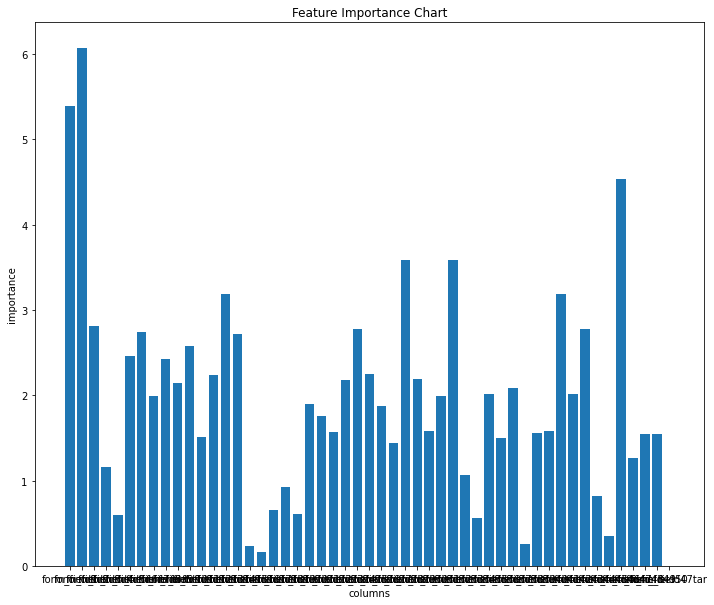

In [197]:
fit_model(cat, train_x, train_y, test_x, test_y)

In [202]:
 cat.fit(train_x, train_y,verbose_eval=1000, early_stopping_rounds=1000,
                    use_best_model=True,plot=False)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	total: 48.2ms	remaining: 8m 1s
1000:	total: 48.1s	remaining: 7m 12s
2000:	total: 1m 34s	remaining: 6m 16s
3000:	total: 2m 18s	remaining: 5m 24s
4000:	total: 3m 7s	remaining: 4m 41s
5000:	total: 3m 54s	remaining: 3m 54s
6000:	total: 4m 43s	remaining: 3m 9s
7000:	total: 5m 30s	remaining: 2m 21s
8000:	total: 6m 15s	remaining: 1m 33s
9000:	total: 7m 4s	remaining: 47.1s
9999:	total: 7m 51s	remaining: 0us


In [164]:
models = [
        

  GradientBoostingClassifier(random_state=0, learning_rate=0.01, 
                  n_estimators=100, max_depth=5),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=5),
        
    xgboost.XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.01, 
                  n_estimators=100, max_depth=5),
    lgb
    
    
]

In [175]:
S_train, S_test = stacking(models,                   
                           train_data, y, test_data,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
                               
                          needs_proba = True,
    
                             
                           save_dir=None, 
            
                           metric=roc_auc_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [roc_auc_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [GradientBoostingClassifier]


ValueError: y should be a 1d array, got an array of shape (14000, 2) instead.

In [131]:
model = catboost.CatBoostClassifier(iterations = 500)
                      
    
model = model.fit(S_train, y)
y_pred =  model.predict_proba(S_test)


Learning rate set to 0.108506
0:	learn: 0.6420070	total: 19.6ms	remaining: 9.8s
1:	learn: 0.6014487	total: 37.3ms	remaining: 9.28s
2:	learn: 0.5702111	total: 57ms	remaining: 9.45s
3:	learn: 0.5461491	total: 77.8ms	remaining: 9.64s
4:	learn: 0.5281439	total: 93.9ms	remaining: 9.3s
5:	learn: 0.5137036	total: 112ms	remaining: 9.19s
6:	learn: 0.5025368	total: 129ms	remaining: 9.11s
7:	learn: 0.4938851	total: 146ms	remaining: 8.96s
8:	learn: 0.4871684	total: 163ms	remaining: 8.87s
9:	learn: 0.4821449	total: 180ms	remaining: 8.81s
10:	learn: 0.4780293	total: 208ms	remaining: 9.25s
11:	learn: 0.4748161	total: 227ms	remaining: 9.23s
12:	learn: 0.4723846	total: 247ms	remaining: 9.26s
13:	learn: 0.4704589	total: 269ms	remaining: 9.35s
14:	learn: 0.4689533	total: 287ms	remaining: 9.27s
15:	learn: 0.4677062	total: 303ms	remaining: 9.16s
16:	learn: 0.4667761	total: 319ms	remaining: 9.07s
17:	learn: 0.4659933	total: 335ms	remaining: 8.98s
18:	learn: 0.4653764	total: 352ms	remaining: 8.9s
19:	learn: 

161:	learn: 0.4630495	total: 3.11s	remaining: 6.49s
162:	learn: 0.4630495	total: 3.13s	remaining: 6.47s
163:	learn: 0.4630495	total: 3.15s	remaining: 6.45s
164:	learn: 0.4630495	total: 3.16s	remaining: 6.42s
165:	learn: 0.4630495	total: 3.18s	remaining: 6.39s
166:	learn: 0.4630495	total: 3.19s	remaining: 6.36s
167:	learn: 0.4630495	total: 3.21s	remaining: 6.33s
168:	learn: 0.4630495	total: 3.23s	remaining: 6.32s
169:	learn: 0.4630495	total: 3.24s	remaining: 6.29s
170:	learn: 0.4630495	total: 3.26s	remaining: 6.27s
171:	learn: 0.4630495	total: 3.28s	remaining: 6.25s
172:	learn: 0.4630495	total: 3.3s	remaining: 6.24s
173:	learn: 0.4630495	total: 3.32s	remaining: 6.22s
174:	learn: 0.4630495	total: 3.34s	remaining: 6.2s
175:	learn: 0.4630495	total: 3.35s	remaining: 6.17s
176:	learn: 0.4630495	total: 3.37s	remaining: 6.15s
177:	learn: 0.4630495	total: 3.39s	remaining: 6.13s
178:	learn: 0.4630495	total: 3.4s	remaining: 6.1s
179:	learn: 0.4630495	total: 3.42s	remaining: 6.08s
180:	learn: 0.46

325:	learn: 0.4630495	total: 6.05s	remaining: 3.23s
326:	learn: 0.4630495	total: 6.07s	remaining: 3.21s
327:	learn: 0.4630495	total: 6.09s	remaining: 3.19s
328:	learn: 0.4630495	total: 6.1s	remaining: 3.17s
329:	learn: 0.4630495	total: 6.12s	remaining: 3.15s
330:	learn: 0.4630495	total: 6.13s	remaining: 3.13s
331:	learn: 0.4630495	total: 6.14s	remaining: 3.11s
332:	learn: 0.4630495	total: 6.16s	remaining: 3.09s
333:	learn: 0.4630495	total: 6.18s	remaining: 3.07s
334:	learn: 0.4630495	total: 6.19s	remaining: 3.05s
335:	learn: 0.4630495	total: 6.21s	remaining: 3.03s
336:	learn: 0.4630495	total: 6.23s	remaining: 3.01s
337:	learn: 0.4630495	total: 6.24s	remaining: 2.99s
338:	learn: 0.4630495	total: 6.26s	remaining: 2.97s
339:	learn: 0.4630495	total: 6.27s	remaining: 2.95s
340:	learn: 0.4630495	total: 6.29s	remaining: 2.93s
341:	learn: 0.4630495	total: 6.3s	remaining: 2.91s
342:	learn: 0.4630495	total: 6.32s	remaining: 2.89s
343:	learn: 0.4630495	total: 6.33s	remaining: 2.87s
344:	learn: 0.

492:	learn: 0.4630495	total: 8.93s	remaining: 127ms
493:	learn: 0.4630495	total: 8.95s	remaining: 109ms
494:	learn: 0.4630495	total: 8.96s	remaining: 90.6ms
495:	learn: 0.4630495	total: 8.98s	remaining: 72.4ms
496:	learn: 0.4630495	total: 9s	remaining: 54.3ms
497:	learn: 0.4630495	total: 9.01s	remaining: 36.2ms
498:	learn: 0.4630495	total: 9.03s	remaining: 18.1ms
499:	learn: 0.4630495	total: 9.04s	remaining: 0us


In [132]:
print( 'Accuracy is {}'.format(accuracy_score(test_y, y_pred)))
print( 'AUC is {}'.format(roc_auc_score(test_y, y_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [14000, 24000]

In [82]:
clf = StackingClassifier(
    estimators=models, final_estimator=cat
)

In [83]:
clf.fit(train_x, train_y)

Learning rate set to 0.011617
0:	learn: 0.6855062	total: 64.8ms	remaining: 5m 24s
1:	learn: 0.6779845	total: 111ms	remaining: 4m 38s
2:	learn: 0.6705988	total: 154ms	remaining: 4m 16s
3:	learn: 0.6636529	total: 199ms	remaining: 4m 8s
4:	learn: 0.6565905	total: 253ms	remaining: 4m 12s
5:	learn: 0.6498907	total: 324ms	remaining: 4m 29s
6:	learn: 0.6439557	total: 420ms	remaining: 4m 59s
7:	learn: 0.6378136	total: 472ms	remaining: 4m 54s
8:	learn: 0.6319887	total: 530ms	remaining: 4m 53s
9:	learn: 0.6261396	total: 571ms	remaining: 4m 44s
10:	learn: 0.6209222	total: 617ms	remaining: 4m 39s
11:	learn: 0.6153226	total: 667ms	remaining: 4m 37s
12:	learn: 0.6098956	total: 722ms	remaining: 4m 37s
13:	learn: 0.6050234	total: 760ms	remaining: 4m 30s
14:	learn: 0.6004178	total: 798ms	remaining: 4m 25s
15:	learn: 0.5959796	total: 864ms	remaining: 4m 29s
16:	learn: 0.5914452	total: 904ms	remaining: 4m 24s
17:	learn: 0.5869379	total: 948ms	remaining: 4m 22s
18:	learn: 0.5826176	total: 989ms	remaining:

161:	learn: 0.4249530	total: 8.09s	remaining: 4m 1s
162:	learn: 0.4247855	total: 8.14s	remaining: 4m 1s
163:	learn: 0.4245988	total: 8.18s	remaining: 4m 1s
164:	learn: 0.4244373	total: 8.26s	remaining: 4m 1s
165:	learn: 0.4242596	total: 8.3s	remaining: 4m 1s
166:	learn: 0.4240711	total: 8.35s	remaining: 4m 1s
167:	learn: 0.4239044	total: 8.39s	remaining: 4m 1s
168:	learn: 0.4237004	total: 8.44s	remaining: 4m 1s
169:	learn: 0.4235277	total: 8.48s	remaining: 4m
170:	learn: 0.4233559	total: 8.52s	remaining: 4m
171:	learn: 0.4231957	total: 8.57s	remaining: 4m
172:	learn: 0.4229918	total: 8.61s	remaining: 4m
173:	learn: 0.4228122	total: 8.65s	remaining: 3m 59s
174:	learn: 0.4226541	total: 8.7s	remaining: 3m 59s
175:	learn: 0.4224885	total: 8.74s	remaining: 3m 59s
176:	learn: 0.4223527	total: 8.79s	remaining: 3m 59s
177:	learn: 0.4221830	total: 8.83s	remaining: 3m 59s
178:	learn: 0.4219746	total: 8.87s	remaining: 3m 58s
179:	learn: 0.4218079	total: 8.91s	remaining: 3m 58s
180:	learn: 0.42161

321:	learn: 0.4092403	total: 15.3s	remaining: 3m 41s
322:	learn: 0.4091891	total: 15.3s	remaining: 3m 41s
323:	learn: 0.4091352	total: 15.3s	remaining: 3m 41s
324:	learn: 0.4090744	total: 15.4s	remaining: 3m 41s
325:	learn: 0.4090228	total: 15.4s	remaining: 3m 41s
326:	learn: 0.4089778	total: 15.5s	remaining: 3m 41s
327:	learn: 0.4089277	total: 15.5s	remaining: 3m 41s
328:	learn: 0.4089007	total: 15.6s	remaining: 3m 40s
329:	learn: 0.4088567	total: 15.6s	remaining: 3m 40s
330:	learn: 0.4087887	total: 15.6s	remaining: 3m 40s
331:	learn: 0.4087422	total: 15.7s	remaining: 3m 40s
332:	learn: 0.4086843	total: 15.7s	remaining: 3m 40s
333:	learn: 0.4086328	total: 15.8s	remaining: 3m 40s
334:	learn: 0.4085833	total: 15.8s	remaining: 3m 40s
335:	learn: 0.4085318	total: 15.9s	remaining: 3m 40s
336:	learn: 0.4084975	total: 15.9s	remaining: 3m 40s
337:	learn: 0.4084496	total: 15.9s	remaining: 3m 40s
338:	learn: 0.4084049	total: 16s	remaining: 3m 39s
339:	learn: 0.4083465	total: 16s	remaining: 3m 3

478:	learn: 0.4028513	total: 22.5s	remaining: 3m 32s
479:	learn: 0.4028243	total: 22.6s	remaining: 3m 32s
480:	learn: 0.4028007	total: 22.6s	remaining: 3m 32s
481:	learn: 0.4027650	total: 22.7s	remaining: 3m 32s
482:	learn: 0.4027247	total: 22.7s	remaining: 3m 32s
483:	learn: 0.4027029	total: 22.8s	remaining: 3m 32s
484:	learn: 0.4026746	total: 22.8s	remaining: 3m 32s
485:	learn: 0.4026347	total: 22.9s	remaining: 3m 32s
486:	learn: 0.4026092	total: 22.9s	remaining: 3m 32s
487:	learn: 0.4025816	total: 23s	remaining: 3m 32s
488:	learn: 0.4025540	total: 23.1s	remaining: 3m 32s
489:	learn: 0.4025259	total: 23.1s	remaining: 3m 32s
490:	learn: 0.4024891	total: 23.2s	remaining: 3m 32s
491:	learn: 0.4024635	total: 23.2s	remaining: 3m 32s
492:	learn: 0.4024325	total: 23.3s	remaining: 3m 32s
493:	learn: 0.4024037	total: 23.3s	remaining: 3m 32s
494:	learn: 0.4023773	total: 23.4s	remaining: 3m 32s
495:	learn: 0.4023399	total: 23.4s	remaining: 3m 32s
496:	learn: 0.4023102	total: 23.4s	remaining: 3m

634:	learn: 0.3983545	total: 32s	remaining: 3m 39s
635:	learn: 0.3983338	total: 32s	remaining: 3m 39s
636:	learn: 0.3983108	total: 32.1s	remaining: 3m 40s
637:	learn: 0.3982889	total: 32.2s	remaining: 3m 39s
638:	learn: 0.3982573	total: 32.2s	remaining: 3m 40s
639:	learn: 0.3982155	total: 32.3s	remaining: 3m 40s
640:	learn: 0.3981855	total: 32.3s	remaining: 3m 39s
641:	learn: 0.3981556	total: 32.4s	remaining: 3m 39s
642:	learn: 0.3981386	total: 32.5s	remaining: 3m 40s
643:	learn: 0.3981114	total: 32.5s	remaining: 3m 39s
644:	learn: 0.3980795	total: 32.6s	remaining: 3m 39s
645:	learn: 0.3980530	total: 32.6s	remaining: 3m 39s
646:	learn: 0.3980365	total: 32.7s	remaining: 3m 39s
647:	learn: 0.3980008	total: 32.8s	remaining: 3m 39s
648:	learn: 0.3979895	total: 32.8s	remaining: 3m 39s
649:	learn: 0.3979644	total: 32.9s	remaining: 3m 40s
650:	learn: 0.3979414	total: 33s	remaining: 3m 40s
651:	learn: 0.3979171	total: 33s	remaining: 3m 40s
652:	learn: 0.3979049	total: 33.1s	remaining: 3m 40s
6

790:	learn: 0.3946428	total: 40.6s	remaining: 3m 35s
791:	learn: 0.3946108	total: 40.7s	remaining: 3m 36s
792:	learn: 0.3945832	total: 40.8s	remaining: 3m 36s
793:	learn: 0.3945637	total: 40.9s	remaining: 3m 36s
794:	learn: 0.3945422	total: 41s	remaining: 3m 36s
795:	learn: 0.3945133	total: 41.1s	remaining: 3m 36s
796:	learn: 0.3944952	total: 41.1s	remaining: 3m 36s
797:	learn: 0.3944605	total: 41.2s	remaining: 3m 36s
798:	learn: 0.3944345	total: 41.2s	remaining: 3m 36s
799:	learn: 0.3944172	total: 41.3s	remaining: 3m 36s
800:	learn: 0.3943927	total: 41.3s	remaining: 3m 36s
801:	learn: 0.3943725	total: 41.4s	remaining: 3m 36s
802:	learn: 0.3943485	total: 41.4s	remaining: 3m 36s
803:	learn: 0.3943310	total: 41.5s	remaining: 3m 36s
804:	learn: 0.3943017	total: 41.5s	remaining: 3m 36s
805:	learn: 0.3942811	total: 41.6s	remaining: 3m 36s
806:	learn: 0.3942545	total: 41.7s	remaining: 3m 36s
807:	learn: 0.3942273	total: 41.7s	remaining: 3m 36s
808:	learn: 0.3941949	total: 41.8s	remaining: 3m

947:	learn: 0.3908842	total: 49.3s	remaining: 3m 30s
948:	learn: 0.3908715	total: 49.4s	remaining: 3m 30s
949:	learn: 0.3908569	total: 49.4s	remaining: 3m 30s
950:	learn: 0.3908216	total: 49.5s	remaining: 3m 30s
951:	learn: 0.3907935	total: 49.5s	remaining: 3m 30s
952:	learn: 0.3907599	total: 49.6s	remaining: 3m 30s
953:	learn: 0.3907363	total: 49.6s	remaining: 3m 30s
954:	learn: 0.3907051	total: 49.7s	remaining: 3m 30s
955:	learn: 0.3906799	total: 49.7s	remaining: 3m 30s
956:	learn: 0.3906598	total: 49.8s	remaining: 3m 30s
957:	learn: 0.3906309	total: 49.8s	remaining: 3m 30s
958:	learn: 0.3906083	total: 49.9s	remaining: 3m 30s
959:	learn: 0.3905829	total: 50s	remaining: 3m 30s
960:	learn: 0.3905716	total: 50s	remaining: 3m 30s
961:	learn: 0.3905547	total: 50s	remaining: 3m 30s
962:	learn: 0.3905305	total: 50.1s	remaining: 3m 29s
963:	learn: 0.3904971	total: 50.1s	remaining: 3m 29s
964:	learn: 0.3904788	total: 50.2s	remaining: 3m 29s
965:	learn: 0.3904574	total: 50.2s	remaining: 3m 29s

1103:	learn: 0.3869191	total: 57.3s	remaining: 3m 22s
1104:	learn: 0.3868863	total: 57.4s	remaining: 3m 22s
1105:	learn: 0.3868635	total: 57.4s	remaining: 3m 22s
1106:	learn: 0.3868377	total: 57.5s	remaining: 3m 22s
1107:	learn: 0.3868036	total: 57.6s	remaining: 3m 22s
1108:	learn: 0.3867745	total: 57.6s	remaining: 3m 22s
1109:	learn: 0.3867661	total: 57.7s	remaining: 3m 22s
1110:	learn: 0.3867485	total: 57.7s	remaining: 3m 21s
1111:	learn: 0.3867130	total: 57.8s	remaining: 3m 21s
1112:	learn: 0.3866953	total: 57.8s	remaining: 3m 21s
1113:	learn: 0.3866735	total: 57.9s	remaining: 3m 21s
1114:	learn: 0.3866408	total: 57.9s	remaining: 3m 21s
1115:	learn: 0.3866143	total: 58s	remaining: 3m 21s
1116:	learn: 0.3866015	total: 58s	remaining: 3m 21s
1117:	learn: 0.3865765	total: 58.1s	remaining: 3m 21s
1118:	learn: 0.3865440	total: 58.1s	remaining: 3m 21s
1119:	learn: 0.3865099	total: 58.2s	remaining: 3m 21s
1120:	learn: 0.3864809	total: 58.2s	remaining: 3m 21s
1121:	learn: 0.3864633	total: 58

1261:	learn: 0.3828134	total: 1m 5s	remaining: 3m 14s
1262:	learn: 0.3827910	total: 1m 5s	remaining: 3m 14s
1263:	learn: 0.3827658	total: 1m 5s	remaining: 3m 14s
1264:	learn: 0.3827345	total: 1m 5s	remaining: 3m 13s
1265:	learn: 0.3827123	total: 1m 5s	remaining: 3m 13s
1266:	learn: 0.3826901	total: 1m 5s	remaining: 3m 13s
1267:	learn: 0.3826645	total: 1m 5s	remaining: 3m 13s
1268:	learn: 0.3826400	total: 1m 5s	remaining: 3m 13s
1269:	learn: 0.3826127	total: 1m 5s	remaining: 3m 13s
1270:	learn: 0.3825876	total: 1m 5s	remaining: 3m 13s
1271:	learn: 0.3825661	total: 1m 6s	remaining: 3m 13s
1272:	learn: 0.3825435	total: 1m 6s	remaining: 3m 13s
1273:	learn: 0.3825156	total: 1m 6s	remaining: 3m 13s
1274:	learn: 0.3824952	total: 1m 6s	remaining: 3m 13s
1275:	learn: 0.3824736	total: 1m 6s	remaining: 3m 13s
1276:	learn: 0.3824424	total: 1m 6s	remaining: 3m 13s
1277:	learn: 0.3824175	total: 1m 6s	remaining: 3m 13s
1278:	learn: 0.3823906	total: 1m 6s	remaining: 3m 13s
1279:	learn: 0.3823676	total

1414:	learn: 0.3790743	total: 1m 13s	remaining: 3m 5s
1415:	learn: 0.3790521	total: 1m 13s	remaining: 3m 5s
1416:	learn: 0.3790304	total: 1m 13s	remaining: 3m 5s
1417:	learn: 0.3790031	total: 1m 13s	remaining: 3m 5s
1418:	learn: 0.3789799	total: 1m 13s	remaining: 3m 5s
1419:	learn: 0.3789402	total: 1m 13s	remaining: 3m 5s
1420:	learn: 0.3789168	total: 1m 13s	remaining: 3m 5s
1421:	learn: 0.3788909	total: 1m 13s	remaining: 3m 5s
1422:	learn: 0.3788646	total: 1m 13s	remaining: 3m 5s
1423:	learn: 0.3788388	total: 1m 13s	remaining: 3m 5s
1424:	learn: 0.3788202	total: 1m 13s	remaining: 3m 5s
1425:	learn: 0.3787882	total: 1m 13s	remaining: 3m 5s
1426:	learn: 0.3787681	total: 1m 13s	remaining: 3m 5s
1427:	learn: 0.3787454	total: 1m 13s	remaining: 3m 5s
1428:	learn: 0.3787226	total: 1m 14s	remaining: 3m 5s
1429:	learn: 0.3786962	total: 1m 14s	remaining: 3m 5s
1430:	learn: 0.3786811	total: 1m 14s	remaining: 3m 5s
1431:	learn: 0.3786641	total: 1m 14s	remaining: 3m 4s
1432:	learn: 0.3786358	total

1567:	learn: 0.3754258	total: 1m 20s	remaining: 2m 56s
1568:	learn: 0.3754022	total: 1m 20s	remaining: 2m 56s
1569:	learn: 0.3753784	total: 1m 20s	remaining: 2m 56s
1570:	learn: 0.3753616	total: 1m 20s	remaining: 2m 56s
1571:	learn: 0.3753410	total: 1m 21s	remaining: 2m 56s
1572:	learn: 0.3753179	total: 1m 21s	remaining: 2m 56s
1573:	learn: 0.3752975	total: 1m 21s	remaining: 2m 56s
1574:	learn: 0.3752725	total: 1m 21s	remaining: 2m 56s
1575:	learn: 0.3752371	total: 1m 21s	remaining: 2m 56s
1576:	learn: 0.3752068	total: 1m 21s	remaining: 2m 56s
1577:	learn: 0.3751824	total: 1m 21s	remaining: 2m 56s
1578:	learn: 0.3751583	total: 1m 21s	remaining: 2m 56s
1579:	learn: 0.3751411	total: 1m 21s	remaining: 2m 56s
1580:	learn: 0.3751176	total: 1m 21s	remaining: 2m 56s
1581:	learn: 0.3750879	total: 1m 21s	remaining: 2m 56s
1582:	learn: 0.3750651	total: 1m 21s	remaining: 2m 56s
1583:	learn: 0.3750427	total: 1m 21s	remaining: 2m 56s
1584:	learn: 0.3750159	total: 1m 21s	remaining: 2m 55s
1585:	lear

1719:	learn: 0.3720117	total: 1m 28s	remaining: 2m 48s
1720:	learn: 0.3719791	total: 1m 28s	remaining: 2m 48s
1721:	learn: 0.3719578	total: 1m 28s	remaining: 2m 48s
1722:	learn: 0.3719283	total: 1m 28s	remaining: 2m 48s
1723:	learn: 0.3719091	total: 1m 28s	remaining: 2m 48s
1724:	learn: 0.3718788	total: 1m 28s	remaining: 2m 48s
1725:	learn: 0.3718562	total: 1m 29s	remaining: 2m 48s
1726:	learn: 0.3718320	total: 1m 29s	remaining: 2m 48s
1727:	learn: 0.3718051	total: 1m 29s	remaining: 2m 48s
1728:	learn: 0.3717849	total: 1m 29s	remaining: 2m 48s
1729:	learn: 0.3717650	total: 1m 29s	remaining: 2m 48s
1730:	learn: 0.3717466	total: 1m 29s	remaining: 2m 48s
1731:	learn: 0.3717252	total: 1m 29s	remaining: 2m 48s
1732:	learn: 0.3717015	total: 1m 29s	remaining: 2m 48s
1733:	learn: 0.3716749	total: 1m 29s	remaining: 2m 48s
1734:	learn: 0.3716457	total: 1m 29s	remaining: 2m 48s
1735:	learn: 0.3716267	total: 1m 29s	remaining: 2m 48s
1736:	learn: 0.3715986	total: 1m 29s	remaining: 2m 48s
1737:	lear

1868:	learn: 0.3686302	total: 1m 36s	remaining: 2m 42s
1869:	learn: 0.3686091	total: 1m 37s	remaining: 2m 42s
1870:	learn: 0.3685838	total: 1m 37s	remaining: 2m 42s
1871:	learn: 0.3685640	total: 1m 37s	remaining: 2m 42s
1872:	learn: 0.3685403	total: 1m 37s	remaining: 2m 42s
1873:	learn: 0.3685186	total: 1m 37s	remaining: 2m 42s
1874:	learn: 0.3685013	total: 1m 37s	remaining: 2m 42s
1875:	learn: 0.3684761	total: 1m 37s	remaining: 2m 42s
1876:	learn: 0.3684519	total: 1m 37s	remaining: 2m 41s
1877:	learn: 0.3684326	total: 1m 37s	remaining: 2m 41s
1878:	learn: 0.3684034	total: 1m 37s	remaining: 2m 41s
1879:	learn: 0.3683893	total: 1m 37s	remaining: 2m 41s
1880:	learn: 0.3683664	total: 1m 37s	remaining: 2m 41s
1881:	learn: 0.3683403	total: 1m 37s	remaining: 2m 41s
1882:	learn: 0.3683174	total: 1m 37s	remaining: 2m 41s
1883:	learn: 0.3682912	total: 1m 37s	remaining: 2m 41s
1884:	learn: 0.3682585	total: 1m 37s	remaining: 2m 41s
1885:	learn: 0.3682488	total: 1m 37s	remaining: 2m 41s
1886:	lear

2019:	learn: 0.3653855	total: 1m 44s	remaining: 2m 34s
2020:	learn: 0.3653742	total: 1m 44s	remaining: 2m 34s
2021:	learn: 0.3653573	total: 1m 45s	remaining: 2m 34s
2022:	learn: 0.3653314	total: 1m 45s	remaining: 2m 34s
2023:	learn: 0.3653091	total: 1m 45s	remaining: 2m 34s
2024:	learn: 0.3653037	total: 1m 45s	remaining: 2m 34s
2025:	learn: 0.3652790	total: 1m 45s	remaining: 2m 34s
2026:	learn: 0.3652639	total: 1m 45s	remaining: 2m 34s
2027:	learn: 0.3652429	total: 1m 45s	remaining: 2m 34s
2028:	learn: 0.3652209	total: 1m 45s	remaining: 2m 34s
2029:	learn: 0.3651971	total: 1m 45s	remaining: 2m 34s
2030:	learn: 0.3651806	total: 1m 45s	remaining: 2m 34s
2031:	learn: 0.3651592	total: 1m 45s	remaining: 2m 34s
2032:	learn: 0.3651335	total: 1m 45s	remaining: 2m 34s
2033:	learn: 0.3651153	total: 1m 45s	remaining: 2m 34s
2034:	learn: 0.3650922	total: 1m 45s	remaining: 2m 33s
2035:	learn: 0.3650758	total: 1m 45s	remaining: 2m 33s
2036:	learn: 0.3650600	total: 1m 45s	remaining: 2m 33s
2037:	lear

2168:	learn: 0.3623357	total: 1m 52s	remaining: 2m 26s
2169:	learn: 0.3623134	total: 1m 52s	remaining: 2m 26s
2170:	learn: 0.3622925	total: 1m 52s	remaining: 2m 26s
2171:	learn: 0.3622718	total: 1m 52s	remaining: 2m 26s
2172:	learn: 0.3622540	total: 1m 52s	remaining: 2m 26s
2173:	learn: 0.3622298	total: 1m 52s	remaining: 2m 26s
2174:	learn: 0.3622083	total: 1m 52s	remaining: 2m 26s
2175:	learn: 0.3621886	total: 1m 52s	remaining: 2m 26s
2176:	learn: 0.3621646	total: 1m 53s	remaining: 2m 26s
2177:	learn: 0.3621474	total: 1m 53s	remaining: 2m 26s
2178:	learn: 0.3621233	total: 1m 53s	remaining: 2m 26s
2179:	learn: 0.3621197	total: 1m 53s	remaining: 2m 26s
2180:	learn: 0.3620916	total: 1m 53s	remaining: 2m 26s
2181:	learn: 0.3620710	total: 1m 53s	remaining: 2m 26s
2182:	learn: 0.3620464	total: 1m 53s	remaining: 2m 26s
2183:	learn: 0.3620248	total: 1m 53s	remaining: 2m 26s
2184:	learn: 0.3620005	total: 1m 53s	remaining: 2m 26s
2185:	learn: 0.3619842	total: 1m 53s	remaining: 2m 26s
2186:	lear

2318:	learn: 0.3592289	total: 2m	remaining: 2m 19s
2319:	learn: 0.3592085	total: 2m	remaining: 2m 18s
2320:	learn: 0.3591975	total: 2m	remaining: 2m 18s
2321:	learn: 0.3591746	total: 2m	remaining: 2m 18s
2322:	learn: 0.3591587	total: 2m	remaining: 2m 18s
2323:	learn: 0.3591371	total: 2m	remaining: 2m 18s
2324:	learn: 0.3591043	total: 2m	remaining: 2m 18s
2325:	learn: 0.3590797	total: 2m	remaining: 2m 18s
2326:	learn: 0.3590617	total: 2m	remaining: 2m 18s
2327:	learn: 0.3590342	total: 2m	remaining: 2m 18s
2328:	learn: 0.3590122	total: 2m	remaining: 2m 18s
2329:	learn: 0.3589887	total: 2m	remaining: 2m 18s
2330:	learn: 0.3589681	total: 2m	remaining: 2m 18s
2331:	learn: 0.3589443	total: 2m	remaining: 2m 18s
2332:	learn: 0.3589267	total: 2m	remaining: 2m 18s
2333:	learn: 0.3589085	total: 2m	remaining: 2m 18s
2334:	learn: 0.3588770	total: 2m 1s	remaining: 2m 18s
2335:	learn: 0.3588547	total: 2m 1s	remaining: 2m 18s
2336:	learn: 0.3588343	total: 2m 1s	remaining: 2m 18s
2337:	learn: 0.3588173

2473:	learn: 0.3562232	total: 2m 7s	remaining: 2m 10s
2474:	learn: 0.3562086	total: 2m 8s	remaining: 2m 10s
2475:	learn: 0.3561817	total: 2m 8s	remaining: 2m 10s
2476:	learn: 0.3561705	total: 2m 8s	remaining: 2m 10s
2477:	learn: 0.3561418	total: 2m 8s	remaining: 2m 10s
2478:	learn: 0.3561161	total: 2m 8s	remaining: 2m 10s
2479:	learn: 0.3560882	total: 2m 8s	remaining: 2m 10s
2480:	learn: 0.3560670	total: 2m 8s	remaining: 2m 10s
2481:	learn: 0.3560411	total: 2m 8s	remaining: 2m 10s
2482:	learn: 0.3560295	total: 2m 8s	remaining: 2m 10s
2483:	learn: 0.3560101	total: 2m 8s	remaining: 2m 10s
2484:	learn: 0.3559938	total: 2m 8s	remaining: 2m 10s
2485:	learn: 0.3559732	total: 2m 8s	remaining: 2m 10s
2486:	learn: 0.3559564	total: 2m 8s	remaining: 2m 9s
2487:	learn: 0.3559375	total: 2m 8s	remaining: 2m 9s
2488:	learn: 0.3559161	total: 2m 8s	remaining: 2m 9s
2489:	learn: 0.3558970	total: 2m 8s	remaining: 2m 9s
2490:	learn: 0.3558785	total: 2m 8s	remaining: 2m 9s
2491:	learn: 0.3558650	total: 2m 

2630:	learn: 0.3532158	total: 2m 15s	remaining: 2m 2s
2631:	learn: 0.3531901	total: 2m 15s	remaining: 2m 2s
2632:	learn: 0.3531648	total: 2m 15s	remaining: 2m 2s
2633:	learn: 0.3531512	total: 2m 15s	remaining: 2m 2s
2634:	learn: 0.3531337	total: 2m 15s	remaining: 2m 1s
2635:	learn: 0.3531185	total: 2m 15s	remaining: 2m 1s
2636:	learn: 0.3530982	total: 2m 15s	remaining: 2m 1s
2637:	learn: 0.3530699	total: 2m 16s	remaining: 2m 1s
2638:	learn: 0.3530533	total: 2m 16s	remaining: 2m 1s
2639:	learn: 0.3530344	total: 2m 16s	remaining: 2m 1s
2640:	learn: 0.3530132	total: 2m 16s	remaining: 2m 1s
2641:	learn: 0.3529950	total: 2m 16s	remaining: 2m 1s
2642:	learn: 0.3529697	total: 2m 16s	remaining: 2m 1s
2643:	learn: 0.3529531	total: 2m 16s	remaining: 2m 1s
2644:	learn: 0.3529358	total: 2m 16s	remaining: 2m 1s
2645:	learn: 0.3529191	total: 2m 16s	remaining: 2m 1s
2646:	learn: 0.3528946	total: 2m 16s	remaining: 2m 1s
2647:	learn: 0.3528755	total: 2m 16s	remaining: 2m 1s
2648:	learn: 0.3528562	total

2785:	learn: 0.3502709	total: 2m 23s	remaining: 1m 54s
2786:	learn: 0.3502569	total: 2m 23s	remaining: 1m 54s
2787:	learn: 0.3502376	total: 2m 23s	remaining: 1m 54s
2788:	learn: 0.3502088	total: 2m 24s	remaining: 1m 54s
2789:	learn: 0.3501985	total: 2m 24s	remaining: 1m 54s
2790:	learn: 0.3501797	total: 2m 24s	remaining: 1m 54s
2791:	learn: 0.3501578	total: 2m 24s	remaining: 1m 54s
2792:	learn: 0.3501347	total: 2m 24s	remaining: 1m 54s
2793:	learn: 0.3501184	total: 2m 24s	remaining: 1m 53s
2794:	learn: 0.3501129	total: 2m 24s	remaining: 1m 53s
2795:	learn: 0.3500921	total: 2m 24s	remaining: 1m 53s
2796:	learn: 0.3500789	total: 2m 24s	remaining: 1m 53s
2797:	learn: 0.3500653	total: 2m 24s	remaining: 1m 53s
2798:	learn: 0.3500549	total: 2m 24s	remaining: 1m 53s
2799:	learn: 0.3500269	total: 2m 24s	remaining: 1m 53s
2800:	learn: 0.3500047	total: 2m 24s	remaining: 1m 53s
2801:	learn: 0.3499842	total: 2m 24s	remaining: 1m 53s
2802:	learn: 0.3499618	total: 2m 24s	remaining: 1m 53s
2803:	lear

2934:	learn: 0.3475655	total: 2m 32s	remaining: 1m 46s
2935:	learn: 0.3475410	total: 2m 32s	remaining: 1m 46s
2936:	learn: 0.3475207	total: 2m 32s	remaining: 1m 46s
2937:	learn: 0.3474981	total: 2m 32s	remaining: 1m 46s
2938:	learn: 0.3474809	total: 2m 32s	remaining: 1m 46s
2939:	learn: 0.3474654	total: 2m 32s	remaining: 1m 46s
2940:	learn: 0.3474488	total: 2m 32s	remaining: 1m 46s
2941:	learn: 0.3474308	total: 2m 32s	remaining: 1m 46s
2942:	learn: 0.3474142	total: 2m 32s	remaining: 1m 46s
2943:	learn: 0.3474012	total: 2m 32s	remaining: 1m 46s
2944:	learn: 0.3473839	total: 2m 32s	remaining: 1m 46s
2945:	learn: 0.3473570	total: 2m 32s	remaining: 1m 46s
2946:	learn: 0.3473367	total: 2m 32s	remaining: 1m 46s
2947:	learn: 0.3473186	total: 2m 32s	remaining: 1m 46s
2948:	learn: 0.3473044	total: 2m 32s	remaining: 1m 46s
2949:	learn: 0.3472866	total: 2m 32s	remaining: 1m 46s
2950:	learn: 0.3472712	total: 2m 32s	remaining: 1m 46s
2951:	learn: 0.3472661	total: 2m 32s	remaining: 1m 46s
2952:	lear

3083:	learn: 0.3447875	total: 2m 39s	remaining: 1m 39s
3084:	learn: 0.3447649	total: 2m 39s	remaining: 1m 39s
3085:	learn: 0.3447530	total: 2m 39s	remaining: 1m 39s
3086:	learn: 0.3447386	total: 2m 39s	remaining: 1m 39s
3087:	learn: 0.3447210	total: 2m 40s	remaining: 1m 39s
3088:	learn: 0.3447024	total: 2m 40s	remaining: 1m 39s
3089:	learn: 0.3446813	total: 2m 40s	remaining: 1m 38s
3090:	learn: 0.3446658	total: 2m 40s	remaining: 1m 38s
3091:	learn: 0.3446540	total: 2m 40s	remaining: 1m 38s
3092:	learn: 0.3446324	total: 2m 40s	remaining: 1m 38s
3093:	learn: 0.3446099	total: 2m 40s	remaining: 1m 38s
3094:	learn: 0.3446029	total: 2m 40s	remaining: 1m 38s
3095:	learn: 0.3445858	total: 2m 40s	remaining: 1m 38s
3096:	learn: 0.3445654	total: 2m 40s	remaining: 1m 38s
3097:	learn: 0.3445600	total: 2m 40s	remaining: 1m 38s
3098:	learn: 0.3445493	total: 2m 40s	remaining: 1m 38s
3099:	learn: 0.3445275	total: 2m 40s	remaining: 1m 38s
3100:	learn: 0.3445177	total: 2m 40s	remaining: 1m 38s
3101:	lear

3235:	learn: 0.3420205	total: 2m 47s	remaining: 1m 31s
3236:	learn: 0.3420024	total: 2m 47s	remaining: 1m 31s
3237:	learn: 0.3419896	total: 2m 47s	remaining: 1m 31s
3238:	learn: 0.3419654	total: 2m 47s	remaining: 1m 31s
3239:	learn: 0.3419519	total: 2m 47s	remaining: 1m 31s
3240:	learn: 0.3419242	total: 2m 48s	remaining: 1m 31s
3241:	learn: 0.3419078	total: 2m 48s	remaining: 1m 31s
3242:	learn: 0.3418890	total: 2m 48s	remaining: 1m 31s
3243:	learn: 0.3418686	total: 2m 48s	remaining: 1m 31s
3244:	learn: 0.3418522	total: 2m 48s	remaining: 1m 30s
3245:	learn: 0.3418358	total: 2m 48s	remaining: 1m 30s
3246:	learn: 0.3418154	total: 2m 48s	remaining: 1m 30s
3247:	learn: 0.3417974	total: 2m 48s	remaining: 1m 30s
3248:	learn: 0.3417810	total: 2m 48s	remaining: 1m 30s
3249:	learn: 0.3417639	total: 2m 48s	remaining: 1m 30s
3250:	learn: 0.3417470	total: 2m 48s	remaining: 1m 30s
3251:	learn: 0.3417266	total: 2m 48s	remaining: 1m 30s
3252:	learn: 0.3417061	total: 2m 48s	remaining: 1m 30s
3253:	lear

3386:	learn: 0.3393361	total: 2m 55s	remaining: 1m 23s
3387:	learn: 0.3393243	total: 2m 55s	remaining: 1m 23s
3388:	learn: 0.3393064	total: 2m 55s	remaining: 1m 23s
3389:	learn: 0.3392835	total: 2m 55s	remaining: 1m 23s
3390:	learn: 0.3392719	total: 2m 55s	remaining: 1m 23s
3391:	learn: 0.3392506	total: 2m 55s	remaining: 1m 23s
3392:	learn: 0.3392348	total: 2m 55s	remaining: 1m 23s
3393:	learn: 0.3392268	total: 2m 55s	remaining: 1m 23s
3394:	learn: 0.3392067	total: 2m 55s	remaining: 1m 23s
3395:	learn: 0.3391937	total: 2m 56s	remaining: 1m 23s
3396:	learn: 0.3391727	total: 2m 56s	remaining: 1m 23s
3397:	learn: 0.3391469	total: 2m 56s	remaining: 1m 23s
3398:	learn: 0.3391318	total: 2m 56s	remaining: 1m 22s
3399:	learn: 0.3391153	total: 2m 56s	remaining: 1m 22s
3400:	learn: 0.3390986	total: 2m 56s	remaining: 1m 22s
3401:	learn: 0.3390809	total: 2m 56s	remaining: 1m 22s
3402:	learn: 0.3390618	total: 2m 56s	remaining: 1m 22s
3403:	learn: 0.3390524	total: 2m 56s	remaining: 1m 22s
3404:	lear

3540:	learn: 0.3365618	total: 3m 3s	remaining: 1m 15s
3541:	learn: 0.3365526	total: 3m 3s	remaining: 1m 15s
3542:	learn: 0.3365359	total: 3m 3s	remaining: 1m 15s
3543:	learn: 0.3365177	total: 3m 3s	remaining: 1m 15s
3544:	learn: 0.3365002	total: 3m 3s	remaining: 1m 15s
3545:	learn: 0.3364761	total: 3m 3s	remaining: 1m 15s
3546:	learn: 0.3364570	total: 3m 3s	remaining: 1m 15s
3547:	learn: 0.3364460	total: 3m 4s	remaining: 1m 15s
3548:	learn: 0.3364269	total: 3m 4s	remaining: 1m 15s
3549:	learn: 0.3364091	total: 3m 4s	remaining: 1m 15s
3550:	learn: 0.3363913	total: 3m 4s	remaining: 1m 15s
3551:	learn: 0.3363814	total: 3m 4s	remaining: 1m 15s
3552:	learn: 0.3363614	total: 3m 4s	remaining: 1m 15s
3553:	learn: 0.3363510	total: 3m 4s	remaining: 1m 14s
3554:	learn: 0.3363298	total: 3m 4s	remaining: 1m 14s
3555:	learn: 0.3363068	total: 3m 4s	remaining: 1m 14s
3556:	learn: 0.3362918	total: 3m 4s	remaining: 1m 14s
3557:	learn: 0.3362662	total: 3m 4s	remaining: 1m 14s
3558:	learn: 0.3362459	total

3696:	learn: 0.3338242	total: 3m 11s	remaining: 1m 7s
3697:	learn: 0.3338110	total: 3m 11s	remaining: 1m 7s
3698:	learn: 0.3337871	total: 3m 11s	remaining: 1m 7s
3699:	learn: 0.3337782	total: 3m 11s	remaining: 1m 7s
3700:	learn: 0.3337646	total: 3m 11s	remaining: 1m 7s
3701:	learn: 0.3337490	total: 3m 11s	remaining: 1m 7s
3702:	learn: 0.3337273	total: 3m 11s	remaining: 1m 7s
3703:	learn: 0.3337075	total: 3m 11s	remaining: 1m 7s
3704:	learn: 0.3336858	total: 3m 11s	remaining: 1m 7s
3705:	learn: 0.3336600	total: 3m 11s	remaining: 1m 7s
3706:	learn: 0.3336447	total: 3m 11s	remaining: 1m 6s
3707:	learn: 0.3336239	total: 3m 12s	remaining: 1m 6s
3708:	learn: 0.3336023	total: 3m 12s	remaining: 1m 6s
3709:	learn: 0.3335832	total: 3m 12s	remaining: 1m 6s
3710:	learn: 0.3335622	total: 3m 12s	remaining: 1m 6s
3711:	learn: 0.3335411	total: 3m 12s	remaining: 1m 6s
3712:	learn: 0.3335322	total: 3m 12s	remaining: 1m 6s
3713:	learn: 0.3335164	total: 3m 12s	remaining: 1m 6s
3714:	learn: 0.3334931	total

3849:	learn: 0.3311739	total: 3m 19s	remaining: 59.6s
3850:	learn: 0.3311585	total: 3m 19s	remaining: 59.5s
3851:	learn: 0.3311418	total: 3m 19s	remaining: 59.5s
3852:	learn: 0.3311253	total: 3m 19s	remaining: 59.4s
3853:	learn: 0.3311107	total: 3m 19s	remaining: 59.3s
3854:	learn: 0.3310920	total: 3m 19s	remaining: 59.3s
3855:	learn: 0.3310660	total: 3m 19s	remaining: 59.2s
3856:	learn: 0.3310609	total: 3m 19s	remaining: 59.2s
3857:	learn: 0.3310477	total: 3m 19s	remaining: 59.1s
3858:	learn: 0.3310363	total: 3m 19s	remaining: 59.1s
3859:	learn: 0.3310205	total: 3m 19s	remaining: 59s
3860:	learn: 0.3309986	total: 3m 19s	remaining: 59s
3861:	learn: 0.3309813	total: 3m 19s	remaining: 58.9s
3862:	learn: 0.3309663	total: 3m 19s	remaining: 58.9s
3863:	learn: 0.3309550	total: 3m 20s	remaining: 58.8s
3864:	learn: 0.3309305	total: 3m 20s	remaining: 58.8s
3865:	learn: 0.3309255	total: 3m 20s	remaining: 58.7s
3866:	learn: 0.3309072	total: 3m 20s	remaining: 58.7s
3867:	learn: 0.3308880	total: 3m

4003:	learn: 0.3286426	total: 3m 27s	remaining: 51.5s
4004:	learn: 0.3286270	total: 3m 27s	remaining: 51.5s
4005:	learn: 0.3286121	total: 3m 27s	remaining: 51.4s
4006:	learn: 0.3285951	total: 3m 27s	remaining: 51.4s
4007:	learn: 0.3285781	total: 3m 27s	remaining: 51.3s
4008:	learn: 0.3285650	total: 3m 27s	remaining: 51.3s
4009:	learn: 0.3285594	total: 3m 27s	remaining: 51.2s
4010:	learn: 0.3285408	total: 3m 27s	remaining: 51.2s
4011:	learn: 0.3285279	total: 3m 27s	remaining: 51.1s
4012:	learn: 0.3285092	total: 3m 27s	remaining: 51.1s
4013:	learn: 0.3284977	total: 3m 27s	remaining: 51s
4014:	learn: 0.3284885	total: 3m 27s	remaining: 51s
4015:	learn: 0.3284715	total: 3m 27s	remaining: 50.9s
4016:	learn: 0.3284508	total: 3m 27s	remaining: 50.8s
4017:	learn: 0.3284297	total: 3m 27s	remaining: 50.8s
4018:	learn: 0.3284161	total: 3m 27s	remaining: 50.7s
4019:	learn: 0.3284056	total: 3m 27s	remaining: 50.7s
4020:	learn: 0.3283914	total: 3m 28s	remaining: 50.6s
4021:	learn: 0.3283789	total: 3m

4158:	learn: 0.3261273	total: 3m 35s	remaining: 43.5s
4159:	learn: 0.3261075	total: 3m 35s	remaining: 43.5s
4160:	learn: 0.3260890	total: 3m 35s	remaining: 43.4s
4161:	learn: 0.3260754	total: 3m 35s	remaining: 43.4s
4162:	learn: 0.3260581	total: 3m 35s	remaining: 43.3s
4163:	learn: 0.3260493	total: 3m 35s	remaining: 43.3s
4164:	learn: 0.3260235	total: 3m 35s	remaining: 43.2s
4165:	learn: 0.3260196	total: 3m 35s	remaining: 43.2s
4166:	learn: 0.3260055	total: 3m 35s	remaining: 43.1s
4167:	learn: 0.3259852	total: 3m 35s	remaining: 43.1s
4168:	learn: 0.3259707	total: 3m 35s	remaining: 43s
4169:	learn: 0.3259515	total: 3m 35s	remaining: 43s
4170:	learn: 0.3259366	total: 3m 35s	remaining: 42.9s
4171:	learn: 0.3259165	total: 3m 35s	remaining: 42.9s
4172:	learn: 0.3259047	total: 3m 35s	remaining: 42.8s
4173:	learn: 0.3258884	total: 3m 36s	remaining: 42.7s
4174:	learn: 0.3258740	total: 3m 36s	remaining: 42.7s
4175:	learn: 0.3258618	total: 3m 36s	remaining: 42.6s
4176:	learn: 0.3258417	total: 3m

4312:	learn: 0.3235347	total: 3m 43s	remaining: 35.6s
4313:	learn: 0.3235197	total: 3m 43s	remaining: 35.5s
4314:	learn: 0.3235078	total: 3m 43s	remaining: 35.5s
4315:	learn: 0.3234976	total: 3m 43s	remaining: 35.4s
4316:	learn: 0.3234812	total: 3m 43s	remaining: 35.4s
4317:	learn: 0.3234617	total: 3m 43s	remaining: 35.3s
4318:	learn: 0.3234461	total: 3m 43s	remaining: 35.3s
4319:	learn: 0.3234354	total: 3m 43s	remaining: 35.2s
4320:	learn: 0.3234163	total: 3m 43s	remaining: 35.2s
4321:	learn: 0.3234082	total: 3m 43s	remaining: 35.1s
4322:	learn: 0.3233836	total: 3m 43s	remaining: 35s
4323:	learn: 0.3233711	total: 3m 43s	remaining: 35s
4324:	learn: 0.3233515	total: 3m 43s	remaining: 34.9s
4325:	learn: 0.3233328	total: 3m 43s	remaining: 34.9s
4326:	learn: 0.3233145	total: 3m 44s	remaining: 34.8s
4327:	learn: 0.3232950	total: 3m 44s	remaining: 34.8s
4328:	learn: 0.3232760	total: 3m 44s	remaining: 34.7s
4329:	learn: 0.3232614	total: 3m 44s	remaining: 34.7s
4330:	learn: 0.3232486	total: 3m

4466:	learn: 0.3211032	total: 3m 50s	remaining: 27.5s
4467:	learn: 0.3210788	total: 3m 50s	remaining: 27.5s
4468:	learn: 0.3210605	total: 3m 50s	remaining: 27.4s
4469:	learn: 0.3210468	total: 3m 51s	remaining: 27.4s
4470:	learn: 0.3210306	total: 3m 51s	remaining: 27.3s
4471:	learn: 0.3210188	total: 3m 51s	remaining: 27.3s
4472:	learn: 0.3210013	total: 3m 51s	remaining: 27.2s
4473:	learn: 0.3209847	total: 3m 51s	remaining: 27.2s
4474:	learn: 0.3209627	total: 3m 51s	remaining: 27.1s
4475:	learn: 0.3209405	total: 3m 51s	remaining: 27.1s
4476:	learn: 0.3209292	total: 3m 51s	remaining: 27s
4477:	learn: 0.3209091	total: 3m 51s	remaining: 27s
4478:	learn: 0.3208939	total: 3m 51s	remaining: 26.9s
4479:	learn: 0.3208804	total: 3m 51s	remaining: 26.9s
4480:	learn: 0.3208647	total: 3m 51s	remaining: 26.8s
4481:	learn: 0.3208514	total: 3m 51s	remaining: 26.8s
4482:	learn: 0.3208365	total: 3m 51s	remaining: 26.7s
4483:	learn: 0.3208164	total: 3m 51s	remaining: 26.7s
4484:	learn: 0.3208025	total: 3m

4619:	learn: 0.3186705	total: 3m 58s	remaining: 19.6s
4620:	learn: 0.3186466	total: 3m 58s	remaining: 19.5s
4621:	learn: 0.3186339	total: 3m 58s	remaining: 19.5s
4622:	learn: 0.3186183	total: 3m 58s	remaining: 19.4s
4623:	learn: 0.3185931	total: 3m 58s	remaining: 19.4s
4624:	learn: 0.3185731	total: 3m 58s	remaining: 19.3s
4625:	learn: 0.3185599	total: 3m 58s	remaining: 19.3s
4626:	learn: 0.3185521	total: 3m 58s	remaining: 19.2s
4627:	learn: 0.3185314	total: 3m 58s	remaining: 19.2s
4628:	learn: 0.3185129	total: 3m 58s	remaining: 19.1s
4629:	learn: 0.3185036	total: 3m 58s	remaining: 19.1s
4630:	learn: 0.3184910	total: 3m 58s	remaining: 19s
4631:	learn: 0.3184805	total: 3m 58s	remaining: 19s
4632:	learn: 0.3184664	total: 3m 58s	remaining: 18.9s
4633:	learn: 0.3184559	total: 3m 58s	remaining: 18.9s
4634:	learn: 0.3184404	total: 3m 59s	remaining: 18.8s
4635:	learn: 0.3184271	total: 3m 59s	remaining: 18.8s
4636:	learn: 0.3184147	total: 3m 59s	remaining: 18.7s
4637:	learn: 0.3183988	total: 3m

4777:	learn: 0.3161691	total: 4m 6s	remaining: 11.5s
4778:	learn: 0.3161491	total: 4m 6s	remaining: 11.4s
4779:	learn: 0.3161344	total: 4m 6s	remaining: 11.4s
4780:	learn: 0.3161227	total: 4m 6s	remaining: 11.3s
4781:	learn: 0.3161149	total: 4m 6s	remaining: 11.2s
4782:	learn: 0.3161003	total: 4m 6s	remaining: 11.2s
4783:	learn: 0.3160815	total: 4m 6s	remaining: 11.1s
4784:	learn: 0.3160671	total: 4m 6s	remaining: 11.1s
4785:	learn: 0.3160541	total: 4m 6s	remaining: 11s
4786:	learn: 0.3160462	total: 4m 6s	remaining: 11s
4787:	learn: 0.3160246	total: 4m 7s	remaining: 10.9s
4788:	learn: 0.3160066	total: 4m 7s	remaining: 10.9s
4789:	learn: 0.3159937	total: 4m 7s	remaining: 10.8s
4790:	learn: 0.3159817	total: 4m 7s	remaining: 10.8s
4791:	learn: 0.3159658	total: 4m 7s	remaining: 10.7s
4792:	learn: 0.3159483	total: 4m 7s	remaining: 10.7s
4793:	learn: 0.3159321	total: 4m 7s	remaining: 10.6s
4794:	learn: 0.3159123	total: 4m 7s	remaining: 10.6s
4795:	learn: 0.3159003	total: 4m 7s	remaining: 10.

4932:	learn: 0.3137579	total: 4m 14s	remaining: 3.45s
4933:	learn: 0.3137509	total: 4m 14s	remaining: 3.4s
4934:	learn: 0.3137355	total: 4m 14s	remaining: 3.35s
4935:	learn: 0.3137164	total: 4m 14s	remaining: 3.3s
4936:	learn: 0.3136982	total: 4m 14s	remaining: 3.25s
4937:	learn: 0.3136799	total: 4m 14s	remaining: 3.2s
4938:	learn: 0.3136705	total: 4m 14s	remaining: 3.15s
4939:	learn: 0.3136569	total: 4m 14s	remaining: 3.09s
4940:	learn: 0.3136434	total: 4m 14s	remaining: 3.04s
4941:	learn: 0.3136320	total: 4m 14s	remaining: 2.99s
4942:	learn: 0.3136235	total: 4m 14s	remaining: 2.94s
4943:	learn: 0.3136101	total: 4m 14s	remaining: 2.89s
4944:	learn: 0.3135951	total: 4m 14s	remaining: 2.83s
4945:	learn: 0.3135836	total: 4m 15s	remaining: 2.78s
4946:	learn: 0.3135617	total: 4m 15s	remaining: 2.73s
4947:	learn: 0.3135510	total: 4m 15s	remaining: 2.68s
4948:	learn: 0.3135392	total: 4m 15s	remaining: 2.63s
4949:	learn: 0.3135257	total: 4m 15s	remaining: 2.58s
4950:	learn: 0.3135106	total: 4

AttributeError: 'XGBClassifier' object has no attribute 'n_features_in_'

In [122]:
#pre = clf.predict_proba(test_data)[:,1]
model.predict_proba(test_data)

array([[0.43051815, 0.56948185],
       [0.30640915, 0.69359085],
       [0.85787232, 0.14212768],
       ...,
       [0.43051815, 0.56948185],
       [0.30640915, 0.69359085],
       [0.43051815, 0.56948185]])

In [ ]:
n_estimators = [1000,1500,800,2000]
max_depth = [3, 5, 7, 9]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
learning_rate = [0.05, 0.02, 0.1, 0.07,0.5]
verbose = [1,30,100]

hyperF = dict(iterations = n_estimators, depth = max_depth,  
               learning_rate = learning_rate, verbose = verbose)

gridF = RandomizedSearchCV(cat, hyperF, cv = kf ,
                      n_jobs = -1, scoring = 'roc_auc')
bestFss = gridF.fit(train_x, train_y)

In [243]:

select = SelectKBest(f_classif, k = 30)
pipe = make_pipeline(select, xgb)
pipe.fit(train_x, train_y)
pred = pipe.predict(test_x)
print( 'Accuracy is {}'.format(accuracy_score(test_y, pred)))
print( 'AUC is {}'.format(roc_auc_score(test_y, pred)))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [203]:
notebook(cat,7)